In [1]:
%pylab inline
import pandas as pd
import sys
import gc
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
DAY=int(os.environ["THE_DAY"])

In [3]:
print "the day", DAY

the day 10


In [4]:
dim=(54, 4100, 1704)
def get_series(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==dim
    return b
def get_series2(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==(4100, 54, 1704)
    return b  
def s_lag(arr,lag=1):
    l,m,n=arr.shape
    assert lag>0 and lag<n
    a=arr[:,:,:-lag]
    b=np.empty(shape=[l,m,lag],dtype=arr.dtype)
    b.fill(np.nan)
    ba=np.concatenate([b,a],axis=2)
    assert ba.shape==arr.shape
    assert ba.dtype==arr.dtype
    return ba    

In [5]:
cat_lag_features={
 "city_0",
  "class_0",
  "cluster_0",
  "family_0",
  "state_0",
  "type_0",

 'city_mv36',
 'class_mv36',
 'cluster_mv36',
 'family_mv36',
 'state_mv36',
 'type_mv36',    
 
 'item_mean_0',
 'store_mean_0',
 }
cat_features={
 'holiday_0',
 #'onpromotion_0',
 'wage_0',
 'd900'
 }
oil_features={'oil_0', 'oil_d1', 'oil_d10', 'oil_d15', 'oil_d3', 'oil_d5'}
sales_ma_features={'sales_ma_112',
 'sales_ma_14',
 'sales_ma_224',
 'sales_ma_28',
 'sales_ma_3',
 'sales_ma_56',
 'sales_ma_7'}
sales_season_ma_features={'sales_week_season_ma_p13',
 'sales_week_season_ma_p2',
 'sales_week_season_ma_p3',
 'sales_week_season_ma_p4',
 'sales_week_season_ma_p7'}

#move x, fix y
def _get_feature(name,lag=0,offset=0):
    if name in cat_lag_features :
        assert lag == 0
        if name in ['item_mean_0','class_mv36','family_mv36','class_0','family_0']:
            s=get_series2(name)
        else:
            s=get_series(name)
        return s_lag(s,offset)
    if name in cat_features or name in oil_features:
        assert offset==0 and lag==0
        s= get_series(name)
        if name =='holiday_0': s[np.isnan(s)]=0
        return s
    if name =="y_0" or name in sales_ma_features or name in sales_season_ma_features:
        #assert  lag == 0
        s=get_series(name)
        if offset==0 and lag==0: return s
        return s_lag(s,lag=offset+lag)
def get_feature(name,lag=0,offset=0):
    s=_get_feature(name=name,lag=lag,offset=offset)
    if s.shape == ( 4100,54, 1704):
        s=np.rollaxis(s,1,0)
    assert s.shape==(54, 4100, 1704), s.shape
    return s
def get_all_features(offset=1):
    assert offset>0
    all_features=[]
    for name in cat_lag_features:
        all_features.append({"name":name,"lag":0,"offset":offset})
    for name in cat_features:
        all_features.append({"name":name,"lag":0,"offset":0})   
#     for name in oil_features:
#         all_features.append({"name":name,"lag":0,"offset":0})  
    for i in range(0,7):
        all_features.append({"name":"y_0","lag":i ,"offset":offset})  
    for name in sales_ma_features:
        all_features.append({"name":name,"lag":0,"offset":offset})  
    for name in sales_season_ma_features:
        all_features.append({"name":name,"lag":(700-offset)%7,"offset":offset})
#     for i in range(1,8):
#         all_features.append({"name":"oil_0","lag":i,"offset":offset})              
    return all_features    
def calc_feature(feat):
    return get_feature(**feat)
def col_name(feat):
    return "{}-lag{}-offset{}".format(feat['name'],feat['lag'],feat['offset'])
def get_train_test(day):
    assert(day>0)
    cols=[]
    train_lst=[]
    
    for feat in get_all_features(day):
        col=col_name(feat)
        print col,
        arr=calc_feature(feat).astype(np.float16)
        train_lst.append(arr)
        cols.append(col)
        gc.collect()
        #break
    return cols,  np.array(train_lst)

In [6]:
def read_data(day):
    print "read data for day", day
    dirname='../input/d'+str(day)+"/"
    y=get_series('y_0')
    cols,train_test=get_train_test(day)
    cols=np.array(cols)    
    train_test=np.rollaxis(train_test,0,4)
    print "loaded", y.shape,train_test.shape 
    return cols,train_test,y.astype(np.float16)

In [7]:
%time cols,train_test,y=read_data(DAY)
rawy=y.copy()
y[np.isnan(y)]=0

read data for day 10


store_mean_0-lag0-offset10

 family_0-lag0-offset10

 city_0-lag0-offset10

 cluster_mv36-lag0-offset10

 cluster_0-lag0-offset10

 city_mv36-lag0-offset10

 item_mean_0-lag0-offset10

 class_0-lag0-offset10

 type_0-lag0-offset10

 type_mv36-lag0-offset10

 state_mv36-lag0-offset10

 class_mv36-lag0-offset10

 state_0-lag0-offset10

 family_mv36-lag0-offset10

 holiday_0-lag0-offset0

 d900-lag0-offset0

 wage_0-lag0-offset0

 y_0-lag0-offset10

 y_0-lag1-offset10

 y_0-lag2-offset10

 y_0-lag3-offset10

 y_0-lag4-offset10

 y_0-lag5-offset10

 y_0-lag6-offset10

 sales_ma_224-lag0-offset10

 sales_ma_14-lag0-offset10

 sales_ma_28-lag0-offset10

 sales_ma_112-lag0-offset10

 sales_ma_7-lag0-offset10

 sales_ma_3-lag0-offset10

 sales_ma_56-lag0-offset10

 sales_week_season_ma_p7-lag4-offset10

 sales_week_season_ma_p4-lag4-offset10

 sales_week_season_ma_p13-lag4-offset10

 sales_week_season_ma_p2-lag4-offset10

 sales_week_season_ma_p3-lag4-offset10

 loaded (54, 4100, 1704) (54, 4100, 1704, 36)


CPU times: user 2min 41s, sys: 25.8 s, total: 3min 7s
Wall time: 3min 7s


In [8]:
print "types", [u.dtype for u in (cols, train_test, y)]
print "shapes", [u.shape for u in (cols, train_test, y)]
print "mem(gb)",np.round(train_test.nbytes/1024.**3,2), np.round(y.nbytes/1024.**3,2)

types [dtype('S38'), dtype('float16'), dtype('float16')]
shapes [(36,), (54, 4100, 1704, 36), (54, 4100, 1704)]
mem(gb) 25.3 0.7


In [9]:
gc.collect()

0

In [10]:
def show_data(store,item,date,filters=None):
    thisy=y[store,item,date-5:date+2]
    a=train_test[store,item,date-5:date+2,:]
    a=np.squeeze(a)
    print a.shape
    columns=cols
    if filters is not None: 
        columns = [u for u in columns if filters(u)]
    df=pd.DataFrame(a,columns=cols,index=range(date-5,date+2))[columns]
    df['target']=thisy
    with pd.option_context('display.max_columns', None):
        display(df)

In [11]:
show_data(0,1000,1688, None)#lambda u: 'y_0' in u)

(7, 36)


store_mean_0-lag0-offset10  family_0-lag0-offset10  \
1683                    1.582031                1.780273   
1684                    1.684570                1.749023   
1685                    1.474609                1.663086   
1686                    1.603516                1.717773   
1687                    1.486328                1.821289   
1688                    1.234375                1.866211   
1689                    1.541992                1.696289   

      city_0-lag0-offset10  cluster_mv36-lag0-offset10  \
1683              1.948242                    1.649414   
1684              1.941406                    1.654297   
1685              1.794922                    1.651367   
1686              1.867188                    1.654297   
1687              1.977539                    1.654297   
1688              2.031250                    1.650391   
1689              1.849609                    1.645508   

      cluster_0-lag0-offset10  city_mv36-lag0-offset10  \
1683                 1.679688                 1.875000   
1684                 1.729492                 1.880859   
1685                 1.544922                 1.880859   
1686                 1.635742                 1.884766   
1687                 1.663086                 1.888672   
1688                 1.664062                 1.885742   
1689                 1.623047                 1.876953   

      item_mean_0-lag0-offset10  class_0-lag0-offset10  type_0-lag0-offset10  \
1683                   1.710938               1.669922              1.695312   
1684                   1.789062               1.687500              1.740234   
1685                   1.869141               1.654297              1.556641   
1686                   2.099609               1.805664              1.651367   
1687                   2.132812               1.858398              1.693359   
1688                   2.115234               1.756836              1.701172   
1689                   1.683594               1.583008              1.626953   

      type_mv36-lag0-offset10  state_mv36-lag0-offset10  \
1683                 1.660156                  1.873047   
1684                 1.665039                  1.878906   
1685                 1.662109                  1.878906   
1686                 1.665039                  1.883789   
1687                 1.666992                  1.886719   
1688                 1.664062                  1.884766   
1689                 1.658203                  1.875977   

      class_mv36-lag0-offset10  state_0-lag0-offset10  \
1683                  1.664062               1.953125   
1684                  1.668945               1.944336   
1685                  1.671875               1.801758   
1686                  1.677734               1.870117   
1687                  1.680664               1.972656   
1688                  1.676758               2.029297   
1689                  1.670898               1.851562   

      family_mv36-lag0-offset10  holiday_0-lag0-offset0  d900-lag0-offset0  \
1683                   1.717773                     1.0                1.0   
1684                   1.722656                     0.0                1.0   
1685                   1.723633                     0.0                1.0   
1686                   1.727539                     0.0                1.0   
1687                   1.731445                     0.0                1.0   
1688                   1.730469                     0.0                1.0   
1689                   1.722656                     0.0                1.0   

      wage_0-lag0-offset0  y_0-lag0-offset10  y_0-lag1-offset10  \
1683             0.733398           1.791992           2.197266   
1684             0.799805           2.197266           1.791992   
1685             0.866699           2.398438           2.197266   
1686             0.933105           2.080078           2.398438   
1687             0.000000           2.080078           2.080078 

In [12]:
def show_data2():
    lst=[]
    days=range(1685,1691)
    for i in range(train_test.shape[-1]):
        lsta=[cols[i]]
        for d in days:
            u=train_test[:,:,d,i]
            lsta.append(np.round(np.isnan(u).mean(),4))
        lst.append(lsta)
            #print '{:>40s} {:.4f} {:.4f} {:.4f} {:.4f}' .format(cols[i],
         #                  np.isnan(u).mean(), np.isnan(v).mean(), np.isnan(w).mean(), np.isnan(ww).mean())
    df=pd.DataFrame(np.array(lst) ,columns=['col']+days)
    return df

In [13]:
show_data2()

col    1685    1686    1687    1688  \
0               store_mean_0-lag0-offset10     0.0     0.0     0.0     0.0   
1                   family_0-lag0-offset10  0.0002     0.0  0.0002     0.0   
2                     city_0-lag0-offset10     0.0     0.0     0.0     0.0   
3               cluster_mv36-lag0-offset10     0.0     0.0     0.0     0.0   
4                  cluster_0-lag0-offset10     0.0     0.0     0.0     0.0   
5                  city_mv36-lag0-offset10     0.0     0.0     0.0     0.0   
6                item_mean_0-lag0-offset10  0.0866  0.0824  0.0832   0.082   
7                    class_0-lag0-offset10   0.009  0.0078  0.0085  0.0078   
8                     type_0-lag0-offset10     0.0     0.0     0.0     0.0   
9                  type_mv36-lag0-offset10     0.0     0.0     0.0     0.0   
10                state_mv36-lag0-offset10     0.0     0.0     0.0     0.0   
11                class_mv36-lag0-offset10  0.0083  0.0083  0.0083  0.0083   
12                   state_0-lag0-offset10     0.0     0.0     0.0     0.0   
13               family_mv36-lag0-offset10     0.0     0.0     0.0     0.0   
14                  holiday_0-lag0-offset0     0.0     0.0     0.0     0.0   
15                       d900-lag0-offset0     0.0     0.0     0.0     0.0   
16                     wage_0-lag0-offset0     0.0     0.0     0.0     0.0   
17                       y_0-lag0-offset10  0.5382  0.5295  0.4992  0.4994   
18                       y_0-lag1-offset10  0.5149  0.5382  0.5295  0.4992   
19                       y_0-lag2-offset10  0.5059  0.5149  0.5382  0.5295   
20                       y_0-lag3-offset10  0.5195  0.5059  0.5149  0.5382   
21                       y_0-lag4-offset10  0.4964  0.5195  0.5059  0.5149   
22                       y_0-lag5-offset10  0.4972  0.4964  0.5195  0.5059   
23                       y_0-lag6-offset10  0.5345  0.4972  0.4964  0.5195   
24              sales_ma_224-lag0-offset10  0.5036  0.5038  0.5037  0.5023   
25               sales_ma_14-lag0-offset10  0.5096  0.5089  0.5084  0.5077   
26               sales_ma_28-lag0-offset10  0.5019   0.502  0.5023  0.5027   
27              sales_ma_112-lag0-offset10  0.4899  0.4899  0.4897  0.4896   
28                sales_ma_7-lag0-offset10  0.4903  0.4888  0.4891  0.4896   
29                sales_ma_3-lag0-offset10  0.5043  0.5131  0.5077  0.4927   
30               sales_ma_56-lag0-offset10  0.4938  0.4935  0.4939  0.4942   
31   sales_week_season_ma_p7-lag4-offset10     0.0     0.0     0.0     0.0   
32   sales_week_season_ma_p4-lag4-offset10     0.0     0.0     0.0     0.0   
33  sales_week_season_ma_p13-lag4-offset10     0.0     0.0     0.0     0.0   
34   sales_week_season_ma_p2-lag4-offset10  0.4964  0.5195  0.5059  0.5149   
35   sales_week_season_ma_p3-lag4-offset10     0.0     0.0     0.0     0.0   

      1689    1690  
0      0.0     0.0  
1   0.0002     0.0  
2      0.0     0.0  
3      0.0     0.0  
4      0.0     0.0  
5      0.0     0.0  
6   0.0841  0.0837  
7   0.0083  0.0083  
8      0.0     0.0  
9      0.0     0.0  
10     0.0     0.0  
11  0.0083  0.0083  
12     0.0     0.0  
13     0.0     0.0  
14     0.0     0.0  
15     0.0     0.0  
16     0.0     0.0  
17  0.5308  0.5431  
18  0.4994  0.5308  
19  0.4992  0.4994  
20  0.5295  0.4992  
21  0.5382  0.5295  
22  0.5149  0.5382  
23  0.5059  0.5149  
24  0.5024  0.5025  
25  0.5085  0.5084  
26  0.5032  0.5029  
27  0.4897  0.4897  
28  0.4914  0.4971  
29   0.494  0.5101  
30  0.4943  0.4942  
31     0.0     0.0  
32     0.0     0.0  
33     0.0     0.0  
34  0.5382  0.5295  
35     0.0     0.0

# cv

In [14]:
def make_data(train_test,y,low,high):
    y_train=y[:,:,low:high]
    X_train=train_test[:,:,low:high,:]
    #ind=~np.isnan(y_train)
    a,b=X_train.reshape([-1,X_train.shape[-1]]),y_train.reshape(-1)
    print a.shape,b.shape,a.dtype,b.dtype
    return a,b 

In [15]:
if 0:
    X_train,y_train=make_data(train_test,y,100,1628)
    X_valid,y_valid=make_data(train_test,y,1628,1668)
    X_test,y_test=make_data(train_test,y,1668,1688)
else:    
    X_train,y_train=make_data(train_test,y,100,1688)
    X_valid,y_valid=None,None
    X_test,y_test=None,None    

(351583200, 36) (351583200,) float16 float16


In [16]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,ParameterSampler
from sklearn.metrics import  make_scorer
from multiprocessing import Pool

In [17]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout,BatchNormalization
from keras import metrics,backend,regularizers, backend as K, losses
import keras
import tensorflow as tf
from keras.engine.topology import Layer
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [18]:
print K.floatx()

float32


In [19]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.intra_op_parallelism_threads=8
config.inter_op_parallelism_threads=8
set_session(tf.Session(config=config))

In [20]:
input_dim=train_test.shape[-1]
input_dim

36

In [21]:
class TransformNALayer(Layer):

    def __init__(self,   **kwargs):
        super(TransformNALayer, self).__init__(**kwargs)
        self.supports_masking = True
    def build(self, input_shape):
        super(TransformNALayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x,training=None):
        def make_na(x):
            ind=tf.is_nan(x)
            filled_x=tf.where(ind, tf.zeros_like(x,dtype=np.float32), x)
            ind=tf.cast(ind,tf.float32)
            filled_x=tf.cast(filled_x,tf.float32)
            return  tf.cast(tf.concat([filled_x,ind],axis=1),tf.float32)
        def add_dropout(x):
            def f(x):
                ind=tf.random_uniform([1,36])<tf.random_uniform([1])[0]/tf.constant(5.0)
                ind2=tf.cast(ind,tf.float32)*tf.ones_like(x)
                newx=tf.where(ind2>0,tf.constant(np.nan,dtype=tf.float32)*tf.ones_like(x), x)
                return newx
            return tf.cond(tf.random_uniform([1])[0]>tf.constant(0.5),lambda: f(x),lambda : x)
        return K.in_train_phase(make_na(add_dropout(x)),make_na(x),training=training)
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1]*2)        

In [22]:
def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [23]:
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 1.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   print "set learning rate to",lrate
   return lrate
lrate = keras.callbacks.LearningRateScheduler(step_decay)

In [24]:
#plt.plot([step_decay(u) for u in range(5)])

In [25]:
class KerasModel:
    def __init__(self,params={}):
        self.params=params
        self.model=None
    def _make_model(self):
        params=self.params
        model = Sequential()
        model.add(InputLayer(input_shape=params['input_dim']))
        model.add(TransformNALayer())
        for sz in params["hidden_layer_sizes"]:
            if params['batch_normalization']:
                model.add(BatchNormalization())
            model.add(Dense(sz,kernel_regularizer=regularizers.l2(params['l2'])))
            model.add(Dropout(params['dropout_rate']))            
            model.add(Activation(params['activation']))
        if params['loss'] == 'mean_squared_error':
            model.add(Dense(1,activation=None))
            this_loss="mean_squared_error"
            if params['metric']=="mean_squared_error":
                this_metrics=['mean_squared_error']
            else:
                raise Exception("unknown")
        else:
            raise Exception("unknown")
        model.compile(optimizer=params['optimizer'],
          loss=this_loss,
                      metrics=None)
          #metrics=this_metrics)

        self.model=model
        return self
    def fit(self,X,y,valid_X=None,valid_y=None):
        params=self.params
        validation_split=params['validation_split']
        patience=params['patience']
        if self.model is None:
            self._make_model()
        metric_name=self.model.metrics_names[-1]
        #print "earlystopping on "+metric_name
        #self.name='day'+str(DAY)+'_adam.{epoch:02d}-{val_loss:.3f}.h5'
        self.name='day'+str(DAY)+'_adam_w0_wop.h5'
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
        checkpoint = keras.callbacks.ModelCheckpoint(self.name, monitor='val_loss', 
                                                     verbose=1, 
                                                     save_best_only=True, 
                                                     save_weights_only=False, 
                                                     mode='auto', period=1)        
        batch_size=params['batch_size']

        validation_data=None
        if valid_X is not None:
            validation_split=None
            validation_data=(X_valid,y_valid)
        self.hist=self.model.fit(X, y, batch_size=batch_size,epochs=200, 
                       validation_split=validation_split, 
                       validation_data=validation_data,
                       callbacks=[early_stopping,checkpoint],verbose=1)
        return self
    def load_best(self):
        return keras.models.load_model(self.name,
                                       custom_objects={'TransformNALayer':TransformNALayer})
    

In [26]:
param_grid={'input_dim':[(input_dim,)],
            'batch_size':[1024],
            'hidden_layer_sizes': [(256,256),()],
            'metric':['mean_squared_error' ],
            'loss':['mean_squared_error'],
            "validation_split":[0.1],"patience":[3],
            "dropout_rate":[0.0],
            "activation":['relu'],    
            "l2":[1e-6,0],
            "epsilon":[0.1],
            'batch_normalization': [False],
            "optimizer":['adam','adam','adagrad']
           }
parameters=list(ParameterGrid(param_grid))
len(parameters)

12

In [27]:
parameter=parameters[0]
parameter

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [28]:
def run_once(parameter):
    backend.clear_session()
    set_session(tf.Session(config=config))
    a=KerasModel(parameter)
    a._make_model()
    h=a.fit(X,y)
    return [parameter,h.history]

In [29]:
if 0:
    backend.clear_session()
    set_session(tf.Session(config=config))    
    a=KerasModel(parameter)
    a._make_model()
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    for l in a.model.layers:
        print l, l.input_shape 
    display(SVG(model_to_dot(a.model).create(prog='dot', format='svg')))
   

In [30]:
backend.clear_session()
set_session(tf.Session(config=config))   
a=KerasModel(parameter)
a._make_model()
a.params

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [31]:
a.fit(X_train,y_train,X_valid,y_valid)

Train on 316424880 samples, validate on 35158320 samples


Epoch 1/200


     1024/316424880 [..............................] - ETA: 2459:10:14 - loss: 3.2845

     8192/316424880 [..............................] - ETA: 307:58:52 - loss: 1.4275 

    16384/316424880 [..............................] - ETA: 154:16:02 - loss: 0.9893

    23552/316424880 [..............................] - ETA: 107:30:04 - loss: 0.7961

    31744/316424880 [..............................] - ETA: 79:54:18 - loss: 0.6762 

    39936/316424880 [..............................] - ETA: 63:37:52 - loss: 0.6003

    48128/316424880 [..............................] - ETA: 52:53:37 - loss: 0.5487

    56320/316424880 [..............................] - ETA: 45:16:46 - loss: 0.5090

    64512/316424880 [..............................] - ETA: 39:36:06 - loss: 0.4802

    72704/316424880 [..............................] - ETA: 35:12:16 - loss: 0.4608

    80896/316424880 [..............................] - ETA: 31:41:48 - loss: 0.4413

    88064/316424880 [..............................] - ETA: 29:09:59 - loss: 0.4269

    96256/316424880 [..............................] - ETA: 26:43:52 - loss: 0.4136

   104448/316424880 [..............................] - ETA: 24:40:41 - loss: 0.4037

   112640/316424880 [..............................] - ETA: 22:55:26 - loss: 0.3941

   120832/316424880 [..............................] - ETA: 21:24:25 - loss: 0.3869

   129024/316424880 [..............................] - ETA: 20:04:58 - loss: 0.3806

   137216/316424880 [..............................] - ETA: 18:55:08 - loss: 0.3748

   144384/316424880 [..............................] - ETA: 18:00:36 - loss: 0.3707

   152576/316424880 [..............................] - ETA: 17:04:26 - loss: 0.3661

   160768/316424880 [..............................] - ETA: 16:13:57 - loss: 0.3613

   168960/316424880 [..............................] - ETA: 15:28:22 - loss: 0.3576

   177152/316424880 [..............................] - ETA: 14:46:58 - loss: 0.3534

   185344/316424880 [..............................] - ETA: 14:09:13 - loss: 0.3496

   193536/316424880 [..............................] - ETA: 13:34:43 - loss: 0.3471

   201728/316424880 [..............................] - ETA: 13:03:02 - loss: 0.3447

   209920/316424880 [..............................] - ETA: 12:33:47 - loss: 0.3418

   218112/316424880 [..............................] - ETA: 12:06:46 - loss: 0.3390

   226304/316424880 [..............................] - ETA: 11:41:39 - loss: 0.3366

   234496/316424880 [..............................] - ETA: 11:18:19 - loss: 0.3351

   242688/316424880 [..............................] - ETA: 10:56:35 - loss: 0.3338

   250880/316424880 [..............................] - ETA: 10:36:12 - loss: 0.3324

   259072/316424880 [..............................] - ETA: 10:17:09 - loss: 0.3311

   267264/316424880 [..............................] - ETA: 9:59:15 - loss: 0.3290 

   275456/316424880 [..............................] - ETA: 9:42:28 - loss: 0.3276

   282624/316424880 [..............................] - ETA: 9:28:37 - loss: 0.3261

   290816/316424880 [..............................] - ETA: 9:13:32 - loss: 0.3248

   299008/316424880 [..............................] - ETA: 8:59:19 - loss: 0.3232

   307200/316424880 [..............................] - ETA: 8:45:49 - loss: 0.3222

   315392/316424880 [..............................] - ETA: 8:33:02 - loss: 0.3211

   323584/316424880 [..............................] - ETA: 8:20:53 - loss: 0.3204

   331776/316424880 [..............................] - ETA: 8:09:20 - loss: 0.3192

   339968/316424880 [..............................] - ETA: 7:58:21 - loss: 0.3179

   348160/316424880 [..............................] - ETA: 7:47:51 - loss: 0.3167

   356352/316424880 [..............................] - ETA: 7:37:51 - loss: 0.3155

   364544/316424880 [..............................] - ETA: 7:28:18 - loss: 0.3144

   372736/316424880 [..............................] - ETA: 7:19:10 - loss: 0.3135

   380928/316424880 [..............................] - ETA: 7:10:29 - loss: 0.3131

   389120/316424880 [..............................] - ETA: 7:02:08 - loss: 0.3124

   397312/316424880 [..............................] - ETA: 6:54:07 - loss: 0.3115

   405504/316424880 [..............................] - ETA: 6:46:26 - loss: 0.3104

   413696/316424880 [..............................] - ETA: 6:39:02 - loss: 0.3095

   421888/316424880 [..............................] - ETA: 6:31:58 - loss: 0.3086

   430080/316424880 [..............................] - ETA: 6:25:07 - loss: 0.3080

   438272/316424880 [..............................] - ETA: 6:18:34 - loss: 0.3075

   446464/316424880 [..............................] - ETA: 6:12:16 - loss: 0.3067

   454656/316424880 [..............................] - ETA: 6:06:11 - loss: 0.3061

   462848/316424880 [..............................] - ETA: 6:00:18 - loss: 0.3060

   471040/316424880 [..............................] - ETA: 5:54:37 - loss: 0.3057

   479232/316424880 [..............................] - ETA: 5:49:08 - loss: 0.3051

   487424/316424880 [..............................] - ETA: 5:43:49 - loss: 0.3045

   495616/316424880 [..............................] - ETA: 5:38:42 - loss: 0.3038

   503808/316424880 [..............................] - ETA: 5:33:45 - loss: 0.3034

   512000/316424880 [..............................] - ETA: 5:28:57 - loss: 0.3028

   520192/316424880 [..............................] - ETA: 5:24:18 - loss: 0.3022

   528384/316424880 [..............................] - ETA: 5:19:48 - loss: 0.3019

   536576/316424880 [..............................] - ETA: 5:15:28 - loss: 0.3015

   544768/316424880 [..............................] - ETA: 5:11:14 - loss: 0.3011

   551936/316424880 [..............................] - ETA: 5:07:40 - loss: 0.3007

   560128/316424880 [..............................] - ETA: 5:03:41 - loss: 0.3004

   568320/316424880 [..............................] - ETA: 4:59:46 - loss: 0.2999

   576512/316424880 [..............................] - ETA: 4:56:00 - loss: 0.2995

   584704/316424880 [..............................] - ETA: 4:52:20 - loss: 0.2993

   592896/316424880 [..............................] - ETA: 4:48:47 - loss: 0.2991

   601088/316424880 [..............................] - ETA: 4:45:19 - loss: 0.2987

   609280/316424880 [..............................] - ETA: 4:41:55 - loss: 0.2982

   617472/316424880 [..............................] - ETA: 4:38:38 - loss: 0.2978

   625664/316424880 [..............................] - ETA: 4:35:25 - loss: 0.2972

   633856/316424880 [..............................] - ETA: 4:32:17 - loss: 0.2969

   642048/316424880 [..............................] - ETA: 4:29:15 - loss: 0.2964

   650240/316424880 [..............................] - ETA: 4:26:17 - loss: 0.2961

   658432/316424880 [..............................] - ETA: 4:23:23 - loss: 0.2956

   666624/316424880 [..............................] - ETA: 4:20:33 - loss: 0.2950

   674816/316424880 [..............................] - ETA: 4:17:48 - loss: 0.2948

   683008/316424880 [..............................] - ETA: 4:15:06 - loss: 0.2942

   691200/316424880 [..............................] - ETA: 4:12:30 - loss: 0.2940

   699392/316424880 [..............................] - ETA: 4:09:56 - loss: 0.2940

   707584/316424880 [..............................] - ETA: 4:07:26 - loss: 0.2936

   715776/316424880 [..............................] - ETA: 4:04:59 - loss: 0.2934

   723968/316424880 [..............................] - ETA: 4:02:36 - loss: 0.2932

   732160/316424880 [..............................] - ETA: 4:00:15 - loss: 0.2931

   740352/316424880 [..............................] - ETA: 3:57:58 - loss: 0.2932

   748544/316424880 [..............................] - ETA: 3:55:44 - loss: 0.2928

   756736/316424880 [..............................] - ETA: 3:53:33 - loss: 0.2930

   764928/316424880 [..............................] - ETA: 3:51:24 - loss: 0.2927

   773120/316424880 [..............................] - ETA: 3:49:17 - loss: 0.2926

   781312/316424880 [..............................] - ETA: 3:47:13 - loss: 0.2924

   789504/316424880 [..............................] - ETA: 3:45:12 - loss: 0.2921

   797696/316424880 [..............................] - ETA: 3:43:14 - loss: 0.2921

   805888/316424880 [..............................] - ETA: 3:41:19 - loss: 0.2920

   814080/316424880 [..............................] - ETA: 3:39:25 - loss: 0.2919

   822272/316424880 [..............................] - ETA: 3:37:34 - loss: 0.2917

   830464/316424880 [..............................] - ETA: 3:35:46 - loss: 0.2913

   838656/316424880 [..............................] - ETA: 3:34:00 - loss: 0.2912

   846848/316424880 [..............................] - ETA: 3:32:15 - loss: 0.2910

   855040/316424880 [..............................] - ETA: 3:30:32 - loss: 0.2909

   863232/316424880 [..............................] - ETA: 3:28:52 - loss: 0.2908

   871424/316424880 [..............................] - ETA: 3:27:13 - loss: 0.2906

   879616/316424880 [..............................] - ETA: 3:25:36 - loss: 0.2905

   887808/316424880 [..............................] - ETA: 3:24:01 - loss: 0.2902

   894976/316424880 [..............................] - ETA: 3:22:40 - loss: 0.2901

   903168/316424880 [..............................] - ETA: 3:21:08 - loss: 0.2900

   911360/316424880 [..............................] - ETA: 3:19:38 - loss: 0.2900

   919552/316424880 [..............................] - ETA: 3:18:09 - loss: 0.2897

   927744/316424880 [..............................] - ETA: 3:16:42 - loss: 0.2895

   935936/316424880 [..............................] - ETA: 3:15:15 - loss: 0.2896

   944128/316424880 [..............................] - ETA: 3:13:50 - loss: 0.2897

   952320/316424880 [..............................] - ETA: 3:12:27 - loss: 0.2896

   960512/316424880 [..............................] - ETA: 3:11:05 - loss: 0.2895

   968704/316424880 [..............................] - ETA: 3:09:45 - loss: 0.2893

   976896/316424880 [..............................] - ETA: 3:08:26 - loss: 0.2891

   984064/316424880 [..............................] - ETA: 3:07:19 - loss: 0.2889

   992256/316424880 [..............................] - ETA: 3:06:03 - loss: 0.2887

  1000448/316424880 [..............................] - ETA: 3:04:48 - loss: 0.2886

  1008640/316424880 [..............................] - ETA: 3:03:34 - loss: 0.2884

  1016832/316424880 [..............................] - ETA: 3:02:22 - loss: 0.2883

  1025024/316424880 [..............................] - ETA: 3:01:11 - loss: 0.2881

  1033216/316424880 [..............................] - ETA: 3:00:00 - loss: 0.2879

  1041408/316424880 [..............................] - ETA: 2:58:52 - loss: 0.2879

  1049600/316424880 [..............................] - ETA: 2:57:45 - loss: 0.2877

  1057792/316424880 [..............................] - ETA: 2:56:38 - loss: 0.2876

  1065984/316424880 [..............................] - ETA: 2:55:33 - loss: 0.2873

  1074176/316424880 [..............................] - ETA: 2:54:28 - loss: 0.2872

  1082368/316424880 [..............................] - ETA: 2:53:24 - loss: 0.2870

  1090560/316424880 [..............................] - ETA: 2:52:21 - loss: 0.2869

  1098752/316424880 [..............................] - ETA: 2:51:19 - loss: 0.2868

  1106944/316424880 [..............................] - ETA: 2:50:17 - loss: 0.2865

  1115136/316424880 [..............................] - ETA: 2:49:17 - loss: 0.2863

  1123328/316424880 [..............................] - ETA: 2:48:17 - loss: 0.2862

  1131520/316424880 [..............................] - ETA: 2:47:18 - loss: 0.2862

  1139712/316424880 [..............................] - ETA: 2:46:21 - loss: 0.2861

  1147904/316424880 [..............................] - ETA: 2:45:24 - loss: 0.2859

  1156096/316424880 [..............................] - ETA: 2:44:29 - loss: 0.2858

  1164288/316424880 [..............................] - ETA: 2:43:33 - loss: 0.2857

  1172480/316424880 [..............................] - ETA: 2:42:39 - loss: 0.2855

  1180672/316424880 [..............................] - ETA: 2:41:45 - loss: 0.2853

  1188864/316424880 [..............................] - ETA: 2:40:51 - loss: 0.2851

  1197056/316424880 [..............................] - ETA: 2:39:59 - loss: 0.2850

  1205248/316424880 [..............................] - ETA: 2:39:08 - loss: 0.2847

  1212416/316424880 [..............................] - ETA: 2:38:24 - loss: 0.2845

  1219584/316424880 [..............................] - ETA: 2:37:41 - loss: 0.2844

  1227776/316424880 [..............................] - ETA: 2:36:52 - loss: 0.2843

  1235968/316424880 [..............................] - ETA: 2:36:03 - loss: 0.2842

  1244160/316424880 [..............................] - ETA: 2:35:15 - loss: 0.2841

  1252352/316424880 [..............................] - ETA: 2:34:27 - loss: 0.2840

  1260544/316424880 [..............................] - ETA: 2:33:40 - loss: 0.2839

  1268736/316424880 [..............................] - ETA: 2:32:53 - loss: 0.2839

  1276928/316424880 [..............................] - ETA: 2:32:07 - loss: 0.2838

  1284096/316424880 [..............................] - ETA: 2:31:28 - loss: 0.2836

  1292288/316424880 [..............................] - ETA: 2:30:44 - loss: 0.2835

  1300480/316424880 [..............................] - ETA: 2:30:00 - loss: 0.2835

  1308672/316424880 [..............................] - ETA: 2:29:17 - loss: 0.2833

  1316864/316424880 [..............................] - ETA: 2:28:33 - loss: 0.2833

  1325056/316424880 [..............................] - ETA: 2:27:51 - loss: 0.2833

  1333248/316424880 [..............................] - ETA: 2:27:09 - loss: 0.2833

  1340416/316424880 [..............................] - ETA: 2:26:33 - loss: 0.2832

  1348608/316424880 [..............................] - ETA: 2:25:52 - loss: 0.2832

  1356800/316424880 [..............................] - ETA: 2:25:12 - loss: 0.2831

  1364992/316424880 [..............................] - ETA: 2:24:32 - loss: 0.2830

  1373184/316424880 [..............................] - ETA: 2:23:53 - loss: 0.2828

  1381376/316424880 [..............................] - ETA: 2:23:13 - loss: 0.2827

  1389568/316424880 [..............................] - ETA: 2:22:35 - loss: 0.2826

  1397760/316424880 [..............................] - ETA: 2:21:57 - loss: 0.2825

  1405952/316424880 [..............................] - ETA: 2:21:18 - loss: 0.2824

  1414144/316424880 [..............................] - ETA: 2:20:41 - loss: 0.2823

  1422336/316424880 [..............................] - ETA: 2:20:04 - loss: 0.2822

  1430528/316424880 [..............................] - ETA: 2:19:27 - loss: 0.2821

  1438720/316424880 [..............................] - ETA: 2:18:51 - loss: 0.2820

  1446912/316424880 [..............................] - ETA: 2:18:16 - loss: 0.2819

  1455104/316424880 [..............................] - ETA: 2:17:40 - loss: 0.2818

  1463296/316424880 [..............................] - ETA: 2:17:05 - loss: 0.2818

  1471488/316424880 [..............................] - ETA: 2:16:31 - loss: 0.2817

  1479680/316424880 [..............................] - ETA: 2:15:56 - loss: 0.2816

  1487872/316424880 [..............................] - ETA: 2:15:23 - loss: 0.2814

  1496064/316424880 [..............................] - ETA: 2:14:49 - loss: 0.2813

  1504256/316424880 [..............................] - ETA: 2:14:15 - loss: 0.2812

  1512448/316424880 [..............................] - ETA: 2:13:43 - loss: 0.2812

  1520640/316424880 [..............................] - ETA: 2:13:10 - loss: 0.2812

  1528832/316424880 [..............................] - ETA: 2:12:38 - loss: 0.2811

  1537024/316424880 [..............................] - ETA: 2:12:07 - loss: 0.2809

  1545216/316424880 [..............................] - ETA: 2:11:35 - loss: 0.2808

  1553408/316424880 [..............................] - ETA: 2:11:04 - loss: 0.2807

  1561600/316424880 [..............................] - ETA: 2:10:33 - loss: 0.2807

  1569792/316424880 [..............................] - ETA: 2:10:02 - loss: 0.2807

  1577984/316424880 [..............................] - ETA: 2:09:32 - loss: 0.2805

  1586176/316424880 [..............................] - ETA: 2:09:02 - loss: 0.2805

  1594368/316424880 [..............................] - ETA: 2:08:33 - loss: 0.2805

  1602560/316424880 [..............................] - ETA: 2:08:03 - loss: 0.2804

  1610752/316424880 [..............................] - ETA: 2:07:34 - loss: 0.2804

  1618944/316424880 [..............................] - ETA: 2:07:06 - loss: 0.2803

  1627136/316424880 [..............................] - ETA: 2:06:37 - loss: 0.2803

  1635328/316424880 [..............................] - ETA: 2:06:09 - loss: 0.2803

  1643520/316424880 [..............................] - ETA: 2:05:42 - loss: 0.2803

  1651712/316424880 [..............................] - ETA: 2:05:14 - loss: 0.2802

  1659904/316424880 [..............................] - ETA: 2:04:47 - loss: 0.2800

  1668096/316424880 [..............................] - ETA: 2:04:20 - loss: 0.2800

  1676288/316424880 [..............................] - ETA: 2:03:53 - loss: 0.2799

  1684480/316424880 [..............................] - ETA: 2:03:26 - loss: 0.2798

  1692672/316424880 [..............................] - ETA: 2:03:00 - loss: 0.2797

  1699840/316424880 [..............................] - ETA: 2:02:38 - loss: 0.2797

  1708032/316424880 [..............................] - ETA: 2:02:12 - loss: 0.2796

  1716224/316424880 [..............................] - ETA: 2:01:47 - loss: 0.2796

  1724416/316424880 [..............................] - ETA: 2:01:22 - loss: 0.2796

  1732608/316424880 [..............................] - ETA: 2:00:57 - loss: 0.2795

  1740800/316424880 [..............................] - ETA: 2:00:32 - loss: 0.2793

  1748992/316424880 [..............................] - ETA: 2:00:08 - loss: 0.2792

  1757184/316424880 [..............................] - ETA: 1:59:43 - loss: 0.2791

  1765376/316424880 [..............................] - ETA: 1:59:19 - loss: 0.2791

  1773568/316424880 [..............................] - ETA: 1:58:56 - loss: 0.2790

  1781760/316424880 [..............................] - ETA: 1:58:32 - loss: 0.2791

  1789952/316424880 [..............................] - ETA: 1:58:09 - loss: 0.2791

  1798144/316424880 [..............................] - ETA: 1:57:46 - loss: 0.2790

  1806336/316424880 [..............................] - ETA: 1:57:23 - loss: 0.2790

  1814528/316424880 [..............................] - ETA: 1:57:01 - loss: 0.2789

  1822720/316424880 [..............................] - ETA: 1:56:38 - loss: 0.2789

  1830912/316424880 [..............................] - ETA: 1:56:16 - loss: 0.2788

  1839104/316424880 [..............................] - ETA: 1:55:54 - loss: 0.2788

  1847296/316424880 [..............................] - ETA: 1:55:33 - loss: 0.2787

  1855488/316424880 [..............................] - ETA: 1:55:11 - loss: 0.2787

  1863680/316424880 [..............................] - ETA: 1:54:50 - loss: 0.2786

  1871872/316424880 [..............................] - ETA: 1:54:28 - loss: 0.2787

  1880064/316424880 [..............................] - ETA: 1:54:07 - loss: 0.2786

  1888256/316424880 [..............................] - ETA: 1:53:46 - loss: 0.2785

  1896448/316424880 [..............................] - ETA: 1:53:25 - loss: 0.2785

  1904640/316424880 [..............................] - ETA: 1:53:04 - loss: 0.2784

  1912832/316424880 [..............................] - ETA: 1:52:44 - loss: 0.2784

  1921024/316424880 [..............................] - ETA: 1:52:23 - loss: 0.2783

  1929216/316424880 [..............................] - ETA: 1:52:03 - loss: 0.2783

  1937408/316424880 [..............................] - ETA: 1:51:44 - loss: 0.2782

  1945600/316424880 [..............................] - ETA: 1:51:24 - loss: 0.2782

  1953792/316424880 [..............................] - ETA: 1:51:05 - loss: 0.2781

  1961984/316424880 [..............................] - ETA: 1:50:46 - loss: 0.2780

  1970176/316424880 [..............................] - ETA: 1:50:27 - loss: 0.2779

  1978368/316424880 [..............................] - ETA: 1:50:08 - loss: 0.2779

  1986560/316424880 [..............................] - ETA: 1:49:49 - loss: 0.2778

  1994752/316424880 [..............................] - ETA: 1:49:30 - loss: 0.2778

  2002944/316424880 [..............................] - ETA: 1:49:11 - loss: 0.2777

  2011136/316424880 [..............................] - ETA: 1:48:53 - loss: 0.2777

  2019328/316424880 [..............................] - ETA: 1:48:35 - loss: 0.2776

  2027520/316424880 [..............................] - ETA: 1:48:16 - loss: 0.2776

  2035712/316424880 [..............................] - ETA: 1:47:58 - loss: 0.2775

  2043904/316424880 [..............................] - ETA: 1:47:40 - loss: 0.2774

  2052096/316424880 [..............................] - ETA: 1:47:22 - loss: 0.2773

  2060288/316424880 [..............................] - ETA: 1:47:05 - loss: 0.2772

  2068480/316424880 [..............................] - ETA: 1:46:47 - loss: 0.2772

  2076672/316424880 [..............................] - ETA: 1:46:29 - loss: 0.2772

  2084864/316424880 [..............................] - ETA: 1:46:12 - loss: 0.2771

  2092032/316424880 [..............................] - ETA: 1:45:57 - loss: 0.2770

  2100224/316424880 [..............................] - ETA: 1:45:40 - loss: 0.2769

  2108416/316424880 [..............................] - ETA: 1:45:23 - loss: 0.2769

  2116608/316424880 [..............................] - ETA: 1:45:06 - loss: 0.2768

  2124800/316424880 [..............................] - ETA: 1:44:50 - loss: 0.2767

  2132992/316424880 [..............................] - ETA: 1:44:34 - loss: 0.2766

  2141184/316424880 [..............................] - ETA: 1:44:17 - loss: 0.2765

  2149376/316424880 [..............................] - ETA: 1:44:01 - loss: 0.2764

  2157568/316424880 [..............................] - ETA: 1:43:45 - loss: 0.2764

  2165760/316424880 [..............................] - ETA: 1:43:29 - loss: 0.2763

  2173952/316424880 [..............................] - ETA: 1:43:13 - loss: 0.2763

  2182144/316424880 [..............................] - ETA: 1:42:57 - loss: 0.2762

  2190336/316424880 [..............................] - ETA: 1:42:41 - loss: 0.2761

  2198528/316424880 [..............................] - ETA: 1:42:25 - loss: 0.2760

  2206720/316424880 [..............................] - ETA: 1:42:10 - loss: 0.2759

  2214912/316424880 [..............................] - ETA: 1:41:55 - loss: 0.2760

  2223104/316424880 [..............................] - ETA: 1:41:40 - loss: 0.2759

  2231296/316424880 [..............................] - ETA: 1:41:25 - loss: 0.2759

  2239488/316424880 [..............................] - ETA: 1:41:10 - loss: 0.2758

  2246656/316424880 [..............................] - ETA: 1:40:58 - loss: 0.2758

  2254848/316424880 [..............................] - ETA: 1:40:43 - loss: 0.2757

  2263040/316424880 [..............................] - ETA: 1:40:29 - loss: 0.2757

  2271232/316424880 [..............................] - ETA: 1:40:14 - loss: 0.2756

  2279424/316424880 [..............................] - ETA: 1:40:00 - loss: 0.2756

  2287616/316424880 [..............................] - ETA: 1:39:46 - loss: 0.2756

  2295808/316424880 [..............................] - ETA: 1:39:31 - loss: 0.2756

  2304000/316424880 [..............................] - ETA: 1:39:17 - loss: 0.2756

  2312192/316424880 [..............................] - ETA: 1:39:03 - loss: 0.2755

  2320384/316424880 [..............................] - ETA: 1:38:49 - loss: 0.2754

  2328576/316424880 [..............................] - ETA: 1:38:35 - loss: 0.2755

  2336768/316424880 [..............................] - ETA: 1:38:21 - loss: 0.2754

  2344960/316424880 [..............................] - ETA: 1:38:07 - loss: 0.2754

  2353152/316424880 [..............................] - ETA: 1:37:54 - loss: 0.2753

  2361344/316424880 [..............................] - ETA: 1:37:40 - loss: 0.2753

  2369536/316424880 [..............................] - ETA: 1:37:27 - loss: 0.2753

  2377728/316424880 [..............................] - ETA: 1:37:13 - loss: 0.2753

  2385920/316424880 [..............................] - ETA: 1:37:00 - loss: 0.2751

  2393088/316424880 [..............................] - ETA: 1:36:49 - loss: 0.2751

  2401280/316424880 [..............................] - ETA: 1:36:37 - loss: 0.2751

  2408448/316424880 [..............................] - ETA: 1:36:26 - loss: 0.2751

  2416640/316424880 [..............................] - ETA: 1:36:13 - loss: 0.2750

  2424832/316424880 [..............................] - ETA: 1:36:00 - loss: 0.2750

  2433024/316424880 [..............................] - ETA: 1:35:47 - loss: 0.2749

  2441216/316424880 [..............................] - ETA: 1:35:35 - loss: 0.2749

  2448384/316424880 [..............................] - ETA: 1:35:25 - loss: 0.2749

  2456576/316424880 [..............................] - ETA: 1:35:12 - loss: 0.2748

  2464768/316424880 [..............................] - ETA: 1:35:00 - loss: 0.2748

  2472960/316424880 [..............................] - ETA: 1:34:47 - loss: 0.2748

  2481152/316424880 [..............................] - ETA: 1:34:35 - loss: 0.2748

  2489344/316424880 [..............................] - ETA: 1:34:23 - loss: 0.2747

  2497536/316424880 [..............................] - ETA: 1:34:11 - loss: 0.2747

  2505728/316424880 [..............................] - ETA: 1:33:59 - loss: 0.2746

  2513920/316424880 [..............................] - ETA: 1:33:47 - loss: 0.2746

  2522112/316424880 [..............................] - ETA: 1:33:35 - loss: 0.2746

  2530304/316424880 [..............................] - ETA: 1:33:24 - loss: 0.2745

  2538496/316424880 [..............................] - ETA: 1:33:12 - loss: 0.2745

  2546688/316424880 [..............................] - ETA: 1:33:01 - loss: 0.2745

  2554880/316424880 [..............................] - ETA: 1:32:50 - loss: 0.2745

  2563072/316424880 [..............................] - ETA: 1:32:38 - loss: 0.2744

  2571264/316424880 [..............................] - ETA: 1:32:27 - loss: 0.2744

  2578432/316424880 [..............................] - ETA: 1:32:18 - loss: 0.2743

  2586624/316424880 [..............................] - ETA: 1:32:07 - loss: 0.2743

  2594816/316424880 [..............................] - ETA: 1:31:56 - loss: 0.2744

  2603008/316424880 [..............................] - ETA: 1:31:45 - loss: 0.2743

  2611200/316424880 [..............................] - ETA: 1:31:34 - loss: 0.2743

  2619392/316424880 [..............................] - ETA: 1:31:23 - loss: 0.2742

  2627584/316424880 [..............................] - ETA: 1:31:12 - loss: 0.2742

  2635776/316424880 [..............................] - ETA: 1:31:01 - loss: 0.2742

  2643968/316424880 [..............................] - ETA: 1:30:50 - loss: 0.2742

  2652160/316424880 [..............................] - ETA: 1:30:40 - loss: 0.2742

  2660352/316424880 [..............................] - ETA: 1:30:29 - loss: 0.2741

  2668544/316424880 [..............................] - ETA: 1:30:19 - loss: 0.2741

  2676736/316424880 [..............................] - ETA: 1:30:08 - loss: 0.2740

  2684928/316424880 [..............................] - ETA: 1:29:58 - loss: 0.2740

  2693120/316424880 [..............................] - ETA: 1:29:48 - loss: 0.2739

  2701312/316424880 [..............................] - ETA: 1:29:37 - loss: 0.2739

  2709504/316424880 [..............................] - ETA: 1:29:27 - loss: 0.2739

  2717696/316424880 [..............................] - ETA: 1:29:17 - loss: 0.2738

  2725888/316424880 [..............................] - ETA: 1:29:07 - loss: 0.2738

  2734080/316424880 [..............................] - ETA: 1:28:57 - loss: 0.2738

  2742272/316424880 [..............................] - ETA: 1:28:46 - loss: 0.2737

  2750464/316424880 [..............................] - ETA: 1:28:37 - loss: 0.2737

  2758656/316424880 [..............................] - ETA: 1:28:27 - loss: 0.2737

  2766848/316424880 [..............................] - ETA: 1:28:17 - loss: 0.2736

  2775040/316424880 [..............................] - ETA: 1:28:07 - loss: 0.2735

  2783232/316424880 [..............................] - ETA: 1:27:57 - loss: 0.2735

  2791424/316424880 [..............................] - ETA: 1:27:48 - loss: 0.2735

  2799616/316424880 [..............................] - ETA: 1:27:38 - loss: 0.2734

  2807808/316424880 [..............................] - ETA: 1:27:28 - loss: 0.2734

  2816000/316424880 [..............................] - ETA: 1:27:19 - loss: 0.2733

  2824192/316424880 [..............................] - ETA: 1:27:09 - loss: 0.2733

  2832384/316424880 [..............................] - ETA: 1:27:00 - loss: 0.2733

  2840576/316424880 [..............................] - ETA: 1:26:51 - loss: 0.2732

  2848768/316424880 [..............................] - ETA: 1:26:42 - loss: 0.2732

  2856960/316424880 [..............................] - ETA: 1:26:33 - loss: 0.2732

  2865152/316424880 [..............................] - ETA: 1:26:24 - loss: 0.2732

  2873344/316424880 [..............................] - ETA: 1:26:14 - loss: 0.2731

  2880512/316424880 [..............................] - ETA: 1:26:07 - loss: 0.2731

  2888704/316424880 [..............................] - ETA: 1:25:58 - loss: 0.2731

  2896896/316424880 [..............................] - ETA: 1:25:49 - loss: 0.2730

  2905088/316424880 [..............................] - ETA: 1:25:40 - loss: 0.2730

  2913280/316424880 [..............................] - ETA: 1:25:32 - loss: 0.2729

  2921472/316424880 [..............................] - ETA: 1:25:23 - loss: 0.2729

  2929664/316424880 [..............................] - ETA: 1:25:14 - loss: 0.2729

  2937856/316424880 [..............................] - ETA: 1:25:05 - loss: 0.2728

  2946048/316424880 [..............................] - ETA: 1:24:57 - loss: 0.2728

  2954240/316424880 [..............................] - ETA: 1:24:48 - loss: 0.2727

  2962432/316424880 [..............................] - ETA: 1:24:40 - loss: 0.2727

  2970624/316424880 [..............................] - ETA: 1:24:31 - loss: 0.2727

  2978816/316424880 [..............................] - ETA: 1:24:23 - loss: 0.2726

  2987008/316424880 [..............................] - ETA: 1:24:14 - loss: 0.2726

  2995200/316424880 [..............................] - ETA: 1:24:06 - loss: 0.2725

  3003392/316424880 [..............................] - ETA: 1:23:58 - loss: 0.2725

  3011584/316424880 [..............................] - ETA: 1:23:50 - loss: 0.2725

  3019776/316424880 [..............................] - ETA: 1:23:41 - loss: 0.2725

  3027968/316424880 [..............................] - ETA: 1:23:33 - loss: 0.2725

  3036160/316424880 [..............................] - ETA: 1:23:25 - loss: 0.2724

  3044352/316424880 [..............................] - ETA: 1:23:17 - loss: 0.2724

  3052544/316424880 [..............................] - ETA: 1:23:09 - loss: 0.2724

  3059712/316424880 [..............................] - ETA: 1:23:03 - loss: 0.2724

  3067904/316424880 [..............................] - ETA: 1:22:54 - loss: 0.2724

  3076096/316424880 [..............................] - ETA: 1:22:47 - loss: 0.2724

  3084288/316424880 [..............................] - ETA: 1:22:39 - loss: 0.2723

  3092480/316424880 [..............................] - ETA: 1:22:31 - loss: 0.2723

  3100672/316424880 [..............................] - ETA: 1:22:23 - loss: 0.2723

  3108864/316424880 [..............................] - ETA: 1:22:15 - loss: 0.2722

  3117056/316424880 [..............................] - ETA: 1:22:07 - loss: 0.2723

  3125248/316424880 [..............................] - ETA: 1:22:00 - loss: 0.2723

  3133440/316424880 [..............................] - ETA: 1:21:52 - loss: 0.2723

  3141632/316424880 [..............................] - ETA: 1:21:44 - loss: 0.2723

  3149824/316424880 [..............................] - ETA: 1:21:37 - loss: 0.2722

  3158016/316424880 [..............................] - ETA: 1:21:29 - loss: 0.2722

  3166208/316424880 [..............................] - ETA: 1:21:21 - loss: 0.2722

  3174400/316424880 [..............................] - ETA: 1:21:14 - loss: 0.2721

  3182592/316424880 [..............................] - ETA: 1:21:06 - loss: 0.2721

  3190784/316424880 [..............................] - ETA: 1:20:59 - loss: 0.2721

  3198976/316424880 [..............................] - ETA: 1:20:52 - loss: 0.2720

  3207168/316424880 [..............................] - ETA: 1:20:45 - loss: 0.2720

  3215360/316424880 [..............................] - ETA: 1:20:37 - loss: 0.2720

  3223552/316424880 [..............................] - ETA: 1:20:30 - loss: 0.2720

  3231744/316424880 [..............................] - ETA: 1:20:23 - loss: 0.2720

  3240960/316424880 [..............................] - ETA: 1:20:15 - loss: 0.2720

  3249152/316424880 [..............................] - ETA: 1:20:07 - loss: 0.2720

  3257344/316424880 [..............................] - ETA: 1:20:00 - loss: 0.2719

  3265536/316424880 [..............................] - ETA: 1:19:53 - loss: 0.2719

  3273728/316424880 [..............................] - ETA: 1:19:46 - loss: 0.2719

  3282944/316424880 [..............................] - ETA: 1:19:37 - loss: 0.2718

  3291136/316424880 [..............................] - ETA: 1:19:30 - loss: 0.2718

  3299328/316424880 [..............................] - ETA: 1:19:23 - loss: 0.2717

  3307520/316424880 [..............................] - ETA: 1:19:17 - loss: 0.2717

  3315712/316424880 [..............................] - ETA: 1:19:10 - loss: 0.2716

  3323904/316424880 [..............................] - ETA: 1:19:03 - loss: 0.2716

  3332096/316424880 [..............................] - ETA: 1:18:56 - loss: 0.2716

  3340288/316424880 [..............................] - ETA: 1:18:49 - loss: 0.2715

  3348480/316424880 [..............................] - ETA: 1:18:43 - loss: 0.2715

  3356672/316424880 [..............................] - ETA: 1:18:36 - loss: 0.2715

  3364864/316424880 [..............................] - ETA: 1:18:29 - loss: 0.2714

  3373056/316424880 [..............................] - ETA: 1:18:23 - loss: 0.2714

  3381248/316424880 [..............................] - ETA: 1:18:16 - loss: 0.2714

  3389440/316424880 [..............................] - ETA: 1:18:10 - loss: 0.2714

  3397632/316424880 [..............................] - ETA: 1:18:03 - loss: 0.2714

  3405824/316424880 [..............................] - ETA: 1:17:57 - loss: 0.2713

  3414016/316424880 [..............................] - ETA: 1:17:50 - loss: 0.2713

  3422208/316424880 [..............................] - ETA: 1:17:44 - loss: 0.2713

  3430400/316424880 [..............................] - ETA: 1:17:37 - loss: 0.2714

  3438592/316424880 [..............................] - ETA: 1:17:31 - loss: 0.2713

  3446784/316424880 [..............................] - ETA: 1:17:25 - loss: 0.2713

  3454976/316424880 [..............................] - ETA: 1:17:18 - loss: 0.2712

  3463168/316424880 [..............................] - ETA: 1:17:12 - loss: 0.2713

  3471360/316424880 [..............................] - ETA: 1:17:06 - loss: 0.2712

  3479552/316424880 [..............................] - ETA: 1:16:59 - loss: 0.2712

  3487744/316424880 [..............................] - ETA: 1:16:53 - loss: 0.2712

  3495936/316424880 [..............................] - ETA: 1:16:47 - loss: 0.2712

  3503104/316424880 [..............................] - ETA: 1:16:42 - loss: 0.2712

  3511296/316424880 [..............................] - ETA: 1:16:36 - loss: 0.2712

  3519488/316424880 [..............................] - ETA: 1:16:30 - loss: 0.2711

  3527680/316424880 [..............................] - ETA: 1:16:24 - loss: 0.2711

  3535872/316424880 [..............................] - ETA: 1:16:18 - loss: 0.2711

  3544064/316424880 [..............................] - ETA: 1:16:12 - loss: 0.2711

  3552256/316424880 [..............................] - ETA: 1:16:06 - loss: 0.2711

  3560448/316424880 [..............................] - ETA: 1:16:00 - loss: 0.2711

  3568640/316424880 [..............................] - ETA: 1:15:54 - loss: 0.2710

  3576832/316424880 [..............................] - ETA: 1:15:48 - loss: 0.2710

  3585024/316424880 [..............................] - ETA: 1:15:42 - loss: 0.2710

  3593216/316424880 [..............................] - ETA: 1:15:37 - loss: 0.2710

  3601408/316424880 [..............................] - ETA: 1:15:31 - loss: 0.2710

  3609600/316424880 [..............................] - ETA: 1:15:25 - loss: 0.2710

  3617792/316424880 [..............................] - ETA: 1:15:19 - loss: 0.2709

  3625984/316424880 [..............................] - ETA: 1:15:14 - loss: 0.2709

  3634176/316424880 [..............................] - ETA: 1:15:08 - loss: 0.2709

  3642368/316424880 [..............................] - ETA: 1:15:02 - loss: 0.2709

  3650560/316424880 [..............................] - ETA: 1:14:57 - loss: 0.2709

  3658752/316424880 [..............................] - ETA: 1:14:51 - loss: 0.2709

  3666944/316424880 [..............................] - ETA: 1:14:45 - loss: 0.2709

  3675136/316424880 [..............................] - ETA: 1:14:40 - loss: 0.2709

  3683328/316424880 [..............................] - ETA: 1:14:34 - loss: 0.2709

  3691520/316424880 [..............................] - ETA: 1:14:29 - loss: 0.2708

  3699712/316424880 [..............................] - ETA: 1:14:24 - loss: 0.2708

  3707904/316424880 [..............................] - ETA: 1:14:18 - loss: 0.2708

  3716096/316424880 [..............................] - ETA: 1:14:13 - loss: 0.2707

  3724288/316424880 [..............................] - ETA: 1:14:07 - loss: 0.2707

  3732480/316424880 [..............................] - ETA: 1:14:02 - loss: 0.2707

  3740672/316424880 [..............................] - ETA: 1:13:56 - loss: 0.2707

  3748864/316424880 [..............................] - ETA: 1:13:51 - loss: 0.2707

  3757056/316424880 [..............................] - ETA: 1:13:45 - loss: 0.2706

  3765248/316424880 [..............................] - ETA: 1:13:40 - loss: 0.2706

  3773440/316424880 [..............................] - ETA: 1:13:35 - loss: 0.2706

  3781632/316424880 [..............................] - ETA: 1:13:29 - loss: 0.2706

  3789824/316424880 [..............................] - ETA: 1:13:24 - loss: 0.2705

  3798016/316424880 [..............................] - ETA: 1:13:19 - loss: 0.2705

  3806208/316424880 [..............................] - ETA: 1:13:14 - loss: 0.2705

  3814400/316424880 [..............................] - ETA: 1:13:09 - loss: 0.2705

  3822592/316424880 [..............................] - ETA: 1:13:03 - loss: 0.2705

  3830784/316424880 [..............................] - ETA: 1:12:58 - loss: 0.2705

  3838976/316424880 [..............................] - ETA: 1:12:53 - loss: 0.2705

  3847168/316424880 [..............................] - ETA: 1:12:48 - loss: 0.2705

  3855360/316424880 [..............................] - ETA: 1:12:43 - loss: 0.2705

  3863552/316424880 [..............................] - ETA: 1:12:38 - loss: 0.2705

  3871744/316424880 [..............................] - ETA: 1:12:32 - loss: 0.2704

  3879936/316424880 [..............................] - ETA: 1:12:27 - loss: 0.2704

  3888128/316424880 [..............................] - ETA: 1:12:22 - loss: 0.2704

  3896320/316424880 [..............................] - ETA: 1:12:17 - loss: 0.2704

  3904512/316424880 [..............................] - ETA: 1:12:13 - loss: 0.2704

  3912704/316424880 [..............................] - ETA: 1:12:08 - loss: 0.2704

  3920896/316424880 [..............................] - ETA: 1:12:03 - loss: 0.2704

  3929088/316424880 [..............................] - ETA: 1:11:58 - loss: 0.2704

  3937280/316424880 [..............................] - ETA: 1:11:53 - loss: 0.2704

  3945472/316424880 [..............................] - ETA: 1:11:48 - loss: 0.2704

  3953664/316424880 [..............................] - ETA: 1:11:43 - loss: 0.2704

  3961856/316424880 [..............................] - ETA: 1:11:39 - loss: 0.2705

  3970048/316424880 [..............................] - ETA: 1:11:34 - loss: 0.2704

  3978240/316424880 [..............................] - ETA: 1:11:29 - loss: 0.2704

  3986432/316424880 [..............................] - ETA: 1:11:25 - loss: 0.2704

  3994624/316424880 [..............................] - ETA: 1:11:20 - loss: 0.2703

  4002816/316424880 [..............................] - ETA: 1:11:15 - loss: 0.2703

  4011008/316424880 [..............................] - ETA: 1:11:10 - loss: 0.2703

  4019200/316424880 [..............................] - ETA: 1:11:06 - loss: 0.2702

  4027392/316424880 [..............................] - ETA: 1:11:01 - loss: 0.2702

  4035584/316424880 [..............................] - ETA: 1:10:56 - loss: 0.2702

  4043776/316424880 [..............................] - ETA: 1:10:52 - loss: 0.2702

  4051968/316424880 [..............................] - ETA: 1:10:47 - loss: 0.2701

  4060160/316424880 [..............................] - ETA: 1:10:42 - loss: 0.2701

  4068352/316424880 [..............................] - ETA: 1:10:38 - loss: 0.2701

  4076544/316424880 [..............................] - ETA: 1:10:33 - loss: 0.2701

  4084736/316424880 [..............................] - ETA: 1:10:29 - loss: 0.2701

  4092928/316424880 [..............................] - ETA: 1:10:25 - loss: 0.2701

  4101120/316424880 [..............................] - ETA: 1:10:20 - loss: 0.2701

  4109312/316424880 [..............................] - ETA: 1:10:16 - loss: 0.2700

  4117504/316424880 [..............................] - ETA: 1:10:11 - loss: 0.2700

  4125696/316424880 [..............................] - ETA: 1:10:07 - loss: 0.2700

  4133888/316424880 [..............................] - ETA: 1:10:02 - loss: 0.2700

  4142080/316424880 [..............................] - ETA: 1:09:58 - loss: 0.2699

  4150272/316424880 [..............................] - ETA: 1:09:54 - loss: 0.2699

  4158464/316424880 [..............................] - ETA: 1:09:49 - loss: 0.2699

  4166656/316424880 [..............................] - ETA: 1:09:45 - loss: 0.2699

  4174848/316424880 [..............................] - ETA: 1:09:40 - loss: 0.2699

  4183040/316424880 [..............................] - ETA: 1:09:36 - loss: 0.2699

  4191232/316424880 [..............................] - ETA: 1:09:32 - loss: 0.2698

  4199424/316424880 [..............................] - ETA: 1:09:27 - loss: 0.2698

  4207616/316424880 [..............................] - ETA: 1:09:23 - loss: 0.2698

  4215808/316424880 [..............................] - ETA: 1:09:19 - loss: 0.2698

  4224000/316424880 [..............................] - ETA: 1:09:14 - loss: 0.2698

  4232192/316424880 [..............................] - ETA: 1:09:10 - loss: 0.2698

  4240384/316424880 [..............................] - ETA: 1:09:06 - loss: 0.2697

  4248576/316424880 [..............................] - ETA: 1:09:01 - loss: 0.2697

  4256768/316424880 [..............................] - ETA: 1:08:57 - loss: 0.2697

  4264960/316424880 [..............................] - ETA: 1:08:53 - loss: 0.2697

  4273152/316424880 [..............................] - ETA: 1:08:49 - loss: 0.2697

  4280320/316424880 [..............................] - ETA: 1:08:46 - loss: 0.2697

  4288512/316424880 [..............................] - ETA: 1:08:42 - loss: 0.2697

  4296704/316424880 [..............................] - ETA: 1:08:37 - loss: 0.2697

  4304896/316424880 [..............................] - ETA: 1:08:33 - loss: 0.2696

  4313088/316424880 [..............................] - ETA: 1:08:29 - loss: 0.2696

  4321280/316424880 [..............................] - ETA: 1:08:25 - loss: 0.2696

  4329472/316424880 [..............................] - ETA: 1:08:21 - loss: 0.2696

  4337664/316424880 [..............................] - ETA: 1:08:17 - loss: 0.2696

  4345856/316424880 [..............................] - ETA: 1:08:13 - loss: 0.2695

  4354048/316424880 [..............................] - ETA: 1:08:09 - loss: 0.2695

  4362240/316424880 [..............................] - ETA: 1:08:05 - loss: 0.2695

  4370432/316424880 [..............................] - ETA: 1:08:01 - loss: 0.2695

  4378624/316424880 [..............................] - ETA: 1:07:57 - loss: 0.2695

  4386816/316424880 [..............................] - ETA: 1:07:53 - loss: 0.2695

  4395008/316424880 [..............................] - ETA: 1:07:49 - loss: 0.2694

  4403200/316424880 [..............................] - ETA: 1:07:45 - loss: 0.2694

  4411392/316424880 [..............................] - ETA: 1:07:41 - loss: 0.2694

  4419584/316424880 [..............................] - ETA: 1:07:38 - loss: 0.2694

  4427776/316424880 [..............................] - ETA: 1:07:34 - loss: 0.2693

  4435968/316424880 [..............................] - ETA: 1:07:30 - loss: 0.2693

  4444160/316424880 [..............................] - ETA: 1:07:26 - loss: 0.2693

  4452352/316424880 [..............................] - ETA: 1:07:22 - loss: 0.2693

  4460544/316424880 [..............................] - ETA: 1:07:18 - loss: 0.2693

  4468736/316424880 [..............................] - ETA: 1:07:14 - loss: 0.2693

  4476928/316424880 [..............................] - ETA: 1:07:11 - loss: 0.2692

  4485120/316424880 [..............................] - ETA: 1:07:07 - loss: 0.2692

  4493312/316424880 [..............................] - ETA: 1:07:03 - loss: 0.2692

  4501504/316424880 [..............................] - ETA: 1:06:59 - loss: 0.2692

  4509696/316424880 [..............................] - ETA: 1:06:55 - loss: 0.2691

  4517888/316424880 [..............................] - ETA: 1:06:52 - loss: 0.2691

  4526080/316424880 [..............................] - ETA: 1:06:48 - loss: 0.2691

  4534272/316424880 [..............................] - ETA: 1:06:44 - loss: 0.2691

  4542464/316424880 [..............................] - ETA: 1:06:40 - loss: 0.2691

  4550656/316424880 [..............................] - ETA: 1:06:37 - loss: 0.2690

  4558848/316424880 [..............................] - ETA: 1:06:33 - loss: 0.2690

  4567040/316424880 [..............................] - ETA: 1:06:29 - loss: 0.2690

  4575232/316424880 [..............................] - ETA: 1:06:26 - loss: 0.2690

  4583424/316424880 [..............................] - ETA: 1:06:22 - loss: 0.2690

  4591616/316424880 [..............................] - ETA: 1:06:18 - loss: 0.2690

  4599808/316424880 [..............................] - ETA: 1:06:15 - loss: 0.2689

  4608000/316424880 [..............................] - ETA: 1:06:11 - loss: 0.2690

  4616192/316424880 [..............................] - ETA: 1:06:08 - loss: 0.2690

  4624384/316424880 [..............................] - ETA: 1:06:04 - loss: 0.2690

  4632576/316424880 [..............................] - ETA: 1:06:01 - loss: 0.2689

  4640768/316424880 [..............................] - ETA: 1:05:57 - loss: 0.2689

  4648960/316424880 [..............................] - ETA: 1:05:54 - loss: 0.2689

  4657152/316424880 [..............................] - ETA: 1:05:50 - loss: 0.2689

  4665344/316424880 [..............................] - ETA: 1:05:46 - loss: 0.2689

  4673536/316424880 [..............................] - ETA: 1:05:43 - loss: 0.2689

  4681728/316424880 [..............................] - ETA: 1:05:39 - loss: 0.2689

  4689920/316424880 [..............................] - ETA: 1:05:36 - loss: 0.2689

  4698112/316424880 [..............................] - ETA: 1:05:32 - loss: 0.2688

  4706304/316424880 [..............................] - ETA: 1:05:29 - loss: 0.2688

  4714496/316424880 [..............................] - ETA: 1:05:26 - loss: 0.2688

  4722688/316424880 [..............................] - ETA: 1:05:22 - loss: 0.2688

  4730880/316424880 [..............................] - ETA: 1:05:19 - loss: 0.2688

  4739072/316424880 [..............................] - ETA: 1:05:16 - loss: 0.2688

  4747264/316424880 [..............................] - ETA: 1:05:12 - loss: 0.2688

  4755456/316424880 [..............................] - ETA: 1:05:09 - loss: 0.2688

  4763648/316424880 [..............................] - ETA: 1:05:05 - loss: 0.2688

  4771840/316424880 [..............................] - ETA: 1:05:02 - loss: 0.2688

  4780032/316424880 [..............................] - ETA: 1:04:59 - loss: 0.2688

  4788224/316424880 [..............................] - ETA: 1:04:56 - loss: 0.2688

  4796416/316424880 [..............................] - ETA: 1:04:52 - loss: 0.2688

  4804608/316424880 [..............................] - ETA: 1:04:49 - loss: 0.2688

  4812800/316424880 [..............................] - ETA: 1:04:46 - loss: 0.2687

  4820992/316424880 [..............................] - ETA: 1:04:42 - loss: 0.2687

  4829184/316424880 [..............................] - ETA: 1:04:39 - loss: 0.2687

  4837376/316424880 [..............................] - ETA: 1:04:36 - loss: 0.2687

  4845568/316424880 [..............................] - ETA: 1:04:33 - loss: 0.2687

  4853760/316424880 [..............................] - ETA: 1:04:30 - loss: 0.2687

  4861952/316424880 [..............................] - ETA: 1:04:27 - loss: 0.2687

  4870144/316424880 [..............................] - ETA: 1:04:23 - loss: 0.2687

  4878336/316424880 [..............................] - ETA: 1:04:20 - loss: 0.2687

  4886528/316424880 [..............................] - ETA: 1:04:17 - loss: 0.2687

  4894720/316424880 [..............................] - ETA: 1:04:14 - loss: 0.2686

  4902912/316424880 [..............................] - ETA: 1:04:11 - loss: 0.2686

  4911104/316424880 [..............................] - ETA: 1:04:08 - loss: 0.2686

  4919296/316424880 [..............................] - ETA: 1:04:05 - loss: 0.2685

  4927488/316424880 [..............................] - ETA: 1:04:02 - loss: 0.2685

  4935680/316424880 [..............................] - ETA: 1:03:58 - loss: 0.2685

  4943872/316424880 [..............................] - ETA: 1:03:55 - loss: 0.2685

  4952064/316424880 [..............................] - ETA: 1:03:52 - loss: 0.2685

  4960256/316424880 [..............................] - ETA: 1:03:49 - loss: 0.2685

  4968448/316424880 [..............................] - ETA: 1:03:46 - loss: 0.2684

  4976640/316424880 [..............................] - ETA: 1:03:43 - loss: 0.2685

  4984832/316424880 [..............................] - ETA: 1:03:40 - loss: 0.2684

  4993024/316424880 [..............................] - ETA: 1:03:37 - loss: 0.2684

  5001216/316424880 [..............................] - ETA: 1:03:34 - loss: 0.2684

  5009408/316424880 [..............................] - ETA: 1:03:31 - loss: 0.2684

  5017600/316424880 [..............................] - ETA: 1:03:28 - loss: 0.2684

  5025792/316424880 [..............................] - ETA: 1:03:25 - loss: 0.2684

  5033984/316424880 [..............................] - ETA: 1:03:22 - loss: 0.2684

  5042176/316424880 [..............................] - ETA: 1:03:19 - loss: 0.2684

  5050368/316424880 [..............................] - ETA: 1:03:16 - loss: 0.2684

  5058560/316424880 [..............................] - ETA: 1:03:13 - loss: 0.2684

  5066752/316424880 [..............................] - ETA: 1:03:10 - loss: 0.2684

  5074944/316424880 [..............................] - ETA: 1:03:08 - loss: 0.2684

  5083136/316424880 [..............................] - ETA: 1:03:05 - loss: 0.2684

  5091328/316424880 [..............................] - ETA: 1:03:02 - loss: 0.2684

  5099520/316424880 [..............................] - ETA: 1:02:59 - loss: 0.2684

  5107712/316424880 [..............................] - ETA: 1:02:56 - loss: 0.2684

  5115904/316424880 [..............................] - ETA: 1:02:53 - loss: 0.2684

  5124096/316424880 [..............................] - ETA: 1:02:50 - loss: 0.2684

  5132288/316424880 [..............................] - ETA: 1:02:47 - loss: 0.2683

  5140480/316424880 [..............................] - ETA: 1:02:44 - loss: 0.2683

  5148672/316424880 [..............................] - ETA: 1:02:41 - loss: 0.2683

  5156864/316424880 [..............................] - ETA: 1:02:38 - loss: 0.2683

  5165056/316424880 [..............................] - ETA: 1:02:35 - loss: 0.2683

  5173248/316424880 [..............................] - ETA: 1:02:33 - loss: 0.2683

  5181440/316424880 [..............................] - ETA: 1:02:30 - loss: 0.2683

  5189632/316424880 [..............................] - ETA: 1:02:27 - loss: 0.2683

  5197824/316424880 [..............................] - ETA: 1:02:24 - loss: 0.2683

  5206016/316424880 [..............................] - ETA: 1:02:21 - loss: 0.2683

  5214208/316424880 [..............................] - ETA: 1:02:19 - loss: 0.2683

  5222400/316424880 [..............................] - ETA: 1:02:16 - loss: 0.2683

  5230592/316424880 [..............................] - ETA: 1:02:13 - loss: 0.2683

  5238784/316424880 [..............................] - ETA: 1:02:11 - loss: 0.2683

  5246976/316424880 [..............................] - ETA: 1:02:08 - loss: 0.2683

  5255168/316424880 [..............................] - ETA: 1:02:05 - loss: 0.2683

  5263360/316424880 [..............................] - ETA: 1:02:02 - loss: 0.2683

  5272576/316424880 [..............................] - ETA: 1:01:59 - loss: 0.2683

  5280768/316424880 [..............................] - ETA: 1:01:56 - loss: 0.2683

  5288960/316424880 [..............................] - ETA: 1:01:53 - loss: 0.2682

  5297152/316424880 [..............................] - ETA: 1:01:51 - loss: 0.2682

  5305344/316424880 [..............................] - ETA: 1:01:48 - loss: 0.2683

  5313536/316424880 [..............................] - ETA: 1:01:45 - loss: 0.2682

  5321728/316424880 [..............................] - ETA: 1:01:42 - loss: 0.2682

  5329920/316424880 [..............................] - ETA: 1:01:40 - loss: 0.2682

  5338112/316424880 [..............................] - ETA: 1:01:37 - loss: 0.2682

  5346304/316424880 [..............................] - ETA: 1:01:35 - loss: 0.2682

  5354496/316424880 [..............................] - ETA: 1:01:32 - loss: 0.2682

  5362688/316424880 [..............................] - ETA: 1:01:29 - loss: 0.2682

  5370880/316424880 [..............................] - ETA: 1:01:27 - loss: 0.2682

  5379072/316424880 [..............................] - ETA: 1:01:24 - loss: 0.2682

  5387264/316424880 [..............................] - ETA: 1:01:21 - loss: 0.2682

  5395456/316424880 [..............................] - ETA: 1:01:18 - loss: 0.2682

  5403648/316424880 [..............................] - ETA: 1:01:16 - loss: 0.2682

  5411840/316424880 [..............................] - ETA: 1:01:13 - loss: 0.2681

  5420032/316424880 [..............................] - ETA: 1:01:10 - loss: 0.2681

  5428224/316424880 [..............................] - ETA: 1:01:08 - loss: 0.2681

  5436416/316424880 [..............................] - ETA: 1:01:05 - loss: 0.2681

  5444608/316424880 [..............................] - ETA: 1:01:03 - loss: 0.2681

  5452800/316424880 [..............................] - ETA: 1:01:00 - loss: 0.2681

  5460992/316424880 [..............................] - ETA: 1:00:58 - loss: 0.2681

  5469184/316424880 [..............................] - ETA: 1:00:55 - loss: 0.2681

  5477376/316424880 [..............................] - ETA: 1:00:52 - loss: 0.2680

  5485568/316424880 [..............................] - ETA: 1:00:50 - loss: 0.2680

  5493760/316424880 [..............................] - ETA: 1:00:47 - loss: 0.2680

  5501952/316424880 [..............................] - ETA: 1:00:45 - loss: 0.2680

  5510144/316424880 [..............................] - ETA: 1:00:43 - loss: 0.2680

  5518336/316424880 [..............................] - ETA: 1:00:40 - loss: 0.2679

  5526528/316424880 [..............................] - ETA: 1:00:38 - loss: 0.2679

  5534720/316424880 [..............................] - ETA: 1:00:35 - loss: 0.2679

  5542912/316424880 [..............................] - ETA: 1:00:33 - loss: 0.2679

  5551104/316424880 [..............................] - ETA: 1:00:30 - loss: 0.2679

  5559296/316424880 [..............................] - ETA: 1:00:28 - loss: 0.2679

  5567488/316424880 [..............................] - ETA: 1:00:25 - loss: 0.2679

  5575680/316424880 [..............................] - ETA: 1:00:23 - loss: 0.2678

  5583872/316424880 [..............................] - ETA: 1:00:20 - loss: 0.2678

  5592064/316424880 [..............................] - ETA: 1:00:18 - loss: 0.2678

  5600256/316424880 [..............................] - ETA: 1:00:15 - loss: 0.2678

  5608448/316424880 [..............................] - ETA: 1:00:13 - loss: 0.2678

  5616640/316424880 [..............................] - ETA: 1:00:10 - loss: 0.2678

  5624832/316424880 [..............................] - ETA: 1:00:08 - loss: 0.2678

  5633024/316424880 [..............................] - ETA: 1:00:06 - loss: 0.2678

  5640192/316424880 [..............................] - ETA: 1:00:04 - loss: 0.2678

  5648384/316424880 [..............................] - ETA: 1:00:01 - loss: 0.2678

  5656576/316424880 [..............................] - ETA: 59:59 - loss: 0.2678  

  5664768/316424880 [..............................] - ETA: 59:56 - loss: 0.2678

  5672960/316424880 [..............................] - ETA: 59:54 - loss: 0.2677

  5681152/316424880 [..............................] - ETA: 59:52 - loss: 0.2677

  5689344/316424880 [..............................] - ETA: 59:50 - loss: 0.2677

  5697536/316424880 [..............................] - ETA: 59:47 - loss: 0.2677

  5705728/316424880 [..............................] - ETA: 59:45 - loss: 0.2677

  5713920/316424880 [..............................] - ETA: 59:43 - loss: 0.2677

  5722112/316424880 [..............................] - ETA: 59:40 - loss: 0.2677

  5730304/316424880 [..............................] - ETA: 59:38 - loss: 0.2676

  5738496/316424880 [..............................] - ETA: 59:36 - loss: 0.2676

  5746688/316424880 [..............................] - ETA: 59:33 - loss: 0.2676

  5754880/316424880 [..............................] - ETA: 59:31 - loss: 0.2676

  5763072/316424880 [..............................] - ETA: 59:29 - loss: 0.2676

  5771264/316424880 [..............................] - ETA: 59:27 - loss: 0.2676

  5779456/316424880 [..............................] - ETA: 59:24 - loss: 0.2676

  5787648/316424880 [..............................] - ETA: 59:22 - loss: 0.2675

  5795840/316424880 [..............................] - ETA: 59:20 - loss: 0.2675

  5804032/316424880 [..............................] - ETA: 59:18 - loss: 0.2675

  5812224/316424880 [..............................] - ETA: 59:15 - loss: 0.2675

  5820416/316424880 [..............................] - ETA: 59:13 - loss: 0.2675

  5828608/316424880 [..............................] - ETA: 59:11 - loss: 0.2675

  5836800/316424880 [..............................] - ETA: 59:09 - loss: 0.2675

  5844992/316424880 [..............................] - ETA: 59:07 - loss: 0.2675

  5853184/316424880 [..............................] - ETA: 59:04 - loss: 0.2675

  5861376/316424880 [..............................] - ETA: 59:02 - loss: 0.2675

  5869568/316424880 [..............................] - ETA: 59:00 - loss: 0.2675

  5877760/316424880 [..............................] - ETA: 58:58 - loss: 0.2675

  5885952/316424880 [..............................] - ETA: 58:55 - loss: 0.2675

  5895168/316424880 [..............................] - ETA: 58:53 - loss: 0.2675

  5903360/316424880 [..............................] - ETA: 58:50 - loss: 0.2674

  5910528/316424880 [..............................] - ETA: 58:49 - loss: 0.2674

  5918720/316424880 [..............................] - ETA: 58:46 - loss: 0.2674

  5926912/316424880 [..............................] - ETA: 58:44 - loss: 0.2674

  5935104/316424880 [..............................] - ETA: 58:42 - loss: 0.2674

  5943296/316424880 [..............................] - ETA: 58:40 - loss: 0.2674

  5951488/316424880 [..............................] - ETA: 58:38 - loss: 0.2674

  5959680/316424880 [..............................] - ETA: 58:36 - loss: 0.2674

  5967872/316424880 [..............................] - ETA: 58:34 - loss: 0.2673

  5976064/316424880 [..............................] - ETA: 58:32 - loss: 0.2673

  5984256/316424880 [..............................] - ETA: 58:30 - loss: 0.2673

  5992448/316424880 [..............................] - ETA: 58:27 - loss: 0.2673

  6000640/316424880 [..............................] - ETA: 58:25 - loss: 0.2673

  6008832/316424880 [..............................] - ETA: 58:23 - loss: 0.2673

  6017024/316424880 [..............................] - ETA: 58:21 - loss: 0.2673

  6025216/316424880 [..............................] - ETA: 58:19 - loss: 0.2673

  6033408/316424880 [..............................] - ETA: 58:17 - loss: 0.2673

  6041600/316424880 [..............................] - ETA: 58:14 - loss: 0.2673

  6049792/316424880 [..............................] - ETA: 58:12 - loss: 0.2673

  6057984/316424880 [..............................] - ETA: 58:10 - loss: 0.2672

  6066176/316424880 [..............................] - ETA: 58:08 - loss: 0.2672

  6074368/316424880 [..............................] - ETA: 58:06 - loss: 0.2672

  6081536/316424880 [..............................] - ETA: 58:04 - loss: 0.2672

  6089728/316424880 [..............................] - ETA: 58:02 - loss: 0.2672

  6097920/316424880 [..............................] - ETA: 58:00 - loss: 0.2672

  6106112/316424880 [..............................] - ETA: 57:58 - loss: 0.2672

  6114304/316424880 [..............................] - ETA: 57:56 - loss: 0.2672

  6122496/316424880 [..............................] - ETA: 57:54 - loss: 0.2672

  6130688/316424880 [..............................] - ETA: 57:52 - loss: 0.2672

  6138880/316424880 [..............................] - ETA: 57:50 - loss: 0.2671

  6147072/316424880 [..............................] - ETA: 57:48 - loss: 0.2671

  6155264/316424880 [..............................] - ETA: 57:46 - loss: 0.2671

  6163456/316424880 [..............................] - ETA: 57:44 - loss: 0.2671

  6171648/316424880 [..............................] - ETA: 57:42 - loss: 0.2671

  6179840/316424880 [..............................] - ETA: 57:40 - loss: 0.2670

  6188032/316424880 [..............................] - ETA: 57:38 - loss: 0.2670

  6196224/316424880 [..............................] - ETA: 57:36 - loss: 0.2670

  6204416/316424880 [..............................] - ETA: 57:34 - loss: 0.2670

  6212608/316424880 [..............................] - ETA: 57:32 - loss: 0.2670

  6220800/316424880 [..............................] - ETA: 57:30 - loss: 0.2669

  6228992/316424880 [..............................] - ETA: 57:28 - loss: 0.2670

  6237184/316424880 [..............................] - ETA: 57:26 - loss: 0.2670

  6245376/316424880 [..............................] - ETA: 57:24 - loss: 0.2669

  6252544/316424880 [..............................] - ETA: 57:22 - loss: 0.2669

  6260736/316424880 [..............................] - ETA: 57:20 - loss: 0.2669

  6268928/316424880 [..............................] - ETA: 57:18 - loss: 0.2669

  6277120/316424880 [..............................] - ETA: 57:17 - loss: 0.2669

  6285312/316424880 [..............................] - ETA: 57:15 - loss: 0.2669

  6293504/316424880 [..............................] - ETA: 57:13 - loss: 0.2669

  6301696/316424880 [..............................] - ETA: 57:11 - loss: 0.2669

  6309888/316424880 [..............................] - ETA: 57:09 - loss: 0.2669

  6318080/316424880 [..............................] - ETA: 57:07 - loss: 0.2669

  6326272/316424880 [..............................] - ETA: 57:05 - loss: 0.2669

  6334464/316424880 [..............................] - ETA: 57:03 - loss: 0.2669

  6342656/316424880 [..............................] - ETA: 57:01 - loss: 0.2669

  6350848/316424880 [..............................] - ETA: 56:59 - loss: 0.2668

  6359040/316424880 [..............................] - ETA: 56:57 - loss: 0.2668

  6367232/316424880 [..............................] - ETA: 56:55 - loss: 0.2668

  6375424/316424880 [..............................] - ETA: 56:54 - loss: 0.2668

  6383616/316424880 [..............................] - ETA: 56:52 - loss: 0.2668

  6391808/316424880 [..............................] - ETA: 56:50 - loss: 0.2668

  6400000/316424880 [..............................] - ETA: 56:48 - loss: 0.2668

  6408192/316424880 [..............................] - ETA: 56:46 - loss: 0.2669

  6416384/316424880 [..............................] - ETA: 56:44 - loss: 0.2668

  6424576/316424880 [..............................] - ETA: 56:43 - loss: 0.2668

  6432768/316424880 [..............................] - ETA: 56:41 - loss: 0.2668

  6440960/316424880 [..............................] - ETA: 56:39 - loss: 0.2669

  6449152/316424880 [..............................] - ETA: 56:37 - loss: 0.2669

  6457344/316424880 [..............................] - ETA: 56:35 - loss: 0.2669

  6465536/316424880 [..............................] - ETA: 56:33 - loss: 0.2669

  6473728/316424880 [..............................] - ETA: 56:32 - loss: 0.2669

  6481920/316424880 [..............................] - ETA: 56:30 - loss: 0.2668

  6490112/316424880 [..............................] - ETA: 56:28 - loss: 0.2669

  6498304/316424880 [..............................] - ETA: 56:26 - loss: 0.2668

  6506496/316424880 [..............................] - ETA: 56:24 - loss: 0.2668

  6514688/316424880 [..............................] - ETA: 56:22 - loss: 0.2668

  6522880/316424880 [..............................] - ETA: 56:20 - loss: 0.2668

  6531072/316424880 [..............................] - ETA: 56:19 - loss: 0.2668

  6539264/316424880 [..............................] - ETA: 56:17 - loss: 0.2668

  6547456/316424880 [..............................] - ETA: 56:15 - loss: 0.2668

  6555648/316424880 [..............................] - ETA: 56:13 - loss: 0.2668

  6563840/316424880 [..............................] - ETA: 56:11 - loss: 0.2668

  6572032/316424880 [..............................] - ETA: 56:10 - loss: 0.2667

  6580224/316424880 [..............................] - ETA: 56:08 - loss: 0.2667

  6588416/316424880 [..............................] - ETA: 56:06 - loss: 0.2667

  6595584/316424880 [..............................] - ETA: 56:05 - loss: 0.2667

  6603776/316424880 [..............................] - ETA: 56:03 - loss: 0.2667

  6611968/316424880 [..............................] - ETA: 56:01 - loss: 0.2667

  6620160/316424880 [..............................] - ETA: 55:59 - loss: 0.2667

  6628352/316424880 [..............................] - ETA: 55:58 - loss: 0.2666

  6636544/316424880 [..............................] - ETA: 55:56 - loss: 0.2667

  6644736/316424880 [..............................] - ETA: 55:54 - loss: 0.2667

  6652928/316424880 [..............................] - ETA: 55:52 - loss: 0.2666

  6661120/316424880 [..............................] - ETA: 55:50 - loss: 0.2666

  6669312/316424880 [..............................] - ETA: 55:49 - loss: 0.2666

  6677504/316424880 [..............................] - ETA: 55:47 - loss: 0.2666

  6685696/316424880 [..............................] - ETA: 55:45 - loss: 0.2666

  6693888/316424880 [..............................] - ETA: 55:44 - loss: 0.2666

  6701056/316424880 [..............................] - ETA: 55:42 - loss: 0.2666

  6709248/316424880 [..............................] - ETA: 55:41 - loss: 0.2666

  6717440/316424880 [..............................] - ETA: 55:39 - loss: 0.2666

  6725632/316424880 [..............................] - ETA: 55:38 - loss: 0.2666

  6733824/316424880 [..............................] - ETA: 55:36 - loss: 0.2665

  6742016/316424880 [..............................] - ETA: 55:34 - loss: 0.2665

  6750208/316424880 [..............................] - ETA: 55:33 - loss: 0.2665

  6758400/316424880 [..............................] - ETA: 55:31 - loss: 0.2665

  6766592/316424880 [..............................] - ETA: 55:29 - loss: 0.2665

  6774784/316424880 [..............................] - ETA: 55:27 - loss: 0.2665

  6782976/316424880 [..............................] - ETA: 55:26 - loss: 0.2665

  6791168/316424880 [..............................] - ETA: 55:24 - loss: 0.2665

  6799360/316424880 [..............................] - ETA: 55:22 - loss: 0.2665

  6807552/316424880 [..............................] - ETA: 55:21 - loss: 0.2665

  6815744/316424880 [..............................] - ETA: 55:19 - loss: 0.2665

  6823936/316424880 [..............................] - ETA: 55:17 - loss: 0.2665

  6832128/316424880 [..............................] - ETA: 55:16 - loss: 0.2665

  6840320/316424880 [..............................] - ETA: 55:14 - loss: 0.2665

  6847488/316424880 [..............................] - ETA: 55:13 - loss: 0.2665

  6855680/316424880 [..............................] - ETA: 55:11 - loss: 0.2665

  6863872/316424880 [..............................] - ETA: 55:09 - loss: 0.2665

  6872064/316424880 [..............................] - ETA: 55:08 - loss: 0.2664

  6880256/316424880 [..............................] - ETA: 55:06 - loss: 0.2665

  6888448/316424880 [..............................] - ETA: 55:05 - loss: 0.2664

  6896640/316424880 [..............................] - ETA: 55:03 - loss: 0.2664

  6904832/316424880 [..............................] - ETA: 55:01 - loss: 0.2664

  6913024/316424880 [..............................] - ETA: 55:00 - loss: 0.2664

  6921216/316424880 [..............................] - ETA: 54:58 - loss: 0.2664

  6929408/316424880 [..............................] - ETA: 54:57 - loss: 0.2664

  6937600/316424880 [..............................] - ETA: 54:55 - loss: 0.2664

  6945792/316424880 [..............................] - ETA: 54:53 - loss: 0.2664

  6953984/316424880 [..............................] - ETA: 54:52 - loss: 0.2664

  6962176/316424880 [..............................] - ETA: 54:50 - loss: 0.2664

  6970368/316424880 [..............................] - ETA: 54:49 - loss: 0.2663

  6978560/316424880 [..............................] - ETA: 54:47 - loss: 0.2663

  6986752/316424880 [..............................] - ETA: 54:45 - loss: 0.2663

  6994944/316424880 [..............................] - ETA: 54:44 - loss: 0.2663

  7003136/316424880 [..............................] - ETA: 54:42 - loss: 0.2663

  7011328/316424880 [..............................] - ETA: 54:41 - loss: 0.2663

  7019520/316424880 [..............................] - ETA: 54:39 - loss: 0.2663

  7027712/316424880 [..............................] - ETA: 54:37 - loss: 0.2663

  7035904/316424880 [..............................] - ETA: 54:36 - loss: 0.2662

  7044096/316424880 [..............................] - ETA: 54:34 - loss: 0.2662

  7052288/316424880 [..............................] - ETA: 54:33 - loss: 0.2662

  7060480/316424880 [..............................] - ETA: 54:31 - loss: 0.2662

  7068672/316424880 [..............................] - ETA: 54:30 - loss: 0.2662

  7076864/316424880 [..............................] - ETA: 54:28 - loss: 0.2662

  7085056/316424880 [..............................] - ETA: 54:27 - loss: 0.2662

  7093248/316424880 [..............................] - ETA: 54:25 - loss: 0.2662

  7101440/316424880 [..............................] - ETA: 54:24 - loss: 0.2662

  7109632/316424880 [..............................] - ETA: 54:22 - loss: 0.2662

  7117824/316424880 [..............................] - ETA: 54:21 - loss: 0.2661

  7126016/316424880 [..............................] - ETA: 54:19 - loss: 0.2661

  7134208/316424880 [..............................] - ETA: 54:18 - loss: 0.2661

  7142400/316424880 [..............................] - ETA: 54:16 - loss: 0.2661

  7150592/316424880 [..............................] - ETA: 54:15 - loss: 0.2661

  7157760/316424880 [..............................] - ETA: 54:14 - loss: 0.2661

  7165952/316424880 [..............................] - ETA: 54:12 - loss: 0.2662

  7174144/316424880 [..............................] - ETA: 54:11 - loss: 0.2662

  7182336/316424880 [..............................] - ETA: 54:09 - loss: 0.2662

  7190528/316424880 [..............................] - ETA: 54:07 - loss: 0.2661

  7198720/316424880 [..............................] - ETA: 54:06 - loss: 0.2661

  7206912/316424880 [..............................] - ETA: 54:05 - loss: 0.2661

  7215104/316424880 [..............................] - ETA: 54:03 - loss: 0.2661

  7223296/316424880 [..............................] - ETA: 54:02 - loss: 0.2661

  7231488/316424880 [..............................] - ETA: 54:00 - loss: 0.2661

  7239680/316424880 [..............................] - ETA: 53:59 - loss: 0.2661

  7247872/316424880 [..............................] - ETA: 53:57 - loss: 0.2661

  7256064/316424880 [..............................] - ETA: 53:56 - loss: 0.2661

  7264256/316424880 [..............................] - ETA: 53:54 - loss: 0.2661

  7272448/316424880 [..............................] - ETA: 53:53 - loss: 0.2660

  7280640/316424880 [..............................] - ETA: 53:52 - loss: 0.2660

  7288832/316424880 [..............................] - ETA: 53:50 - loss: 0.2660

  7297024/316424880 [..............................] - ETA: 53:49 - loss: 0.2660

  7305216/316424880 [..............................] - ETA: 53:47 - loss: 0.2660

  7313408/316424880 [..............................] - ETA: 53:46 - loss: 0.2660

  7321600/316424880 [..............................] - ETA: 53:44 - loss: 0.2660

  7329792/316424880 [..............................] - ETA: 53:43 - loss: 0.2660

  7337984/316424880 [..............................] - ETA: 53:42 - loss: 0.2660

  7346176/316424880 [..............................] - ETA: 53:40 - loss: 0.2659

  7354368/316424880 [..............................] - ETA: 53:39 - loss: 0.2659

  7362560/316424880 [..............................] - ETA: 53:37 - loss: 0.2659

  7370752/316424880 [..............................] - ETA: 53:36 - loss: 0.2659

  7378944/316424880 [..............................] - ETA: 53:34 - loss: 0.2659

  7387136/316424880 [..............................] - ETA: 53:33 - loss: 0.2659

  7395328/316424880 [..............................] - ETA: 53:32 - loss: 0.2659

  7403520/316424880 [..............................] - ETA: 53:30 - loss: 0.2659

  7411712/316424880 [..............................] - ETA: 53:29 - loss: 0.2659

  7419904/316424880 [..............................] - ETA: 53:27 - loss: 0.2658

  7428096/316424880 [..............................] - ETA: 53:26 - loss: 0.2659

  7436288/316424880 [..............................] - ETA: 53:24 - loss: 0.2658

  7444480/316424880 [..............................] - ETA: 53:23 - loss: 0.2658

  7452672/316424880 [..............................] - ETA: 53:22 - loss: 0.2658

  7460864/316424880 [..............................] - ETA: 53:20 - loss: 0.2658

  7469056/316424880 [..............................] - ETA: 53:19 - loss: 0.2658

  7477248/316424880 [..............................] - ETA: 53:18 - loss: 0.2658

  7485440/316424880 [..............................] - ETA: 53:16 - loss: 0.2658

  7493632/316424880 [..............................] - ETA: 53:15 - loss: 0.2657

  7501824/316424880 [..............................] - ETA: 53:14 - loss: 0.2657

  7510016/316424880 [..............................] - ETA: 53:12 - loss: 0.2657

  7518208/316424880 [..............................] - ETA: 53:11 - loss: 0.2657

  7526400/316424880 [..............................] - ETA: 53:10 - loss: 0.2657

  7534592/316424880 [..............................] - ETA: 53:08 - loss: 0.2657

  7542784/316424880 [..............................] - ETA: 53:07 - loss: 0.2657

  7550976/316424880 [..............................] - ETA: 53:06 - loss: 0.2657

  7559168/316424880 [..............................] - ETA: 53:04 - loss: 0.2657

  7567360/316424880 [..............................] - ETA: 53:03 - loss: 0.2656

  7575552/316424880 [..............................] - ETA: 53:01 - loss: 0.2656

  7583744/316424880 [..............................] - ETA: 53:00 - loss: 0.2656

  7591936/316424880 [..............................] - ETA: 52:59 - loss: 0.2656

  7600128/316424880 [..............................] - ETA: 52:57 - loss: 0.2656

  7608320/316424880 [..............................] - ETA: 52:56 - loss: 0.2656

  7616512/316424880 [..............................] - ETA: 52:55 - loss: 0.2656

  7624704/316424880 [..............................] - ETA: 52:53 - loss: 0.2656

  7632896/316424880 [..............................] - ETA: 52:52 - loss: 0.2655

  7641088/316424880 [..............................] - ETA: 52:51 - loss: 0.2656

  7649280/316424880 [..............................] - ETA: 52:49 - loss: 0.2655

  7657472/316424880 [..............................] - ETA: 52:48 - loss: 0.2655

  7665664/316424880 [..............................] - ETA: 52:47 - loss: 0.2655

  7673856/316424880 [..............................] - ETA: 52:45 - loss: 0.2655

  7682048/316424880 [..............................] - ETA: 52:44 - loss: 0.2655

  7690240/316424880 [..............................] - ETA: 52:43 - loss: 0.2655

  7698432/316424880 [..............................] - ETA: 52:41 - loss: 0.2655

  7706624/316424880 [..............................] - ETA: 52:40 - loss: 0.2655

  7714816/316424880 [..............................] - ETA: 52:39 - loss: 0.2655

  7723008/316424880 [..............................] - ETA: 52:38 - loss: 0.2655

  7731200/316424880 [..............................] - ETA: 52:36 - loss: 0.2655

  7739392/316424880 [..............................] - ETA: 52:35 - loss: 0.2655

  7747584/316424880 [..............................] - ETA: 52:33 - loss: 0.2655

  7755776/316424880 [..............................] - ETA: 52:32 - loss: 0.2655

  7763968/316424880 [..............................] - ETA: 52:31 - loss: 0.2655

  7772160/316424880 [..............................] - ETA: 52:30 - loss: 0.2654

  7780352/316424880 [..............................] - ETA: 52:28 - loss: 0.2654

  7788544/316424880 [..............................] - ETA: 52:27 - loss: 0.2654

  7795712/316424880 [..............................] - ETA: 52:26 - loss: 0.2654

  7802880/316424880 [..............................] - ETA: 52:25 - loss: 0.2654

  7811072/316424880 [..............................] - ETA: 52:24 - loss: 0.2653

  7819264/316424880 [..............................] - ETA: 52:23 - loss: 0.2653

  7827456/316424880 [..............................] - ETA: 52:21 - loss: 0.2653

  7835648/316424880 [..............................] - ETA: 52:20 - loss: 0.2653

  7843840/316424880 [..............................] - ETA: 52:19 - loss: 0.2653

  7852032/316424880 [..............................] - ETA: 52:18 - loss: 0.2653

  7860224/316424880 [..............................] - ETA: 52:16 - loss: 0.2653

  7868416/316424880 [..............................] - ETA: 52:15 - loss: 0.2653

  7876608/316424880 [..............................] - ETA: 52:14 - loss: 0.2653

  7884800/316424880 [..............................] - ETA: 52:12 - loss: 0.2653

  7892992/316424880 [..............................] - ETA: 52:11 - loss: 0.2653

  7901184/316424880 [..............................] - ETA: 52:10 - loss: 0.2653

  7909376/316424880 [..............................] - ETA: 52:09 - loss: 0.2653

  7917568/316424880 [..............................] - ETA: 52:08 - loss: 0.2653

  7925760/316424880 [..............................] - ETA: 52:06 - loss: 0.2653

  7933952/316424880 [..............................] - ETA: 52:05 - loss: 0.2653

  7942144/316424880 [..............................] - ETA: 52:04 - loss: 0.2653

  7950336/316424880 [..............................] - ETA: 52:03 - loss: 0.2653

  7958528/316424880 [..............................] - ETA: 52:01 - loss: 0.2652

  7966720/316424880 [..............................] - ETA: 52:00 - loss: 0.2652

  7974912/316424880 [..............................] - ETA: 51:59 - loss: 0.2652

  7983104/316424880 [..............................] - ETA: 51:58 - loss: 0.2652

  7991296/316424880 [..............................] - ETA: 51:57 - loss: 0.2652

  7999488/316424880 [..............................] - ETA: 51:56 - loss: 0.2652

  8007680/316424880 [..............................] - ETA: 51:54 - loss: 0.2652

  8015872/316424880 [..............................] - ETA: 51:53 - loss: 0.2652

  8024064/316424880 [..............................] - ETA: 51:52 - loss: 0.2651

  8032256/316424880 [..............................] - ETA: 51:50 - loss: 0.2651

  8040448/316424880 [..............................] - ETA: 51:49 - loss: 0.2651

  8048640/316424880 [..............................] - ETA: 51:48 - loss: 0.2651

  8056832/316424880 [..............................] - ETA: 51:47 - loss: 0.2651

  8065024/316424880 [..............................] - ETA: 51:46 - loss: 0.2651

  8073216/316424880 [..............................] - ETA: 51:44 - loss: 0.2651

  8081408/316424880 [..............................] - ETA: 51:43 - loss: 0.2651

  8089600/316424880 [..............................] - ETA: 51:42 - loss: 0.2651

  8097792/316424880 [..............................] - ETA: 51:41 - loss: 0.2651

  8105984/316424880 [..............................] - ETA: 51:40 - loss: 0.2651

  8113152/316424880 [..............................] - ETA: 51:39 - loss: 0.2651

  8121344/316424880 [..............................] - ETA: 51:38 - loss: 0.2651

  8129536/316424880 [..............................] - ETA: 51:36 - loss: 0.2651

  8137728/316424880 [..............................] - ETA: 51:35 - loss: 0.2651

  8145920/316424880 [..............................] - ETA: 51:34 - loss: 0.2651

  8154112/316424880 [..............................] - ETA: 51:33 - loss: 0.2651

  8162304/316424880 [..............................] - ETA: 51:32 - loss: 0.2651

  8170496/316424880 [..............................] - ETA: 51:31 - loss: 0.2651

  8178688/316424880 [..............................] - ETA: 51:29 - loss: 0.2651

  8186880/316424880 [..............................] - ETA: 51:28 - loss: 0.2651

  8195072/316424880 [..............................] - ETA: 51:27 - loss: 0.2651

  8203264/316424880 [..............................] - ETA: 51:26 - loss: 0.2651

  8211456/316424880 [..............................] - ETA: 51:25 - loss: 0.2651

  8219648/316424880 [..............................] - ETA: 51:23 - loss: 0.2651

  8227840/316424880 [..............................] - ETA: 51:22 - loss: 0.2651

  8236032/316424880 [..............................] - ETA: 51:21 - loss: 0.2651

  8244224/316424880 [..............................] - ETA: 51:20 - loss: 0.2651

  8252416/316424880 [..............................] - ETA: 51:19 - loss: 0.2650

  8260608/316424880 [..............................] - ETA: 51:18 - loss: 0.2650

  8268800/316424880 [..............................] - ETA: 51:17 - loss: 0.2650

  8276992/316424880 [..............................] - ETA: 51:16 - loss: 0.2650

  8285184/316424880 [..............................] - ETA: 51:14 - loss: 0.2650

  8293376/316424880 [..............................] - ETA: 51:13 - loss: 0.2650

  8301568/316424880 [..............................] - ETA: 51:12 - loss: 0.2650

  8309760/316424880 [..............................] - ETA: 51:11 - loss: 0.2650

  8317952/316424880 [..............................] - ETA: 51:10 - loss: 0.2650

  8326144/316424880 [..............................] - ETA: 51:09 - loss: 0.2650

  8334336/316424880 [..............................] - ETA: 51:08 - loss: 0.2650

  8342528/316424880 [..............................] - ETA: 51:06 - loss: 0.2650

  8350720/316424880 [..............................] - ETA: 51:05 - loss: 0.2650

  8358912/316424880 [..............................] - ETA: 51:04 - loss: 0.2650

  8367104/316424880 [..............................] - ETA: 51:03 - loss: 0.2650

  8375296/316424880 [..............................] - ETA: 51:02 - loss: 0.2650

  8383488/316424880 [..............................] - ETA: 51:01 - loss: 0.2650

  8391680/316424880 [..............................] - ETA: 51:00 - loss: 0.2650

  8399872/316424880 [..............................] - ETA: 50:59 - loss: 0.2649

  8408064/316424880 [..............................] - ETA: 50:58 - loss: 0.2650

  8416256/316424880 [..............................] - ETA: 50:56 - loss: 0.2649

  8424448/316424880 [..............................] - ETA: 50:55 - loss: 0.2649

  8432640/316424880 [..............................] - ETA: 50:54 - loss: 0.2649

  8440832/316424880 [..............................] - ETA: 50:53 - loss: 0.2649

  8449024/316424880 [..............................] - ETA: 50:52 - loss: 0.2649

  8457216/316424880 [..............................] - ETA: 50:51 - loss: 0.2649

  8465408/316424880 [..............................] - ETA: 50:50 - loss: 0.2649

  8473600/316424880 [..............................] - ETA: 50:49 - loss: 0.2649

  8481792/316424880 [..............................] - ETA: 50:48 - loss: 0.2649

  8489984/316424880 [..............................] - ETA: 50:47 - loss: 0.2649

  8498176/316424880 [..............................] - ETA: 50:46 - loss: 0.2649

  8506368/316424880 [..............................] - ETA: 50:45 - loss: 0.2649

  8514560/316424880 [..............................] - ETA: 50:44 - loss: 0.2649

  8522752/316424880 [..............................] - ETA: 50:42 - loss: 0.2649

  8530944/316424880 [..............................] - ETA: 50:41 - loss: 0.2649

  8539136/316424880 [..............................] - ETA: 50:40 - loss: 0.2649

  8547328/316424880 [..............................] - ETA: 50:39 - loss: 0.2649

  8555520/316424880 [..............................] - ETA: 50:38 - loss: 0.2649

  8563712/316424880 [..............................] - ETA: 50:37 - loss: 0.2649

  8571904/316424880 [..............................] - ETA: 50:36 - loss: 0.2649

  8580096/316424880 [..............................] - ETA: 50:35 - loss: 0.2649

  8588288/316424880 [..............................] - ETA: 50:34 - loss: 0.2649

  8596480/316424880 [..............................] - ETA: 50:33 - loss: 0.2649

  8604672/316424880 [..............................] - ETA: 50:32 - loss: 0.2649

  8612864/316424880 [..............................] - ETA: 50:31 - loss: 0.2649

  8621056/316424880 [..............................] - ETA: 50:30 - loss: 0.2648

  8629248/316424880 [..............................] - ETA: 50:29 - loss: 0.2648

  8637440/316424880 [..............................] - ETA: 50:28 - loss: 0.2648

  8645632/316424880 [..............................] - ETA: 50:27 - loss: 0.2648

  8653824/316424880 [..............................] - ETA: 50:25 - loss: 0.2648

  8662016/316424880 [..............................] - ETA: 50:24 - loss: 0.2648

  8670208/316424880 [..............................] - ETA: 50:23 - loss: 0.2648

  8678400/316424880 [..............................] - ETA: 50:22 - loss: 0.2648

  8686592/316424880 [..............................] - ETA: 50:21 - loss: 0.2648

  8694784/316424880 [..............................] - ETA: 50:20 - loss: 0.2648

  8702976/316424880 [..............................] - ETA: 50:19 - loss: 0.2648

  8711168/316424880 [..............................] - ETA: 50:18 - loss: 0.2648

  8719360/316424880 [..............................] - ETA: 50:17 - loss: 0.2648

  8727552/316424880 [..............................] - ETA: 50:16 - loss: 0.2648

  8735744/316424880 [..............................] - ETA: 50:15 - loss: 0.2648

  8743936/316424880 [..............................] - ETA: 50:14 - loss: 0.2648

  8752128/316424880 [..............................] - ETA: 50:13 - loss: 0.2648

  8760320/316424880 [..............................] - ETA: 50:12 - loss: 0.2647

  8768512/316424880 [..............................] - ETA: 50:11 - loss: 0.2647

  8776704/316424880 [..............................] - ETA: 50:10 - loss: 0.2647

  8784896/316424880 [..............................] - ETA: 50:09 - loss: 0.2648

  8793088/316424880 [..............................] - ETA: 50:08 - loss: 0.2647

  8801280/316424880 [..............................] - ETA: 50:07 - loss: 0.2647

  8809472/316424880 [..............................] - ETA: 50:06 - loss: 0.2647

  8818688/316424880 [..............................] - ETA: 50:05 - loss: 0.2647

  8826880/316424880 [..............................] - ETA: 50:04 - loss: 0.2647

  8835072/316424880 [..............................] - ETA: 50:03 - loss: 0.2647

  8843264/316424880 [..............................] - ETA: 50:02 - loss: 0.2647

  8851456/316424880 [..............................] - ETA: 50:01 - loss: 0.2647

  8859648/316424880 [..............................] - ETA: 50:00 - loss: 0.2647

  8867840/316424880 [..............................] - ETA: 49:59 - loss: 0.2647

  8876032/316424880 [..............................] - ETA: 49:58 - loss: 0.2647

  8884224/316424880 [..............................] - ETA: 49:57 - loss: 0.2647

  8892416/316424880 [..............................] - ETA: 49:56 - loss: 0.2647

  8900608/316424880 [..............................] - ETA: 49:55 - loss: 0.2647

  8908800/316424880 [..............................] - ETA: 49:54 - loss: 0.2647

  8915968/316424880 [..............................] - ETA: 49:53 - loss: 0.2647

  8924160/316424880 [..............................] - ETA: 49:52 - loss: 0.2647

  8932352/316424880 [..............................] - ETA: 49:51 - loss: 0.2647

  8940544/316424880 [..............................] - ETA: 49:50 - loss: 0.2647

  8948736/316424880 [..............................] - ETA: 49:49 - loss: 0.2647

  8956928/316424880 [..............................] - ETA: 49:48 - loss: 0.2646

  8965120/316424880 [..............................] - ETA: 49:47 - loss: 0.2647

  8973312/316424880 [..............................] - ETA: 49:46 - loss: 0.2646

  8981504/316424880 [..............................] - ETA: 49:45 - loss: 0.2646

  8989696/316424880 [..............................] - ETA: 49:44 - loss: 0.2647

  8997888/316424880 [..............................] - ETA: 49:43 - loss: 0.2646

  9006080/316424880 [..............................] - ETA: 49:42 - loss: 0.2646

  9014272/316424880 [..............................] - ETA: 49:41 - loss: 0.2646

  9022464/316424880 [..............................] - ETA: 49:40 - loss: 0.2646

  9029632/316424880 [..............................] - ETA: 49:40 - loss: 0.2646

  9037824/316424880 [..............................] - ETA: 49:39 - loss: 0.2646

  9046016/316424880 [..............................] - ETA: 49:38 - loss: 0.2646

  9054208/316424880 [..............................] - ETA: 49:37 - loss: 0.2646

  9062400/316424880 [..............................] - ETA: 49:36 - loss: 0.2646

  9070592/316424880 [..............................] - ETA: 49:35 - loss: 0.2646

  9078784/316424880 [..............................] - ETA: 49:34 - loss: 0.2646

  9086976/316424880 [..............................] - ETA: 49:33 - loss: 0.2646

  9095168/316424880 [..............................] - ETA: 49:32 - loss: 0.2646

  9103360/316424880 [..............................] - ETA: 49:31 - loss: 0.2646

  9111552/316424880 [..............................] - ETA: 49:30 - loss: 0.2646

  9119744/316424880 [..............................] - ETA: 49:29 - loss: 0.2646

  9127936/316424880 [..............................] - ETA: 49:29 - loss: 0.2645

  9136128/316424880 [..............................] - ETA: 49:28 - loss: 0.2645

  9144320/316424880 [..............................] - ETA: 49:27 - loss: 0.2645

  9152512/316424880 [..............................] - ETA: 49:26 - loss: 0.2645

  9160704/316424880 [..............................] - ETA: 49:25 - loss: 0.2646

  9168896/316424880 [..............................] - ETA: 49:24 - loss: 0.2646

  9177088/316424880 [..............................] - ETA: 49:23 - loss: 0.2646

  9185280/316424880 [..............................] - ETA: 49:22 - loss: 0.2646

  9193472/316424880 [..............................] - ETA: 49:21 - loss: 0.2646

  9201664/316424880 [..............................] - ETA: 49:20 - loss: 0.2646

  9209856/316424880 [..............................] - ETA: 49:19 - loss: 0.2646

  9218048/316424880 [..............................] - ETA: 49:18 - loss: 0.2645

  9226240/316424880 [..............................] - ETA: 49:17 - loss: 0.2645

  9234432/316424880 [..............................] - ETA: 49:16 - loss: 0.2645

  9242624/316424880 [..............................] - ETA: 49:16 - loss: 0.2645

  9250816/316424880 [..............................] - ETA: 49:15 - loss: 0.2645

  9259008/316424880 [..............................] - ETA: 49:14 - loss: 0.2645

  9267200/316424880 [..............................] - ETA: 49:13 - loss: 0.2645

  9275392/316424880 [..............................] - ETA: 49:12 - loss: 0.2645

  9283584/316424880 [..............................] - ETA: 49:11 - loss: 0.2645

  9291776/316424880 [..............................] - ETA: 49:10 - loss: 0.2645

  9299968/316424880 [..............................] - ETA: 49:09 - loss: 0.2645

  9308160/316424880 [..............................] - ETA: 49:08 - loss: 0.2645

  9316352/316424880 [..............................] - ETA: 49:07 - loss: 0.2645

  9324544/316424880 [..............................] - ETA: 49:06 - loss: 0.2645

  9332736/316424880 [..............................] - ETA: 49:05 - loss: 0.2644

  9340928/316424880 [..............................] - ETA: 49:04 - loss: 0.2644

  9349120/316424880 [..............................] - ETA: 49:04 - loss: 0.2644

  9357312/316424880 [..............................] - ETA: 49:03 - loss: 0.2644

  9365504/316424880 [..............................] - ETA: 49:02 - loss: 0.2644

  9373696/316424880 [..............................] - ETA: 49:01 - loss: 0.2644

  9381888/316424880 [..............................] - ETA: 49:00 - loss: 0.2644

  9390080/316424880 [..............................] - ETA: 48:59 - loss: 0.2644

  9398272/316424880 [..............................] - ETA: 48:58 - loss: 0.2644

  9406464/316424880 [..............................] - ETA: 48:57 - loss: 0.2644

  9414656/316424880 [..............................] - ETA: 48:56 - loss: 0.2644

  9422848/316424880 [..............................] - ETA: 48:55 - loss: 0.2644

  9431040/316424880 [..............................] - ETA: 48:54 - loss: 0.2644

  9439232/316424880 [..............................] - ETA: 48:54 - loss: 0.2644

  9447424/316424880 [..............................] - ETA: 48:53 - loss: 0.2644

  9455616/316424880 [..............................] - ETA: 48:52 - loss: 0.2644

  9463808/316424880 [..............................] - ETA: 48:51 - loss: 0.2644

  9470976/316424880 [..............................] - ETA: 48:50 - loss: 0.2644

  9479168/316424880 [..............................] - ETA: 48:49 - loss: 0.2644

  9487360/316424880 [..............................] - ETA: 48:48 - loss: 0.2644

  9495552/316424880 [..............................] - ETA: 48:48 - loss: 0.2644

  9503744/316424880 [..............................] - ETA: 48:47 - loss: 0.2644

  9511936/316424880 [..............................] - ETA: 48:46 - loss: 0.2643

  9520128/316424880 [..............................] - ETA: 48:45 - loss: 0.2643

  9528320/316424880 [..............................] - ETA: 48:44 - loss: 0.2643

  9536512/316424880 [..............................] - ETA: 48:43 - loss: 0.2643

  9544704/316424880 [..............................] - ETA: 48:42 - loss: 0.2643

  9552896/316424880 [..............................] - ETA: 48:41 - loss: 0.2643

  9561088/316424880 [..............................] - ETA: 48:40 - loss: 0.2643

  9569280/316424880 [..............................] - ETA: 48:40 - loss: 0.2643

  9577472/316424880 [..............................] - ETA: 48:39 - loss: 0.2643

  9585664/316424880 [..............................] - ETA: 48:38 - loss: 0.2643

  9593856/316424880 [..............................] - ETA: 48:37 - loss: 0.2643

  9602048/316424880 [..............................] - ETA: 48:36 - loss: 0.2642

  9610240/316424880 [..............................] - ETA: 48:35 - loss: 0.2642

  9618432/316424880 [..............................] - ETA: 48:34 - loss: 0.2642

  9626624/316424880 [..............................] - ETA: 48:34 - loss: 0.2642

  9634816/316424880 [..............................] - ETA: 48:33 - loss: 0.2642

  9643008/316424880 [..............................] - ETA: 48:32 - loss: 0.2642

  9651200/316424880 [..............................] - ETA: 48:31 - loss: 0.2642

  9659392/316424880 [..............................] - ETA: 48:30 - loss: 0.2642

  9667584/316424880 [..............................] - ETA: 48:29 - loss: 0.2642

  9675776/316424880 [..............................] - ETA: 48:28 - loss: 0.2642

  9683968/316424880 [..............................] - ETA: 48:28 - loss: 0.2642

  9692160/316424880 [..............................] - ETA: 48:27 - loss: 0.2642

  9700352/316424880 [..............................] - ETA: 48:26 - loss: 0.2642

  9708544/316424880 [..............................] - ETA: 48:25 - loss: 0.2642

  9716736/316424880 [..............................] - ETA: 48:24 - loss: 0.2642

  9724928/316424880 [..............................] - ETA: 48:23 - loss: 0.2642

  9733120/316424880 [..............................] - ETA: 48:22 - loss: 0.2642

  9741312/316424880 [..............................] - ETA: 48:22 - loss: 0.2642

  9749504/316424880 [..............................] - ETA: 48:21 - loss: 0.2642

  9757696/316424880 [..............................] - ETA: 48:20 - loss: 0.2642

  9765888/316424880 [..............................] - ETA: 48:19 - loss: 0.2642

  9774080/316424880 [..............................] - ETA: 48:18 - loss: 0.2642

  9782272/316424880 [..............................] - ETA: 48:17 - loss: 0.2642

  9790464/316424880 [..............................] - ETA: 48:17 - loss: 0.2642

  9798656/316424880 [..............................] - ETA: 48:16 - loss: 0.2642

  9806848/316424880 [..............................] - ETA: 48:15 - loss: 0.2642

  9815040/316424880 [..............................] - ETA: 48:14 - loss: 0.2642

  9823232/316424880 [..............................] - ETA: 48:13 - loss: 0.2642

  9831424/316424880 [..............................] - ETA: 48:13 - loss: 0.2642

  9839616/316424880 [..............................] - ETA: 48:12 - loss: 0.2642

  9847808/316424880 [..............................] - ETA: 48:11 - loss: 0.2642

  9856000/316424880 [..............................] - ETA: 48:10 - loss: 0.2642

  9864192/316424880 [..............................] - ETA: 48:09 - loss: 0.2642

  9872384/316424880 [..............................] - ETA: 48:09 - loss: 0.2642

  9880576/316424880 [..............................] - ETA: 48:08 - loss: 0.2642

  9888768/316424880 [..............................] - ETA: 48:07 - loss: 0.2642

  9896960/316424880 [..............................] - ETA: 48:06 - loss: 0.2642

  9905152/316424880 [..............................] - ETA: 48:05 - loss: 0.2641

  9913344/316424880 [..............................] - ETA: 48:04 - loss: 0.2641

  9921536/316424880 [..............................] - ETA: 48:04 - loss: 0.2641

  9929728/316424880 [..............................] - ETA: 48:03 - loss: 0.2641

  9937920/316424880 [..............................] - ETA: 48:02 - loss: 0.2641

  9946112/316424880 [..............................] - ETA: 48:01 - loss: 0.2641

  9954304/316424880 [..............................] - ETA: 48:00 - loss: 0.2641

  9962496/316424880 [..............................] - ETA: 48:00 - loss: 0.2641

  9970688/316424880 [..............................] - ETA: 47:59 - loss: 0.2641

  9978880/316424880 [..............................] - ETA: 47:58 - loss: 0.2641

  9987072/316424880 [..............................] - ETA: 47:57 - loss: 0.2641

  9995264/316424880 [..............................] - ETA: 47:57 - loss: 0.2641

 10003456/316424880 [..............................] - ETA: 47:56 - loss: 0.2641

 10011648/316424880 [..............................] - ETA: 47:55 - loss: 0.2641

 10019840/316424880 [..............................] - ETA: 47:54 - loss: 0.2641

 10028032/316424880 [..............................] - ETA: 47:54 - loss: 0.2641

 10036224/316424880 [..............................] - ETA: 47:53 - loss: 0.2641

 10044416/316424880 [..............................] - ETA: 47:52 - loss: 0.2641

 10052608/316424880 [..............................] - ETA: 47:51 - loss: 0.2641

 10060800/316424880 [..............................] - ETA: 47:50 - loss: 0.2641

 10068992/316424880 [..............................] - ETA: 47:49 - loss: 0.2641

 10077184/316424880 [..............................] - ETA: 47:49 - loss: 0.2641

 10085376/316424880 [..............................] - ETA: 47:48 - loss: 0.2641

 10093568/316424880 [..............................] - ETA: 47:47 - loss: 0.2640

 10100736/316424880 [..............................] - ETA: 47:47 - loss: 0.2640

 10108928/316424880 [..............................] - ETA: 47:46 - loss: 0.2640

 10117120/316424880 [..............................] - ETA: 47:45 - loss: 0.2640

 10125312/316424880 [..............................] - ETA: 47:44 - loss: 0.2640

 10133504/316424880 [..............................] - ETA: 47:44 - loss: 0.2640

 10141696/316424880 [..............................] - ETA: 47:43 - loss: 0.2640

 10149888/316424880 [..............................] - ETA: 47:42 - loss: 0.2640

 10158080/316424880 [..............................] - ETA: 47:41 - loss: 0.2640

 10166272/316424880 [..............................] - ETA: 47:40 - loss: 0.2640

 10174464/316424880 [..............................] - ETA: 47:40 - loss: 0.2640

 10182656/316424880 [..............................] - ETA: 47:39 - loss: 0.2640

 10190848/316424880 [..............................] - ETA: 47:38 - loss: 0.2640

 10199040/316424880 [..............................] - ETA: 47:37 - loss: 0.2640

 10207232/316424880 [..............................] - ETA: 47:36 - loss: 0.2640

 10215424/316424880 [..............................] - ETA: 47:36 - loss: 0.2640

 10223616/316424880 [..............................] - ETA: 47:35 - loss: 0.2640

 10231808/316424880 [..............................] - ETA: 47:34 - loss: 0.2640

 10240000/316424880 [..............................] - ETA: 47:33 - loss: 0.2640

 10248192/316424880 [..............................] - ETA: 47:33 - loss: 0.2640

 10256384/316424880 [..............................] - ETA: 47:32 - loss: 0.2640

 10264576/316424880 [..............................] - ETA: 47:31 - loss: 0.2640

 10272768/316424880 [..............................] - ETA: 47:30 - loss: 0.2640

 10280960/316424880 [..............................] - ETA: 47:30 - loss: 0.2640

 10289152/316424880 [..............................] - ETA: 47:29 - loss: 0.2640

 10297344/316424880 [..............................] - ETA: 47:28 - loss: 0.2640

 10305536/316424880 [..............................] - ETA: 47:28 - loss: 0.2640

 10313728/316424880 [..............................] - ETA: 47:27 - loss: 0.2640

 10321920/316424880 [..............................] - ETA: 47:26 - loss: 0.2639

 10330112/316424880 [..............................] - ETA: 47:25 - loss: 0.2639

 10338304/316424880 [..............................] - ETA: 47:25 - loss: 0.2639

 10346496/316424880 [..............................] - ETA: 47:24 - loss: 0.2639

 10354688/316424880 [..............................] - ETA: 47:23 - loss: 0.2639

 10361856/316424880 [..............................] - ETA: 47:23 - loss: 0.2639

 10370048/316424880 [..............................] - ETA: 47:22 - loss: 0.2639

 10378240/316424880 [..............................] - ETA: 47:21 - loss: 0.2639

 10386432/316424880 [..............................] - ETA: 47:20 - loss: 0.2639

 10394624/316424880 [..............................] - ETA: 47:20 - loss: 0.2639

 10402816/316424880 [..............................] - ETA: 47:19 - loss: 0.2639

 10411008/316424880 [..............................] - ETA: 47:18 - loss: 0.2639

 10419200/316424880 [..............................] - ETA: 47:17 - loss: 0.2638

 10427392/316424880 [..............................] - ETA: 47:16 - loss: 0.2638

 10435584/316424880 [..............................] - ETA: 47:16 - loss: 0.2638

 10443776/316424880 [..............................] - ETA: 47:15 - loss: 0.2638

 10451968/316424880 [..............................] - ETA: 47:14 - loss: 0.2638

 10460160/316424880 [..............................] - ETA: 47:14 - loss: 0.2638

 10468352/316424880 [..............................] - ETA: 47:13 - loss: 0.2638

 10476544/316424880 [..............................] - ETA: 47:12 - loss: 0.2638

 10484736/316424880 [..............................] - ETA: 47:11 - loss: 0.2638

 10492928/316424880 [..............................] - ETA: 47:11 - loss: 0.2638

 10501120/316424880 [..............................] - ETA: 47:10 - loss: 0.2638

 10509312/316424880 [..............................] - ETA: 47:09 - loss: 0.2638

 10517504/316424880 [..............................] - ETA: 47:09 - loss: 0.2638

 10525696/316424880 [..............................] - ETA: 47:08 - loss: 0.2638

 10532864/316424880 [..............................] - ETA: 47:07 - loss: 0.2638

 10541056/316424880 [..............................] - ETA: 47:07 - loss: 0.2637

 10549248/316424880 [>.............................] - ETA: 47:06 - loss: 0.2637

 10557440/316424880 [>.............................] - ETA: 47:05 - loss: 0.2637

 10564608/316424880 [>.............................] - ETA: 47:05 - loss: 0.2637

 10572800/316424880 [>.............................] - ETA: 47:04 - loss: 0.2637

 10580992/316424880 [>.............................] - ETA: 47:03 - loss: 0.2637

 10589184/316424880 [>.............................] - ETA: 47:03 - loss: 0.2637

 10597376/316424880 [>.............................] - ETA: 47:02 - loss: 0.2637

 10605568/316424880 [>.............................] - ETA: 47:01 - loss: 0.2637

 10613760/316424880 [>.............................] - ETA: 47:01 - loss: 0.2637

 10621952/316424880 [>.............................] - ETA: 47:00 - loss: 0.2637

 10630144/316424880 [>.............................] - ETA: 46:59 - loss: 0.2637

 10638336/316424880 [>.............................] - ETA: 46:58 - loss: 0.2637

 10646528/316424880 [>.............................] - ETA: 46:58 - loss: 0.2637

 10654720/316424880 [>.............................] - ETA: 46:57 - loss: 0.2637

 10662912/316424880 [>.............................] - ETA: 46:56 - loss: 0.2637

 10671104/316424880 [>.............................] - ETA: 46:55 - loss: 0.2637

 10679296/316424880 [>.............................] - ETA: 46:55 - loss: 0.2637

 10687488/316424880 [>.............................] - ETA: 46:54 - loss: 0.2637

 10695680/316424880 [>.............................] - ETA: 46:53 - loss: 0.2637

 10703872/316424880 [>.............................] - ETA: 46:53 - loss: 0.2637

 10712064/316424880 [>.............................] - ETA: 46:52 - loss: 0.2637

 10720256/316424880 [>.............................] - ETA: 46:51 - loss: 0.2636

 10728448/316424880 [>.............................] - ETA: 46:51 - loss: 0.2636

 10736640/316424880 [>.............................] - ETA: 46:50 - loss: 0.2636

 10744832/316424880 [>.............................] - ETA: 46:49 - loss: 0.2636

 10753024/316424880 [>.............................] - ETA: 46:49 - loss: 0.2636

 10761216/316424880 [>.............................] - ETA: 46:48 - loss: 0.2636

 10769408/316424880 [>.............................] - ETA: 46:47 - loss: 0.2636

 10777600/316424880 [>.............................] - ETA: 46:47 - loss: 0.2636

 10785792/316424880 [>.............................] - ETA: 46:46 - loss: 0.2636

 10793984/316424880 [>.............................] - ETA: 46:45 - loss: 0.2636

 10802176/316424880 [>.............................] - ETA: 46:45 - loss: 0.2636

 10810368/316424880 [>.............................] - ETA: 46:44 - loss: 0.2636

 10818560/316424880 [>.............................] - ETA: 46:43 - loss: 0.2636

 10826752/316424880 [>.............................] - ETA: 46:42 - loss: 0.2636

 10834944/316424880 [>.............................] - ETA: 46:42 - loss: 0.2636

 10843136/316424880 [>.............................] - ETA: 46:41 - loss: 0.2636

 10851328/316424880 [>.............................] - ETA: 46:40 - loss: 0.2636

 10859520/316424880 [>.............................] - ETA: 46:40 - loss: 0.2636

 10867712/316424880 [>.............................] - ETA: 46:39 - loss: 0.2636

 10875904/316424880 [>.............................] - ETA: 46:38 - loss: 0.2636

 10884096/316424880 [>.............................] - ETA: 46:38 - loss: 0.2636

 10892288/316424880 [>.............................] - ETA: 46:37 - loss: 0.2636

 10900480/316424880 [>.............................] - ETA: 46:36 - loss: 0.2636

 10908672/316424880 [>.............................] - ETA: 46:36 - loss: 0.2635

 10916864/316424880 [>.............................] - ETA: 46:35 - loss: 0.2635

 10925056/316424880 [>.............................] - ETA: 46:34 - loss: 0.2635

 10933248/316424880 [>.............................] - ETA: 46:34 - loss: 0.2635

 10941440/316424880 [>.............................] - ETA: 46:33 - loss: 0.2635

 10949632/316424880 [>.............................] - ETA: 46:32 - loss: 0.2635

 10957824/316424880 [>.............................] - ETA: 46:32 - loss: 0.2635

 10966016/316424880 [>.............................] - ETA: 46:31 - loss: 0.2635

 10974208/316424880 [>.............................] - ETA: 46:30 - loss: 0.2635

 10982400/316424880 [>.............................] - ETA: 46:29 - loss: 0.2635

 10990592/316424880 [>.............................] - ETA: 46:29 - loss: 0.2635

 10998784/316424880 [>.............................] - ETA: 46:28 - loss: 0.2635

 11006976/316424880 [>.............................] - ETA: 46:28 - loss: 0.2635

 11015168/316424880 [>.............................] - ETA: 46:27 - loss: 0.2635

 11023360/316424880 [>.............................] - ETA: 46:26 - loss: 0.2635

 11031552/316424880 [>.............................] - ETA: 46:25 - loss: 0.2635

 11039744/316424880 [>.............................] - ETA: 46:25 - loss: 0.2635

 11047936/316424880 [>.............................] - ETA: 46:24 - loss: 0.2635

 11056128/316424880 [>.............................] - ETA: 46:23 - loss: 0.2635

 11064320/316424880 [>.............................] - ETA: 46:23 - loss: 0.2635

 11072512/316424880 [>.............................] - ETA: 46:22 - loss: 0.2635

 11080704/316424880 [>.............................] - ETA: 46:21 - loss: 0.2635

 11088896/316424880 [>.............................] - ETA: 46:21 - loss: 0.2635

 11097088/316424880 [>.............................] - ETA: 46:20 - loss: 0.2635

 11105280/316424880 [>.............................] - ETA: 46:19 - loss: 0.2635

 11113472/316424880 [>.............................] - ETA: 46:19 - loss: 0.2635

 11121664/316424880 [>.............................] - ETA: 46:18 - loss: 0.2635

 11129856/316424880 [>.............................] - ETA: 46:18 - loss: 0.2635

 11138048/316424880 [>.............................] - ETA: 46:17 - loss: 0.2635

 11146240/316424880 [>.............................] - ETA: 46:16 - loss: 0.2635

 11154432/316424880 [>.............................] - ETA: 46:16 - loss: 0.2635

 11162624/316424880 [>.............................] - ETA: 46:15 - loss: 0.2634

 11170816/316424880 [>.............................] - ETA: 46:14 - loss: 0.2634

 11179008/316424880 [>.............................] - ETA: 46:14 - loss: 0.2635

 11187200/316424880 [>.............................] - ETA: 46:13 - loss: 0.2634

 11195392/316424880 [>.............................] - ETA: 46:12 - loss: 0.2634

 11203584/316424880 [>.............................] - ETA: 46:12 - loss: 0.2635

 11211776/316424880 [>.............................] - ETA: 46:11 - loss: 0.2634

 11219968/316424880 [>.............................] - ETA: 46:10 - loss: 0.2634

 11228160/316424880 [>.............................] - ETA: 46:10 - loss: 0.2634

 11236352/316424880 [>.............................] - ETA: 46:09 - loss: 0.2634

 11244544/316424880 [>.............................] - ETA: 46:09 - loss: 0.2634

 11252736/316424880 [>.............................] - ETA: 46:08 - loss: 0.2634

 11260928/316424880 [>.............................] - ETA: 46:07 - loss: 0.2634

 11269120/316424880 [>.............................] - ETA: 46:07 - loss: 0.2634

 11277312/316424880 [>.............................] - ETA: 46:06 - loss: 0.2634

 11285504/316424880 [>.............................] - ETA: 46:05 - loss: 0.2634

 11293696/316424880 [>.............................] - ETA: 46:05 - loss: 0.2634

 11301888/316424880 [>.............................] - ETA: 46:04 - loss: 0.2634

 11310080/316424880 [>.............................] - ETA: 46:03 - loss: 0.2634

 11318272/316424880 [>.............................] - ETA: 46:03 - loss: 0.2634

 11326464/316424880 [>.............................] - ETA: 46:02 - loss: 0.2634

 11334656/316424880 [>.............................] - ETA: 46:01 - loss: 0.2634

 11342848/316424880 [>.............................] - ETA: 46:01 - loss: 0.2634

 11351040/316424880 [>.............................] - ETA: 46:00 - loss: 0.2634

 11359232/316424880 [>.............................] - ETA: 45:59 - loss: 0.2634

 11367424/316424880 [>.............................] - ETA: 45:59 - loss: 0.2634

 11375616/316424880 [>.............................] - ETA: 45:58 - loss: 0.2633

 11383808/316424880 [>.............................] - ETA: 45:58 - loss: 0.2633

 11392000/316424880 [>.............................] - ETA: 45:57 - loss: 0.2633

 11400192/316424880 [>.............................] - ETA: 45:56 - loss: 0.2633

 11408384/316424880 [>.............................] - ETA: 45:56 - loss: 0.2633

 11416576/316424880 [>.............................] - ETA: 45:55 - loss: 0.2633

 11424768/316424880 [>.............................] - ETA: 45:54 - loss: 0.2633

 11432960/316424880 [>.............................] - ETA: 45:54 - loss: 0.2633

 11442176/316424880 [>.............................] - ETA: 45:53 - loss: 0.2633

 11450368/316424880 [>.............................] - ETA: 45:52 - loss: 0.2633

 11458560/316424880 [>.............................] - ETA: 45:52 - loss: 0.2633

 11466752/316424880 [>.............................] - ETA: 45:51 - loss: 0.2633

 11474944/316424880 [>.............................] - ETA: 45:51 - loss: 0.2633

 11483136/316424880 [>.............................] - ETA: 45:50 - loss: 0.2633

 11491328/316424880 [>.............................] - ETA: 45:49 - loss: 0.2633

 11499520/316424880 [>.............................] - ETA: 45:49 - loss: 0.2633

 11507712/316424880 [>.............................] - ETA: 45:48 - loss: 0.2633

 11515904/316424880 [>.............................] - ETA: 45:47 - loss: 0.2633

 11524096/316424880 [>.............................] - ETA: 45:47 - loss: 0.2633

 11532288/316424880 [>.............................] - ETA: 45:46 - loss: 0.2633

 11540480/316424880 [>.............................] - ETA: 45:46 - loss: 0.2633

 11548672/316424880 [>.............................] - ETA: 45:45 - loss: 0.2633

 11556864/316424880 [>.............................] - ETA: 45:44 - loss: 0.2632

 11565056/316424880 [>.............................] - ETA: 45:44 - loss: 0.2632

 11573248/316424880 [>.............................] - ETA: 45:43 - loss: 0.2632

 11581440/316424880 [>.............................] - ETA: 45:43 - loss: 0.2632

 11589632/316424880 [>.............................] - ETA: 45:42 - loss: 0.2632

 11597824/316424880 [>.............................] - ETA: 45:41 - loss: 0.2632

 11606016/316424880 [>.............................] - ETA: 45:41 - loss: 0.2632

 11614208/316424880 [>.............................] - ETA: 45:40 - loss: 0.2632

 11622400/316424880 [>.............................] - ETA: 45:39 - loss: 0.2632

 11630592/316424880 [>.............................] - ETA: 45:39 - loss: 0.2632

 11638784/316424880 [>.............................] - ETA: 45:38 - loss: 0.2632

 11646976/316424880 [>.............................] - ETA: 45:38 - loss: 0.2632

 11655168/316424880 [>.............................] - ETA: 45:37 - loss: 0.2632

 11663360/316424880 [>.............................] - ETA: 45:36 - loss: 0.2632

 11671552/316424880 [>.............................] - ETA: 45:36 - loss: 0.2632

 11679744/316424880 [>.............................] - ETA: 45:35 - loss: 0.2632

 11687936/316424880 [>.............................] - ETA: 45:35 - loss: 0.2632

 11696128/316424880 [>.............................] - ETA: 45:34 - loss: 0.2632

 11704320/316424880 [>.............................] - ETA: 45:34 - loss: 0.2632

 11712512/316424880 [>.............................] - ETA: 45:33 - loss: 0.2632

 11720704/316424880 [>.............................] - ETA: 45:32 - loss: 0.2632

 11728896/316424880 [>.............................] - ETA: 45:32 - loss: 0.2632

 11737088/316424880 [>.............................] - ETA: 45:31 - loss: 0.2632

 11745280/316424880 [>.............................] - ETA: 45:31 - loss: 0.2632

 11753472/316424880 [>.............................] - ETA: 45:30 - loss: 0.2632

 11761664/316424880 [>.............................] - ETA: 45:29 - loss: 0.2632

 11769856/316424880 [>.............................] - ETA: 45:29 - loss: 0.2632

 11778048/316424880 [>.............................] - ETA: 45:28 - loss: 0.2631

 11786240/316424880 [>.............................] - ETA: 45:28 - loss: 0.2632

 11794432/316424880 [>.............................] - ETA: 45:27 - loss: 0.2632

 11802624/316424880 [>.............................] - ETA: 45:27 - loss: 0.2632

 11810816/316424880 [>.............................] - ETA: 45:26 - loss: 0.2632

 11819008/316424880 [>.............................] - ETA: 45:25 - loss: 0.2632

 11827200/316424880 [>.............................] - ETA: 45:25 - loss: 0.2632

 11835392/316424880 [>.............................] - ETA: 45:24 - loss: 0.2632

 11843584/316424880 [>.............................] - ETA: 45:24 - loss: 0.2632

 11851776/316424880 [>.............................] - ETA: 45:23 - loss: 0.2632

 11858944/316424880 [>.............................] - ETA: 45:23 - loss: 0.2632

 11867136/316424880 [>.............................] - ETA: 45:22 - loss: 0.2632

 11875328/316424880 [>.............................] - ETA: 45:22 - loss: 0.2632

 11883520/316424880 [>.............................] - ETA: 45:21 - loss: 0.2632

 11891712/316424880 [>.............................] - ETA: 45:20 - loss: 0.2632

 11899904/316424880 [>.............................] - ETA: 45:20 - loss: 0.2632

 11908096/316424880 [>.............................] - ETA: 45:19 - loss: 0.2631

 11916288/316424880 [>.............................] - ETA: 45:19 - loss: 0.2631

 11924480/316424880 [>.............................] - ETA: 45:18 - loss: 0.2631

 11932672/316424880 [>.............................] - ETA: 45:17 - loss: 0.2631

 11940864/316424880 [>.............................] - ETA: 45:17 - loss: 0.2631

 11949056/316424880 [>.............................] - ETA: 45:16 - loss: 0.2631

 11957248/316424880 [>.............................] - ETA: 45:16 - loss: 0.2631

 11965440/316424880 [>.............................] - ETA: 45:15 - loss: 0.2631

 11973632/316424880 [>.............................] - ETA: 45:15 - loss: 0.2631

 11981824/316424880 [>.............................] - ETA: 45:14 - loss: 0.2631

 11990016/316424880 [>.............................] - ETA: 45:13 - loss: 0.2631

 11998208/316424880 [>.............................] - ETA: 45:13 - loss: 0.2631

 12006400/316424880 [>.............................] - ETA: 45:12 - loss: 0.2631

 12014592/316424880 [>.............................] - ETA: 45:12 - loss: 0.2631

 12022784/316424880 [>.............................] - ETA: 45:11 - loss: 0.2631

 12030976/316424880 [>.............................] - ETA: 45:11 - loss: 0.2631

 12039168/316424880 [>.............................] - ETA: 45:10 - loss: 0.2631

 12047360/316424880 [>.............................] - ETA: 45:09 - loss: 0.2631

 12055552/316424880 [>.............................] - ETA: 45:09 - loss: 0.2631

 12063744/316424880 [>.............................] - ETA: 45:08 - loss: 0.2630

 12070912/316424880 [>.............................] - ETA: 45:08 - loss: 0.2630

 12079104/316424880 [>.............................] - ETA: 45:07 - loss: 0.2630

 12087296/316424880 [>.............................] - ETA: 45:07 - loss: 0.2630

 12095488/316424880 [>.............................] - ETA: 45:06 - loss: 0.2630

 12103680/316424880 [>.............................] - ETA: 45:06 - loss: 0.2630

 12111872/316424880 [>.............................] - ETA: 45:05 - loss: 0.2630

 12120064/316424880 [>.............................] - ETA: 45:05 - loss: 0.2630

 12128256/316424880 [>.............................] - ETA: 45:04 - loss: 0.2630

 12136448/316424880 [>.............................] - ETA: 45:04 - loss: 0.2630

 12144640/316424880 [>.............................] - ETA: 45:03 - loss: 0.2630

 12152832/316424880 [>.............................] - ETA: 45:02 - loss: 0.2630

 12161024/316424880 [>.............................] - ETA: 45:02 - loss: 0.2630

 12169216/316424880 [>.............................] - ETA: 45:01 - loss: 0.2630

 12177408/316424880 [>.............................] - ETA: 45:01 - loss: 0.2630

 12185600/316424880 [>.............................] - ETA: 45:00 - loss: 0.2630

 12193792/316424880 [>.............................] - ETA: 45:00 - loss: 0.2629

 12201984/316424880 [>.............................] - ETA: 44:59 - loss: 0.2630

 12210176/316424880 [>.............................] - ETA: 44:58 - loss: 0.2630

 12218368/316424880 [>.............................] - ETA: 44:58 - loss: 0.2629

 12226560/316424880 [>.............................] - ETA: 44:57 - loss: 0.2629

 12234752/316424880 [>.............................] - ETA: 44:57 - loss: 0.2629

 12242944/316424880 [>.............................] - ETA: 44:56 - loss: 0.2629

 12250112/316424880 [>.............................] - ETA: 44:56 - loss: 0.2629

 12258304/316424880 [>.............................] - ETA: 44:55 - loss: 0.2629

 12266496/316424880 [>.............................] - ETA: 44:55 - loss: 0.2629

 12274688/316424880 [>.............................] - ETA: 44:54 - loss: 0.2629

 12282880/316424880 [>.............................] - ETA: 44:54 - loss: 0.2629

 12291072/316424880 [>.............................] - ETA: 44:53 - loss: 0.2629

 12299264/316424880 [>.............................] - ETA: 44:53 - loss: 0.2629

 12307456/316424880 [>.............................] - ETA: 44:52 - loss: 0.2629

 12315648/316424880 [>.............................] - ETA: 44:52 - loss: 0.2629

 12323840/316424880 [>.............................] - ETA: 44:51 - loss: 0.2629

 12332032/316424880 [>.............................] - ETA: 44:51 - loss: 0.2629

 12340224/316424880 [>.............................] - ETA: 44:50 - loss: 0.2629

 12348416/316424880 [>.............................] - ETA: 44:49 - loss: 0.2629

 12356608/316424880 [>.............................] - ETA: 44:49 - loss: 0.2629

 12364800/316424880 [>.............................] - ETA: 44:48 - loss: 0.2629

 12372992/316424880 [>.............................] - ETA: 44:48 - loss: 0.2629

 12381184/316424880 [>.............................] - ETA: 44:47 - loss: 0.2629

 12389376/316424880 [>.............................] - ETA: 44:47 - loss: 0.2629

 12396544/316424880 [>.............................] - ETA: 44:47 - loss: 0.2629

 12404736/316424880 [>.............................] - ETA: 44:46 - loss: 0.2629

 12412928/316424880 [>.............................] - ETA: 44:45 - loss: 0.2629

 12421120/316424880 [>.............................] - ETA: 44:45 - loss: 0.2628

 12429312/316424880 [>.............................] - ETA: 44:44 - loss: 0.2628

 12437504/316424880 [>.............................] - ETA: 44:44 - loss: 0.2628

 12445696/316424880 [>.............................] - ETA: 44:43 - loss: 0.2628

 12453888/316424880 [>.............................] - ETA: 44:43 - loss: 0.2628

 12462080/316424880 [>.............................] - ETA: 44:42 - loss: 0.2628

 12470272/316424880 [>.............................] - ETA: 44:42 - loss: 0.2628

 12478464/316424880 [>.............................] - ETA: 44:41 - loss: 0.2628

 12486656/316424880 [>.............................] - ETA: 44:41 - loss: 0.2628

 12493824/316424880 [>.............................] - ETA: 44:40 - loss: 0.2628

 12502016/316424880 [>.............................] - ETA: 44:40 - loss: 0.2628

 12510208/316424880 [>.............................] - ETA: 44:39 - loss: 0.2628

 12518400/316424880 [>.............................] - ETA: 44:39 - loss: 0.2628

 12526592/316424880 [>.............................] - ETA: 44:38 - loss: 0.2628

 12534784/316424880 [>.............................] - ETA: 44:38 - loss: 0.2628

 12542976/316424880 [>.............................] - ETA: 44:37 - loss: 0.2628

 12551168/316424880 [>.............................] - ETA: 44:37 - loss: 0.2628

 12559360/316424880 [>.............................] - ETA: 44:36 - loss: 0.2628

 12567552/316424880 [>.............................] - ETA: 44:36 - loss: 0.2628

 12575744/316424880 [>.............................] - ETA: 44:35 - loss: 0.2628

 12583936/316424880 [>.............................] - ETA: 44:35 - loss: 0.2628

 12592128/316424880 [>.............................] - ETA: 44:34 - loss: 0.2628

 12600320/316424880 [>.............................] - ETA: 44:34 - loss: 0.2628

 12608512/316424880 [>.............................] - ETA: 44:33 - loss: 0.2628

 12616704/316424880 [>.............................] - ETA: 44:33 - loss: 0.2628

 12624896/316424880 [>.............................] - ETA: 44:32 - loss: 0.2628

 12633088/316424880 [>.............................] - ETA: 44:32 - loss: 0.2628

 12641280/316424880 [>.............................] - ETA: 44:31 - loss: 0.2628

 12649472/316424880 [>.............................] - ETA: 44:30 - loss: 0.2628

 12657664/316424880 [>.............................] - ETA: 44:30 - loss: 0.2628

 12665856/316424880 [>.............................] - ETA: 44:29 - loss: 0.2628

 12674048/316424880 [>.............................] - ETA: 44:29 - loss: 0.2628

 12682240/316424880 [>.............................] - ETA: 44:28 - loss: 0.2628

 12690432/316424880 [>.............................] - ETA: 44:28 - loss: 0.2628

 12698624/316424880 [>.............................] - ETA: 44:27 - loss: 0.2628

 12706816/316424880 [>.............................] - ETA: 44:27 - loss: 0.2628

 12715008/316424880 [>.............................] - ETA: 44:26 - loss: 0.2628

 12723200/316424880 [>.............................] - ETA: 44:26 - loss: 0.2628

 12731392/316424880 [>.............................] - ETA: 44:25 - loss: 0.2627

 12739584/316424880 [>.............................] - ETA: 44:25 - loss: 0.2627

 12747776/316424880 [>.............................] - ETA: 44:24 - loss: 0.2627

 12755968/316424880 [>.............................] - ETA: 44:24 - loss: 0.2627

 12764160/316424880 [>.............................] - ETA: 44:23 - loss: 0.2627

 12772352/316424880 [>.............................] - ETA: 44:23 - loss: 0.2627

 12780544/316424880 [>.............................] - ETA: 44:22 - loss: 0.2627

 12788736/316424880 [>.............................] - ETA: 44:22 - loss: 0.2627

 12796928/316424880 [>.............................] - ETA: 44:21 - loss: 0.2627

 12805120/316424880 [>.............................] - ETA: 44:21 - loss: 0.2627

 12813312/316424880 [>.............................] - ETA: 44:20 - loss: 0.2627

 12821504/316424880 [>.............................] - ETA: 44:20 - loss: 0.2627

 12829696/316424880 [>.............................] - ETA: 44:19 - loss: 0.2627

 12837888/316424880 [>.............................] - ETA: 44:19 - loss: 0.2627

 12846080/316424880 [>.............................] - ETA: 44:18 - loss: 0.2627

 12854272/316424880 [>.............................] - ETA: 44:18 - loss: 0.2627

 12862464/316424880 [>.............................] - ETA: 44:17 - loss: 0.2627

 12870656/316424880 [>.............................] - ETA: 44:17 - loss: 0.2627

 12878848/316424880 [>.............................] - ETA: 44:16 - loss: 0.2627

 12887040/316424880 [>.............................] - ETA: 44:16 - loss: 0.2627

 12895232/316424880 [>.............................] - ETA: 44:15 - loss: 0.2627

 12903424/316424880 [>.............................] - ETA: 44:15 - loss: 0.2627

 12911616/316424880 [>.............................] - ETA: 44:14 - loss: 0.2627

 12919808/316424880 [>.............................] - ETA: 44:14 - loss: 0.2627

 12928000/316424880 [>.............................] - ETA: 44:13 - loss: 0.2627

 12936192/316424880 [>.............................] - ETA: 44:13 - loss: 0.2627

 12944384/316424880 [>.............................] - ETA: 44:12 - loss: 0.2627

 12952576/316424880 [>.............................] - ETA: 44:12 - loss: 0.2627

 12960768/316424880 [>.............................] - ETA: 44:11 - loss: 0.2627

 12968960/316424880 [>.............................] - ETA: 44:11 - loss: 0.2627

 12977152/316424880 [>.............................] - ETA: 44:10 - loss: 0.2627

 12985344/316424880 [>.............................] - ETA: 44:10 - loss: 0.2627

 12993536/316424880 [>.............................] - ETA: 44:09 - loss: 0.2627

 13001728/316424880 [>.............................] - ETA: 44:09 - loss: 0.2627

 13009920/316424880 [>.............................] - ETA: 44:08 - loss: 0.2627

 13018112/316424880 [>.............................] - ETA: 44:08 - loss: 0.2626

 13026304/316424880 [>.............................] - ETA: 44:07 - loss: 0.2626

 13034496/316424880 [>.............................] - ETA: 44:07 - loss: 0.2626

 13042688/316424880 [>.............................] - ETA: 44:06 - loss: 0.2626

 13050880/316424880 [>.............................] - ETA: 44:06 - loss: 0.2626

 13059072/316424880 [>.............................] - ETA: 44:05 - loss: 0.2626

 13067264/316424880 [>.............................] - ETA: 44:05 - loss: 0.2626

 13075456/316424880 [>.............................] - ETA: 44:04 - loss: 0.2626

 13083648/316424880 [>.............................] - ETA: 44:04 - loss: 0.2626

 13091840/316424880 [>.............................] - ETA: 44:03 - loss: 0.2626

 13100032/316424880 [>.............................] - ETA: 44:03 - loss: 0.2626

 13108224/316424880 [>.............................] - ETA: 44:02 - loss: 0.2626

 13116416/316424880 [>.............................] - ETA: 44:02 - loss: 0.2626

 13124608/316424880 [>.............................] - ETA: 44:01 - loss: 0.2626

 13132800/316424880 [>.............................] - ETA: 44:01 - loss: 0.2626

 13140992/316424880 [>.............................] - ETA: 44:00 - loss: 0.2626

 13149184/316424880 [>.............................] - ETA: 44:00 - loss: 0.2626

 13157376/316424880 [>.............................] - ETA: 44:00 - loss: 0.2626

 13165568/316424880 [>.............................] - ETA: 43:59 - loss: 0.2626

 13173760/316424880 [>.............................] - ETA: 43:59 - loss: 0.2626

 13181952/316424880 [>.............................] - ETA: 43:58 - loss: 0.2626

 13190144/316424880 [>.............................] - ETA: 43:58 - loss: 0.2626

 13198336/316424880 [>.............................] - ETA: 43:57 - loss: 0.2626

 13206528/316424880 [>.............................] - ETA: 43:57 - loss: 0.2626

 13214720/316424880 [>.............................] - ETA: 43:56 - loss: 0.2626

 13222912/316424880 [>.............................] - ETA: 43:56 - loss: 0.2626

 13231104/316424880 [>.............................] - ETA: 43:55 - loss: 0.2626

 13239296/316424880 [>.............................] - ETA: 43:55 - loss: 0.2626

 13247488/316424880 [>.............................] - ETA: 43:54 - loss: 0.2626

 13255680/316424880 [>.............................] - ETA: 43:54 - loss: 0.2626

 13263872/316424880 [>.............................] - ETA: 43:53 - loss: 0.2626

 13272064/316424880 [>.............................] - ETA: 43:53 - loss: 0.2625

 13280256/316424880 [>.............................] - ETA: 43:53 - loss: 0.2625

 13288448/316424880 [>.............................] - ETA: 43:52 - loss: 0.2625

 13296640/316424880 [>.............................] - ETA: 43:52 - loss: 0.2625

 13304832/316424880 [>.............................] - ETA: 43:51 - loss: 0.2625

 13313024/316424880 [>.............................] - ETA: 43:51 - loss: 0.2625

 13321216/316424880 [>.............................] - ETA: 43:50 - loss: 0.2625

 13329408/316424880 [>.............................] - ETA: 43:50 - loss: 0.2625

 13337600/316424880 [>.............................] - ETA: 43:49 - loss: 0.2625

 13345792/316424880 [>.............................] - ETA: 43:49 - loss: 0.2625

 13353984/316424880 [>.............................] - ETA: 43:48 - loss: 0.2625

 13362176/316424880 [>.............................] - ETA: 43:48 - loss: 0.2625

 13370368/316424880 [>.............................] - ETA: 43:47 - loss: 0.2625

 13378560/316424880 [>.............................] - ETA: 43:47 - loss: 0.2625

 13386752/316424880 [>.............................] - ETA: 43:46 - loss: 0.2625

 13394944/316424880 [>.............................] - ETA: 43:46 - loss: 0.2625

 13403136/316424880 [>.............................] - ETA: 43:45 - loss: 0.2625

 13411328/316424880 [>.............................] - ETA: 43:45 - loss: 0.2625

 13419520/316424880 [>.............................] - ETA: 43:44 - loss: 0.2625

 13427712/316424880 [>.............................] - ETA: 43:44 - loss: 0.2625

 13435904/316424880 [>.............................] - ETA: 43:43 - loss: 0.2625

 13444096/316424880 [>.............................] - ETA: 43:43 - loss: 0.2625

 13452288/316424880 [>.............................] - ETA: 43:42 - loss: 0.2625

 13460480/316424880 [>.............................] - ETA: 43:42 - loss: 0.2625

 13468672/316424880 [>.............................] - ETA: 43:42 - loss: 0.2625

 13476864/316424880 [>.............................] - ETA: 43:41 - loss: 0.2625

 13485056/316424880 [>.............................] - ETA: 43:41 - loss: 0.2625

 13493248/316424880 [>.............................] - ETA: 43:40 - loss: 0.2625

 13501440/316424880 [>.............................] - ETA: 43:40 - loss: 0.2625

 13509632/316424880 [>.............................] - ETA: 43:39 - loss: 0.2625

 13517824/316424880 [>.............................] - ETA: 43:39 - loss: 0.2625

 13526016/316424880 [>.............................] - ETA: 43:39 - loss: 0.2625

 13534208/316424880 [>.............................] - ETA: 43:38 - loss: 0.2625

 13542400/316424880 [>.............................] - ETA: 43:38 - loss: 0.2625

 13550592/316424880 [>.............................] - ETA: 43:37 - loss: 0.2625

 13558784/316424880 [>.............................] - ETA: 43:37 - loss: 0.2624

 13566976/316424880 [>.............................] - ETA: 43:36 - loss: 0.2625

 13575168/316424880 [>.............................] - ETA: 43:36 - loss: 0.2625

 13583360/316424880 [>.............................] - ETA: 43:35 - loss: 0.2625

 13591552/316424880 [>.............................] - ETA: 43:35 - loss: 0.2625

 13599744/316424880 [>.............................] - ETA: 43:34 - loss: 0.2625

 13607936/316424880 [>.............................] - ETA: 43:34 - loss: 0.2624

 13616128/316424880 [>.............................] - ETA: 43:34 - loss: 0.2624

 13624320/316424880 [>.............................] - ETA: 43:33 - loss: 0.2624

 13632512/316424880 [>.............................] - ETA: 43:33 - loss: 0.2624

 13640704/316424880 [>.............................] - ETA: 43:32 - loss: 0.2624

 13647872/316424880 [>.............................] - ETA: 43:32 - loss: 0.2624

 13656064/316424880 [>.............................] - ETA: 43:32 - loss: 0.2624

 13664256/316424880 [>.............................] - ETA: 43:31 - loss: 0.2624

 13672448/316424880 [>.............................] - ETA: 43:31 - loss: 0.2624

 13680640/316424880 [>.............................] - ETA: 43:30 - loss: 0.2624

 13688832/316424880 [>.............................] - ETA: 43:30 - loss: 0.2624

 13697024/316424880 [>.............................] - ETA: 43:29 - loss: 0.2624

 13705216/316424880 [>.............................] - ETA: 43:29 - loss: 0.2624

 13713408/316424880 [>.............................] - ETA: 43:28 - loss: 0.2624

 13721600/316424880 [>.............................] - ETA: 43:28 - loss: 0.2624

 13729792/316424880 [>.............................] - ETA: 43:27 - loss: 0.2624

 13737984/316424880 [>.............................] - ETA: 43:27 - loss: 0.2624

 13745152/316424880 [>.............................] - ETA: 43:27 - loss: 0.2624

 13752320/316424880 [>.............................] - ETA: 43:26 - loss: 0.2624

 13760512/316424880 [>.............................] - ETA: 43:26 - loss: 0.2624

 13768704/316424880 [>.............................] - ETA: 43:25 - loss: 0.2624

 13776896/316424880 [>.............................] - ETA: 43:25 - loss: 0.2624

 13785088/316424880 [>.............................] - ETA: 43:24 - loss: 0.2624

 13793280/316424880 [>.............................] - ETA: 43:24 - loss: 0.2624

 13801472/316424880 [>.............................] - ETA: 43:23 - loss: 0.2623

 13809664/316424880 [>.............................] - ETA: 43:23 - loss: 0.2623

 13817856/316424880 [>.............................] - ETA: 43:23 - loss: 0.2623

 13826048/316424880 [>.............................] - ETA: 43:22 - loss: 0.2623

 13834240/316424880 [>.............................] - ETA: 43:22 - loss: 0.2623

 13842432/316424880 [>.............................] - ETA: 43:21 - loss: 0.2623

 13850624/316424880 [>.............................] - ETA: 43:21 - loss: 0.2623

 13858816/316424880 [>.............................] - ETA: 43:20 - loss: 0.2623

 13867008/316424880 [>.............................] - ETA: 43:20 - loss: 0.2623

 13875200/316424880 [>.............................] - ETA: 43:19 - loss: 0.2623

 13883392/316424880 [>.............................] - ETA: 43:19 - loss: 0.2623

 13891584/316424880 [>.............................] - ETA: 43:18 - loss: 0.2623

 13899776/316424880 [>.............................] - ETA: 43:18 - loss: 0.2623

 13907968/316424880 [>.............................] - ETA: 43:18 - loss: 0.2623

 13916160/316424880 [>.............................] - ETA: 43:17 - loss: 0.2623

 13924352/316424880 [>.............................] - ETA: 43:17 - loss: 0.2623

 13932544/316424880 [>.............................] - ETA: 43:16 - loss: 0.2623

 13940736/316424880 [>.............................] - ETA: 43:16 - loss: 0.2623

 13948928/316424880 [>.............................] - ETA: 43:15 - loss: 0.2623

 13957120/316424880 [>.............................] - ETA: 43:15 - loss: 0.2623

 13965312/316424880 [>.............................] - ETA: 43:14 - loss: 0.2623

 13973504/316424880 [>.............................] - ETA: 43:14 - loss: 0.2623

 13981696/316424880 [>.............................] - ETA: 43:14 - loss: 0.2623

 13989888/316424880 [>.............................] - ETA: 43:13 - loss: 0.2623

 13998080/316424880 [>.............................] - ETA: 43:13 - loss: 0.2623

 14006272/316424880 [>.............................] - ETA: 43:12 - loss: 0.2623

 14014464/316424880 [>.............................] - ETA: 43:12 - loss: 0.2623

 14022656/316424880 [>.............................] - ETA: 43:11 - loss: 0.2623

 14030848/316424880 [>.............................] - ETA: 43:11 - loss: 0.2623

 14039040/316424880 [>.............................] - ETA: 43:11 - loss: 0.2623

 14047232/316424880 [>.............................] - ETA: 43:10 - loss: 0.2623

 14055424/316424880 [>.............................] - ETA: 43:10 - loss: 0.2623

 14063616/316424880 [>.............................] - ETA: 43:09 - loss: 0.2622

 14071808/316424880 [>.............................] - ETA: 43:09 - loss: 0.2622

 14080000/316424880 [>.............................] - ETA: 43:08 - loss: 0.2622

 14088192/316424880 [>.............................] - ETA: 43:08 - loss: 0.2622

 14096384/316424880 [>.............................] - ETA: 43:08 - loss: 0.2622

 14104576/316424880 [>.............................] - ETA: 43:07 - loss: 0.2622

 14112768/316424880 [>.............................] - ETA: 43:07 - loss: 0.2622

 14120960/316424880 [>.............................] - ETA: 43:06 - loss: 0.2622

 14129152/316424880 [>.............................] - ETA: 43:06 - loss: 0.2622

 14137344/316424880 [>.............................] - ETA: 43:06 - loss: 0.2622

 14145536/316424880 [>.............................] - ETA: 43:05 - loss: 0.2622

 14152704/316424880 [>.............................] - ETA: 43:05 - loss: 0.2622

 14160896/316424880 [>.............................] - ETA: 43:04 - loss: 0.2622

 14169088/316424880 [>.............................] - ETA: 43:04 - loss: 0.2622

 14177280/316424880 [>.............................] - ETA: 43:04 - loss: 0.2622

 14185472/316424880 [>.............................] - ETA: 43:03 - loss: 0.2622

 14193664/316424880 [>.............................] - ETA: 43:03 - loss: 0.2622

 14201856/316424880 [>.............................] - ETA: 43:02 - loss: 0.2622

 14210048/316424880 [>.............................] - ETA: 43:02 - loss: 0.2622

 14218240/316424880 [>.............................] - ETA: 43:02 - loss: 0.2622

 14226432/316424880 [>.............................] - ETA: 43:01 - loss: 0.2622

 14234624/316424880 [>.............................] - ETA: 43:01 - loss: 0.2622

 14241792/316424880 [>.............................] - ETA: 43:00 - loss: 0.2622

 14249984/316424880 [>.............................] - ETA: 43:00 - loss: 0.2622

 14258176/316424880 [>.............................] - ETA: 43:00 - loss: 0.2622

 14266368/316424880 [>.............................] - ETA: 42:59 - loss: 0.2621

 14274560/316424880 [>.............................] - ETA: 42:59 - loss: 0.2621

 14282752/316424880 [>.............................] - ETA: 42:58 - loss: 0.2621

 14290944/316424880 [>.............................] - ETA: 42:58 - loss: 0.2621

 14299136/316424880 [>.............................] - ETA: 42:58 - loss: 0.2621

 14307328/316424880 [>.............................] - ETA: 42:57 - loss: 0.2621

 14315520/316424880 [>.............................] - ETA: 42:57 - loss: 0.2621

 14323712/316424880 [>.............................] - ETA: 42:56 - loss: 0.2621

 14331904/316424880 [>.............................] - ETA: 42:56 - loss: 0.2621

 14340096/316424880 [>.............................] - ETA: 42:55 - loss: 0.2621

 14348288/316424880 [>.............................] - ETA: 42:55 - loss: 0.2621

 14356480/316424880 [>.............................] - ETA: 42:55 - loss: 0.2621

 14364672/316424880 [>.............................] - ETA: 42:54 - loss: 0.2621

 14372864/316424880 [>.............................] - ETA: 42:54 - loss: 0.2621

 14381056/316424880 [>.............................] - ETA: 42:53 - loss: 0.2621

 14389248/316424880 [>.............................] - ETA: 42:53 - loss: 0.2621

 14397440/316424880 [>.............................] - ETA: 42:52 - loss: 0.2621

 14405632/316424880 [>.............................] - ETA: 42:52 - loss: 0.2621

 14413824/316424880 [>.............................] - ETA: 42:52 - loss: 0.2621

 14422016/316424880 [>.............................] - ETA: 42:51 - loss: 0.2621

 14430208/316424880 [>.............................] - ETA: 42:51 - loss: 0.2621

 14438400/316424880 [>.............................] - ETA: 42:50 - loss: 0.2621

 14446592/316424880 [>.............................] - ETA: 42:50 - loss: 0.2621

 14454784/316424880 [>.............................] - ETA: 42:50 - loss: 0.2621

 14462976/316424880 [>.............................] - ETA: 42:49 - loss: 0.2621

 14471168/316424880 [>.............................] - ETA: 42:49 - loss: 0.2621

 14479360/316424880 [>.............................] - ETA: 42:48 - loss: 0.2621

 14487552/316424880 [>.............................] - ETA: 42:48 - loss: 0.2621

 14495744/316424880 [>.............................] - ETA: 42:48 - loss: 0.2621

 14503936/316424880 [>.............................] - ETA: 42:47 - loss: 0.2621

 14512128/316424880 [>.............................] - ETA: 42:47 - loss: 0.2621

 14520320/316424880 [>.............................] - ETA: 42:46 - loss: 0.2621

 14528512/316424880 [>.............................] - ETA: 42:46 - loss: 0.2621

 14536704/316424880 [>.............................] - ETA: 42:46 - loss: 0.2621

 14544896/316424880 [>.............................] - ETA: 42:45 - loss: 0.2621

 14553088/316424880 [>.............................] - ETA: 42:45 - loss: 0.2621

 14561280/316424880 [>.............................] - ETA: 42:44 - loss: 0.2621

 14569472/316424880 [>.............................] - ETA: 42:44 - loss: 0.2621

 14577664/316424880 [>.............................] - ETA: 42:44 - loss: 0.2620

 14585856/316424880 [>.............................] - ETA: 42:43 - loss: 0.2620

 14594048/316424880 [>.............................] - ETA: 42:43 - loss: 0.2620

 14602240/316424880 [>.............................] - ETA: 42:42 - loss: 0.2620

 14610432/316424880 [>.............................] - ETA: 42:42 - loss: 0.2621

 14618624/316424880 [>.............................] - ETA: 42:42 - loss: 0.2620

 14626816/316424880 [>.............................] - ETA: 42:41 - loss: 0.2620

 14635008/316424880 [>.............................] - ETA: 42:41 - loss: 0.2620

 14643200/316424880 [>.............................] - ETA: 42:40 - loss: 0.2620

 14651392/316424880 [>.............................] - ETA: 42:40 - loss: 0.2620

 14659584/316424880 [>.............................] - ETA: 42:39 - loss: 0.2620

 14667776/316424880 [>.............................] - ETA: 42:39 - loss: 0.2620

 14675968/316424880 [>.............................] - ETA: 42:39 - loss: 0.2620

 14684160/316424880 [>.............................] - ETA: 42:38 - loss: 0.2620

 14692352/316424880 [>.............................] - ETA: 42:38 - loss: 0.2620

 14700544/316424880 [>.............................] - ETA: 42:37 - loss: 0.2620

 14707712/316424880 [>.............................] - ETA: 42:37 - loss: 0.2620

 14715904/316424880 [>.............................] - ETA: 42:37 - loss: 0.2620

 14724096/316424880 [>.............................] - ETA: 42:36 - loss: 0.2620

 14732288/316424880 [>.............................] - ETA: 42:36 - loss: 0.2620

 14740480/316424880 [>.............................] - ETA: 42:36 - loss: 0.2620

 14748672/316424880 [>.............................] - ETA: 42:35 - loss: 0.2620

 14756864/316424880 [>.............................] - ETA: 42:35 - loss: 0.2620

 14765056/316424880 [>.............................] - ETA: 42:34 - loss: 0.2620

 14773248/316424880 [>.............................] - ETA: 42:34 - loss: 0.2620

 14781440/316424880 [>.............................] - ETA: 42:34 - loss: 0.2620

 14789632/316424880 [>.............................] - ETA: 42:33 - loss: 0.2620

 14797824/316424880 [>.............................] - ETA: 42:33 - loss: 0.2620

 14806016/316424880 [>.............................] - ETA: 42:32 - loss: 0.2620

 14814208/316424880 [>.............................] - ETA: 42:32 - loss: 0.2620

 14822400/316424880 [>.............................] - ETA: 42:32 - loss: 0.2620

 14830592/316424880 [>.............................] - ETA: 42:31 - loss: 0.2620

 14838784/316424880 [>.............................] - ETA: 42:31 - loss: 0.2620

 14846976/316424880 [>.............................] - ETA: 42:30 - loss: 0.2620

 14855168/316424880 [>.............................] - ETA: 42:30 - loss: 0.2619

 14863360/316424880 [>.............................] - ETA: 42:30 - loss: 0.2619

 14871552/316424880 [>.............................] - ETA: 42:29 - loss: 0.2619

 14879744/316424880 [>.............................] - ETA: 42:29 - loss: 0.2619

 14887936/316424880 [>.............................] - ETA: 42:28 - loss: 0.2619

 14896128/316424880 [>.............................] - ETA: 42:28 - loss: 0.2619

 14903296/316424880 [>.............................] - ETA: 42:28 - loss: 0.2619

 14911488/316424880 [>.............................] - ETA: 42:27 - loss: 0.2619

 14919680/316424880 [>.............................] - ETA: 42:27 - loss: 0.2619

 14927872/316424880 [>.............................] - ETA: 42:27 - loss: 0.2619

 14936064/316424880 [>.............................] - ETA: 42:26 - loss: 0.2619

 14944256/316424880 [>.............................] - ETA: 42:26 - loss: 0.2619

 14952448/316424880 [>.............................] - ETA: 42:26 - loss: 0.2619

 14960640/316424880 [>.............................] - ETA: 42:25 - loss: 0.2619

 14968832/316424880 [>.............................] - ETA: 42:25 - loss: 0.2619

 14977024/316424880 [>.............................] - ETA: 42:24 - loss: 0.2619

 14985216/316424880 [>.............................] - ETA: 42:24 - loss: 0.2619

 14993408/316424880 [>.............................] - ETA: 42:24 - loss: 0.2619

 15001600/316424880 [>.............................] - ETA: 42:23 - loss: 0.2619

 15009792/316424880 [>.............................] - ETA: 42:23 - loss: 0.2619

 15017984/316424880 [>.............................] - ETA: 42:22 - loss: 0.2619

 15026176/316424880 [>.............................] - ETA: 42:22 - loss: 0.2619

 15034368/316424880 [>.............................] - ETA: 42:22 - loss: 0.2619

 15042560/316424880 [>.............................] - ETA: 42:21 - loss: 0.2619

 15050752/316424880 [>.............................] - ETA: 42:21 - loss: 0.2619

 15058944/316424880 [>.............................] - ETA: 42:20 - loss: 0.2619

 15067136/316424880 [>.............................] - ETA: 42:20 - loss: 0.2619

 15075328/316424880 [>.............................] - ETA: 42:20 - loss: 0.2619

 15083520/316424880 [>.............................] - ETA: 42:19 - loss: 0.2619

 15091712/316424880 [>.............................] - ETA: 42:19 - loss: 0.2619

 15099904/316424880 [>.............................] - ETA: 42:18 - loss: 0.2619

 15108096/316424880 [>.............................] - ETA: 42:18 - loss: 0.2619

 15116288/316424880 [>.............................] - ETA: 42:18 - loss: 0.2619

 15124480/316424880 [>.............................] - ETA: 42:17 - loss: 0.2619

 15132672/316424880 [>.............................] - ETA: 42:17 - loss: 0.2619

 15140864/316424880 [>.............................] - ETA: 42:17 - loss: 0.2619

 15149056/316424880 [>.............................] - ETA: 42:16 - loss: 0.2618

 15157248/316424880 [>.............................] - ETA: 42:16 - loss: 0.2618

 15165440/316424880 [>.............................] - ETA: 42:15 - loss: 0.2618

 15173632/316424880 [>.............................] - ETA: 42:15 - loss: 0.2618

 15181824/316424880 [>.............................] - ETA: 42:15 - loss: 0.2618

 15190016/316424880 [>.............................] - ETA: 42:14 - loss: 0.2618

 15198208/316424880 [>.............................] - ETA: 42:14 - loss: 0.2618

 15205376/316424880 [>.............................] - ETA: 42:14 - loss: 0.2618

 15213568/316424880 [>.............................] - ETA: 42:13 - loss: 0.2618

 15221760/316424880 [>.............................] - ETA: 42:13 - loss: 0.2618

 15229952/316424880 [>.............................] - ETA: 42:13 - loss: 0.2618

 15238144/316424880 [>.............................] - ETA: 42:12 - loss: 0.2618

 15246336/316424880 [>.............................] - ETA: 42:12 - loss: 0.2618

 15254528/316424880 [>.............................] - ETA: 42:11 - loss: 0.2618

 15262720/316424880 [>.............................] - ETA: 42:11 - loss: 0.2618

 15270912/316424880 [>.............................] - ETA: 42:11 - loss: 0.2618

 15279104/316424880 [>.............................] - ETA: 42:10 - loss: 0.2618

 15287296/316424880 [>.............................] - ETA: 42:10 - loss: 0.2618

 15295488/316424880 [>.............................] - ETA: 42:10 - loss: 0.2618

 15303680/316424880 [>.............................] - ETA: 42:09 - loss: 0.2618

 15311872/316424880 [>.............................] - ETA: 42:09 - loss: 0.2618

 15320064/316424880 [>.............................] - ETA: 42:09 - loss: 0.2618

 15328256/316424880 [>.............................] - ETA: 42:08 - loss: 0.2618

 15335424/316424880 [>.............................] - ETA: 42:08 - loss: 0.2618

 15343616/316424880 [>.............................] - ETA: 42:08 - loss: 0.2618

 15351808/316424880 [>.............................] - ETA: 42:07 - loss: 0.2618

 15360000/316424880 [>.............................] - ETA: 42:07 - loss: 0.2618

 15368192/316424880 [>.............................] - ETA: 42:07 - loss: 0.2618

 15376384/316424880 [>.............................] - ETA: 42:06 - loss: 0.2618

 15384576/316424880 [>.............................] - ETA: 42:06 - loss: 0.2618

 15392768/316424880 [>.............................] - ETA: 42:05 - loss: 0.2618

 15400960/316424880 [>.............................] - ETA: 42:05 - loss: 0.2618

 15409152/316424880 [>.............................] - ETA: 42:05 - loss: 0.2618

 15417344/316424880 [>.............................] - ETA: 42:04 - loss: 0.2618

 15425536/316424880 [>.............................] - ETA: 42:04 - loss: 0.2618

 15433728/316424880 [>.............................] - ETA: 42:04 - loss: 0.2618

 15441920/316424880 [>.............................] - ETA: 42:03 - loss: 0.2618

 15450112/316424880 [>.............................] - ETA: 42:03 - loss: 0.2618

 15458304/316424880 [>.............................] - ETA: 42:02 - loss: 0.2618

 15466496/316424880 [>.............................] - ETA: 42:02 - loss: 0.2618

 15474688/316424880 [>.............................] - ETA: 42:02 - loss: 0.2618

 15482880/316424880 [>.............................] - ETA: 42:01 - loss: 0.2618

 15491072/316424880 [>.............................] - ETA: 42:01 - loss: 0.2618

 15499264/316424880 [>.............................] - ETA: 42:01 - loss: 0.2618

 15507456/316424880 [>.............................] - ETA: 42:00 - loss: 0.2618

 15515648/316424880 [>.............................] - ETA: 42:00 - loss: 0.2618

 15523840/316424880 [>.............................] - ETA: 42:00 - loss: 0.2618

 15532032/316424880 [>.............................] - ETA: 41:59 - loss: 0.2618

 15540224/316424880 [>.............................] - ETA: 41:59 - loss: 0.2618

 15548416/316424880 [>.............................] - ETA: 41:58 - loss: 0.2618

 15556608/316424880 [>.............................] - ETA: 41:58 - loss: 0.2618

 15564800/316424880 [>.............................] - ETA: 41:58 - loss: 0.2618

 15572992/316424880 [>.............................] - ETA: 41:57 - loss: 0.2618

 15581184/316424880 [>.............................] - ETA: 41:57 - loss: 0.2618

 15589376/316424880 [>.............................] - ETA: 41:57 - loss: 0.2618

 15597568/316424880 [>.............................] - ETA: 41:56 - loss: 0.2618

 15605760/316424880 [>.............................] - ETA: 41:56 - loss: 0.2618

 15613952/316424880 [>.............................] - ETA: 41:56 - loss: 0.2618

 15622144/316424880 [>.............................] - ETA: 41:55 - loss: 0.2618

 15630336/316424880 [>.............................] - ETA: 41:55 - loss: 0.2618

 15638528/316424880 [>.............................] - ETA: 41:54 - loss: 0.2617

 15646720/316424880 [>.............................] - ETA: 41:54 - loss: 0.2618

 15654912/316424880 [>.............................] - ETA: 41:54 - loss: 0.2617

 15663104/316424880 [>.............................] - ETA: 41:53 - loss: 0.2617

 15671296/316424880 [>.............................] - ETA: 41:53 - loss: 0.2617

 15679488/316424880 [>.............................] - ETA: 41:53 - loss: 0.2617

 15687680/316424880 [>.............................] - ETA: 41:52 - loss: 0.2617

 15695872/316424880 [>.............................] - ETA: 41:52 - loss: 0.2617

 15704064/316424880 [>.............................] - ETA: 41:52 - loss: 0.2617

 15712256/316424880 [>.............................] - ETA: 41:51 - loss: 0.2617

 15720448/316424880 [>.............................] - ETA: 41:51 - loss: 0.2617

 15728640/316424880 [>.............................] - ETA: 41:50 - loss: 0.2617

 15736832/316424880 [>.............................] - ETA: 41:50 - loss: 0.2617

 15745024/316424880 [>.............................] - ETA: 41:50 - loss: 0.2617

 15753216/316424880 [>.............................] - ETA: 41:49 - loss: 0.2617

 15761408/316424880 [>.............................] - ETA: 41:49 - loss: 0.2617

 15769600/316424880 [>.............................] - ETA: 41:49 - loss: 0.2617

 15777792/316424880 [>.............................] - ETA: 41:48 - loss: 0.2617

 15784960/316424880 [>.............................] - ETA: 41:48 - loss: 0.2617

 15793152/316424880 [>.............................] - ETA: 41:48 - loss: 0.2617

 15801344/316424880 [>.............................] - ETA: 41:47 - loss: 0.2617

 15809536/316424880 [>.............................] - ETA: 41:47 - loss: 0.2617

 15817728/316424880 [>.............................] - ETA: 41:47 - loss: 0.2617

 15825920/316424880 [>.............................] - ETA: 41:47 - loss: 0.2617

 15834112/316424880 [>.............................] - ETA: 41:46 - loss: 0.2617

 15842304/316424880 [>.............................] - ETA: 41:46 - loss: 0.2617

 15850496/316424880 [>.............................] - ETA: 41:45 - loss: 0.2617

 15858688/316424880 [>.............................] - ETA: 41:45 - loss: 0.2617

 15866880/316424880 [>.............................] - ETA: 41:45 - loss: 0.2617

 15875072/316424880 [>.............................] - ETA: 41:44 - loss: 0.2617

 15883264/316424880 [>.............................] - ETA: 41:44 - loss: 0.2617

 15891456/316424880 [>.............................] - ETA: 41:44 - loss: 0.2617

 15899648/316424880 [>.............................] - ETA: 41:43 - loss: 0.2617

 15907840/316424880 [>.............................] - ETA: 41:43 - loss: 0.2617

 15915008/316424880 [>.............................] - ETA: 41:43 - loss: 0.2617

 15923200/316424880 [>.............................] - ETA: 41:42 - loss: 0.2617

 15931392/316424880 [>.............................] - ETA: 41:42 - loss: 0.2617

 15939584/316424880 [>.............................] - ETA: 41:42 - loss: 0.2617

 15947776/316424880 [>.............................] - ETA: 41:41 - loss: 0.2617

 15955968/316424880 [>.............................] - ETA: 41:41 - loss: 0.2617

 15964160/316424880 [>.............................] - ETA: 41:41 - loss: 0.2617

 15972352/316424880 [>.............................] - ETA: 41:40 - loss: 0.2617

 15980544/316424880 [>.............................] - ETA: 41:40 - loss: 0.2616

 15987712/316424880 [>.............................] - ETA: 41:40 - loss: 0.2616

 15995904/316424880 [>.............................] - ETA: 41:40 - loss: 0.2616

 16004096/316424880 [>.............................] - ETA: 41:39 - loss: 0.2616

 16012288/316424880 [>.............................] - ETA: 41:39 - loss: 0.2616

 16020480/316424880 [>.............................] - ETA: 41:39 - loss: 0.2616

 16028672/316424880 [>.............................] - ETA: 41:38 - loss: 0.2616

 16036864/316424880 [>.............................] - ETA: 41:38 - loss: 0.2616

 16045056/316424880 [>.............................] - ETA: 41:38 - loss: 0.2616

 16053248/316424880 [>.............................] - ETA: 41:37 - loss: 0.2616

 16061440/316424880 [>.............................] - ETA: 41:37 - loss: 0.2616

 16069632/316424880 [>.............................] - ETA: 41:37 - loss: 0.2616

 16077824/316424880 [>.............................] - ETA: 41:36 - loss: 0.2616

 16086016/316424880 [>.............................] - ETA: 41:36 - loss: 0.2616

 16094208/316424880 [>.............................] - ETA: 41:35 - loss: 0.2616

 16102400/316424880 [>.............................] - ETA: 41:35 - loss: 0.2616

 16110592/316424880 [>.............................] - ETA: 41:35 - loss: 0.2616

 16118784/316424880 [>.............................] - ETA: 41:34 - loss: 0.2616

 16126976/316424880 [>.............................] - ETA: 41:34 - loss: 0.2616

 16135168/316424880 [>.............................] - ETA: 41:34 - loss: 0.2616

 16143360/316424880 [>.............................] - ETA: 41:33 - loss: 0.2616

 16151552/316424880 [>.............................] - ETA: 41:33 - loss: 0.2616

 16159744/316424880 [>.............................] - ETA: 41:33 - loss: 0.2616

 16167936/316424880 [>.............................] - ETA: 41:32 - loss: 0.2616

 16176128/316424880 [>.............................] - ETA: 41:32 - loss: 0.2616

 16184320/316424880 [>.............................] - ETA: 41:31 - loss: 0.2616

 16192512/316424880 [>.............................] - ETA: 41:31 - loss: 0.2616

 16200704/316424880 [>.............................] - ETA: 41:31 - loss: 0.2616

 16208896/316424880 [>.............................] - ETA: 41:30 - loss: 0.2616

 16217088/316424880 [>.............................] - ETA: 41:30 - loss: 0.2616

 16225280/316424880 [>.............................] - ETA: 41:30 - loss: 0.2616

 16233472/316424880 [>.............................] - ETA: 41:29 - loss: 0.2616

 16241664/316424880 [>.............................] - ETA: 41:29 - loss: 0.2616

 16249856/316424880 [>.............................] - ETA: 41:29 - loss: 0.2616

 16258048/316424880 [>.............................] - ETA: 41:28 - loss: 0.2616

 16266240/316424880 [>.............................] - ETA: 41:28 - loss: 0.2616

 16274432/316424880 [>.............................] - ETA: 41:28 - loss: 0.2616

 16282624/316424880 [>.............................] - ETA: 41:27 - loss: 0.2616

 16290816/316424880 [>.............................] - ETA: 41:27 - loss: 0.2616

 16299008/316424880 [>.............................] - ETA: 41:27 - loss: 0.2616

 16307200/316424880 [>.............................] - ETA: 41:26 - loss: 0.2616

 16315392/316424880 [>.............................] - ETA: 41:26 - loss: 0.2616

 16323584/316424880 [>.............................] - ETA: 41:26 - loss: 0.2616

 16331776/316424880 [>.............................] - ETA: 41:25 - loss: 0.2616

 16339968/316424880 [>.............................] - ETA: 41:25 - loss: 0.2616

 16348160/316424880 [>.............................] - ETA: 41:25 - loss: 0.2616

 16356352/316424880 [>.............................] - ETA: 41:24 - loss: 0.2615

 16364544/316424880 [>.............................] - ETA: 41:24 - loss: 0.2615

 16372736/316424880 [>.............................] - ETA: 41:24 - loss: 0.2615

 16380928/316424880 [>.............................] - ETA: 41:23 - loss: 0.2615

 16389120/316424880 [>.............................] - ETA: 41:23 - loss: 0.2615

 16397312/316424880 [>.............................] - ETA: 41:23 - loss: 0.2615

 16405504/316424880 [>.............................] - ETA: 41:22 - loss: 0.2615

 16413696/316424880 [>.............................] - ETA: 41:22 - loss: 0.2615

 16421888/316424880 [>.............................] - ETA: 41:22 - loss: 0.2615

 16430080/316424880 [>.............................] - ETA: 41:21 - loss: 0.2615

 16438272/316424880 [>.............................] - ETA: 41:21 - loss: 0.2615

 16445440/316424880 [>.............................] - ETA: 41:21 - loss: 0.2615

 16453632/316424880 [>.............................] - ETA: 41:21 - loss: 0.2615

 16461824/316424880 [>.............................] - ETA: 41:20 - loss: 0.2615

 16470016/316424880 [>.............................] - ETA: 41:20 - loss: 0.2615

 16478208/316424880 [>.............................] - ETA: 41:20 - loss: 0.2615

 16486400/316424880 [>.............................] - ETA: 41:19 - loss: 0.2615

 16494592/316424880 [>.............................] - ETA: 41:19 - loss: 0.2615

 16502784/316424880 [>.............................] - ETA: 41:19 - loss: 0.2615

 16510976/316424880 [>.............................] - ETA: 41:18 - loss: 0.2615

 16519168/316424880 [>.............................] - ETA: 41:18 - loss: 0.2615

 16527360/316424880 [>.............................] - ETA: 41:18 - loss: 0.2615

 16535552/316424880 [>.............................] - ETA: 41:18 - loss: 0.2615

 16543744/316424880 [>.............................] - ETA: 41:17 - loss: 0.2615

 16551936/316424880 [>.............................] - ETA: 41:17 - loss: 0.2615

 16560128/316424880 [>.............................] - ETA: 41:17 - loss: 0.2615

 16568320/316424880 [>.............................] - ETA: 41:16 - loss: 0.2615

 16576512/316424880 [>.............................] - ETA: 41:16 - loss: 0.2615

 16584704/316424880 [>.............................] - ETA: 41:16 - loss: 0.2615

 16592896/316424880 [>.............................] - ETA: 41:15 - loss: 0.2615

 16601088/316424880 [>.............................] - ETA: 41:15 - loss: 0.2615

 16609280/316424880 [>.............................] - ETA: 41:15 - loss: 0.2615

 16617472/316424880 [>.............................] - ETA: 41:14 - loss: 0.2614

 16625664/316424880 [>.............................] - ETA: 41:14 - loss: 0.2614

 16633856/316424880 [>.............................] - ETA: 41:14 - loss: 0.2614

 16642048/316424880 [>.............................] - ETA: 41:13 - loss: 0.2614

 16650240/316424880 [>.............................] - ETA: 41:13 - loss: 0.2614

 16658432/316424880 [>.............................] - ETA: 41:13 - loss: 0.2614

 16666624/316424880 [>.............................] - ETA: 41:12 - loss: 0.2614

 16674816/316424880 [>.............................] - ETA: 41:12 - loss: 0.2614

 16683008/316424880 [>.............................] - ETA: 41:12 - loss: 0.2614

 16691200/316424880 [>.............................] - ETA: 41:11 - loss: 0.2614

 16699392/316424880 [>.............................] - ETA: 41:11 - loss: 0.2614

 16707584/316424880 [>.............................] - ETA: 41:11 - loss: 0.2614

 16715776/316424880 [>.............................] - ETA: 41:10 - loss: 0.2614

 16723968/316424880 [>.............................] - ETA: 41:10 - loss: 0.2614

 16732160/316424880 [>.............................] - ETA: 41:10 - loss: 0.2614

 16740352/316424880 [>.............................] - ETA: 41:09 - loss: 0.2614

 16748544/316424880 [>.............................] - ETA: 41:09 - loss: 0.2614

 16756736/316424880 [>.............................] - ETA: 41:09 - loss: 0.2614

 16764928/316424880 [>.............................] - ETA: 41:08 - loss: 0.2614

 16773120/316424880 [>.............................] - ETA: 41:08 - loss: 0.2614

 16781312/316424880 [>.............................] - ETA: 41:08 - loss: 0.2614

 16789504/316424880 [>.............................] - ETA: 41:08 - loss: 0.2614

 16797696/316424880 [>.............................] - ETA: 41:07 - loss: 0.2614

 16805888/316424880 [>.............................] - ETA: 41:07 - loss: 0.2614

 16814080/316424880 [>.............................] - ETA: 41:06 - loss: 0.2614

 16822272/316424880 [>.............................] - ETA: 41:06 - loss: 0.2614

 16830464/316424880 [>.............................] - ETA: 41:06 - loss: 0.2614

 16838656/316424880 [>.............................] - ETA: 41:05 - loss: 0.2614

 16846848/316424880 [>.............................] - ETA: 41:05 - loss: 0.2614

 16855040/316424880 [>.............................] - ETA: 41:05 - loss: 0.2614

 16863232/316424880 [>.............................] - ETA: 41:05 - loss: 0.2614

 16871424/316424880 [>.............................] - ETA: 41:04 - loss: 0.2614

 16879616/316424880 [>.............................] - ETA: 41:04 - loss: 0.2614

 16887808/316424880 [>.............................] - ETA: 41:04 - loss: 0.2614

 16896000/316424880 [>.............................] - ETA: 41:03 - loss: 0.2614

 16904192/316424880 [>.............................] - ETA: 41:03 - loss: 0.2614

 16912384/316424880 [>.............................] - ETA: 41:03 - loss: 0.2614

 16920576/316424880 [>.............................] - ETA: 41:02 - loss: 0.2614

 16928768/316424880 [>.............................] - ETA: 41:02 - loss: 0.2614

 16936960/316424880 [>.............................] - ETA: 41:02 - loss: 0.2614

 16945152/316424880 [>.............................] - ETA: 41:01 - loss: 0.2614

 16953344/316424880 [>.............................] - ETA: 41:01 - loss: 0.2614

 16961536/316424880 [>.............................] - ETA: 41:01 - loss: 0.2614

 16969728/316424880 [>.............................] - ETA: 41:00 - loss: 0.2614

 16977920/316424880 [>.............................] - ETA: 41:00 - loss: 0.2614

 16986112/316424880 [>.............................] - ETA: 41:00 - loss: 0.2614

 16994304/316424880 [>.............................] - ETA: 40:59 - loss: 0.2614

 17002496/316424880 [>.............................] - ETA: 40:59 - loss: 0.2614

 17010688/316424880 [>.............................] - ETA: 40:59 - loss: 0.2614

 17018880/316424880 [>.............................] - ETA: 40:59 - loss: 0.2614

 17027072/316424880 [>.............................] - ETA: 40:58 - loss: 0.2614

 17035264/316424880 [>.............................] - ETA: 40:58 - loss: 0.2614

 17043456/316424880 [>.............................] - ETA: 40:58 - loss: 0.2613

 17051648/316424880 [>.............................] - ETA: 40:57 - loss: 0.2613

 17059840/316424880 [>.............................] - ETA: 40:57 - loss: 0.2613

 17068032/316424880 [>.............................] - ETA: 40:57 - loss: 0.2613

 17076224/316424880 [>.............................] - ETA: 40:56 - loss: 0.2613

 17084416/316424880 [>.............................] - ETA: 40:56 - loss: 0.2613

 17092608/316424880 [>.............................] - ETA: 40:56 - loss: 0.2613

 17100800/316424880 [>.............................] - ETA: 40:56 - loss: 0.2613

 17108992/316424880 [>.............................] - ETA: 40:55 - loss: 0.2613

 17117184/316424880 [>.............................] - ETA: 40:55 - loss: 0.2613

 17125376/316424880 [>.............................] - ETA: 40:55 - loss: 0.2614

 17133568/316424880 [>.............................] - ETA: 40:54 - loss: 0.2613

 17141760/316424880 [>.............................] - ETA: 40:54 - loss: 0.2613

 17149952/316424880 [>.............................] - ETA: 40:54 - loss: 0.2613

 17157120/316424880 [>.............................] - ETA: 40:54 - loss: 0.2613

 17165312/316424880 [>.............................] - ETA: 40:53 - loss: 0.2613

 17173504/316424880 [>.............................] - ETA: 40:53 - loss: 0.2613

 17181696/316424880 [>.............................] - ETA: 40:53 - loss: 0.2613

 17189888/316424880 [>.............................] - ETA: 40:52 - loss: 0.2613

 17198080/316424880 [>.............................] - ETA: 40:52 - loss: 0.2613

 17206272/316424880 [>.............................] - ETA: 40:52 - loss: 0.2613

 17214464/316424880 [>.............................] - ETA: 40:52 - loss: 0.2613

 17222656/316424880 [>.............................] - ETA: 40:51 - loss: 0.2613

 17230848/316424880 [>.............................] - ETA: 40:51 - loss: 0.2613

 17239040/316424880 [>.............................] - ETA: 40:51 - loss: 0.2613

 17247232/316424880 [>.............................] - ETA: 40:50 - loss: 0.2613

 17255424/316424880 [>.............................] - ETA: 40:50 - loss: 0.2613

 17263616/316424880 [>.............................] - ETA: 40:50 - loss: 0.2613

 17271808/316424880 [>.............................] - ETA: 40:49 - loss: 0.2613

 17280000/316424880 [>.............................] - ETA: 40:49 - loss: 0.2613

 17287168/316424880 [>.............................] - ETA: 40:49 - loss: 0.2613

 17295360/316424880 [>.............................] - ETA: 40:49 - loss: 0.2613

 17303552/316424880 [>.............................] - ETA: 40:48 - loss: 0.2613

 17311744/316424880 [>.............................] - ETA: 40:48 - loss: 0.2613

 17319936/316424880 [>.............................] - ETA: 40:48 - loss: 0.2613

 17328128/316424880 [>.............................] - ETA: 40:47 - loss: 0.2613

 17336320/316424880 [>.............................] - ETA: 40:47 - loss: 0.2613

 17344512/316424880 [>.............................] - ETA: 40:47 - loss: 0.2613

 17352704/316424880 [>.............................] - ETA: 40:46 - loss: 0.2613

 17360896/316424880 [>.............................] - ETA: 40:46 - loss: 0.2613

 17369088/316424880 [>.............................] - ETA: 40:46 - loss: 0.2613

 17377280/316424880 [>.............................] - ETA: 40:45 - loss: 0.2613

 17385472/316424880 [>.............................] - ETA: 40:45 - loss: 0.2613

 17393664/316424880 [>.............................] - ETA: 40:45 - loss: 0.2613

 17401856/316424880 [>.............................] - ETA: 40:45 - loss: 0.2613

 17410048/316424880 [>.............................] - ETA: 40:44 - loss: 0.2613

 17418240/316424880 [>.............................] - ETA: 40:44 - loss: 0.2613

 17426432/316424880 [>.............................] - ETA: 40:44 - loss: 0.2612

 17434624/316424880 [>.............................] - ETA: 40:43 - loss: 0.2612

 17442816/316424880 [>.............................] - ETA: 40:43 - loss: 0.2613

 17451008/316424880 [>.............................] - ETA: 40:43 - loss: 0.2612

 17459200/316424880 [>.............................] - ETA: 40:42 - loss: 0.2612

 17467392/316424880 [>.............................] - ETA: 40:42 - loss: 0.2612

 17475584/316424880 [>.............................] - ETA: 40:42 - loss: 0.2612

 17483776/316424880 [>.............................] - ETA: 40:42 - loss: 0.2612

 17491968/316424880 [>.............................] - ETA: 40:41 - loss: 0.2612

 17500160/316424880 [>.............................] - ETA: 40:41 - loss: 0.2612

 17508352/316424880 [>.............................] - ETA: 40:41 - loss: 0.2612

 17516544/316424880 [>.............................] - ETA: 40:40 - loss: 0.2612

 17523712/316424880 [>.............................] - ETA: 40:40 - loss: 0.2612

 17531904/316424880 [>.............................] - ETA: 40:40 - loss: 0.2612

 17540096/316424880 [>.............................] - ETA: 40:40 - loss: 0.2612

 17548288/316424880 [>.............................] - ETA: 40:39 - loss: 0.2612

 17556480/316424880 [>.............................] - ETA: 40:39 - loss: 0.2612

 17564672/316424880 [>.............................] - ETA: 40:39 - loss: 0.2612

 17572864/316424880 [>.............................] - ETA: 40:38 - loss: 0.2612

 17581056/316424880 [>.............................] - ETA: 40:38 - loss: 0.2612

 17589248/316424880 [>.............................] - ETA: 40:38 - loss: 0.2612

 17597440/316424880 [>.............................] - ETA: 40:38 - loss: 0.2612

 17605632/316424880 [>.............................] - ETA: 40:37 - loss: 0.2612

 17613824/316424880 [>.............................] - ETA: 40:37 - loss: 0.2612

 17622016/316424880 [>.............................] - ETA: 40:37 - loss: 0.2612

 17630208/316424880 [>.............................] - ETA: 40:36 - loss: 0.2612

 17638400/316424880 [>.............................] - ETA: 40:36 - loss: 0.2612

 17646592/316424880 [>.............................] - ETA: 40:36 - loss: 0.2612

 17654784/316424880 [>.............................] - ETA: 40:35 - loss: 0.2612

 17662976/316424880 [>.............................] - ETA: 40:35 - loss: 0.2612

 17671168/316424880 [>.............................] - ETA: 40:35 - loss: 0.2612

 17679360/316424880 [>.............................] - ETA: 40:35 - loss: 0.2612

 17686528/316424880 [>.............................] - ETA: 40:34 - loss: 0.2612

 17694720/316424880 [>.............................] - ETA: 40:34 - loss: 0.2612

 17702912/316424880 [>.............................] - ETA: 40:34 - loss: 0.2612

 17711104/316424880 [>.............................] - ETA: 40:34 - loss: 0.2612

 17719296/316424880 [>.............................] - ETA: 40:33 - loss: 0.2612

 17727488/316424880 [>.............................] - ETA: 40:33 - loss: 0.2612

 17735680/316424880 [>.............................] - ETA: 40:33 - loss: 0.2612

 17743872/316424880 [>.............................] - ETA: 40:32 - loss: 0.2612

 17751040/316424880 [>.............................] - ETA: 40:32 - loss: 0.2612

 17759232/316424880 [>.............................] - ETA: 40:32 - loss: 0.2612

 17767424/316424880 [>.............................] - ETA: 40:32 - loss: 0.2612

 17775616/316424880 [>.............................] - ETA: 40:31 - loss: 0.2612

 17783808/316424880 [>.............................] - ETA: 40:31 - loss: 0.2612

 17792000/316424880 [>.............................] - ETA: 40:31 - loss: 0.2612

 17800192/316424880 [>.............................] - ETA: 40:30 - loss: 0.2612

 17808384/316424880 [>.............................] - ETA: 40:30 - loss: 0.2612

 17816576/316424880 [>.............................] - ETA: 40:30 - loss: 0.2612

 17824768/316424880 [>.............................] - ETA: 40:30 - loss: 0.2612

 17832960/316424880 [>.............................] - ETA: 40:29 - loss: 0.2612

 17841152/316424880 [>.............................] - ETA: 40:29 - loss: 0.2611

 17849344/316424880 [>.............................] - ETA: 40:29 - loss: 0.2611

 17857536/316424880 [>.............................] - ETA: 40:28 - loss: 0.2611

 17865728/316424880 [>.............................] - ETA: 40:28 - loss: 0.2611

 17873920/316424880 [>.............................] - ETA: 40:28 - loss: 0.2611

 17882112/316424880 [>.............................] - ETA: 40:27 - loss: 0.2611

 17890304/316424880 [>.............................] - ETA: 40:27 - loss: 0.2611

 17898496/316424880 [>.............................] - ETA: 40:27 - loss: 0.2611

 17906688/316424880 [>.............................] - ETA: 40:27 - loss: 0.2611

 17914880/316424880 [>.............................] - ETA: 40:26 - loss: 0.2611

 17923072/316424880 [>.............................] - ETA: 40:26 - loss: 0.2611

 17931264/316424880 [>.............................] - ETA: 40:26 - loss: 0.2611

 17939456/316424880 [>.............................] - ETA: 40:25 - loss: 0.2611

 17947648/316424880 [>.............................] - ETA: 40:25 - loss: 0.2611

 17955840/316424880 [>.............................] - ETA: 40:25 - loss: 0.2611

 17964032/316424880 [>.............................] - ETA: 40:25 - loss: 0.2611

 17972224/316424880 [>.............................] - ETA: 40:24 - loss: 0.2611

 17980416/316424880 [>.............................] - ETA: 40:24 - loss: 0.2611

 17988608/316424880 [>.............................] - ETA: 40:24 - loss: 0.2611

 17996800/316424880 [>.............................] - ETA: 40:24 - loss: 0.2611

 18004992/316424880 [>.............................] - ETA: 40:23 - loss: 0.2611

 18013184/316424880 [>.............................] - ETA: 40:23 - loss: 0.2611

 18021376/316424880 [>.............................] - ETA: 40:23 - loss: 0.2611

 18029568/316424880 [>.............................] - ETA: 40:22 - loss: 0.2611

 18037760/316424880 [>.............................] - ETA: 40:22 - loss: 0.2611

 18045952/316424880 [>.............................] - ETA: 40:22 - loss: 0.2611

 18054144/316424880 [>.............................] - ETA: 40:22 - loss: 0.2611

 18062336/316424880 [>.............................] - ETA: 40:21 - loss: 0.2611

 18070528/316424880 [>.............................] - ETA: 40:21 - loss: 0.2611

 18078720/316424880 [>.............................] - ETA: 40:21 - loss: 0.2611

 18086912/316424880 [>.............................] - ETA: 40:20 - loss: 0.2611

 18095104/316424880 [>.............................] - ETA: 40:20 - loss: 0.2611

 18103296/316424880 [>.............................] - ETA: 40:20 - loss: 0.2611

 18111488/316424880 [>.............................] - ETA: 40:20 - loss: 0.2611

 18119680/316424880 [>.............................] - ETA: 40:19 - loss: 0.2611

 18127872/316424880 [>.............................] - ETA: 40:19 - loss: 0.2611

 18136064/316424880 [>.............................] - ETA: 40:19 - loss: 0.2611

 18144256/316424880 [>.............................] - ETA: 40:19 - loss: 0.2611

 18152448/316424880 [>.............................] - ETA: 40:18 - loss: 0.2611

 18160640/316424880 [>.............................] - ETA: 40:18 - loss: 0.2611

 18168832/316424880 [>.............................] - ETA: 40:18 - loss: 0.2611

 18177024/316424880 [>.............................] - ETA: 40:17 - loss: 0.2611

 18185216/316424880 [>.............................] - ETA: 40:17 - loss: 0.2611

 18193408/316424880 [>.............................] - ETA: 40:17 - loss: 0.2611

 18201600/316424880 [>.............................] - ETA: 40:16 - loss: 0.2611

 18209792/316424880 [>.............................] - ETA: 40:16 - loss: 0.2610

 18217984/316424880 [>.............................] - ETA: 40:16 - loss: 0.2610

 18226176/316424880 [>.............................] - ETA: 40:16 - loss: 0.2610

 18234368/316424880 [>.............................] - ETA: 40:15 - loss: 0.2610

 18242560/316424880 [>.............................] - ETA: 40:15 - loss: 0.2610

 18250752/316424880 [>.............................] - ETA: 40:15 - loss: 0.2610

 18258944/316424880 [>.............................] - ETA: 40:15 - loss: 0.2610

 18267136/316424880 [>.............................] - ETA: 40:14 - loss: 0.2610

 18275328/316424880 [>.............................] - ETA: 40:14 - loss: 0.2610

 18282496/316424880 [>.............................] - ETA: 40:14 - loss: 0.2611

 18290688/316424880 [>.............................] - ETA: 40:14 - loss: 0.2610

 18298880/316424880 [>.............................] - ETA: 40:13 - loss: 0.2610

 18307072/316424880 [>.............................] - ETA: 40:13 - loss: 0.2610

 18315264/316424880 [>.............................] - ETA: 40:13 - loss: 0.2610

 18323456/316424880 [>.............................] - ETA: 40:12 - loss: 0.2610

 18331648/316424880 [>.............................] - ETA: 40:12 - loss: 0.2610

 18339840/316424880 [>.............................] - ETA: 40:12 - loss: 0.2610

 18348032/316424880 [>.............................] - ETA: 40:12 - loss: 0.2610

 18356224/316424880 [>.............................] - ETA: 40:11 - loss: 0.2610

 18364416/316424880 [>.............................] - ETA: 40:11 - loss: 0.2610

 18372608/316424880 [>.............................] - ETA: 40:11 - loss: 0.2610

 18380800/316424880 [>.............................] - ETA: 40:10 - loss: 0.2610

 18388992/316424880 [>.............................] - ETA: 40:10 - loss: 0.2610

 18397184/316424880 [>.............................] - ETA: 40:10 - loss: 0.2610

 18405376/316424880 [>.............................] - ETA: 40:10 - loss: 0.2610

 18413568/316424880 [>.............................] - ETA: 40:09 - loss: 0.2610

 18421760/316424880 [>.............................] - ETA: 40:09 - loss: 0.2610

 18429952/316424880 [>.............................] - ETA: 40:09 - loss: 0.2610

 18438144/316424880 [>.............................] - ETA: 40:09 - loss: 0.2610

 18446336/316424880 [>.............................] - ETA: 40:08 - loss: 0.2610

 18454528/316424880 [>.............................] - ETA: 40:08 - loss: 0.2610

 18462720/316424880 [>.............................] - ETA: 40:08 - loss: 0.2610

 18470912/316424880 [>.............................] - ETA: 40:08 - loss: 0.2610

 18479104/316424880 [>.............................] - ETA: 40:07 - loss: 0.2610

 18487296/316424880 [>.............................] - ETA: 40:07 - loss: 0.2610

 18495488/316424880 [>.............................] - ETA: 40:07 - loss: 0.2610

 18503680/316424880 [>.............................] - ETA: 40:06 - loss: 0.2610

 18511872/316424880 [>.............................] - ETA: 40:06 - loss: 0.2610

 18520064/316424880 [>.............................] - ETA: 40:06 - loss: 0.2610

 18528256/316424880 [>.............................] - ETA: 40:06 - loss: 0.2610

 18536448/316424880 [>.............................] - ETA: 40:05 - loss: 0.2610

 18544640/316424880 [>.............................] - ETA: 40:05 - loss: 0.2610

 18552832/316424880 [>.............................] - ETA: 40:05 - loss: 0.2610

 18561024/316424880 [>.............................] - ETA: 40:05 - loss: 0.2610

 18569216/316424880 [>.............................] - ETA: 40:04 - loss: 0.2610

 18577408/316424880 [>.............................] - ETA: 40:04 - loss: 0.2610

 18585600/316424880 [>.............................] - ETA: 40:04 - loss: 0.2610

 18593792/316424880 [>.............................] - ETA: 40:03 - loss: 0.2610

 18601984/316424880 [>.............................] - ETA: 40:03 - loss: 0.2610

 18610176/316424880 [>.............................] - ETA: 40:03 - loss: 0.2610

 18618368/316424880 [>.............................] - ETA: 40:03 - loss: 0.2610

 18626560/316424880 [>.............................] - ETA: 40:02 - loss: 0.2610

 18634752/316424880 [>.............................] - ETA: 40:02 - loss: 0.2610

 18642944/316424880 [>.............................] - ETA: 40:02 - loss: 0.2610

 18651136/316424880 [>.............................] - ETA: 40:02 - loss: 0.2610

 18659328/316424880 [>.............................] - ETA: 40:01 - loss: 0.2609

 18667520/316424880 [>.............................] - ETA: 40:01 - loss: 0.2609

 18675712/316424880 [>.............................] - ETA: 40:01 - loss: 0.2610

 18683904/316424880 [>.............................] - ETA: 40:00 - loss: 0.2610

 18692096/316424880 [>.............................] - ETA: 40:00 - loss: 0.2610

 18700288/316424880 [>.............................] - ETA: 40:00 - loss: 0.2609

 18708480/316424880 [>.............................] - ETA: 40:00 - loss: 0.2609

 18716672/316424880 [>.............................] - ETA: 39:59 - loss: 0.2609

 18724864/316424880 [>.............................] - ETA: 39:59 - loss: 0.2609

 18733056/316424880 [>.............................] - ETA: 39:59 - loss: 0.2609

 18741248/316424880 [>.............................] - ETA: 39:59 - loss: 0.2609

 18749440/316424880 [>.............................] - ETA: 39:58 - loss: 0.2609

 18757632/316424880 [>.............................] - ETA: 39:58 - loss: 0.2609

 18765824/316424880 [>.............................] - ETA: 39:58 - loss: 0.2609

 18774016/316424880 [>.............................] - ETA: 39:58 - loss: 0.2609

 18782208/316424880 [>.............................] - ETA: 39:57 - loss: 0.2609

 18790400/316424880 [>.............................] - ETA: 39:57 - loss: 0.2609

 18798592/316424880 [>.............................] - ETA: 39:57 - loss: 0.2609

 18806784/316424880 [>.............................] - ETA: 39:56 - loss: 0.2609

 18814976/316424880 [>.............................] - ETA: 39:56 - loss: 0.2609

 18823168/316424880 [>.............................] - ETA: 39:56 - loss: 0.2609

 18831360/316424880 [>.............................] - ETA: 39:56 - loss: 0.2609

 18839552/316424880 [>.............................] - ETA: 39:55 - loss: 0.2609

 18847744/316424880 [>.............................] - ETA: 39:55 - loss: 0.2609

 18855936/316424880 [>.............................] - ETA: 39:55 - loss: 0.2609

 18864128/316424880 [>.............................] - ETA: 39:55 - loss: 0.2609

 18872320/316424880 [>.............................] - ETA: 39:54 - loss: 0.2609

 18879488/316424880 [>.............................] - ETA: 39:54 - loss: 0.2609

 18887680/316424880 [>.............................] - ETA: 39:54 - loss: 0.2609

 18895872/316424880 [>.............................] - ETA: 39:54 - loss: 0.2609

 18904064/316424880 [>.............................] - ETA: 39:53 - loss: 0.2609

 18912256/316424880 [>.............................] - ETA: 39:53 - loss: 0.2609

 18920448/316424880 [>.............................] - ETA: 39:53 - loss: 0.2609

 18928640/316424880 [>.............................] - ETA: 39:53 - loss: 0.2609

 18936832/316424880 [>.............................] - ETA: 39:52 - loss: 0.2609

 18945024/316424880 [>.............................] - ETA: 39:52 - loss: 0.2609

 18953216/316424880 [>.............................] - ETA: 39:52 - loss: 0.2609

 18961408/316424880 [>.............................] - ETA: 39:52 - loss: 0.2609

 18969600/316424880 [>.............................] - ETA: 39:51 - loss: 0.2609

 18977792/316424880 [>.............................] - ETA: 39:51 - loss: 0.2609

 18985984/316424880 [>.............................] - ETA: 39:51 - loss: 0.2609

 18994176/316424880 [>.............................] - ETA: 39:51 - loss: 0.2609

 19002368/316424880 [>.............................] - ETA: 39:50 - loss: 0.2609

 19010560/316424880 [>.............................] - ETA: 39:50 - loss: 0.2609

 19018752/316424880 [>.............................] - ETA: 39:50 - loss: 0.2609

 19026944/316424880 [>.............................] - ETA: 39:50 - loss: 0.2609

 19035136/316424880 [>.............................] - ETA: 39:49 - loss: 0.2609

 19042304/316424880 [>.............................] - ETA: 39:49 - loss: 0.2609

 19050496/316424880 [>.............................] - ETA: 39:49 - loss: 0.2609

 19058688/316424880 [>.............................] - ETA: 39:49 - loss: 0.2609

 19066880/316424880 [>.............................] - ETA: 39:48 - loss: 0.2609

 19075072/316424880 [>.............................] - ETA: 39:48 - loss: 0.2609

 19083264/316424880 [>.............................] - ETA: 39:48 - loss: 0.2609

 19091456/316424880 [>.............................] - ETA: 39:48 - loss: 0.2609

 19099648/316424880 [>.............................] - ETA: 39:47 - loss: 0.2609

 19108864/316424880 [>.............................] - ETA: 39:47 - loss: 0.2609

 19117056/316424880 [>.............................] - ETA: 39:47 - loss: 0.2609

 19125248/316424880 [>.............................] - ETA: 39:46 - loss: 0.2608

 19133440/316424880 [>.............................] - ETA: 39:46 - loss: 0.2609

 19141632/316424880 [>.............................] - ETA: 39:46 - loss: 0.2608

 19149824/316424880 [>.............................] - ETA: 39:46 - loss: 0.2608

 19158016/316424880 [>.............................] - ETA: 39:45 - loss: 0.2608

 19166208/316424880 [>.............................] - ETA: 39:45 - loss: 0.2609

 19174400/316424880 [>.............................] - ETA: 39:45 - loss: 0.2608

 19182592/316424880 [>.............................] - ETA: 39:45 - loss: 0.2608

 19190784/316424880 [>.............................] - ETA: 39:44 - loss: 0.2608

 19198976/316424880 [>.............................] - ETA: 39:44 - loss: 0.2608

 19207168/316424880 [>.............................] - ETA: 39:44 - loss: 0.2608

 19215360/316424880 [>.............................] - ETA: 39:44 - loss: 0.2608

 19223552/316424880 [>.............................] - ETA: 39:43 - loss: 0.2608

 19231744/316424880 [>.............................] - ETA: 39:43 - loss: 0.2608

 19239936/316424880 [>.............................] - ETA: 39:43 - loss: 0.2608

 19248128/316424880 [>.............................] - ETA: 39:43 - loss: 0.2608

 19256320/316424880 [>.............................] - ETA: 39:42 - loss: 0.2608

 19264512/316424880 [>.............................] - ETA: 39:42 - loss: 0.2608

 19272704/316424880 [>.............................] - ETA: 39:42 - loss: 0.2608

 19280896/316424880 [>.............................] - ETA: 39:41 - loss: 0.2608

 19289088/316424880 [>.............................] - ETA: 39:41 - loss: 0.2609

 19297280/316424880 [>.............................] - ETA: 39:41 - loss: 0.2608

 19305472/316424880 [>.............................] - ETA: 39:41 - loss: 0.2609

 19313664/316424880 [>.............................] - ETA: 39:40 - loss: 0.2609

 19321856/316424880 [>.............................] - ETA: 39:40 - loss: 0.2609

 19330048/316424880 [>.............................] - ETA: 39:40 - loss: 0.2609

 19338240/316424880 [>.............................] - ETA: 39:40 - loss: 0.2609

 19346432/316424880 [>.............................] - ETA: 39:39 - loss: 0.2609

 19354624/316424880 [>.............................] - ETA: 39:39 - loss: 0.2609

 19362816/316424880 [>.............................] - ETA: 39:39 - loss: 0.2609

 19371008/316424880 [>.............................] - ETA: 39:39 - loss: 0.2609

 19378176/316424880 [>.............................] - ETA: 39:38 - loss: 0.2609

 19386368/316424880 [>.............................] - ETA: 39:38 - loss: 0.2609

 19394560/316424880 [>.............................] - ETA: 39:38 - loss: 0.2609

 19402752/316424880 [>.............................] - ETA: 39:38 - loss: 0.2609

 19410944/316424880 [>.............................] - ETA: 39:37 - loss: 0.2609

 19419136/316424880 [>.............................] - ETA: 39:37 - loss: 0.2609

 19427328/316424880 [>.............................] - ETA: 39:37 - loss: 0.2609

 19435520/316424880 [>.............................] - ETA: 39:37 - loss: 0.2609

 19443712/316424880 [>.............................] - ETA: 39:36 - loss: 0.2609

 19451904/316424880 [>.............................] - ETA: 39:36 - loss: 0.2609

 19460096/316424880 [>.............................] - ETA: 39:36 - loss: 0.2609

 19468288/316424880 [>.............................] - ETA: 39:36 - loss: 0.2609

 19476480/316424880 [>.............................] - ETA: 39:35 - loss: 0.2609

 19484672/316424880 [>.............................] - ETA: 39:35 - loss: 0.2608

 19492864/316424880 [>.............................] - ETA: 39:35 - loss: 0.2608

 19501056/316424880 [>.............................] - ETA: 39:35 - loss: 0.2608

 19509248/316424880 [>.............................] - ETA: 39:34 - loss: 0.2608

 19517440/316424880 [>.............................] - ETA: 39:34 - loss: 0.2608

 19524608/316424880 [>.............................] - ETA: 39:34 - loss: 0.2608

 19532800/316424880 [>.............................] - ETA: 39:34 - loss: 0.2608

 19540992/316424880 [>.............................] - ETA: 39:34 - loss: 0.2609

 19548160/316424880 [>.............................] - ETA: 39:33 - loss: 0.2609

 19556352/316424880 [>.............................] - ETA: 39:33 - loss: 0.2608

 19564544/316424880 [>.............................] - ETA: 39:33 - loss: 0.2608

 19572736/316424880 [>.............................] - ETA: 39:33 - loss: 0.2608

 19580928/316424880 [>.............................] - ETA: 39:32 - loss: 0.2608

 19589120/316424880 [>.............................] - ETA: 39:32 - loss: 0.2608

 19597312/316424880 [>.............................] - ETA: 39:32 - loss: 0.2608

 19605504/316424880 [>.............................] - ETA: 39:32 - loss: 0.2608

 19613696/316424880 [>.............................] - ETA: 39:31 - loss: 0.2608

 19621888/316424880 [>.............................] - ETA: 39:31 - loss: 0.2608

 19630080/316424880 [>.............................] - ETA: 39:31 - loss: 0.2608

 19638272/316424880 [>.............................] - ETA: 39:31 - loss: 0.2608

 19646464/316424880 [>.............................] - ETA: 39:31 - loss: 0.2608

 19654656/316424880 [>.............................] - ETA: 39:30 - loss: 0.2608

 19662848/316424880 [>.............................] - ETA: 39:30 - loss: 0.2608

 19671040/316424880 [>.............................] - ETA: 39:30 - loss: 0.2608

 19679232/316424880 [>.............................] - ETA: 39:30 - loss: 0.2608

 19687424/316424880 [>.............................] - ETA: 39:29 - loss: 0.2608

 19695616/316424880 [>.............................] - ETA: 39:29 - loss: 0.2608

 19703808/316424880 [>.............................] - ETA: 39:29 - loss: 0.2608

 19712000/316424880 [>.............................] - ETA: 39:29 - loss: 0.2608

 19720192/316424880 [>.............................] - ETA: 39:28 - loss: 0.2608

 19728384/316424880 [>.............................] - ETA: 39:28 - loss: 0.2608

 19736576/316424880 [>.............................] - ETA: 39:28 - loss: 0.2608

 19744768/316424880 [>.............................] - ETA: 39:28 - loss: 0.2608

 19752960/316424880 [>.............................] - ETA: 39:27 - loss: 0.2608

 19761152/316424880 [>.............................] - ETA: 39:27 - loss: 0.2608

 19769344/316424880 [>.............................] - ETA: 39:27 - loss: 0.2608

 19777536/316424880 [>.............................] - ETA: 39:27 - loss: 0.2608

 19785728/316424880 [>.............................] - ETA: 39:26 - loss: 0.2608

 19793920/316424880 [>.............................] - ETA: 39:26 - loss: 0.2608

 19802112/316424880 [>.............................] - ETA: 39:26 - loss: 0.2608

 19810304/316424880 [>.............................] - ETA: 39:26 - loss: 0.2608

 19818496/316424880 [>.............................] - ETA: 39:25 - loss: 0.2608

 19826688/316424880 [>.............................] - ETA: 39:25 - loss: 0.2608

 19834880/316424880 [>.............................] - ETA: 39:25 - loss: 0.2608

 19843072/316424880 [>.............................] - ETA: 39:24 - loss: 0.2608

 19851264/316424880 [>.............................] - ETA: 39:24 - loss: 0.2608

 19859456/316424880 [>.............................] - ETA: 39:24 - loss: 0.2608

 19867648/316424880 [>.............................] - ETA: 39:24 - loss: 0.2608

 19875840/316424880 [>.............................] - ETA: 39:23 - loss: 0.2607

 19884032/316424880 [>.............................] - ETA: 39:23 - loss: 0.2607

 19892224/316424880 [>.............................] - ETA: 39:23 - loss: 0.2608

 19900416/316424880 [>.............................] - ETA: 39:23 - loss: 0.2607

 19908608/316424880 [>.............................] - ETA: 39:22 - loss: 0.2607

 19916800/316424880 [>.............................] - ETA: 39:22 - loss: 0.2607

 19924992/316424880 [>.............................] - ETA: 39:22 - loss: 0.2607

 19933184/316424880 [>.............................] - ETA: 39:22 - loss: 0.2607

 19941376/316424880 [>.............................] - ETA: 39:21 - loss: 0.2607

 19949568/316424880 [>.............................] - ETA: 39:21 - loss: 0.2607

 19957760/316424880 [>.............................] - ETA: 39:21 - loss: 0.2607

 19965952/316424880 [>.............................] - ETA: 39:21 - loss: 0.2607

 19974144/316424880 [>.............................] - ETA: 39:21 - loss: 0.2607

 19982336/316424880 [>.............................] - ETA: 39:20 - loss: 0.2607

 19990528/316424880 [>.............................] - ETA: 39:20 - loss: 0.2607

 19998720/316424880 [>.............................] - ETA: 39:20 - loss: 0.2607

 20006912/316424880 [>.............................] - ETA: 39:20 - loss: 0.2607

 20015104/316424880 [>.............................] - ETA: 39:19 - loss: 0.2607

 20023296/316424880 [>.............................] - ETA: 39:19 - loss: 0.2607

 20031488/316424880 [>.............................] - ETA: 39:19 - loss: 0.2607

 20039680/316424880 [>.............................] - ETA: 39:19 - loss: 0.2607

 20047872/316424880 [>.............................] - ETA: 39:18 - loss: 0.2607

 20055040/316424880 [>.............................] - ETA: 39:18 - loss: 0.2607

 20063232/316424880 [>.............................] - ETA: 39:18 - loss: 0.2607

 20070400/316424880 [>.............................] - ETA: 39:18 - loss: 0.2607

 20078592/316424880 [>.............................] - ETA: 39:18 - loss: 0.2607

 20086784/316424880 [>.............................] - ETA: 39:17 - loss: 0.2607

 20094976/316424880 [>.............................] - ETA: 39:17 - loss: 0.2607

 20103168/316424880 [>.............................] - ETA: 39:17 - loss: 0.2607

 20111360/316424880 [>.............................] - ETA: 39:17 - loss: 0.2607

 20119552/316424880 [>.............................] - ETA: 39:17 - loss: 0.2607

 20127744/316424880 [>.............................] - ETA: 39:16 - loss: 0.2607

 20135936/316424880 [>.............................] - ETA: 39:16 - loss: 0.2607

 20144128/316424880 [>.............................] - ETA: 39:16 - loss: 0.2607

 20152320/316424880 [>.............................] - ETA: 39:16 - loss: 0.2607

 20160512/316424880 [>.............................] - ETA: 39:15 - loss: 0.2607

 20168704/316424880 [>.............................] - ETA: 39:15 - loss: 0.2607

 20176896/316424880 [>.............................] - ETA: 39:15 - loss: 0.2607

 20185088/316424880 [>.............................] - ETA: 39:15 - loss: 0.2607

 20193280/316424880 [>.............................] - ETA: 39:14 - loss: 0.2607

 20201472/316424880 [>.............................] - ETA: 39:14 - loss: 0.2607

 20209664/316424880 [>.............................] - ETA: 39:14 - loss: 0.2607

 20217856/316424880 [>.............................] - ETA: 39:14 - loss: 0.2607

 20226048/316424880 [>.............................] - ETA: 39:13 - loss: 0.2607

 20234240/316424880 [>.............................] - ETA: 39:13 - loss: 0.2607

 20242432/316424880 [>.............................] - ETA: 39:13 - loss: 0.2606

 20250624/316424880 [>.............................] - ETA: 39:13 - loss: 0.2606

 20258816/316424880 [>.............................] - ETA: 39:12 - loss: 0.2606

 20267008/316424880 [>.............................] - ETA: 39:12 - loss: 0.2606

 20275200/316424880 [>.............................] - ETA: 39:12 - loss: 0.2606

 20283392/316424880 [>.............................] - ETA: 39:12 - loss: 0.2606

 20291584/316424880 [>.............................] - ETA: 39:12 - loss: 0.2607

 20299776/316424880 [>.............................] - ETA: 39:11 - loss: 0.2607

 20307968/316424880 [>.............................] - ETA: 39:11 - loss: 0.2607

 20316160/316424880 [>.............................] - ETA: 39:11 - loss: 0.2607

 20324352/316424880 [>.............................] - ETA: 39:11 - loss: 0.2606

 20332544/316424880 [>.............................] - ETA: 39:10 - loss: 0.2606

 20340736/316424880 [>.............................] - ETA: 39:10 - loss: 0.2606

 20348928/316424880 [>.............................] - ETA: 39:10 - loss: 0.2606

 20357120/316424880 [>.............................] - ETA: 39:10 - loss: 0.2606

 20365312/316424880 [>.............................] - ETA: 39:09 - loss: 0.2606

 20373504/316424880 [>.............................] - ETA: 39:09 - loss: 0.2606

 20381696/316424880 [>.............................] - ETA: 39:09 - loss: 0.2606

 20389888/316424880 [>.............................] - ETA: 39:09 - loss: 0.2606

 20397056/316424880 [>.............................] - ETA: 39:09 - loss: 0.2606

 20405248/316424880 [>.............................] - ETA: 39:08 - loss: 0.2606

 20413440/316424880 [>.............................] - ETA: 39:08 - loss: 0.2606

 20421632/316424880 [>.............................] - ETA: 39:08 - loss: 0.2606

 20428800/316424880 [>.............................] - ETA: 39:08 - loss: 0.2606

 20436992/316424880 [>.............................] - ETA: 39:08 - loss: 0.2606

 20445184/316424880 [>.............................] - ETA: 39:07 - loss: 0.2606

 20453376/316424880 [>.............................] - ETA: 39:07 - loss: 0.2606

 20461568/316424880 [>.............................] - ETA: 39:07 - loss: 0.2606

 20469760/316424880 [>.............................] - ETA: 39:07 - loss: 0.2606

 20477952/316424880 [>.............................] - ETA: 39:06 - loss: 0.2606

 20487168/316424880 [>.............................] - ETA: 39:06 - loss: 0.2606

 20495360/316424880 [>.............................] - ETA: 39:06 - loss: 0.2606

 20503552/316424880 [>.............................] - ETA: 39:06 - loss: 0.2606

 20511744/316424880 [>.............................] - ETA: 39:05 - loss: 0.2606

 20519936/316424880 [>.............................] - ETA: 39:05 - loss: 0.2606

 20528128/316424880 [>.............................] - ETA: 39:05 - loss: 0.2606

 20536320/316424880 [>.............................] - ETA: 39:05 - loss: 0.2606

 20544512/316424880 [>.............................] - ETA: 39:04 - loss: 0.2606

 20552704/316424880 [>.............................] - ETA: 39:04 - loss: 0.2606

 20560896/316424880 [>.............................] - ETA: 39:04 - loss: 0.2606

 20569088/316424880 [>.............................] - ETA: 39:04 - loss: 0.2606

 20577280/316424880 [>.............................] - ETA: 39:04 - loss: 0.2605

 20585472/316424880 [>.............................] - ETA: 39:03 - loss: 0.2605

 20593664/316424880 [>.............................] - ETA: 39:03 - loss: 0.2605

 20601856/316424880 [>.............................] - ETA: 39:03 - loss: 0.2605

 20610048/316424880 [>.............................] - ETA: 39:03 - loss: 0.2605

 20618240/316424880 [>.............................] - ETA: 39:02 - loss: 0.2605

 20626432/316424880 [>.............................] - ETA: 39:02 - loss: 0.2605

 20634624/316424880 [>.............................] - ETA: 39:02 - loss: 0.2605

 20642816/316424880 [>.............................] - ETA: 39:02 - loss: 0.2605

 20651008/316424880 [>.............................] - ETA: 39:01 - loss: 0.2605

 20659200/316424880 [>.............................] - ETA: 39:01 - loss: 0.2605

 20667392/316424880 [>.............................] - ETA: 39:01 - loss: 0.2605

 20675584/316424880 [>.............................] - ETA: 39:01 - loss: 0.2605

 20683776/316424880 [>.............................] - ETA: 39:01 - loss: 0.2605

 20691968/316424880 [>.............................] - ETA: 39:00 - loss: 0.2605

 20700160/316424880 [>.............................] - ETA: 39:00 - loss: 0.2605

 20708352/316424880 [>.............................] - ETA: 39:00 - loss: 0.2605

 20716544/316424880 [>.............................] - ETA: 39:00 - loss: 0.2605

 20724736/316424880 [>.............................] - ETA: 38:59 - loss: 0.2605

 20732928/316424880 [>.............................] - ETA: 38:59 - loss: 0.2605

 20741120/316424880 [>.............................] - ETA: 38:59 - loss: 0.2605

 20749312/316424880 [>.............................] - ETA: 38:59 - loss: 0.2605

 20757504/316424880 [>.............................] - ETA: 38:59 - loss: 0.2605

 20765696/316424880 [>.............................] - ETA: 38:58 - loss: 0.2605

 20773888/316424880 [>.............................] - ETA: 38:58 - loss: 0.2605

 20782080/316424880 [>.............................] - ETA: 38:58 - loss: 0.2605

 20790272/316424880 [>.............................] - ETA: 38:58 - loss: 0.2605

 20798464/316424880 [>.............................] - ETA: 38:57 - loss: 0.2605

 20806656/316424880 [>.............................] - ETA: 38:57 - loss: 0.2605

 20814848/316424880 [>.............................] - ETA: 38:57 - loss: 0.2605

 20823040/316424880 [>.............................] - ETA: 38:57 - loss: 0.2605

 20831232/316424880 [>.............................] - ETA: 38:56 - loss: 0.2605

 20839424/316424880 [>.............................] - ETA: 38:56 - loss: 0.2605

 20847616/316424880 [>.............................] - ETA: 38:56 - loss: 0.2605

 20855808/316424880 [>.............................] - ETA: 38:56 - loss: 0.2605

 20864000/316424880 [>.............................] - ETA: 38:56 - loss: 0.2605

 20872192/316424880 [>.............................] - ETA: 38:55 - loss: 0.2605

 20880384/316424880 [>.............................] - ETA: 38:55 - loss: 0.2605

 20888576/316424880 [>.............................] - ETA: 38:55 - loss: 0.2604

 20896768/316424880 [>.............................] - ETA: 38:55 - loss: 0.2604

 20904960/316424880 [>.............................] - ETA: 38:54 - loss: 0.2604

 20913152/316424880 [>.............................] - ETA: 38:54 - loss: 0.2604

 20921344/316424880 [>.............................] - ETA: 38:54 - loss: 0.2604

 20929536/316424880 [>.............................] - ETA: 38:54 - loss: 0.2604

 20937728/316424880 [>.............................] - ETA: 38:54 - loss: 0.2604

 20945920/316424880 [>.............................] - ETA: 38:53 - loss: 0.2604

 20954112/316424880 [>.............................] - ETA: 38:53 - loss: 0.2604

 20962304/316424880 [>.............................] - ETA: 38:53 - loss: 0.2604

 20970496/316424880 [>.............................] - ETA: 38:53 - loss: 0.2604

 20978688/316424880 [>.............................] - ETA: 38:52 - loss: 0.2604

 20986880/316424880 [>.............................] - ETA: 38:52 - loss: 0.2604

 20995072/316424880 [>.............................] - ETA: 38:52 - loss: 0.2604

 21003264/316424880 [>.............................] - ETA: 38:52 - loss: 0.2604

 21011456/316424880 [>.............................] - ETA: 38:52 - loss: 0.2604

 21019648/316424880 [>.............................] - ETA: 38:51 - loss: 0.2604

 21027840/316424880 [>.............................] - ETA: 38:51 - loss: 0.2604

 21036032/316424880 [>.............................] - ETA: 38:51 - loss: 0.2604

 21044224/316424880 [>.............................] - ETA: 38:51 - loss: 0.2604

 21052416/316424880 [>.............................] - ETA: 38:50 - loss: 0.2604

 21060608/316424880 [>.............................] - ETA: 38:50 - loss: 0.2604

 21068800/316424880 [>.............................] - ETA: 38:50 - loss: 0.2604

 21076992/316424880 [>.............................] - ETA: 38:50 - loss: 0.2604

 21085184/316424880 [>.............................] - ETA: 38:50 - loss: 0.2604

 21093376/316424880 [>.............................] - ETA: 38:49 - loss: 0.2604

 21101568/316424880 [=>............................] - ETA: 38:49 - loss: 0.2604

 21109760/316424880 [=>............................] - ETA: 38:49 - loss: 0.2604

 21117952/316424880 [=>............................] - ETA: 38:49 - loss: 0.2604

 21126144/316424880 [=>............................] - ETA: 38:48 - loss: 0.2604

 21134336/316424880 [=>............................] - ETA: 38:48 - loss: 0.2604

 21142528/316424880 [=>............................] - ETA: 38:48 - loss: 0.2604

 21150720/316424880 [=>............................] - ETA: 38:48 - loss: 0.2604

 21158912/316424880 [=>............................] - ETA: 38:47 - loss: 0.2604

 21167104/316424880 [=>............................] - ETA: 38:47 - loss: 0.2604

 21175296/316424880 [=>............................] - ETA: 38:47 - loss: 0.2604

 21183488/316424880 [=>............................] - ETA: 38:47 - loss: 0.2604

 21191680/316424880 [=>............................] - ETA: 38:47 - loss: 0.2604

 21199872/316424880 [=>............................] - ETA: 38:46 - loss: 0.2604

 21208064/316424880 [=>............................] - ETA: 38:46 - loss: 0.2604

 21216256/316424880 [=>............................] - ETA: 38:46 - loss: 0.2604

 21224448/316424880 [=>............................] - ETA: 38:46 - loss: 0.2604

 21232640/316424880 [=>............................] - ETA: 38:45 - loss: 0.2604

 21240832/316424880 [=>............................] - ETA: 38:45 - loss: 0.2604

 21249024/316424880 [=>............................] - ETA: 38:45 - loss: 0.2604

 21257216/316424880 [=>............................] - ETA: 38:45 - loss: 0.2604

 21265408/316424880 [=>............................] - ETA: 38:45 - loss: 0.2604

 21273600/316424880 [=>............................] - ETA: 38:44 - loss: 0.2604

 21281792/316424880 [=>............................] - ETA: 38:44 - loss: 0.2604

 21289984/316424880 [=>............................] - ETA: 38:44 - loss: 0.2604

 21298176/316424880 [=>............................] - ETA: 38:44 - loss: 0.2604

 21306368/316424880 [=>............................] - ETA: 38:43 - loss: 0.2604

 21314560/316424880 [=>............................] - ETA: 38:43 - loss: 0.2604

 21322752/316424880 [=>............................] - ETA: 38:43 - loss: 0.2604

 21330944/316424880 [=>............................] - ETA: 38:43 - loss: 0.2604

 21339136/316424880 [=>............................] - ETA: 38:43 - loss: 0.2604

 21347328/316424880 [=>............................] - ETA: 38:42 - loss: 0.2604

 21355520/316424880 [=>............................] - ETA: 38:42 - loss: 0.2604

 21363712/316424880 [=>............................] - ETA: 38:42 - loss: 0.2604

 21371904/316424880 [=>............................] - ETA: 38:42 - loss: 0.2604

 21380096/316424880 [=>............................] - ETA: 38:42 - loss: 0.2604

 21388288/316424880 [=>............................] - ETA: 38:41 - loss: 0.2604

 21396480/316424880 [=>............................] - ETA: 38:41 - loss: 0.2604

 21404672/316424880 [=>............................] - ETA: 38:41 - loss: 0.2604

 21412864/316424880 [=>............................] - ETA: 38:41 - loss: 0.2604

 21421056/316424880 [=>............................] - ETA: 38:40 - loss: 0.2604

 21429248/316424880 [=>............................] - ETA: 38:40 - loss: 0.2604

 21437440/316424880 [=>............................] - ETA: 38:40 - loss: 0.2604

 21445632/316424880 [=>............................] - ETA: 38:40 - loss: 0.2604

 21453824/316424880 [=>............................] - ETA: 38:40 - loss: 0.2604

 21462016/316424880 [=>............................] - ETA: 38:39 - loss: 0.2604

 21470208/316424880 [=>............................] - ETA: 38:39 - loss: 0.2604

 21478400/316424880 [=>............................] - ETA: 38:39 - loss: 0.2604

 21486592/316424880 [=>............................] - ETA: 38:39 - loss: 0.2604

 21494784/316424880 [=>............................] - ETA: 38:38 - loss: 0.2604

 21502976/316424880 [=>............................] - ETA: 38:38 - loss: 0.2604

 21511168/316424880 [=>............................] - ETA: 38:38 - loss: 0.2604

 21519360/316424880 [=>............................] - ETA: 38:38 - loss: 0.2604

 21527552/316424880 [=>............................] - ETA: 38:38 - loss: 0.2604

 21535744/316424880 [=>............................] - ETA: 38:37 - loss: 0.2604

 21543936/316424880 [=>............................] - ETA: 38:37 - loss: 0.2604

 21552128/316424880 [=>............................] - ETA: 38:37 - loss: 0.2604

 21560320/316424880 [=>............................] - ETA: 38:37 - loss: 0.2604

 21568512/316424880 [=>............................] - ETA: 38:37 - loss: 0.2604

 21576704/316424880 [=>............................] - ETA: 38:36 - loss: 0.2604

 21584896/316424880 [=>............................] - ETA: 38:36 - loss: 0.2604

 21593088/316424880 [=>............................] - ETA: 38:36 - loss: 0.2604

 21601280/316424880 [=>............................] - ETA: 38:36 - loss: 0.2604

 21609472/316424880 [=>............................] - ETA: 38:35 - loss: 0.2604

 21617664/316424880 [=>............................] - ETA: 38:35 - loss: 0.2603

 21625856/316424880 [=>............................] - ETA: 38:35 - loss: 0.2603

 21634048/316424880 [=>............................] - ETA: 38:35 - loss: 0.2603

 21642240/316424880 [=>............................] - ETA: 38:35 - loss: 0.2603

 21650432/316424880 [=>............................] - ETA: 38:34 - loss: 0.2603

 21658624/316424880 [=>............................] - ETA: 38:34 - loss: 0.2603

 21666816/316424880 [=>............................] - ETA: 38:34 - loss: 0.2603

 21675008/316424880 [=>............................] - ETA: 38:34 - loss: 0.2603

 21683200/316424880 [=>............................] - ETA: 38:34 - loss: 0.2603

 21691392/316424880 [=>............................] - ETA: 38:33 - loss: 0.2603

 21699584/316424880 [=>............................] - ETA: 38:33 - loss: 0.2603

 21707776/316424880 [=>............................] - ETA: 38:33 - loss: 0.2603

 21715968/316424880 [=>............................] - ETA: 38:33 - loss: 0.2603

 21724160/316424880 [=>............................] - ETA: 38:32 - loss: 0.2603

 21732352/316424880 [=>............................] - ETA: 38:32 - loss: 0.2603

 21740544/316424880 [=>............................] - ETA: 38:32 - loss: 0.2603

 21748736/316424880 [=>............................] - ETA: 38:32 - loss: 0.2603

 21756928/316424880 [=>............................] - ETA: 38:32 - loss: 0.2603

 21765120/316424880 [=>............................] - ETA: 38:31 - loss: 0.2603

 21773312/316424880 [=>............................] - ETA: 38:31 - loss: 0.2603

 21781504/316424880 [=>............................] - ETA: 38:31 - loss: 0.2603

 21789696/316424880 [=>............................] - ETA: 38:31 - loss: 0.2603

 21797888/316424880 [=>............................] - ETA: 38:31 - loss: 0.2603

 21806080/316424880 [=>............................] - ETA: 38:30 - loss: 0.2603

 21814272/316424880 [=>............................] - ETA: 38:30 - loss: 0.2603

 21822464/316424880 [=>............................] - ETA: 38:30 - loss: 0.2603

 21830656/316424880 [=>............................] - ETA: 38:30 - loss: 0.2603

 21838848/316424880 [=>............................] - ETA: 38:30 - loss: 0.2603

 21847040/316424880 [=>............................] - ETA: 38:29 - loss: 0.2603

 21855232/316424880 [=>............................] - ETA: 38:29 - loss: 0.2603

 21863424/316424880 [=>............................] - ETA: 38:29 - loss: 0.2603

 21871616/316424880 [=>............................] - ETA: 38:29 - loss: 0.2603

 21879808/316424880 [=>............................] - ETA: 38:28 - loss: 0.2603

 21888000/316424880 [=>............................] - ETA: 38:28 - loss: 0.2603

 21896192/316424880 [=>............................] - ETA: 38:28 - loss: 0.2603

 21904384/316424880 [=>............................] - ETA: 38:28 - loss: 0.2603

 21912576/316424880 [=>............................] - ETA: 38:28 - loss: 0.2603

 21920768/316424880 [=>............................] - ETA: 38:27 - loss: 0.2603

 21928960/316424880 [=>............................] - ETA: 38:27 - loss: 0.2603

 21937152/316424880 [=>............................] - ETA: 38:27 - loss: 0.2603

 21945344/316424880 [=>............................] - ETA: 38:27 - loss: 0.2603

 21953536/316424880 [=>............................] - ETA: 38:27 - loss: 0.2603

 21960704/316424880 [=>............................] - ETA: 38:27 - loss: 0.2603

 21968896/316424880 [=>............................] - ETA: 38:26 - loss: 0.2603

 21977088/316424880 [=>............................] - ETA: 38:26 - loss: 0.2603

 21985280/316424880 [=>............................] - ETA: 38:26 - loss: 0.2603

 21993472/316424880 [=>............................] - ETA: 38:26 - loss: 0.2603

 22001664/316424880 [=>............................] - ETA: 38:25 - loss: 0.2603

 22009856/316424880 [=>............................] - ETA: 38:25 - loss: 0.2603

 22018048/316424880 [=>............................] - ETA: 38:25 - loss: 0.2603

 22026240/316424880 [=>............................] - ETA: 38:25 - loss: 0.2603

 22034432/316424880 [=>............................] - ETA: 38:25 - loss: 0.2603

 22042624/316424880 [=>............................] - ETA: 38:24 - loss: 0.2603

 22050816/316424880 [=>............................] - ETA: 38:24 - loss: 0.2603

 22059008/316424880 [=>............................] - ETA: 38:24 - loss: 0.2603

 22067200/316424880 [=>............................] - ETA: 38:24 - loss: 0.2603

 22075392/316424880 [=>............................] - ETA: 38:24 - loss: 0.2603

 22083584/316424880 [=>............................] - ETA: 38:23 - loss: 0.2603

 22091776/316424880 [=>............................] - ETA: 38:23 - loss: 0.2603

 22099968/316424880 [=>............................] - ETA: 38:23 - loss: 0.2603

 22108160/316424880 [=>............................] - ETA: 38:23 - loss: 0.2603

 22116352/316424880 [=>............................] - ETA: 38:23 - loss: 0.2603

 22124544/316424880 [=>............................] - ETA: 38:22 - loss: 0.2602

 22132736/316424880 [=>............................] - ETA: 38:22 - loss: 0.2602

 22140928/316424880 [=>............................] - ETA: 38:22 - loss: 0.2602

 22149120/316424880 [=>............................] - ETA: 38:22 - loss: 0.2602

 22157312/316424880 [=>............................] - ETA: 38:22 - loss: 0.2602

 22165504/316424880 [=>............................] - ETA: 38:21 - loss: 0.2602

 22173696/316424880 [=>............................] - ETA: 38:21 - loss: 0.2602

 22181888/316424880 [=>............................] - ETA: 38:21 - loss: 0.2602

 22190080/316424880 [=>............................] - ETA: 38:21 - loss: 0.2602

 22198272/316424880 [=>............................] - ETA: 38:20 - loss: 0.2602

 22206464/316424880 [=>............................] - ETA: 38:20 - loss: 0.2602

 22214656/316424880 [=>............................] - ETA: 38:20 - loss: 0.2602

 22222848/316424880 [=>............................] - ETA: 38:20 - loss: 0.2602

 22231040/316424880 [=>............................] - ETA: 38:20 - loss: 0.2602

 22239232/316424880 [=>............................] - ETA: 38:19 - loss: 0.2602

 22247424/316424880 [=>............................] - ETA: 38:19 - loss: 0.2602

 22255616/316424880 [=>............................] - ETA: 38:19 - loss: 0.2602

 22263808/316424880 [=>............................] - ETA: 38:19 - loss: 0.2602

 22272000/316424880 [=>............................] - ETA: 38:19 - loss: 0.2602

 22280192/316424880 [=>............................] - ETA: 38:18 - loss: 0.2602

 22288384/316424880 [=>............................] - ETA: 38:18 - loss: 0.2602

 22296576/316424880 [=>............................] - ETA: 38:18 - loss: 0.2602

 22304768/316424880 [=>............................] - ETA: 38:18 - loss: 0.2602

 22312960/316424880 [=>............................] - ETA: 38:18 - loss: 0.2602

 22321152/316424880 [=>............................] - ETA: 38:17 - loss: 0.2602

 22329344/316424880 [=>............................] - ETA: 38:17 - loss: 0.2602

 22337536/316424880 [=>............................] - ETA: 38:17 - loss: 0.2602

 22345728/316424880 [=>............................] - ETA: 38:17 - loss: 0.2602

 22353920/316424880 [=>............................] - ETA: 38:17 - loss: 0.2602

 22362112/316424880 [=>............................] - ETA: 38:16 - loss: 0.2602

 22370304/316424880 [=>............................] - ETA: 38:16 - loss: 0.2602

 22378496/316424880 [=>............................] - ETA: 38:16 - loss: 0.2602

 22386688/316424880 [=>............................] - ETA: 38:16 - loss: 0.2602

 22394880/316424880 [=>............................] - ETA: 38:16 - loss: 0.2602

 22403072/316424880 [=>............................] - ETA: 38:15 - loss: 0.2602

 22411264/316424880 [=>............................] - ETA: 38:15 - loss: 0.2602

 22419456/316424880 [=>............................] - ETA: 38:15 - loss: 0.2602

 22426624/316424880 [=>............................] - ETA: 38:15 - loss: 0.2602

 22434816/316424880 [=>............................] - ETA: 38:15 - loss: 0.2602

 22443008/316424880 [=>............................] - ETA: 38:14 - loss: 0.2602

 22451200/316424880 [=>............................] - ETA: 38:14 - loss: 0.2602

 22459392/316424880 [=>............................] - ETA: 38:14 - loss: 0.2602

 22467584/316424880 [=>............................] - ETA: 38:14 - loss: 0.2602

 22475776/316424880 [=>............................] - ETA: 38:14 - loss: 0.2602

 22483968/316424880 [=>............................] - ETA: 38:13 - loss: 0.2602

 22492160/316424880 [=>............................] - ETA: 38:13 - loss: 0.2602

 22500352/316424880 [=>............................] - ETA: 38:13 - loss: 0.2602

 22508544/316424880 [=>............................] - ETA: 38:13 - loss: 0.2602

 22516736/316424880 [=>............................] - ETA: 38:13 - loss: 0.2602

 22524928/316424880 [=>............................] - ETA: 38:12 - loss: 0.2602

 22533120/316424880 [=>............................] - ETA: 38:12 - loss: 0.2602

 22541312/316424880 [=>............................] - ETA: 38:12 - loss: 0.2602

 22549504/316424880 [=>............................] - ETA: 38:12 - loss: 0.2602

 22557696/316424880 [=>............................] - ETA: 38:12 - loss: 0.2602

 22565888/316424880 [=>............................] - ETA: 38:11 - loss: 0.2602

 22574080/316424880 [=>............................] - ETA: 38:11 - loss: 0.2602

 22581248/316424880 [=>............................] - ETA: 38:11 - loss: 0.2602

 22589440/316424880 [=>............................] - ETA: 38:11 - loss: 0.2602

 22597632/316424880 [=>............................] - ETA: 38:11 - loss: 0.2602

 22605824/316424880 [=>............................] - ETA: 38:10 - loss: 0.2602

 22614016/316424880 [=>............................] - ETA: 38:10 - loss: 0.2602

 22622208/316424880 [=>............................] - ETA: 38:10 - loss: 0.2602

 22630400/316424880 [=>............................] - ETA: 38:10 - loss: 0.2602

 22638592/316424880 [=>............................] - ETA: 38:10 - loss: 0.2602

 22646784/316424880 [=>............................] - ETA: 38:09 - loss: 0.2602

 22654976/316424880 [=>............................] - ETA: 38:09 - loss: 0.2602

 22663168/316424880 [=>............................] - ETA: 38:09 - loss: 0.2602

 22671360/316424880 [=>............................] - ETA: 38:09 - loss: 0.2602

 22679552/316424880 [=>............................] - ETA: 38:09 - loss: 0.2602

 22687744/316424880 [=>............................] - ETA: 38:09 - loss: 0.2602

 22695936/316424880 [=>............................] - ETA: 38:08 - loss: 0.2602

 22704128/316424880 [=>............................] - ETA: 38:08 - loss: 0.2602

 22712320/316424880 [=>............................] - ETA: 38:08 - loss: 0.2602

 22719488/316424880 [=>............................] - ETA: 38:08 - loss: 0.2602

 22727680/316424880 [=>............................] - ETA: 38:08 - loss: 0.2602

 22735872/316424880 [=>............................] - ETA: 38:07 - loss: 0.2602

 22744064/316424880 [=>............................] - ETA: 38:07 - loss: 0.2602

 22752256/316424880 [=>............................] - ETA: 38:07 - loss: 0.2602

 22760448/316424880 [=>............................] - ETA: 38:07 - loss: 0.2602

 22768640/316424880 [=>............................] - ETA: 38:07 - loss: 0.2602

 22776832/316424880 [=>............................] - ETA: 38:07 - loss: 0.2602

 22785024/316424880 [=>............................] - ETA: 38:06 - loss: 0.2602

 22793216/316424880 [=>............................] - ETA: 38:06 - loss: 0.2602

 22801408/316424880 [=>............................] - ETA: 38:06 - loss: 0.2602

 22809600/316424880 [=>............................] - ETA: 38:06 - loss: 0.2602

 22817792/316424880 [=>............................] - ETA: 38:05 - loss: 0.2602

 22825984/316424880 [=>............................] - ETA: 38:05 - loss: 0.2602

 22834176/316424880 [=>............................] - ETA: 38:05 - loss: 0.2602

 22842368/316424880 [=>............................] - ETA: 38:05 - loss: 0.2602

 22850560/316424880 [=>............................] - ETA: 38:05 - loss: 0.2601

 22858752/316424880 [=>............................] - ETA: 38:05 - loss: 0.2601

 22866944/316424880 [=>............................] - ETA: 38:04 - loss: 0.2601

 22875136/316424880 [=>............................] - ETA: 38:04 - loss: 0.2601

 22883328/316424880 [=>............................] - ETA: 38:04 - loss: 0.2601

 22891520/316424880 [=>............................] - ETA: 38:04 - loss: 0.2601

 22899712/316424880 [=>............................] - ETA: 38:04 - loss: 0.2601

 22907904/316424880 [=>............................] - ETA: 38:03 - loss: 0.2601

 22916096/316424880 [=>............................] - ETA: 38:03 - loss: 0.2601

 22924288/316424880 [=>............................] - ETA: 38:03 - loss: 0.2601

 22932480/316424880 [=>............................] - ETA: 38:03 - loss: 0.2601

 22940672/316424880 [=>............................] - ETA: 38:03 - loss: 0.2601

 22948864/316424880 [=>............................] - ETA: 38:02 - loss: 0.2601

 22957056/316424880 [=>............................] - ETA: 38:02 - loss: 0.2601

 22965248/316424880 [=>............................] - ETA: 38:02 - loss: 0.2601

 22973440/316424880 [=>............................] - ETA: 38:02 - loss: 0.2601

 22980608/316424880 [=>............................] - ETA: 38:02 - loss: 0.2601

 22988800/316424880 [=>............................] - ETA: 38:01 - loss: 0.2601

 22996992/316424880 [=>............................] - ETA: 38:01 - loss: 0.2601

 23005184/316424880 [=>............................] - ETA: 38:01 - loss: 0.2601

 23013376/316424880 [=>............................] - ETA: 38:01 - loss: 0.2601

 23021568/316424880 [=>............................] - ETA: 38:01 - loss: 0.2601

 23029760/316424880 [=>............................] - ETA: 38:00 - loss: 0.2601

 23037952/316424880 [=>............................] - ETA: 38:00 - loss: 0.2601

 23046144/316424880 [=>............................] - ETA: 38:00 - loss: 0.2601

 23054336/316424880 [=>............................] - ETA: 38:00 - loss: 0.2601

 23062528/316424880 [=>............................] - ETA: 38:00 - loss: 0.2601

 23070720/316424880 [=>............................] - ETA: 37:59 - loss: 0.2601

 23078912/316424880 [=>............................] - ETA: 37:59 - loss: 0.2601

 23087104/316424880 [=>............................] - ETA: 37:59 - loss: 0.2601

 23095296/316424880 [=>............................] - ETA: 37:59 - loss: 0.2601

 23103488/316424880 [=>............................] - ETA: 37:59 - loss: 0.2601

 23111680/316424880 [=>............................] - ETA: 37:58 - loss: 0.2601

 23119872/316424880 [=>............................] - ETA: 37:58 - loss: 0.2601

 23128064/316424880 [=>............................] - ETA: 37:58 - loss: 0.2601

 23136256/316424880 [=>............................] - ETA: 37:58 - loss: 0.2601

 23144448/316424880 [=>............................] - ETA: 37:58 - loss: 0.2601

 23151616/316424880 [=>............................] - ETA: 37:58 - loss: 0.2601

 23159808/316424880 [=>............................] - ETA: 37:57 - loss: 0.2601

 23168000/316424880 [=>............................] - ETA: 37:57 - loss: 0.2601

 23176192/316424880 [=>............................] - ETA: 37:57 - loss: 0.2601

 23184384/316424880 [=>............................] - ETA: 37:57 - loss: 0.2601

 23192576/316424880 [=>............................] - ETA: 37:57 - loss: 0.2601

 23200768/316424880 [=>............................] - ETA: 37:56 - loss: 0.2601

 23208960/316424880 [=>............................] - ETA: 37:56 - loss: 0.2601

 23217152/316424880 [=>............................] - ETA: 37:56 - loss: 0.2601

 23225344/316424880 [=>............................] - ETA: 37:56 - loss: 0.2601

 23233536/316424880 [=>............................] - ETA: 37:56 - loss: 0.2601

 23241728/316424880 [=>............................] - ETA: 37:55 - loss: 0.2601

 23249920/316424880 [=>............................] - ETA: 37:55 - loss: 0.2601

 23258112/316424880 [=>............................] - ETA: 37:55 - loss: 0.2601

 23265280/316424880 [=>............................] - ETA: 37:55 - loss: 0.2601

 23273472/316424880 [=>............................] - ETA: 37:55 - loss: 0.2601

 23281664/316424880 [=>............................] - ETA: 37:55 - loss: 0.2601

 23288832/316424880 [=>............................] - ETA: 37:54 - loss: 0.2601

 23297024/316424880 [=>............................] - ETA: 37:54 - loss: 0.2601

 23305216/316424880 [=>............................] - ETA: 37:54 - loss: 0.2601

 23313408/316424880 [=>............................] - ETA: 37:54 - loss: 0.2601

 23321600/316424880 [=>............................] - ETA: 37:54 - loss: 0.2601

 23329792/316424880 [=>............................] - ETA: 37:54 - loss: 0.2601

 23337984/316424880 [=>............................] - ETA: 37:53 - loss: 0.2601

 23346176/316424880 [=>............................] - ETA: 37:53 - loss: 0.2601

 23354368/316424880 [=>............................] - ETA: 37:53 - loss: 0.2601

 23362560/316424880 [=>............................] - ETA: 37:53 - loss: 0.2601

 23370752/316424880 [=>............................] - ETA: 37:53 - loss: 0.2601

 23378944/316424880 [=>............................] - ETA: 37:52 - loss: 0.2601

 23387136/316424880 [=>............................] - ETA: 37:52 - loss: 0.2601

 23395328/316424880 [=>............................] - ETA: 37:52 - loss: 0.2601

 23403520/316424880 [=>............................] - ETA: 37:52 - loss: 0.2601

 23411712/316424880 [=>............................] - ETA: 37:52 - loss: 0.2601

 23419904/316424880 [=>............................] - ETA: 37:51 - loss: 0.2601

 23428096/316424880 [=>............................] - ETA: 37:51 - loss: 0.2601

 23436288/316424880 [=>............................] - ETA: 37:51 - loss: 0.2601

 23444480/316424880 [=>............................] - ETA: 37:51 - loss: 0.2601

 23452672/316424880 [=>............................] - ETA: 37:51 - loss: 0.2601

 23460864/316424880 [=>............................] - ETA: 37:51 - loss: 0.2601

 23469056/316424880 [=>............................] - ETA: 37:50 - loss: 0.2601

 23477248/316424880 [=>............................] - ETA: 37:50 - loss: 0.2601

 23485440/316424880 [=>............................] - ETA: 37:50 - loss: 0.2601

 23493632/316424880 [=>............................] - ETA: 37:50 - loss: 0.2601

 23501824/316424880 [=>............................] - ETA: 37:50 - loss: 0.2601

 23510016/316424880 [=>............................] - ETA: 37:50 - loss: 0.2601

 23518208/316424880 [=>............................] - ETA: 37:49 - loss: 0.2600

 23526400/316424880 [=>............................] - ETA: 37:49 - loss: 0.2600

 23534592/316424880 [=>............................] - ETA: 37:49 - loss: 0.2600

 23542784/316424880 [=>............................] - ETA: 37:49 - loss: 0.2600

 23550976/316424880 [=>............................] - ETA: 37:49 - loss: 0.2600

 23559168/316424880 [=>............................] - ETA: 37:48 - loss: 0.2600

 23567360/316424880 [=>............................] - ETA: 37:48 - loss: 0.2600

 23575552/316424880 [=>............................] - ETA: 37:48 - loss: 0.2600

 23583744/316424880 [=>............................] - ETA: 37:48 - loss: 0.2600

 23591936/316424880 [=>............................] - ETA: 37:48 - loss: 0.2600

 23600128/316424880 [=>............................] - ETA: 37:47 - loss: 0.2600

 23608320/316424880 [=>............................] - ETA: 37:47 - loss: 0.2600

 23616512/316424880 [=>............................] - ETA: 37:47 - loss: 0.2600

 23624704/316424880 [=>............................] - ETA: 37:47 - loss: 0.2600

 23632896/316424880 [=>............................] - ETA: 37:47 - loss: 0.2600

 23641088/316424880 [=>............................] - ETA: 37:46 - loss: 0.2600

 23649280/316424880 [=>............................] - ETA: 37:46 - loss: 0.2600

 23657472/316424880 [=>............................] - ETA: 37:46 - loss: 0.2600

 23665664/316424880 [=>............................] - ETA: 37:46 - loss: 0.2600

 23673856/316424880 [=>............................] - ETA: 37:46 - loss: 0.2600

 23682048/316424880 [=>............................] - ETA: 37:46 - loss: 0.2600

 23690240/316424880 [=>............................] - ETA: 37:45 - loss: 0.2600

 23698432/316424880 [=>............................] - ETA: 37:45 - loss: 0.2600

 23706624/316424880 [=>............................] - ETA: 37:45 - loss: 0.2600

 23714816/316424880 [=>............................] - ETA: 37:45 - loss: 0.2600

 23723008/316424880 [=>............................] - ETA: 37:45 - loss: 0.2600

 23731200/316424880 [=>............................] - ETA: 37:44 - loss: 0.2600

 23739392/316424880 [=>............................] - ETA: 37:44 - loss: 0.2600

 23747584/316424880 [=>............................] - ETA: 37:44 - loss: 0.2600

 23754752/316424880 [=>............................] - ETA: 37:44 - loss: 0.2600

 23761920/316424880 [=>............................] - ETA: 37:44 - loss: 0.2600

 23770112/316424880 [=>............................] - ETA: 37:43 - loss: 0.2600

 23778304/316424880 [=>............................] - ETA: 37:43 - loss: 0.2600

 23786496/316424880 [=>............................] - ETA: 37:43 - loss: 0.2600

 23794688/316424880 [=>............................] - ETA: 37:43 - loss: 0.2600

 23802880/316424880 [=>............................] - ETA: 37:43 - loss: 0.2600

 23811072/316424880 [=>............................] - ETA: 37:43 - loss: 0.2600

 23819264/316424880 [=>............................] - ETA: 37:42 - loss: 0.2600

 23827456/316424880 [=>............................] - ETA: 37:42 - loss: 0.2600

 23835648/316424880 [=>............................] - ETA: 37:42 - loss: 0.2600

 23843840/316424880 [=>............................] - ETA: 37:42 - loss: 0.2600

 23852032/316424880 [=>............................] - ETA: 37:42 - loss: 0.2600

 23860224/316424880 [=>............................] - ETA: 37:41 - loss: 0.2600

 23868416/316424880 [=>............................] - ETA: 37:41 - loss: 0.2600

 23876608/316424880 [=>............................] - ETA: 37:41 - loss: 0.2600

 23884800/316424880 [=>............................] - ETA: 37:41 - loss: 0.2600

 23892992/316424880 [=>............................] - ETA: 37:41 - loss: 0.2600

 23901184/316424880 [=>............................] - ETA: 37:40 - loss: 0.2600

 23909376/316424880 [=>............................] - ETA: 37:40 - loss: 0.2600

 23917568/316424880 [=>............................] - ETA: 37:40 - loss: 0.2600

 23925760/316424880 [=>............................] - ETA: 37:40 - loss: 0.2600

 23933952/316424880 [=>............................] - ETA: 37:40 - loss: 0.2600

 23942144/316424880 [=>............................] - ETA: 37:40 - loss: 0.2600

 23950336/316424880 [=>............................] - ETA: 37:39 - loss: 0.2600

 23958528/316424880 [=>............................] - ETA: 37:39 - loss: 0.2600

 23966720/316424880 [=>............................] - ETA: 37:39 - loss: 0.2600

 23974912/316424880 [=>............................] - ETA: 37:39 - loss: 0.2600

 23983104/316424880 [=>............................] - ETA: 37:39 - loss: 0.2600

 23991296/316424880 [=>............................] - ETA: 37:38 - loss: 0.2600

 23999488/316424880 [=>............................] - ETA: 37:38 - loss: 0.2600

 24007680/316424880 [=>............................] - ETA: 37:38 - loss: 0.2600

 24015872/316424880 [=>............................] - ETA: 37:38 - loss: 0.2600

 24024064/316424880 [=>............................] - ETA: 37:38 - loss: 0.2600

 24032256/316424880 [=>............................] - ETA: 37:38 - loss: 0.2600

 24040448/316424880 [=>............................] - ETA: 37:37 - loss: 0.2600

 24048640/316424880 [=>............................] - ETA: 37:37 - loss: 0.2600

 24056832/316424880 [=>............................] - ETA: 37:37 - loss: 0.2600

 24065024/316424880 [=>............................] - ETA: 37:37 - loss: 0.2600

 24073216/316424880 [=>............................] - ETA: 37:37 - loss: 0.2600

 24081408/316424880 [=>............................] - ETA: 37:36 - loss: 0.2600

 24089600/316424880 [=>............................] - ETA: 37:36 - loss: 0.2599

 24097792/316424880 [=>............................] - ETA: 37:36 - loss: 0.2599

 24105984/316424880 [=>............................] - ETA: 37:36 - loss: 0.2600

 24114176/316424880 [=>............................] - ETA: 37:36 - loss: 0.2600

 24122368/316424880 [=>............................] - ETA: 37:36 - loss: 0.2599

 24130560/316424880 [=>............................] - ETA: 37:35 - loss: 0.2599

 24138752/316424880 [=>............................] - ETA: 37:35 - loss: 0.2599

 24146944/316424880 [=>............................] - ETA: 37:35 - loss: 0.2599

 24155136/316424880 [=>............................] - ETA: 37:35 - loss: 0.2599

 24163328/316424880 [=>............................] - ETA: 37:35 - loss: 0.2599

 24171520/316424880 [=>............................] - ETA: 37:34 - loss: 0.2599

 24179712/316424880 [=>............................] - ETA: 37:34 - loss: 0.2599

 24187904/316424880 [=>............................] - ETA: 37:34 - loss: 0.2599

 24196096/316424880 [=>............................] - ETA: 37:34 - loss: 0.2599

 24204288/316424880 [=>............................] - ETA: 37:34 - loss: 0.2599

 24212480/316424880 [=>............................] - ETA: 37:33 - loss: 0.2599

 24220672/316424880 [=>............................] - ETA: 37:33 - loss: 0.2599

 24228864/316424880 [=>............................] - ETA: 37:33 - loss: 0.2599

 24237056/316424880 [=>............................] - ETA: 37:33 - loss: 0.2599

 24245248/316424880 [=>............................] - ETA: 37:33 - loss: 0.2599

 24253440/316424880 [=>............................] - ETA: 37:32 - loss: 0.2599

 24261632/316424880 [=>............................] - ETA: 37:32 - loss: 0.2599

 24269824/316424880 [=>............................] - ETA: 37:32 - loss: 0.2599

 24278016/316424880 [=>............................] - ETA: 37:32 - loss: 0.2599

 24286208/316424880 [=>............................] - ETA: 37:32 - loss: 0.2599

 24294400/316424880 [=>............................] - ETA: 37:32 - loss: 0.2599

 24302592/316424880 [=>............................] - ETA: 37:31 - loss: 0.2599

 24310784/316424880 [=>............................] - ETA: 37:31 - loss: 0.2599

 24318976/316424880 [=>............................] - ETA: 37:31 - loss: 0.2599

 24327168/316424880 [=>............................] - ETA: 37:31 - loss: 0.2599

 24335360/316424880 [=>............................] - ETA: 37:31 - loss: 0.2599

 24343552/316424880 [=>............................] - ETA: 37:30 - loss: 0.2599

 24351744/316424880 [=>............................] - ETA: 37:30 - loss: 0.2599

 24359936/316424880 [=>............................] - ETA: 37:30 - loss: 0.2599

 24368128/316424880 [=>............................] - ETA: 37:30 - loss: 0.2599

 24376320/316424880 [=>............................] - ETA: 37:30 - loss: 0.2599

 24384512/316424880 [=>............................] - ETA: 37:30 - loss: 0.2599

 24392704/316424880 [=>............................] - ETA: 37:29 - loss: 0.2599

 24400896/316424880 [=>............................] - ETA: 37:29 - loss: 0.2599

 24409088/316424880 [=>............................] - ETA: 37:29 - loss: 0.2599

 24417280/316424880 [=>............................] - ETA: 37:29 - loss: 0.2599

 24425472/316424880 [=>............................] - ETA: 37:29 - loss: 0.2599

 24433664/316424880 [=>............................] - ETA: 37:28 - loss: 0.2599

 24441856/316424880 [=>............................] - ETA: 37:28 - loss: 0.2599

 24450048/316424880 [=>............................] - ETA: 37:28 - loss: 0.2599

 24458240/316424880 [=>............................] - ETA: 37:28 - loss: 0.2599

 24466432/316424880 [=>............................] - ETA: 37:28 - loss: 0.2599

 24474624/316424880 [=>............................] - ETA: 37:28 - loss: 0.2599

 24482816/316424880 [=>............................] - ETA: 37:27 - loss: 0.2599

 24491008/316424880 [=>............................] - ETA: 37:27 - loss: 0.2599

 24499200/316424880 [=>............................] - ETA: 37:27 - loss: 0.2599

 24507392/316424880 [=>............................] - ETA: 37:27 - loss: 0.2599

 24515584/316424880 [=>............................] - ETA: 37:27 - loss: 0.2599

 24523776/316424880 [=>............................] - ETA: 37:26 - loss: 0.2599

 24531968/316424880 [=>............................] - ETA: 37:26 - loss: 0.2599

 24540160/316424880 [=>............................] - ETA: 37:26 - loss: 0.2599

 24548352/316424880 [=>............................] - ETA: 37:26 - loss: 0.2599

 24556544/316424880 [=>............................] - ETA: 37:26 - loss: 0.2599

 24564736/316424880 [=>............................] - ETA: 37:26 - loss: 0.2599

 24572928/316424880 [=>............................] - ETA: 37:25 - loss: 0.2599

 24581120/316424880 [=>............................] - ETA: 37:25 - loss: 0.2599

 24589312/316424880 [=>............................] - ETA: 37:25 - loss: 0.2599

 24597504/316424880 [=>............................] - ETA: 37:25 - loss: 0.2599

 24605696/316424880 [=>............................] - ETA: 37:25 - loss: 0.2599

 24613888/316424880 [=>............................] - ETA: 37:24 - loss: 0.2599

 24622080/316424880 [=>............................] - ETA: 37:24 - loss: 0.2599

 24630272/316424880 [=>............................] - ETA: 37:24 - loss: 0.2599

 24638464/316424880 [=>............................] - ETA: 37:24 - loss: 0.2599

 24646656/316424880 [=>............................] - ETA: 37:24 - loss: 0.2599

 24654848/316424880 [=>............................] - ETA: 37:24 - loss: 0.2599

 24663040/316424880 [=>............................] - ETA: 37:23 - loss: 0.2599

 24671232/316424880 [=>............................] - ETA: 37:23 - loss: 0.2599

 24679424/316424880 [=>............................] - ETA: 37:23 - loss: 0.2599

 24687616/316424880 [=>............................] - ETA: 37:23 - loss: 0.2599

 24695808/316424880 [=>............................] - ETA: 37:23 - loss: 0.2599

 24704000/316424880 [=>............................] - ETA: 37:22 - loss: 0.2599

 24712192/316424880 [=>............................] - ETA: 37:22 - loss: 0.2599

 24720384/316424880 [=>............................] - ETA: 37:22 - loss: 0.2599

 24728576/316424880 [=>............................] - ETA: 37:22 - loss: 0.2599

 24736768/316424880 [=>............................] - ETA: 37:22 - loss: 0.2599

 24744960/316424880 [=>............................] - ETA: 37:22 - loss: 0.2599

 24753152/316424880 [=>............................] - ETA: 37:21 - loss: 0.2599

 24761344/316424880 [=>............................] - ETA: 37:21 - loss: 0.2598

 24769536/316424880 [=>............................] - ETA: 37:21 - loss: 0.2598

 24777728/316424880 [=>............................] - ETA: 37:21 - loss: 0.2598

 24785920/316424880 [=>............................] - ETA: 37:21 - loss: 0.2598

 24794112/316424880 [=>............................] - ETA: 37:21 - loss: 0.2598

 24802304/316424880 [=>............................] - ETA: 37:20 - loss: 0.2598

 24810496/316424880 [=>............................] - ETA: 37:20 - loss: 0.2599

 24818688/316424880 [=>............................] - ETA: 37:20 - loss: 0.2598

 24826880/316424880 [=>............................] - ETA: 37:20 - loss: 0.2599

 24835072/316424880 [=>............................] - ETA: 37:20 - loss: 0.2598

 24843264/316424880 [=>............................] - ETA: 37:19 - loss: 0.2598

 24851456/316424880 [=>............................] - ETA: 37:19 - loss: 0.2598

 24859648/316424880 [=>............................] - ETA: 37:19 - loss: 0.2598

 24867840/316424880 [=>............................] - ETA: 37:19 - loss: 0.2598

 24876032/316424880 [=>............................] - ETA: 37:19 - loss: 0.2598

 24884224/316424880 [=>............................] - ETA: 37:19 - loss: 0.2598

 24892416/316424880 [=>............................] - ETA: 37:18 - loss: 0.2598

 24900608/316424880 [=>............................] - ETA: 37:18 - loss: 0.2598

 24908800/316424880 [=>............................] - ETA: 37:18 - loss: 0.2598

 24916992/316424880 [=>............................] - ETA: 37:18 - loss: 0.2598

 24925184/316424880 [=>............................] - ETA: 37:18 - loss: 0.2598

 24933376/316424880 [=>............................] - ETA: 37:18 - loss: 0.2598

 24941568/316424880 [=>............................] - ETA: 37:17 - loss: 0.2598

 24949760/316424880 [=>............................] - ETA: 37:17 - loss: 0.2598

 24957952/316424880 [=>............................] - ETA: 37:17 - loss: 0.2598

 24966144/316424880 [=>............................] - ETA: 37:17 - loss: 0.2598

 24974336/316424880 [=>............................] - ETA: 37:17 - loss: 0.2598

 24982528/316424880 [=>............................] - ETA: 37:17 - loss: 0.2598

 24989696/316424880 [=>............................] - ETA: 37:16 - loss: 0.2598

 24997888/316424880 [=>............................] - ETA: 37:16 - loss: 0.2598

 25006080/316424880 [=>............................] - ETA: 37:16 - loss: 0.2598

 25013248/316424880 [=>............................] - ETA: 37:16 - loss: 0.2598

 25021440/316424880 [=>............................] - ETA: 37:16 - loss: 0.2598

 25029632/316424880 [=>............................] - ETA: 37:16 - loss: 0.2598

 25036800/316424880 [=>............................] - ETA: 37:16 - loss: 0.2598

 25044992/316424880 [=>............................] - ETA: 37:15 - loss: 0.2598

 25053184/316424880 [=>............................] - ETA: 37:15 - loss: 0.2598

 25061376/316424880 [=>............................] - ETA: 37:15 - loss: 0.2598

 25069568/316424880 [=>............................] - ETA: 37:15 - loss: 0.2598

 25077760/316424880 [=>............................] - ETA: 37:15 - loss: 0.2598

 25085952/316424880 [=>............................] - ETA: 37:15 - loss: 0.2598

 25094144/316424880 [=>............................] - ETA: 37:14 - loss: 0.2598

 25102336/316424880 [=>............................] - ETA: 37:14 - loss: 0.2598

 25110528/316424880 [=>............................] - ETA: 37:14 - loss: 0.2598

 25118720/316424880 [=>............................] - ETA: 37:14 - loss: 0.2598

 25125888/316424880 [=>............................] - ETA: 37:14 - loss: 0.2598

 25134080/316424880 [=>............................] - ETA: 37:14 - loss: 0.2598

 25142272/316424880 [=>............................] - ETA: 37:13 - loss: 0.2598

 25150464/316424880 [=>............................] - ETA: 37:13 - loss: 0.2598

 25158656/316424880 [=>............................] - ETA: 37:13 - loss: 0.2598

 25166848/316424880 [=>............................] - ETA: 37:13 - loss: 0.2598

 25175040/316424880 [=>............................] - ETA: 37:13 - loss: 0.2598

 25183232/316424880 [=>............................] - ETA: 37:13 - loss: 0.2598

 25191424/316424880 [=>............................] - ETA: 37:13 - loss: 0.2598

 25199616/316424880 [=>............................] - ETA: 37:12 - loss: 0.2598

 25207808/316424880 [=>............................] - ETA: 37:12 - loss: 0.2598

 25216000/316424880 [=>............................] - ETA: 37:12 - loss: 0.2598

 25224192/316424880 [=>............................] - ETA: 37:12 - loss: 0.2598

 25232384/316424880 [=>............................] - ETA: 37:12 - loss: 0.2598

 25240576/316424880 [=>............................] - ETA: 37:11 - loss: 0.2598

 25248768/316424880 [=>............................] - ETA: 37:11 - loss: 0.2598

 25256960/316424880 [=>............................] - ETA: 37:11 - loss: 0.2598

 25265152/316424880 [=>............................] - ETA: 37:11 - loss: 0.2598

 25273344/316424880 [=>............................] - ETA: 37:11 - loss: 0.2598

 25281536/316424880 [=>............................] - ETA: 37:11 - loss: 0.2598

 25289728/316424880 [=>............................] - ETA: 37:10 - loss: 0.2598

 25297920/316424880 [=>............................] - ETA: 37:10 - loss: 0.2598

 25306112/316424880 [=>............................] - ETA: 37:10 - loss: 0.2598

 25314304/316424880 [=>............................] - ETA: 37:10 - loss: 0.2598

 25322496/316424880 [=>............................] - ETA: 37:10 - loss: 0.2598

 25330688/316424880 [=>............................] - ETA: 37:10 - loss: 0.2598

 25338880/316424880 [=>............................] - ETA: 37:09 - loss: 0.2598

 25347072/316424880 [=>............................] - ETA: 37:09 - loss: 0.2598

 25355264/316424880 [=>............................] - ETA: 37:09 - loss: 0.2598

 25363456/316424880 [=>............................] - ETA: 37:09 - loss: 0.2598

 25371648/316424880 [=>............................] - ETA: 37:09 - loss: 0.2598

 25379840/316424880 [=>............................] - ETA: 37:09 - loss: 0.2598

 25388032/316424880 [=>............................] - ETA: 37:08 - loss: 0.2598

 25396224/316424880 [=>............................] - ETA: 37:08 - loss: 0.2598

 25405440/316424880 [=>............................] - ETA: 37:08 - loss: 0.2598

 25413632/316424880 [=>............................] - ETA: 37:08 - loss: 0.2598

 25421824/316424880 [=>............................] - ETA: 37:08 - loss: 0.2598

 25431040/316424880 [=>............................] - ETA: 37:07 - loss: 0.2598

 25439232/316424880 [=>............................] - ETA: 37:07 - loss: 0.2598

 25447424/316424880 [=>............................] - ETA: 37:07 - loss: 0.2598

 25455616/316424880 [=>............................] - ETA: 37:07 - loss: 0.2598

 25463808/316424880 [=>............................] - ETA: 37:07 - loss: 0.2597

 25472000/316424880 [=>............................] - ETA: 37:06 - loss: 0.2597

 25480192/316424880 [=>............................] - ETA: 37:06 - loss: 0.2598

 25488384/316424880 [=>............................] - ETA: 37:06 - loss: 0.2597

 25496576/316424880 [=>............................] - ETA: 37:06 - loss: 0.2597

 25504768/316424880 [=>............................] - ETA: 37:06 - loss: 0.2597

 25512960/316424880 [=>............................] - ETA: 37:06 - loss: 0.2597

 25521152/316424880 [=>............................] - ETA: 37:06 - loss: 0.2597

 25529344/316424880 [=>............................] - ETA: 37:05 - loss: 0.2597

 25537536/316424880 [=>............................] - ETA: 37:05 - loss: 0.2598

 25544704/316424880 [=>............................] - ETA: 37:05 - loss: 0.2598

 25552896/316424880 [=>............................] - ETA: 37:05 - loss: 0.2597

 25561088/316424880 [=>............................] - ETA: 37:05 - loss: 0.2597

 25569280/316424880 [=>............................] - ETA: 37:05 - loss: 0.2597

 25577472/316424880 [=>............................] - ETA: 37:04 - loss: 0.2597

 25585664/316424880 [=>............................] - ETA: 37:04 - loss: 0.2597

 25593856/316424880 [=>............................] - ETA: 37:04 - loss: 0.2597

 25602048/316424880 [=>............................] - ETA: 37:04 - loss: 0.2597

 25610240/316424880 [=>............................] - ETA: 37:04 - loss: 0.2597

 25618432/316424880 [=>............................] - ETA: 37:04 - loss: 0.2597

 25625600/316424880 [=>............................] - ETA: 37:03 - loss: 0.2597

 25633792/316424880 [=>............................] - ETA: 37:03 - loss: 0.2597

 25641984/316424880 [=>............................] - ETA: 37:03 - loss: 0.2597

 25650176/316424880 [=>............................] - ETA: 37:03 - loss: 0.2597

 25658368/316424880 [=>............................] - ETA: 37:03 - loss: 0.2597

 25666560/316424880 [=>............................] - ETA: 37:03 - loss: 0.2597

 25674752/316424880 [=>............................] - ETA: 37:02 - loss: 0.2597

 25682944/316424880 [=>............................] - ETA: 37:02 - loss: 0.2597

 25691136/316424880 [=>............................] - ETA: 37:02 - loss: 0.2597

 25699328/316424880 [=>............................] - ETA: 37:02 - loss: 0.2597

 25707520/316424880 [=>............................] - ETA: 37:02 - loss: 0.2597

 25715712/316424880 [=>............................] - ETA: 37:02 - loss: 0.2597

 25723904/316424880 [=>............................] - ETA: 37:01 - loss: 0.2597

 25732096/316424880 [=>............................] - ETA: 37:01 - loss: 0.2597

 25740288/316424880 [=>............................] - ETA: 37:01 - loss: 0.2597

 25748480/316424880 [=>............................] - ETA: 37:01 - loss: 0.2597

 25756672/316424880 [=>............................] - ETA: 37:01 - loss: 0.2597

 25764864/316424880 [=>............................] - ETA: 37:01 - loss: 0.2597

 25773056/316424880 [=>............................] - ETA: 37:00 - loss: 0.2597

 25781248/316424880 [=>............................] - ETA: 37:00 - loss: 0.2597

 25789440/316424880 [=>............................] - ETA: 37:00 - loss: 0.2597

 25797632/316424880 [=>............................] - ETA: 37:00 - loss: 0.2597

 25805824/316424880 [=>............................] - ETA: 37:00 - loss: 0.2597

 25814016/316424880 [=>............................] - ETA: 37:00 - loss: 0.2597

 25822208/316424880 [=>............................] - ETA: 36:59 - loss: 0.2597

 25830400/316424880 [=>............................] - ETA: 36:59 - loss: 0.2597

 25838592/316424880 [=>............................] - ETA: 36:59 - loss: 0.2597

 25846784/316424880 [=>............................] - ETA: 36:59 - loss: 0.2597

 25853952/316424880 [=>............................] - ETA: 36:59 - loss: 0.2597

 25862144/316424880 [=>............................] - ETA: 36:59 - loss: 0.2597

 25869312/316424880 [=>............................] - ETA: 36:59 - loss: 0.2597

 25877504/316424880 [=>............................] - ETA: 36:58 - loss: 0.2597

 25885696/316424880 [=>............................] - ETA: 36:58 - loss: 0.2597

 25894912/316424880 [=>............................] - ETA: 36:58 - loss: 0.2597

 25903104/316424880 [=>............................] - ETA: 36:58 - loss: 0.2597

 25911296/316424880 [=>............................] - ETA: 36:58 - loss: 0.2597

 25919488/316424880 [=>............................] - ETA: 36:58 - loss: 0.2597

 25927680/316424880 [=>............................] - ETA: 36:57 - loss: 0.2597

 25935872/316424880 [=>............................] - ETA: 36:57 - loss: 0.2597

 25944064/316424880 [=>............................] - ETA: 36:57 - loss: 0.2597

 25952256/316424880 [=>............................] - ETA: 36:57 - loss: 0.2597

 25960448/316424880 [=>............................] - ETA: 36:57 - loss: 0.2597

 25968640/316424880 [=>............................] - ETA: 36:57 - loss: 0.2597

 25976832/316424880 [=>............................] - ETA: 36:56 - loss: 0.2597

 25985024/316424880 [=>............................] - ETA: 36:56 - loss: 0.2597

 25993216/316424880 [=>............................] - ETA: 36:56 - loss: 0.2597

 26001408/316424880 [=>............................] - ETA: 36:56 - loss: 0.2597

 26009600/316424880 [=>............................] - ETA: 36:56 - loss: 0.2597

 26018816/316424880 [=>............................] - ETA: 36:56 - loss: 0.2597

 26027008/316424880 [=>............................] - ETA: 36:55 - loss: 0.2597

 26035200/316424880 [=>............................] - ETA: 36:55 - loss: 0.2597

 26043392/316424880 [=>............................] - ETA: 36:55 - loss: 0.2597

 26051584/316424880 [=>............................] - ETA: 36:55 - loss: 0.2597

 26060800/316424880 [=>............................] - ETA: 36:55 - loss: 0.2597

 26067968/316424880 [=>............................] - ETA: 36:55 - loss: 0.2597

 26076160/316424880 [=>............................] - ETA: 36:54 - loss: 0.2597

 26084352/316424880 [=>............................] - ETA: 36:54 - loss: 0.2597

 26092544/316424880 [=>............................] - ETA: 36:54 - loss: 0.2597

 26100736/316424880 [=>............................] - ETA: 36:54 - loss: 0.2597

 26108928/316424880 [=>............................] - ETA: 36:54 - loss: 0.2597

 26117120/316424880 [=>............................] - ETA: 36:54 - loss: 0.2597

 26125312/316424880 [=>............................] - ETA: 36:53 - loss: 0.2597

 26133504/316424880 [=>............................] - ETA: 36:53 - loss: 0.2597

 26141696/316424880 [=>............................] - ETA: 36:53 - loss: 0.2597

 26149888/316424880 [=>............................] - ETA: 36:53 - loss: 0.2597

 26158080/316424880 [=>............................] - ETA: 36:53 - loss: 0.2597

 26165248/316424880 [=>............................] - ETA: 36:53 - loss: 0.2597

 26173440/316424880 [=>............................] - ETA: 36:53 - loss: 0.2597

 26181632/316424880 [=>............................] - ETA: 36:52 - loss: 0.2597

 26189824/316424880 [=>............................] - ETA: 36:52 - loss: 0.2597

 26198016/316424880 [=>............................] - ETA: 36:52 - loss: 0.2597

 26206208/316424880 [=>............................] - ETA: 36:52 - loss: 0.2597

 26214400/316424880 [=>............................] - ETA: 36:52 - loss: 0.2597

 26222592/316424880 [=>............................] - ETA: 36:52 - loss: 0.2597

 26230784/316424880 [=>............................] - ETA: 36:51 - loss: 0.2597

 26238976/316424880 [=>............................] - ETA: 36:51 - loss: 0.2597

 26247168/316424880 [=>............................] - ETA: 36:51 - loss: 0.2597

 26254336/316424880 [=>............................] - ETA: 36:51 - loss: 0.2597

 26262528/316424880 [=>............................] - ETA: 36:51 - loss: 0.2597

 26270720/316424880 [=>............................] - ETA: 36:51 - loss: 0.2597

 26278912/316424880 [=>............................] - ETA: 36:51 - loss: 0.2597

 26287104/316424880 [=>............................] - ETA: 36:50 - loss: 0.2596

 26295296/316424880 [=>............................] - ETA: 36:50 - loss: 0.2596

 26302464/316424880 [=>............................] - ETA: 36:50 - loss: 0.2596

 26310656/316424880 [=>............................] - ETA: 36:50 - loss: 0.2596

 26318848/316424880 [=>............................] - ETA: 36:50 - loss: 0.2596

 26327040/316424880 [=>............................] - ETA: 36:50 - loss: 0.2596

 26335232/316424880 [=>............................] - ETA: 36:49 - loss: 0.2596

 26343424/316424880 [=>............................] - ETA: 36:49 - loss: 0.2596

 26351616/316424880 [=>............................] - ETA: 36:49 - loss: 0.2596

 26359808/316424880 [=>............................] - ETA: 36:49 - loss: 0.2596

 26368000/316424880 [=>............................] - ETA: 36:49 - loss: 0.2596

 26376192/316424880 [=>............................] - ETA: 36:49 - loss: 0.2597

 26384384/316424880 [=>............................] - ETA: 36:49 - loss: 0.2597

 26392576/316424880 [=>............................] - ETA: 36:48 - loss: 0.2596

 26400768/316424880 [=>............................] - ETA: 36:48 - loss: 0.2596

 26408960/316424880 [=>............................] - ETA: 36:48 - loss: 0.2597

 26417152/316424880 [=>............................] - ETA: 36:48 - loss: 0.2597

 26424320/316424880 [=>............................] - ETA: 36:48 - loss: 0.2597

 26432512/316424880 [=>............................] - ETA: 36:48 - loss: 0.2597

 26440704/316424880 [=>............................] - ETA: 36:47 - loss: 0.2597

 26448896/316424880 [=>............................] - ETA: 36:47 - loss: 0.2597

 26457088/316424880 [=>............................] - ETA: 36:47 - loss: 0.2597

 26465280/316424880 [=>............................] - ETA: 36:47 - loss: 0.2597

 26473472/316424880 [=>............................] - ETA: 36:47 - loss: 0.2596

 26481664/316424880 [=>............................] - ETA: 36:47 - loss: 0.2596

 26489856/316424880 [=>............................] - ETA: 36:47 - loss: 0.2596

 26498048/316424880 [=>............................] - ETA: 36:46 - loss: 0.2596

 26506240/316424880 [=>............................] - ETA: 36:46 - loss: 0.2596

 26514432/316424880 [=>............................] - ETA: 36:46 - loss: 0.2596

 26522624/316424880 [=>............................] - ETA: 36:46 - loss: 0.2596

 26530816/316424880 [=>............................] - ETA: 36:46 - loss: 0.2596

 26539008/316424880 [=>............................] - ETA: 36:46 - loss: 0.2596

 26547200/316424880 [=>............................] - ETA: 36:45 - loss: 0.2596

 26555392/316424880 [=>............................] - ETA: 36:45 - loss: 0.2596

 26562560/316424880 [=>............................] - ETA: 36:45 - loss: 0.2596

 26570752/316424880 [=>............................] - ETA: 36:45 - loss: 0.2596

 26578944/316424880 [=>............................] - ETA: 36:45 - loss: 0.2596

 26587136/316424880 [=>............................] - ETA: 36:45 - loss: 0.2596

 26595328/316424880 [=>............................] - ETA: 36:45 - loss: 0.2596

 26603520/316424880 [=>............................] - ETA: 36:44 - loss: 0.2596

 26611712/316424880 [=>............................] - ETA: 36:44 - loss: 0.2596

 26619904/316424880 [=>............................] - ETA: 36:44 - loss: 0.2596

 26628096/316424880 [=>............................] - ETA: 36:44 - loss: 0.2596

 26636288/316424880 [=>............................] - ETA: 36:44 - loss: 0.2596

 26644480/316424880 [=>............................] - ETA: 36:44 - loss: 0.2596

 26652672/316424880 [=>............................] - ETA: 36:43 - loss: 0.2596

 26660864/316424880 [=>............................] - ETA: 36:43 - loss: 0.2596

 26669056/316424880 [=>............................] - ETA: 36:43 - loss: 0.2596

 26677248/316424880 [=>............................] - ETA: 36:43 - loss: 0.2596

 26685440/316424880 [=>............................] - ETA: 36:43 - loss: 0.2596

 26693632/316424880 [=>............................] - ETA: 36:43 - loss: 0.2596

 26701824/316424880 [=>............................] - ETA: 36:43 - loss: 0.2596

 26710016/316424880 [=>............................] - ETA: 36:42 - loss: 0.2596

 26718208/316424880 [=>............................] - ETA: 36:42 - loss: 0.2596

 26726400/316424880 [=>............................] - ETA: 36:42 - loss: 0.2596

 26734592/316424880 [=>............................] - ETA: 36:42 - loss: 0.2596

 26742784/316424880 [=>............................] - ETA: 36:42 - loss: 0.2596

 26750976/316424880 [=>............................] - ETA: 36:42 - loss: 0.2596

 26759168/316424880 [=>............................] - ETA: 36:41 - loss: 0.2596

 26767360/316424880 [=>............................] - ETA: 36:41 - loss: 0.2596

 26775552/316424880 [=>............................] - ETA: 36:41 - loss: 0.2596

 26783744/316424880 [=>............................] - ETA: 36:41 - loss: 0.2596

 26791936/316424880 [=>............................] - ETA: 36:41 - loss: 0.2596

 26800128/316424880 [=>............................] - ETA: 36:41 - loss: 0.2596

 26808320/316424880 [=>............................] - ETA: 36:40 - loss: 0.2596

 26816512/316424880 [=>............................] - ETA: 36:40 - loss: 0.2596

 26824704/316424880 [=>............................] - ETA: 36:40 - loss: 0.2596

 26832896/316424880 [=>............................] - ETA: 36:40 - loss: 0.2596

 26841088/316424880 [=>............................] - ETA: 36:40 - loss: 0.2596

 26849280/316424880 [=>............................] - ETA: 36:40 - loss: 0.2596

 26857472/316424880 [=>............................] - ETA: 36:39 - loss: 0.2596

 26865664/316424880 [=>............................] - ETA: 36:39 - loss: 0.2596

 26873856/316424880 [=>............................] - ETA: 36:39 - loss: 0.2596

 26882048/316424880 [=>............................] - ETA: 36:39 - loss: 0.2596

 26890240/316424880 [=>............................] - ETA: 36:39 - loss: 0.2596

 26898432/316424880 [=>............................] - ETA: 36:39 - loss: 0.2596

 26906624/316424880 [=>............................] - ETA: 36:38 - loss: 0.2596

 26914816/316424880 [=>............................] - ETA: 36:38 - loss: 0.2596

 26923008/316424880 [=>............................] - ETA: 36:38 - loss: 0.2596

 26931200/316424880 [=>............................] - ETA: 36:38 - loss: 0.2596

 26939392/316424880 [=>............................] - ETA: 36:38 - loss: 0.2596

 26947584/316424880 [=>............................] - ETA: 36:38 - loss: 0.2596

 26955776/316424880 [=>............................] - ETA: 36:38 - loss: 0.2596

 26963968/316424880 [=>............................] - ETA: 36:37 - loss: 0.2596

 26972160/316424880 [=>............................] - ETA: 36:37 - loss: 0.2596

 26980352/316424880 [=>............................] - ETA: 36:37 - loss: 0.2596

 26988544/316424880 [=>............................] - ETA: 36:37 - loss: 0.2595

 26996736/316424880 [=>............................] - ETA: 36:37 - loss: 0.2595

 27003904/316424880 [=>............................] - ETA: 36:37 - loss: 0.2595

 27012096/316424880 [=>............................] - ETA: 36:37 - loss: 0.2595

 27020288/316424880 [=>............................] - ETA: 36:36 - loss: 0.2595

 27028480/316424880 [=>............................] - ETA: 36:36 - loss: 0.2595

 27036672/316424880 [=>............................] - ETA: 36:36 - loss: 0.2595

 27044864/316424880 [=>............................] - ETA: 36:36 - loss: 0.2595

 27053056/316424880 [=>............................] - ETA: 36:36 - loss: 0.2595

 27061248/316424880 [=>............................] - ETA: 36:36 - loss: 0.2595

 27069440/316424880 [=>............................] - ETA: 36:35 - loss: 0.2595

 27077632/316424880 [=>............................] - ETA: 36:35 - loss: 0.2595

 27085824/316424880 [=>............................] - ETA: 36:35 - loss: 0.2595

 27094016/316424880 [=>............................] - ETA: 36:35 - loss: 0.2595

 27102208/316424880 [=>............................] - ETA: 36:35 - loss: 0.2595

 27110400/316424880 [=>............................] - ETA: 36:35 - loss: 0.2595

 27118592/316424880 [=>............................] - ETA: 36:35 - loss: 0.2595

 27126784/316424880 [=>............................] - ETA: 36:34 - loss: 0.2595

 27134976/316424880 [=>............................] - ETA: 36:34 - loss: 0.2595

 27143168/316424880 [=>............................] - ETA: 36:34 - loss: 0.2595

 27151360/316424880 [=>............................] - ETA: 36:34 - loss: 0.2595

 27159552/316424880 [=>............................] - ETA: 36:34 - loss: 0.2595

 27167744/316424880 [=>............................] - ETA: 36:34 - loss: 0.2595

 27175936/316424880 [=>............................] - ETA: 36:33 - loss: 0.2595

 27184128/316424880 [=>............................] - ETA: 36:33 - loss: 0.2595

 27192320/316424880 [=>............................] - ETA: 36:33 - loss: 0.2595

 27200512/316424880 [=>............................] - ETA: 36:33 - loss: 0.2595

 27208704/316424880 [=>............................] - ETA: 36:33 - loss: 0.2595

 27216896/316424880 [=>............................] - ETA: 36:33 - loss: 0.2595

 27225088/316424880 [=>............................] - ETA: 36:33 - loss: 0.2595

 27233280/316424880 [=>............................] - ETA: 36:32 - loss: 0.2595

 27241472/316424880 [=>............................] - ETA: 36:32 - loss: 0.2595

 27249664/316424880 [=>............................] - ETA: 36:32 - loss: 0.2595

 27257856/316424880 [=>............................] - ETA: 36:32 - loss: 0.2595

 27266048/316424880 [=>............................] - ETA: 36:32 - loss: 0.2595

 27274240/316424880 [=>............................] - ETA: 36:32 - loss: 0.2595

 27282432/316424880 [=>............................] - ETA: 36:31 - loss: 0.2595

 27290624/316424880 [=>............................] - ETA: 36:31 - loss: 0.2595

 27298816/316424880 [=>............................] - ETA: 36:31 - loss: 0.2595

 27307008/316424880 [=>............................] - ETA: 36:31 - loss: 0.2595

 27315200/316424880 [=>............................] - ETA: 36:31 - loss: 0.2595

 27323392/316424880 [=>............................] - ETA: 36:31 - loss: 0.2595

 27331584/316424880 [=>............................] - ETA: 36:31 - loss: 0.2595

 27339776/316424880 [=>............................] - ETA: 36:30 - loss: 0.2595

 27347968/316424880 [=>............................] - ETA: 36:30 - loss: 0.2595

 27356160/316424880 [=>............................] - ETA: 36:30 - loss: 0.2595

 27364352/316424880 [=>............................] - ETA: 36:30 - loss: 0.2595

 27372544/316424880 [=>............................] - ETA: 36:30 - loss: 0.2595

 27380736/316424880 [=>............................] - ETA: 36:30 - loss: 0.2595

 27388928/316424880 [=>............................] - ETA: 36:29 - loss: 0.2595

 27397120/316424880 [=>............................] - ETA: 36:29 - loss: 0.2595

 27405312/316424880 [=>............................] - ETA: 36:29 - loss: 0.2595

 27413504/316424880 [=>............................] - ETA: 36:29 - loss: 0.2595

 27421696/316424880 [=>............................] - ETA: 36:29 - loss: 0.2595

 27429888/316424880 [=>............................] - ETA: 36:29 - loss: 0.2595

 27438080/316424880 [=>............................] - ETA: 36:28 - loss: 0.2595

 27445248/316424880 [=>............................] - ETA: 36:28 - loss: 0.2595

 27453440/316424880 [=>............................] - ETA: 36:28 - loss: 0.2595

 27461632/316424880 [=>............................] - ETA: 36:28 - loss: 0.2595

 27469824/316424880 [=>............................] - ETA: 36:28 - loss: 0.2595

 27478016/316424880 [=>............................] - ETA: 36:28 - loss: 0.2595

 27486208/316424880 [=>............................] - ETA: 36:28 - loss: 0.2595

 27494400/316424880 [=>............................] - ETA: 36:27 - loss: 0.2595

 27502592/316424880 [=>............................] - ETA: 36:27 - loss: 0.2595

 27510784/316424880 [=>............................] - ETA: 36:27 - loss: 0.2595

 27518976/316424880 [=>............................] - ETA: 36:27 - loss: 0.2595

 27527168/316424880 [=>............................] - ETA: 36:27 - loss: 0.2595

 27535360/316424880 [=>............................] - ETA: 36:27 - loss: 0.2595

 27543552/316424880 [=>............................] - ETA: 36:27 - loss: 0.2595

 27551744/316424880 [=>............................] - ETA: 36:26 - loss: 0.2595

 27559936/316424880 [=>............................] - ETA: 36:26 - loss: 0.2595

 27568128/316424880 [=>............................] - ETA: 36:26 - loss: 0.2595

 27576320/316424880 [=>............................] - ETA: 36:26 - loss: 0.2595

 27584512/316424880 [=>............................] - ETA: 36:26 - loss: 0.2595

 27592704/316424880 [=>............................] - ETA: 36:26 - loss: 0.2595

 27600896/316424880 [=>............................] - ETA: 36:25 - loss: 0.2595

 27609088/316424880 [=>............................] - ETA: 36:25 - loss: 0.2595

 27617280/316424880 [=>............................] - ETA: 36:25 - loss: 0.2595

 27625472/316424880 [=>............................] - ETA: 36:25 - loss: 0.2595

 27633664/316424880 [=>............................] - ETA: 36:25 - loss: 0.2595

 27641856/316424880 [=>............................] - ETA: 36:25 - loss: 0.2595

 27650048/316424880 [=>............................] - ETA: 36:25 - loss: 0.2595

 27658240/316424880 [=>............................] - ETA: 36:24 - loss: 0.2595

 27666432/316424880 [=>............................] - ETA: 36:24 - loss: 0.2595

 27674624/316424880 [=>............................] - ETA: 36:24 - loss: 0.2595

 27682816/316424880 [=>............................] - ETA: 36:24 - loss: 0.2595

 27689984/316424880 [=>............................] - ETA: 36:24 - loss: 0.2595

 27698176/316424880 [=>............................] - ETA: 36:24 - loss: 0.2594

 27706368/316424880 [=>............................] - ETA: 36:24 - loss: 0.2594

 27714560/316424880 [=>............................] - ETA: 36:23 - loss: 0.2594

 27722752/316424880 [=>............................] - ETA: 36:23 - loss: 0.2594

 27730944/316424880 [=>............................] - ETA: 36:23 - loss: 0.2594

 27739136/316424880 [=>............................] - ETA: 36:23 - loss: 0.2594

 27747328/316424880 [=>............................] - ETA: 36:23 - loss: 0.2594

 27755520/316424880 [=>............................] - ETA: 36:23 - loss: 0.2594

 27763712/316424880 [=>............................] - ETA: 36:22 - loss: 0.2594

 27771904/316424880 [=>............................] - ETA: 36:22 - loss: 0.2594

 27780096/316424880 [=>............................] - ETA: 36:22 - loss: 0.2594

 27788288/316424880 [=>............................] - ETA: 36:22 - loss: 0.2594

 27796480/316424880 [=>............................] - ETA: 36:22 - loss: 0.2594

 27804672/316424880 [=>............................] - ETA: 36:22 - loss: 0.2594

 27811840/316424880 [=>............................] - ETA: 36:22 - loss: 0.2594

 27820032/316424880 [=>............................] - ETA: 36:22 - loss: 0.2594

 27828224/316424880 [=>............................] - ETA: 36:21 - loss: 0.2594

 27836416/316424880 [=>............................] - ETA: 36:21 - loss: 0.2594

 27844608/316424880 [=>............................] - ETA: 36:21 - loss: 0.2594

 27852800/316424880 [=>............................] - ETA: 36:21 - loss: 0.2594

 27860992/316424880 [=>............................] - ETA: 36:21 - loss: 0.2594

 27869184/316424880 [=>............................] - ETA: 36:21 - loss: 0.2594

 27877376/316424880 [=>............................] - ETA: 36:20 - loss: 0.2594

 27885568/316424880 [=>............................] - ETA: 36:20 - loss: 0.2594

 27893760/316424880 [=>............................] - ETA: 36:20 - loss: 0.2594

 27901952/316424880 [=>............................] - ETA: 36:20 - loss: 0.2594

 27910144/316424880 [=>............................] - ETA: 36:20 - loss: 0.2594

 27918336/316424880 [=>............................] - ETA: 36:20 - loss: 0.2594

 27926528/316424880 [=>............................] - ETA: 36:20 - loss: 0.2594

 27934720/316424880 [=>............................] - ETA: 36:19 - loss: 0.2594

 27942912/316424880 [=>............................] - ETA: 36:19 - loss: 0.2594

 27951104/316424880 [=>............................] - ETA: 36:19 - loss: 0.2594

 27959296/316424880 [=>............................] - ETA: 36:19 - loss: 0.2594

 27967488/316424880 [=>............................] - ETA: 36:19 - loss: 0.2594

 27975680/316424880 [=>............................] - ETA: 36:19 - loss: 0.2594

 27983872/316424880 [=>............................] - ETA: 36:19 - loss: 0.2594

 27992064/316424880 [=>............................] - ETA: 36:18 - loss: 0.2594

 28000256/316424880 [=>............................] - ETA: 36:18 - loss: 0.2594

 28008448/316424880 [=>............................] - ETA: 36:18 - loss: 0.2594

 28016640/316424880 [=>............................] - ETA: 36:18 - loss: 0.2594

 28024832/316424880 [=>............................] - ETA: 36:18 - loss: 0.2594

 28033024/316424880 [=>............................] - ETA: 36:18 - loss: 0.2594

 28041216/316424880 [=>............................] - ETA: 36:18 - loss: 0.2594

 28049408/316424880 [=>............................] - ETA: 36:17 - loss: 0.2594

 28057600/316424880 [=>............................] - ETA: 36:17 - loss: 0.2594

 28065792/316424880 [=>............................] - ETA: 36:17 - loss: 0.2594

 28072960/316424880 [=>............................] - ETA: 36:17 - loss: 0.2594

 28081152/316424880 [=>............................] - ETA: 36:17 - loss: 0.2594

 28089344/316424880 [=>............................] - ETA: 36:17 - loss: 0.2594

 28097536/316424880 [=>............................] - ETA: 36:17 - loss: 0.2594

 28105728/316424880 [=>............................] - ETA: 36:16 - loss: 0.2594

 28113920/316424880 [=>............................] - ETA: 36:16 - loss: 0.2594

 28122112/316424880 [=>............................] - ETA: 36:16 - loss: 0.2594

 28130304/316424880 [=>............................] - ETA: 36:16 - loss: 0.2594

 28138496/316424880 [=>............................] - ETA: 36:16 - loss: 0.2594

 28146688/316424880 [=>............................] - ETA: 36:16 - loss: 0.2594

 28154880/316424880 [=>............................] - ETA: 36:16 - loss: 0.2594

 28163072/316424880 [=>............................] - ETA: 36:15 - loss: 0.2594

 28171264/316424880 [=>............................] - ETA: 36:15 - loss: 0.2594

 28179456/316424880 [=>............................] - ETA: 36:15 - loss: 0.2594

 28187648/316424880 [=>............................] - ETA: 36:15 - loss: 0.2594

 28195840/316424880 [=>............................] - ETA: 36:15 - loss: 0.2594

 28204032/316424880 [=>............................] - ETA: 36:15 - loss: 0.2594

 28212224/316424880 [=>............................] - ETA: 36:15 - loss: 0.2594

 28220416/316424880 [=>............................] - ETA: 36:14 - loss: 0.2594

 28228608/316424880 [=>............................] - ETA: 36:14 - loss: 0.2594

 28236800/316424880 [=>............................] - ETA: 36:14 - loss: 0.2594

 28244992/316424880 [=>............................] - ETA: 36:14 - loss: 0.2594

 28253184/316424880 [=>............................] - ETA: 36:14 - loss: 0.2594

 28261376/316424880 [=>............................] - ETA: 36:14 - loss: 0.2594

 28269568/316424880 [=>............................] - ETA: 36:14 - loss: 0.2594

 28277760/316424880 [=>............................] - ETA: 36:13 - loss: 0.2594

 28285952/316424880 [=>............................] - ETA: 36:13 - loss: 0.2594

 28294144/316424880 [=>............................] - ETA: 36:13 - loss: 0.2594

 28302336/316424880 [=>............................] - ETA: 36:13 - loss: 0.2594

 28310528/316424880 [=>............................] - ETA: 36:13 - loss: 0.2594

 28318720/316424880 [=>............................] - ETA: 36:13 - loss: 0.2594

 28326912/316424880 [=>............................] - ETA: 36:12 - loss: 0.2594

 28335104/316424880 [=>............................] - ETA: 36:12 - loss: 0.2594

 28343296/316424880 [=>............................] - ETA: 36:12 - loss: 0.2594

 28351488/316424880 [=>............................] - ETA: 36:12 - loss: 0.2594

 28359680/316424880 [=>............................] - ETA: 36:12 - loss: 0.2594

 28367872/316424880 [=>............................] - ETA: 36:12 - loss: 0.2594

 28376064/316424880 [=>............................] - ETA: 36:12 - loss: 0.2594

 28384256/316424880 [=>............................] - ETA: 36:11 - loss: 0.2594

 28392448/316424880 [=>............................] - ETA: 36:11 - loss: 0.2594

 28399616/316424880 [=>............................] - ETA: 36:11 - loss: 0.2594

 28407808/316424880 [=>............................] - ETA: 36:11 - loss: 0.2594

 28416000/316424880 [=>............................] - ETA: 36:11 - loss: 0.2594

 28424192/316424880 [=>............................] - ETA: 36:11 - loss: 0.2594

 28432384/316424880 [=>............................] - ETA: 36:11 - loss: 0.2594

 28440576/316424880 [=>............................] - ETA: 36:10 - loss: 0.2594

 28448768/316424880 [=>............................] - ETA: 36:10 - loss: 0.2594

 28455936/316424880 [=>............................] - ETA: 36:10 - loss: 0.2594

 28464128/316424880 [=>............................] - ETA: 36:10 - loss: 0.2594

 28470272/316424880 [=>............................] - ETA: 36:10 - loss: 0.2594

 28477440/316424880 [=>............................] - ETA: 36:10 - loss: 0.2594

 28485632/316424880 [=>............................] - ETA: 36:10 - loss: 0.2594

 28493824/316424880 [=>............................] - ETA: 36:10 - loss: 0.2593

 28502016/316424880 [=>............................] - ETA: 36:10 - loss: 0.2593

 28510208/316424880 [=>............................] - ETA: 36:09 - loss: 0.2593

 28518400/316424880 [=>............................] - ETA: 36:09 - loss: 0.2593

 28526592/316424880 [=>............................] - ETA: 36:09 - loss: 0.2593

 28534784/316424880 [=>............................] - ETA: 36:09 - loss: 0.2594

 28542976/316424880 [=>............................] - ETA: 36:09 - loss: 0.2593

 28551168/316424880 [=>............................] - ETA: 36:09 - loss: 0.2593

 28559360/316424880 [=>............................] - ETA: 36:09 - loss: 0.2593

 28567552/316424880 [=>............................] - ETA: 36:08 - loss: 0.2594

 28575744/316424880 [=>............................] - ETA: 36:08 - loss: 0.2593

 28583936/316424880 [=>............................] - ETA: 36:08 - loss: 0.2593

 28592128/316424880 [=>............................] - ETA: 36:08 - loss: 0.2593

 28600320/316424880 [=>............................] - ETA: 36:08 - loss: 0.2593

 28608512/316424880 [=>............................] - ETA: 36:08 - loss: 0.2593

 28616704/316424880 [=>............................] - ETA: 36:08 - loss: 0.2593

 28624896/316424880 [=>............................] - ETA: 36:07 - loss: 0.2593

 28633088/316424880 [=>............................] - ETA: 36:07 - loss: 0.2593

 28641280/316424880 [=>............................] - ETA: 36:07 - loss: 0.2593

 28649472/316424880 [=>............................] - ETA: 36:07 - loss: 0.2593

 28657664/316424880 [=>............................] - ETA: 36:07 - loss: 0.2593

 28665856/316424880 [=>............................] - ETA: 36:07 - loss: 0.2593

 28674048/316424880 [=>............................] - ETA: 36:07 - loss: 0.2593

 28682240/316424880 [=>............................] - ETA: 36:06 - loss: 0.2593

 28690432/316424880 [=>............................] - ETA: 36:06 - loss: 0.2593

 28698624/316424880 [=>............................] - ETA: 36:06 - loss: 0.2593

 28706816/316424880 [=>............................] - ETA: 36:06 - loss: 0.2593

 28715008/316424880 [=>............................] - ETA: 36:06 - loss: 0.2593

 28723200/316424880 [=>............................] - ETA: 36:06 - loss: 0.2593

 28731392/316424880 [=>............................] - ETA: 36:06 - loss: 0.2593

 28739584/316424880 [=>............................] - ETA: 36:05 - loss: 0.2593

 28747776/316424880 [=>............................] - ETA: 36:05 - loss: 0.2593

 28755968/316424880 [=>............................] - ETA: 36:05 - loss: 0.2593

 28764160/316424880 [=>............................] - ETA: 36:05 - loss: 0.2593

 28772352/316424880 [=>............................] - ETA: 36:05 - loss: 0.2593

 28780544/316424880 [=>............................] - ETA: 36:05 - loss: 0.2593

 28788736/316424880 [=>............................] - ETA: 36:04 - loss: 0.2593

 28797952/316424880 [=>............................] - ETA: 36:04 - loss: 0.2593

 28806144/316424880 [=>............................] - ETA: 36:04 - loss: 0.2593

 28814336/316424880 [=>............................] - ETA: 36:04 - loss: 0.2593

 28822528/316424880 [=>............................] - ETA: 36:04 - loss: 0.2593

 28829696/316424880 [=>............................] - ETA: 36:04 - loss: 0.2593

 28837888/316424880 [=>............................] - ETA: 36:04 - loss: 0.2593

 28846080/316424880 [=>............................] - ETA: 36:03 - loss: 0.2593

 28853248/316424880 [=>............................] - ETA: 36:03 - loss: 0.2593

 28861440/316424880 [=>............................] - ETA: 36:03 - loss: 0.2593

 28869632/316424880 [=>............................] - ETA: 36:03 - loss: 0.2593

 28877824/316424880 [=>............................] - ETA: 36:03 - loss: 0.2593

 28886016/316424880 [=>............................] - ETA: 36:03 - loss: 0.2593

 28894208/316424880 [=>............................] - ETA: 36:03 - loss: 0.2593

 28902400/316424880 [=>............................] - ETA: 36:03 - loss: 0.2593

 28910592/316424880 [=>............................] - ETA: 36:02 - loss: 0.2593

 28918784/316424880 [=>............................] - ETA: 36:02 - loss: 0.2593

 28926976/316424880 [=>............................] - ETA: 36:02 - loss: 0.2593

 28935168/316424880 [=>............................] - ETA: 36:02 - loss: 0.2593

 28943360/316424880 [=>............................] - ETA: 36:02 - loss: 0.2593

 28951552/316424880 [=>............................] - ETA: 36:02 - loss: 0.2593

 28959744/316424880 [=>............................] - ETA: 36:01 - loss: 0.2593

 28967936/316424880 [=>............................] - ETA: 36:01 - loss: 0.2593

 28975104/316424880 [=>............................] - ETA: 36:01 - loss: 0.2593

 28983296/316424880 [=>............................] - ETA: 36:01 - loss: 0.2593

 28991488/316424880 [=>............................] - ETA: 36:01 - loss: 0.2593

 28999680/316424880 [=>............................] - ETA: 36:01 - loss: 0.2593

 29007872/316424880 [=>............................] - ETA: 36:01 - loss: 0.2593

 29016064/316424880 [=>............................] - ETA: 36:01 - loss: 0.2593

 29024256/316424880 [=>............................] - ETA: 36:00 - loss: 0.2593

 29032448/316424880 [=>............................] - ETA: 36:00 - loss: 0.2593

 29040640/316424880 [=>............................] - ETA: 36:00 - loss: 0.2593

 29048832/316424880 [=>............................] - ETA: 36:00 - loss: 0.2593

 29057024/316424880 [=>............................] - ETA: 36:00 - loss: 0.2593

 29065216/316424880 [=>............................] - ETA: 36:00 - loss: 0.2593

 29073408/316424880 [=>............................] - ETA: 35:59 - loss: 0.2593

 29081600/316424880 [=>............................] - ETA: 35:59 - loss: 0.2593

 29089792/316424880 [=>............................] - ETA: 35:59 - loss: 0.2593

 29097984/316424880 [=>............................] - ETA: 35:59 - loss: 0.2593

 29106176/316424880 [=>............................] - ETA: 35:59 - loss: 0.2593

 29114368/316424880 [=>............................] - ETA: 35:59 - loss: 0.2593

 29122560/316424880 [=>............................] - ETA: 35:59 - loss: 0.2593

 29130752/316424880 [=>............................] - ETA: 35:58 - loss: 0.2593

 29138944/316424880 [=>............................] - ETA: 35:58 - loss: 0.2593

 29147136/316424880 [=>............................] - ETA: 35:58 - loss: 0.2593

 29155328/316424880 [=>............................] - ETA: 35:58 - loss: 0.2593

 29163520/316424880 [=>............................] - ETA: 35:58 - loss: 0.2593

 29171712/316424880 [=>............................] - ETA: 35:58 - loss: 0.2593

 29179904/316424880 [=>............................] - ETA: 35:58 - loss: 0.2593

 29188096/316424880 [=>............................] - ETA: 35:57 - loss: 0.2593

 29196288/316424880 [=>............................] - ETA: 35:57 - loss: 0.2593

 29204480/316424880 [=>............................] - ETA: 35:57 - loss: 0.2593

 29212672/316424880 [=>............................] - ETA: 35:57 - loss: 0.2593

 29220864/316424880 [=>............................] - ETA: 35:57 - loss: 0.2593

 29229056/316424880 [=>............................] - ETA: 35:57 - loss: 0.2593

 29237248/316424880 [=>............................] - ETA: 35:57 - loss: 0.2593

 29245440/316424880 [=>............................] - ETA: 35:56 - loss: 0.2593

 29253632/316424880 [=>............................] - ETA: 35:56 - loss: 0.2593

 29261824/316424880 [=>............................] - ETA: 35:56 - loss: 0.2593

 29271040/316424880 [=>............................] - ETA: 35:56 - loss: 0.2593

 29279232/316424880 [=>............................] - ETA: 35:56 - loss: 0.2593

 29287424/316424880 [=>............................] - ETA: 35:56 - loss: 0.2593

 29295616/316424880 [=>............................] - ETA: 35:56 - loss: 0.2593

 29303808/316424880 [=>............................] - ETA: 35:55 - loss: 0.2593

 29312000/316424880 [=>............................] - ETA: 35:55 - loss: 0.2593

 29320192/316424880 [=>............................] - ETA: 35:55 - loss: 0.2593

 29328384/316424880 [=>............................] - ETA: 35:55 - loss: 0.2593

 29336576/316424880 [=>............................] - ETA: 35:55 - loss: 0.2593

 29344768/316424880 [=>............................] - ETA: 35:55 - loss: 0.2593

 29352960/316424880 [=>............................] - ETA: 35:55 - loss: 0.2593

 29361152/316424880 [=>............................] - ETA: 35:54 - loss: 0.2593

 29369344/316424880 [=>............................] - ETA: 35:54 - loss: 0.2593

 29377536/316424880 [=>............................] - ETA: 35:54 - loss: 0.2593

 29385728/316424880 [=>............................] - ETA: 35:54 - loss: 0.2593

 29393920/316424880 [=>............................] - ETA: 35:54 - loss: 0.2593

 29402112/316424880 [=>............................] - ETA: 35:54 - loss: 0.2593

 29410304/316424880 [=>............................] - ETA: 35:54 - loss: 0.2593

 29418496/316424880 [=>............................] - ETA: 35:53 - loss: 0.2593

 29426688/316424880 [=>............................] - ETA: 35:53 - loss: 0.2593

 29434880/316424880 [=>............................] - ETA: 35:53 - loss: 0.2593

 29443072/316424880 [=>............................] - ETA: 35:53 - loss: 0.2593

 29451264/316424880 [=>............................] - ETA: 35:53 - loss: 0.2593

 29459456/316424880 [=>............................] - ETA: 35:53 - loss: 0.2593

 29467648/316424880 [=>............................] - ETA: 35:53 - loss: 0.2593

 29475840/316424880 [=>............................] - ETA: 35:52 - loss: 0.2593

 29484032/316424880 [=>............................] - ETA: 35:52 - loss: 0.2593

 29492224/316424880 [=>............................] - ETA: 35:52 - loss: 0.2593

 29500416/316424880 [=>............................] - ETA: 35:52 - loss: 0.2593

 29508608/316424880 [=>............................] - ETA: 35:52 - loss: 0.2593

 29516800/316424880 [=>............................] - ETA: 35:52 - loss: 0.2593

 29524992/316424880 [=>............................] - ETA: 35:52 - loss: 0.2593

 29533184/316424880 [=>............................] - ETA: 35:51 - loss: 0.2593

 29541376/316424880 [=>............................] - ETA: 35:51 - loss: 0.2593

 29549568/316424880 [=>............................] - ETA: 35:51 - loss: 0.2593

 29557760/316424880 [=>............................] - ETA: 35:51 - loss: 0.2593

 29565952/316424880 [=>............................] - ETA: 35:51 - loss: 0.2593

 29574144/316424880 [=>............................] - ETA: 35:51 - loss: 0.2593

 29582336/316424880 [=>............................] - ETA: 35:51 - loss: 0.2593

 29590528/316424880 [=>............................] - ETA: 35:50 - loss: 0.2593

 29598720/316424880 [=>............................] - ETA: 35:50 - loss: 0.2593

 29606912/316424880 [=>............................] - ETA: 35:50 - loss: 0.2592

 29615104/316424880 [=>............................] - ETA: 35:50 - loss: 0.2593

 29623296/316424880 [=>............................] - ETA: 35:50 - loss: 0.2593

 29631488/316424880 [=>............................] - ETA: 35:50 - loss: 0.2593

 29639680/316424880 [=>............................] - ETA: 35:50 - loss: 0.2592

 29647872/316424880 [=>............................] - ETA: 35:49 - loss: 0.2592

 29656064/316424880 [=>............................] - ETA: 35:49 - loss: 0.2592

 29664256/316424880 [=>............................] - ETA: 35:49 - loss: 0.2592

 29672448/316424880 [=>............................] - ETA: 35:49 - loss: 0.2592

 29680640/316424880 [=>............................] - ETA: 35:49 - loss: 0.2592

 29688832/316424880 [=>............................] - ETA: 35:49 - loss: 0.2592

 29697024/316424880 [=>............................] - ETA: 35:49 - loss: 0.2592

 29705216/316424880 [=>............................] - ETA: 35:49 - loss: 0.2592

 29713408/316424880 [=>............................] - ETA: 35:48 - loss: 0.2592

 29721600/316424880 [=>............................] - ETA: 35:48 - loss: 0.2592

 29729792/316424880 [=>............................] - ETA: 35:48 - loss: 0.2592

 29737984/316424880 [=>............................] - ETA: 35:48 - loss: 0.2592

 29746176/316424880 [=>............................] - ETA: 35:48 - loss: 0.2592

 29754368/316424880 [=>............................] - ETA: 35:48 - loss: 0.2592

 29762560/316424880 [=>............................] - ETA: 35:48 - loss: 0.2592

 29770752/316424880 [=>............................] - ETA: 35:47 - loss: 0.2592

 29778944/316424880 [=>............................] - ETA: 35:47 - loss: 0.2592

 29787136/316424880 [=>............................] - ETA: 35:47 - loss: 0.2593

 29795328/316424880 [=>............................] - ETA: 35:47 - loss: 0.2592

 29803520/316424880 [=>............................] - ETA: 35:47 - loss: 0.2592

 29811712/316424880 [=>............................] - ETA: 35:47 - loss: 0.2592

 29819904/316424880 [=>............................] - ETA: 35:47 - loss: 0.2592

 29828096/316424880 [=>............................] - ETA: 35:47 - loss: 0.2592

 29836288/316424880 [=>............................] - ETA: 35:46 - loss: 0.2592

 29844480/316424880 [=>............................] - ETA: 35:46 - loss: 0.2592

 29852672/316424880 [=>............................] - ETA: 35:46 - loss: 0.2592

 29860864/316424880 [=>............................] - ETA: 35:46 - loss: 0.2592

 29869056/316424880 [=>............................] - ETA: 35:46 - loss: 0.2592

 29877248/316424880 [=>............................] - ETA: 35:46 - loss: 0.2592

 29885440/316424880 [=>............................] - ETA: 35:46 - loss: 0.2592

 29893632/316424880 [=>............................] - ETA: 35:45 - loss: 0.2592

 29901824/316424880 [=>............................] - ETA: 35:45 - loss: 0.2592

 29910016/316424880 [=>............................] - ETA: 35:45 - loss: 0.2592

 29918208/316424880 [=>............................] - ETA: 35:45 - loss: 0.2592

 29926400/316424880 [=>............................] - ETA: 35:45 - loss: 0.2592

 29934592/316424880 [=>............................] - ETA: 35:45 - loss: 0.2592

 29942784/316424880 [=>............................] - ETA: 35:45 - loss: 0.2592

 29950976/316424880 [=>............................] - ETA: 35:45 - loss: 0.2592

 29959168/316424880 [=>............................] - ETA: 35:44 - loss: 0.2592

 29967360/316424880 [=>............................] - ETA: 35:44 - loss: 0.2592

 29975552/316424880 [=>............................] - ETA: 35:44 - loss: 0.2592

 29983744/316424880 [=>............................] - ETA: 35:44 - loss: 0.2592

 29990912/316424880 [=>............................] - ETA: 35:44 - loss: 0.2592

 29999104/316424880 [=>............................] - ETA: 35:44 - loss: 0.2592

 30007296/316424880 [=>............................] - ETA: 35:44 - loss: 0.2592

 30015488/316424880 [=>............................] - ETA: 35:43 - loss: 0.2592

 30023680/316424880 [=>............................] - ETA: 35:43 - loss: 0.2592

 30031872/316424880 [=>............................] - ETA: 35:43 - loss: 0.2592

 30040064/316424880 [=>............................] - ETA: 35:43 - loss: 0.2592

 30048256/316424880 [=>............................] - ETA: 35:43 - loss: 0.2592

 30056448/316424880 [=>............................] - ETA: 35:43 - loss: 0.2592

 30064640/316424880 [=>............................] - ETA: 35:43 - loss: 0.2592

 30072832/316424880 [=>............................] - ETA: 35:43 - loss: 0.2592

 30081024/316424880 [=>............................] - ETA: 35:42 - loss: 0.2592

 30089216/316424880 [=>............................] - ETA: 35:42 - loss: 0.2592

 30097408/316424880 [=>............................] - ETA: 35:42 - loss: 0.2592

 30105600/316424880 [=>............................] - ETA: 35:42 - loss: 0.2592

 30113792/316424880 [=>............................] - ETA: 35:42 - loss: 0.2592

 30121984/316424880 [=>............................] - ETA: 35:42 - loss: 0.2592

 30130176/316424880 [=>............................] - ETA: 35:42 - loss: 0.2592

 30138368/316424880 [=>............................] - ETA: 35:41 - loss: 0.2592

 30145536/316424880 [=>............................] - ETA: 35:41 - loss: 0.2592

 30153728/316424880 [=>............................] - ETA: 35:41 - loss: 0.2592

 30161920/316424880 [=>............................] - ETA: 35:41 - loss: 0.2592

 30170112/316424880 [=>............................] - ETA: 35:41 - loss: 0.2592

 30178304/316424880 [=>............................] - ETA: 35:41 - loss: 0.2592

 30186496/316424880 [=>............................] - ETA: 35:41 - loss: 0.2592

 30194688/316424880 [=>............................] - ETA: 35:41 - loss: 0.2592

 30202880/316424880 [=>............................] - ETA: 35:40 - loss: 0.2592

 30211072/316424880 [=>............................] - ETA: 35:40 - loss: 0.2592

 30219264/316424880 [=>............................] - ETA: 35:40 - loss: 0.2592

 30227456/316424880 [=>............................] - ETA: 35:40 - loss: 0.2592

 30235648/316424880 [=>............................] - ETA: 35:40 - loss: 0.2592

 30243840/316424880 [=>............................] - ETA: 35:40 - loss: 0.2592

 30252032/316424880 [=>............................] - ETA: 35:40 - loss: 0.2592

 30260224/316424880 [=>............................] - ETA: 35:39 - loss: 0.2592

 30268416/316424880 [=>............................] - ETA: 35:39 - loss: 0.2592

 30276608/316424880 [=>............................] - ETA: 35:39 - loss: 0.2592

 30284800/316424880 [=>............................] - ETA: 35:39 - loss: 0.2592

 30292992/316424880 [=>............................] - ETA: 35:39 - loss: 0.2592

 30301184/316424880 [=>............................] - ETA: 35:39 - loss: 0.2592

 30309376/316424880 [=>............................] - ETA: 35:39 - loss: 0.2592

 30317568/316424880 [=>............................] - ETA: 35:38 - loss: 0.2592

 30325760/316424880 [=>............................] - ETA: 35:38 - loss: 0.2592

 30333952/316424880 [=>............................] - ETA: 35:38 - loss: 0.2592

 30342144/316424880 [=>............................] - ETA: 35:38 - loss: 0.2592

 30350336/316424880 [=>............................] - ETA: 35:38 - loss: 0.2592

 30358528/316424880 [=>............................] - ETA: 35:38 - loss: 0.2592

 30366720/316424880 [=>............................] - ETA: 35:38 - loss: 0.2592

 30374912/316424880 [=>............................] - ETA: 35:37 - loss: 0.2592

 30383104/316424880 [=>............................] - ETA: 35:37 - loss: 0.2592

 30391296/316424880 [=>............................] - ETA: 35:37 - loss: 0.2592

 30399488/316424880 [=>............................] - ETA: 35:37 - loss: 0.2592

 30407680/316424880 [=>............................] - ETA: 35:37 - loss: 0.2592

 30415872/316424880 [=>............................] - ETA: 35:37 - loss: 0.2592

 30424064/316424880 [=>............................] - ETA: 35:37 - loss: 0.2592

 30431232/316424880 [=>............................] - ETA: 35:36 - loss: 0.2592

 30439424/316424880 [=>............................] - ETA: 35:36 - loss: 0.2592

 30447616/316424880 [=>............................] - ETA: 35:36 - loss: 0.2592

 30455808/316424880 [=>............................] - ETA: 35:36 - loss: 0.2592

 30464000/316424880 [=>............................] - ETA: 35:36 - loss: 0.2592

 30472192/316424880 [=>............................] - ETA: 35:36 - loss: 0.2592

 30480384/316424880 [=>............................] - ETA: 35:36 - loss: 0.2592

 30488576/316424880 [=>............................] - ETA: 35:36 - loss: 0.2592

 30496768/316424880 [=>............................] - ETA: 35:35 - loss: 0.2592

 30504960/316424880 [=>............................] - ETA: 35:35 - loss: 0.2592

 30513152/316424880 [=>............................] - ETA: 35:35 - loss: 0.2592

 30521344/316424880 [=>............................] - ETA: 35:35 - loss: 0.2592

 30529536/316424880 [=>............................] - ETA: 35:35 - loss: 0.2592

 30537728/316424880 [=>............................] - ETA: 35:35 - loss: 0.2592

 30545920/316424880 [=>............................] - ETA: 35:35 - loss: 0.2592

 30554112/316424880 [=>............................] - ETA: 35:35 - loss: 0.2592

 30562304/316424880 [=>............................] - ETA: 35:34 - loss: 0.2592

 30570496/316424880 [=>............................] - ETA: 35:34 - loss: 0.2592

 30578688/316424880 [=>............................] - ETA: 35:34 - loss: 0.2592

 30586880/316424880 [=>............................] - ETA: 35:34 - loss: 0.2592

 30595072/316424880 [=>............................] - ETA: 35:34 - loss: 0.2592

 30603264/316424880 [=>............................] - ETA: 35:34 - loss: 0.2591

 30611456/316424880 [=>............................] - ETA: 35:34 - loss: 0.2591

 30619648/316424880 [=>............................] - ETA: 35:34 - loss: 0.2591

 30627840/316424880 [=>............................] - ETA: 35:33 - loss: 0.2591

 30636032/316424880 [=>............................] - ETA: 35:33 - loss: 0.2591

 30644224/316424880 [=>............................] - ETA: 35:33 - loss: 0.2591

 30652416/316424880 [=>............................] - ETA: 35:33 - loss: 0.2591

 30660608/316424880 [=>............................] - ETA: 35:33 - loss: 0.2592

 30668800/316424880 [=>............................] - ETA: 35:33 - loss: 0.2591

 30676992/316424880 [=>............................] - ETA: 35:33 - loss: 0.2591

 30685184/316424880 [=>............................] - ETA: 35:32 - loss: 0.2591

 30693376/316424880 [=>............................] - ETA: 35:32 - loss: 0.2591

 30701568/316424880 [=>............................] - ETA: 35:32 - loss: 0.2591

 30709760/316424880 [=>............................] - ETA: 35:32 - loss: 0.2591

 30717952/316424880 [=>............................] - ETA: 35:32 - loss: 0.2591

 30725120/316424880 [=>............................] - ETA: 35:32 - loss: 0.2591

 30733312/316424880 [=>............................] - ETA: 35:32 - loss: 0.2591

 30741504/316424880 [=>............................] - ETA: 35:32 - loss: 0.2591

 30749696/316424880 [=>............................] - ETA: 35:31 - loss: 0.2591

 30757888/316424880 [=>............................] - ETA: 35:31 - loss: 0.2591

 30766080/316424880 [=>............................] - ETA: 35:31 - loss: 0.2591

 30774272/316424880 [=>............................] - ETA: 35:31 - loss: 0.2591

 30781440/316424880 [=>............................] - ETA: 35:31 - loss: 0.2591

 30789632/316424880 [=>............................] - ETA: 35:31 - loss: 0.2591

 30797824/316424880 [=>............................] - ETA: 35:31 - loss: 0.2591

 30806016/316424880 [=>............................] - ETA: 35:31 - loss: 0.2591

 30814208/316424880 [=>............................] - ETA: 35:30 - loss: 0.2591

 30822400/316424880 [=>............................] - ETA: 35:30 - loss: 0.2591

 30830592/316424880 [=>............................] - ETA: 35:30 - loss: 0.2591

 30838784/316424880 [=>............................] - ETA: 35:30 - loss: 0.2591

 30846976/316424880 [=>............................] - ETA: 35:30 - loss: 0.2591

 30855168/316424880 [=>............................] - ETA: 35:30 - loss: 0.2591

 30863360/316424880 [=>............................] - ETA: 35:30 - loss: 0.2592

 30871552/316424880 [=>............................] - ETA: 35:29 - loss: 0.2591

 30879744/316424880 [=>............................] - ETA: 35:29 - loss: 0.2591

 30887936/316424880 [=>............................] - ETA: 35:29 - loss: 0.2591

 30896128/316424880 [=>............................] - ETA: 35:29 - loss: 0.2591

 30904320/316424880 [=>............................] - ETA: 35:29 - loss: 0.2591

 30912512/316424880 [=>............................] - ETA: 35:29 - loss: 0.2591

 30920704/316424880 [=>............................] - ETA: 35:29 - loss: 0.2591

 30928896/316424880 [=>............................] - ETA: 35:29 - loss: 0.2591

 30937088/316424880 [=>............................] - ETA: 35:28 - loss: 0.2591

 30945280/316424880 [=>............................] - ETA: 35:28 - loss: 0.2591

 30953472/316424880 [=>............................] - ETA: 35:28 - loss: 0.2591

 30961664/316424880 [=>............................] - ETA: 35:28 - loss: 0.2591

 30969856/316424880 [=>............................] - ETA: 35:28 - loss: 0.2591

 30978048/316424880 [=>............................] - ETA: 35:28 - loss: 0.2591

 30986240/316424880 [=>............................] - ETA: 35:28 - loss: 0.2591

 30994432/316424880 [=>............................] - ETA: 35:27 - loss: 0.2591

 31002624/316424880 [=>............................] - ETA: 35:27 - loss: 0.2591

 31010816/316424880 [=>............................] - ETA: 35:27 - loss: 0.2591

 31019008/316424880 [=>............................] - ETA: 35:27 - loss: 0.2591

 31027200/316424880 [=>............................] - ETA: 35:27 - loss: 0.2591

 31035392/316424880 [=>............................] - ETA: 35:27 - loss: 0.2591

 31043584/316424880 [=>............................] - ETA: 35:27 - loss: 0.2591

 31051776/316424880 [=>............................] - ETA: 35:26 - loss: 0.2591

 31059968/316424880 [=>............................] - ETA: 35:26 - loss: 0.2591

 31068160/316424880 [=>............................] - ETA: 35:26 - loss: 0.2591

 31076352/316424880 [=>............................] - ETA: 35:26 - loss: 0.2591

 31084544/316424880 [=>............................] - ETA: 35:26 - loss: 0.2591

 31092736/316424880 [=>............................] - ETA: 35:26 - loss: 0.2591

 31100928/316424880 [=>............................] - ETA: 35:26 - loss: 0.2591

 31109120/316424880 [=>............................] - ETA: 35:26 - loss: 0.2591

 31117312/316424880 [=>............................] - ETA: 35:25 - loss: 0.2591

 31125504/316424880 [=>............................] - ETA: 35:25 - loss: 0.2591

 31132672/316424880 [=>............................] - ETA: 35:25 - loss: 0.2591

 31140864/316424880 [=>............................] - ETA: 35:25 - loss: 0.2591

 31149056/316424880 [=>............................] - ETA: 35:25 - loss: 0.2591

 31157248/316424880 [=>............................] - ETA: 35:25 - loss: 0.2591

 31165440/316424880 [=>............................] - ETA: 35:25 - loss: 0.2591

 31173632/316424880 [=>............................] - ETA: 35:25 - loss: 0.2591

 31181824/316424880 [=>............................] - ETA: 35:24 - loss: 0.2591

 31190016/316424880 [=>............................] - ETA: 35:24 - loss: 0.2591

 31198208/316424880 [=>............................] - ETA: 35:24 - loss: 0.2591

 31206400/316424880 [=>............................] - ETA: 35:24 - loss: 0.2591

 31214592/316424880 [=>............................] - ETA: 35:24 - loss: 0.2591

 31222784/316424880 [=>............................] - ETA: 35:24 - loss: 0.2591

 31230976/316424880 [=>............................] - ETA: 35:24 - loss: 0.2591

 31239168/316424880 [=>............................] - ETA: 35:24 - loss: 0.2591

 31247360/316424880 [=>............................] - ETA: 35:23 - loss: 0.2591

 31256576/316424880 [=>............................] - ETA: 35:23 - loss: 0.2591

 31264768/316424880 [=>............................] - ETA: 35:23 - loss: 0.2591

 31272960/316424880 [=>............................] - ETA: 35:23 - loss: 0.2591

 31281152/316424880 [=>............................] - ETA: 35:23 - loss: 0.2591

 31289344/316424880 [=>............................] - ETA: 35:23 - loss: 0.2591

 31297536/316424880 [=>............................] - ETA: 35:23 - loss: 0.2591

 31305728/316424880 [=>............................] - ETA: 35:23 - loss: 0.2591

 31313920/316424880 [=>............................] - ETA: 35:22 - loss: 0.2591

 31322112/316424880 [=>............................] - ETA: 35:22 - loss: 0.2591

 31330304/316424880 [=>............................] - ETA: 35:22 - loss: 0.2591

 31337472/316424880 [=>............................] - ETA: 35:22 - loss: 0.2591

 31345664/316424880 [=>............................] - ETA: 35:22 - loss: 0.2591

 31353856/316424880 [=>............................] - ETA: 35:22 - loss: 0.2591

 31362048/316424880 [=>............................] - ETA: 35:22 - loss: 0.2591

 31370240/316424880 [=>............................] - ETA: 35:22 - loss: 0.2591

 31378432/316424880 [=>............................] - ETA: 35:21 - loss: 0.2591

 31386624/316424880 [=>............................] - ETA: 35:21 - loss: 0.2591

 31394816/316424880 [=>............................] - ETA: 35:21 - loss: 0.2591

 31403008/316424880 [=>............................] - ETA: 35:21 - loss: 0.2591

 31411200/316424880 [=>............................] - ETA: 35:21 - loss: 0.2591

 31419392/316424880 [=>............................] - ETA: 35:21 - loss: 0.2591

 31427584/316424880 [=>............................] - ETA: 35:21 - loss: 0.2591

 31435776/316424880 [=>............................] - ETA: 35:20 - loss: 0.2591

 31443968/316424880 [=>............................] - ETA: 35:20 - loss: 0.2591

 31452160/316424880 [=>............................] - ETA: 35:20 - loss: 0.2591

 31460352/316424880 [=>............................] - ETA: 35:20 - loss: 0.2591

 31468544/316424880 [=>............................] - ETA: 35:20 - loss: 0.2591

 31476736/316424880 [=>............................] - ETA: 35:20 - loss: 0.2591

 31484928/316424880 [=>............................] - ETA: 35:20 - loss: 0.2591

 31493120/316424880 [=>............................] - ETA: 35:20 - loss: 0.2591

 31501312/316424880 [=>............................] - ETA: 35:19 - loss: 0.2591

 31509504/316424880 [=>............................] - ETA: 35:19 - loss: 0.2591

 31517696/316424880 [=>............................] - ETA: 35:19 - loss: 0.2591

 31525888/316424880 [=>............................] - ETA: 35:19 - loss: 0.2591

 31534080/316424880 [=>............................] - ETA: 35:19 - loss: 0.2591

 31542272/316424880 [=>............................] - ETA: 35:19 - loss: 0.2591

 31550464/316424880 [=>............................] - ETA: 35:19 - loss: 0.2591

 31558656/316424880 [=>............................] - ETA: 35:19 - loss: 0.2591

 31566848/316424880 [=>............................] - ETA: 35:18 - loss: 0.2591

 31575040/316424880 [=>............................] - ETA: 35:18 - loss: 0.2591

 31583232/316424880 [=>............................] - ETA: 35:18 - loss: 0.2591

 31590400/316424880 [=>............................] - ETA: 35:18 - loss: 0.2591

 31598592/316424880 [=>............................] - ETA: 35:18 - loss: 0.2591

 31606784/316424880 [=>............................] - ETA: 35:18 - loss: 0.2591

 31614976/316424880 [=>............................] - ETA: 35:18 - loss: 0.2591

 31623168/316424880 [=>............................] - ETA: 35:18 - loss: 0.2591

 31631360/316424880 [=>............................] - ETA: 35:17 - loss: 0.2591

 31639552/316424880 [=>............................] - ETA: 35:17 - loss: 0.2591

 31647744/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2591

 31655936/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2591

 31664128/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2591

 31672320/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2591

 31680512/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2591

 31688704/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2591

 31696896/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2591

 31705088/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2591

 31713280/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2591

 31721472/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2591

 31729664/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2591

 31737856/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2591

 31746048/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2591

 31754240/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2591

 31762432/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2591

 31770624/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2591

 31778816/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2591

 31787008/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2590

 31795200/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2591

 31803392/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2591

 31811584/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2591

 31819776/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2590

 31827968/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2590

 31836160/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2590

 31844352/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2590

 31852544/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2590

 31860736/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2590

 31868928/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2590

 31877120/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2590

 31885312/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2590

 31893504/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2590

 31901696/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2590

 31909888/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2590

 31918080/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2590

 31926272/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2590

 31934464/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2590

 31942656/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2590

 31950848/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2590

 31959040/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2590

 31967232/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2590

 31975424/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2590

 31983616/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2590

 31991808/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2590

 32000000/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2590

 32008192/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2590

 32016384/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2590

 32024576/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2590

 32032768/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2590

 32040960/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2590

 32049152/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2590

 32057344/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2590

 32064512/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2590

 32072704/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2590

 32080896/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2590

 32089088/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2590

 32097280/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2590

 32105472/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2590

 32113664/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2590

 32121856/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2590

 32130048/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2590

 32138240/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2590

 32146432/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2590

 32154624/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2590

 32162816/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2590

 32171008/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2590

 32179200/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2590

 32187392/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2590

 32195584/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2590

 32203776/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2590

 32211968/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2590

 32220160/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2590

 32228352/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2590

 32236544/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2590

 32244736/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2590

 32252928/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2590

 32261120/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2590

 32269312/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2590

 32277504/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2590

 32285696/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2590

 32293888/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2590

 32302080/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2590

 32310272/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2590

 32318464/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2590

 32326656/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2590

 32334848/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2590

 32343040/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2590

 32351232/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2590

 32359424/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2590

 32367616/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2590

 32375808/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2590

 32384000/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2590

 32392192/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2590

 32400384/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2590

 32408576/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2590

 32416768/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2590

 32424960/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2590

 32433152/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2590

 32441344/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2590

 32449536/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2590

 32457728/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2590

 32465920/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2590

 32474112/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2590

 32482304/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2590

 32490496/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2590

 32498688/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2590

 32506880/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2590

 32515072/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2590

 32523264/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2590

 32531456/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2590

 32539648/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2590

 32547840/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2590

 32555008/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2590

 32563200/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2590

 32571392/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2590

 32579584/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2590

 32587776/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2590

 32595968/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2590

 32604160/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2590

 32612352/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2590

 32620544/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2590

 32628736/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2590

 32636928/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2590

 32645120/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2590

 32653312/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2590

 32661504/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2590

 32669696/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2590

 32677888/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2590

 32686080/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2590

 32694272/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2590

 32702464/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2590

 32710656/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2590

 32718848/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2590

 32727040/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2590

 32735232/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2590

 32743424/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2590

 32751616/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2590

 32759808/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2590

 32768000/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2590

 32776192/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2590

 32784384/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2590

 32792576/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2590

 32800768/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2590

 32808960/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2590

 32817152/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2590

 32825344/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2590

 32833536/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2590

 32841728/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2590

 32849920/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2590

 32858112/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2590

 32866304/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2590

 32874496/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2590

 32882688/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2590

 32890880/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2590

 32899072/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2590

 32907264/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2590

 32915456/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2590

 32923648/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2590

 32931840/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2590

 32940032/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2590

 32948224/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2590

 32956416/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2590

 32964608/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2590

 32972800/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2590

 32980992/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2590

 32989184/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2590

 32997376/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2590

 33005568/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2590

 33013760/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2590

 33021952/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2590

 33030144/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2590

 33038336/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2590

 33046528/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2590

 33054720/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2590

 33062912/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2590

 33071104/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2590

 33079296/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2590

 33087488/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2590

 33095680/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2590

 33103872/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2590

 33112064/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2590

 33120256/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2590

 33128448/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2590

 33136640/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2590

 33144832/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2590

 33153024/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2590

 33161216/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2590

 33169408/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2590

 33177600/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2590

 33185792/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2590

 33193984/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2590

 33202176/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2590

 33210368/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2589

 33218560/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2589

 33226752/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2589

 33234944/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2589

 33243136/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2589

 33251328/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2589

 33259520/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2589

 33267712/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2589

 33275904/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2589

 33284096/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2589

 33292288/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2589

 33300480/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2589

 33308672/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2589

 33316864/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2589

 33325056/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2589

 33333248/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2589

 33341440/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2589

 33349632/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2589

 33357824/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2589

 33366016/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2589

 33374208/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2589

 33382400/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2589

 33390592/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2589

 33398784/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2589

 33406976/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2589

 33415168/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2589

 33423360/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2589

 33431552/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2589

 33439744/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2589

 33447936/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2589

 33456128/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2589

 33464320/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2589

 33472512/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2589

 33480704/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2589

 33488896/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2589

 33497088/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2589

 33504256/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2589

 33512448/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2589

 33520640/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2589

 33528832/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2589

 33537024/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2589

 33545216/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2589

 33553408/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2589

 33561600/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2589

 33569792/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2589

 33576960/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2589

 33585152/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2589

 33592320/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2589

 33600512/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2589

 33608704/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2589

 33615872/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2589

 33624064/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2589

 33632256/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2589

 33640448/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2589

 33648640/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2589

 33656832/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2589

 33665024/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2589

 33673216/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2589

 33681408/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2589

 33689600/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2589

 33697792/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2589

 33705984/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2589

 33714176/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2589

 33722368/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2589

 33730560/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2589

 33738752/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2589

 33746944/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2589

 33755136/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2589

 33761280/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2589

 33768448/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2589

 33776640/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2589

 33784832/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2589

 33793024/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2589

 33801216/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2589

 33809408/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2589

 33817600/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2589

 33825792/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2589

 33833984/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2589

 33842176/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2589

 33850368/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2589

 33858560/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2589

 33866752/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2589

 33874944/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2589

 33883136/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2589

 33891328/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2589

 33899520/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2589

 33907712/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2589

 33915904/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2589

 33924096/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2589

 33932288/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2589

 33940480/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2589

 33948672/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2589

 33956864/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2589

 33965056/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2589

 33973248/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2589

 33980416/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2589

 33988608/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2589

 33996800/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2589

 34004992/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2589

 34013184/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2589

 34021376/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2589

 34029568/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2589

 34037760/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2589

 34045952/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2589

 34054144/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2589

 34062336/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2589

 34070528/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2589

 34078720/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2589

 34086912/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2589

 34095104/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2589

 34103296/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2589

 34111488/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2589

 34119680/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2589

 34127872/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2589

 34136064/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2589

 34144256/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2589

 34152448/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2589

 34160640/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2589

 34168832/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2589

 34177024/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2589

 34185216/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2589

 34193408/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2589

 34201600/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2589

 34209792/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2589

 34217984/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2589

 34226176/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2589

 34234368/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2589

 34242560/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2589

 34250752/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2589

 34258944/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2589

 34267136/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2589

 34274304/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2589

 34282496/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2589

 34290688/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2589

 34297856/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2589

 34306048/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2589

 34314240/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2589

 34322432/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2588

 34330624/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2588

 34338816/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2588

 34347008/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2588

 34355200/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2588

 34363392/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2588

 34371584/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2588

 34379776/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2588

 34387968/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2588

 34396160/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2588

 34404352/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2588

 34412544/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2588

 34420736/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2588

 34428928/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2588

 34437120/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2588

 34445312/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2588

 34453504/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2588

 34461696/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2588

 34469888/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2588

 34478080/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2588

 34486272/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2588

 34494464/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2588

 34502656/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2588

 34510848/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2588

 34519040/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2588

 34527232/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2588

 34535424/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2588

 34543616/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2588

 34551808/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2588

 34560000/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2588

 34568192/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2588

 34576384/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2588

 34584576/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2588

 34592768/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2588

 34600960/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2588

 34609152/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2588

 34617344/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2588

 34625536/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2588

 34633728/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2588

 34641920/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2588

 34650112/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2588

 34658304/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2588

 34666496/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2588

 34674688/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2588

 34682880/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2588

 34691072/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2588

 34699264/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2588

 34707456/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2588

 34715648/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2588

 34723840/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2588

 34732032/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2588

 34740224/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2588

 34748416/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2588

 34756608/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2588

 34764800/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2588

 34772992/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2588

 34781184/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2588

 34789376/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2588

 34797568/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2588

 34805760/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2588

 34814976/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2588

 34823168/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2588

 34831360/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2588

 34839552/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2588

 34847744/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2588

 34855936/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2588

 34864128/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2588

 34872320/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2588

 34880512/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2588

 34888704/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2588

 34896896/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2588

 34905088/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2588

 34913280/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2588

 34921472/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2588

 34929664/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2588

 34937856/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2588

 34946048/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2588

 34954240/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2588

 34962432/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2588

 34970624/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2588

 34978816/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2588

 34987008/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2588

 34995200/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2588

 35003392/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2588

 35011584/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2588

 35019776/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2588

 35027968/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2588

 35036160/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2588

 35043328/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2588

 35051520/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2588

 35059712/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2588

 35067904/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2588

 35076096/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2588

 35084288/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2588

 35092480/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2588

 35100672/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2588

 35108864/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2588

 35117056/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2588

 35125248/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2588

 35133440/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2588

 35141632/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2588

 35149824/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2588

 35158016/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2588

 35166208/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2588

 35174400/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2588

 35182592/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2588

 35189760/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2588

 35197952/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2588

 35206144/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2588

 35214336/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2588

 35222528/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2588

 35230720/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2588

 35238912/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2588

 35247104/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2588

 35255296/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2588

 35263488/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2588

 35271680/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2588

 35279872/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2588

 35288064/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2588

 35295232/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2588

 35303424/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2588

 35310592/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2588

 35318784/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2588

 35326976/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2588

 35335168/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2588

 35343360/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2588

 35351552/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2588

 35358720/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2587

 35366912/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2587

 35375104/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2587

 35383296/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2587

 35391488/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2587

 35399680/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2587

 35407872/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2587

 35416064/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2587

 35424256/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2587

 35432448/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2587

 35440640/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2587

 35448832/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2587

 35457024/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2587

 35465216/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2587

 35473408/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2587

 35481600/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2587

 35489792/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2587

 35496960/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2587

 35505152/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2587

 35513344/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2587

 35521536/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2587

 35529728/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2587

 35537920/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2587

 35546112/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2587

 35554304/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2587

 35562496/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2587

 35570688/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2587

 35578880/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2587

 35587072/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2587

 35594240/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2587

 35602432/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2587

 35610624/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2587

 35618816/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2587

 35627008/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2587

 35635200/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2587

 35643392/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2587

 35651584/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2587

 35659776/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2587

 35667968/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2587

 35676160/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2587

 35684352/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2587

 35692544/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2587

 35700736/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2587

 35708928/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2587

 35717120/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2587

 35725312/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2587

 35733504/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2587

 35741696/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2587

 35749888/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2587

 35758080/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2587

 35766272/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2587

 35774464/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2587

 35782656/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2587

 35790848/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2587

 35799040/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2587

 35807232/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2587

 35815424/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2587

 35823616/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2587

 35831808/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2587

 35840000/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2587

 35848192/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2587

 35856384/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2587

 35864576/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2587

 35872768/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2587

 35880960/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2587

 35889152/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2587

 35897344/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2587

 35905536/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2587

 35913728/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2587

 35921920/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2587

 35930112/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2587

 35938304/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2587

 35946496/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2587

 35954688/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2587

 35962880/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2587

 35971072/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2587

 35979264/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2587

 35987456/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2587

 35995648/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2587

 36003840/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2587

 36012032/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2587

 36020224/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2587

 36028416/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2587

 36036608/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2587

 36044800/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2587

 36052992/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2587

 36061184/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2587

 36069376/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2587

 36077568/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2587

 36085760/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2587

 36093952/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2587

 36102144/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2587

 36110336/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2587

 36118528/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2587

 36126720/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2587

 36134912/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2587

 36143104/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2587

 36151296/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2587

 36159488/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2587

 36167680/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2587

 36175872/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2587

 36184064/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2587

 36192256/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2587

 36200448/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2587

 36207616/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2587

 36215808/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2587

 36224000/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2587

 36232192/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2587

 36240384/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2587

 36248576/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2587

 36256768/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2587

 36264960/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2587

 36273152/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2587

 36281344/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2587

 36289536/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2587

 36297728/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2587

 36305920/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2587

 36314112/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2587

 36322304/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2587

 36330496/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2587

 36338688/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2587

 36346880/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2587

 36355072/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2587

 36363264/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2587

 36371456/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2587

 36379648/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2587

 36387840/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2587

 36396032/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2587

 36404224/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2587

 36412416/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2587

 36420608/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2587

 36428800/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2587

 36436992/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2587

 36445184/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2587

 36453376/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2587

 36461568/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2587

 36469760/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2587

 36477952/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2587

 36486144/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2587

 36494336/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2587

 36502528/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2587

 36510720/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2587

 36518912/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2587

 36527104/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2587

 36535296/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2587

 36542464/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2587

 36550656/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2587

 36558848/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2587

 36567040/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2587

 36575232/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2587

 36583424/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2587

 36591616/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2587

 36599808/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2587

 36608000/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2587

 36616192/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2587

 36624384/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2587

 36632576/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2587

 36640768/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2587

 36648960/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2587

 36657152/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2587

 36665344/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2587

 36673536/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2587

 36681728/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2587

 36689920/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2587

 36698112/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2587

 36706304/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2587

 36714496/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2587

 36722688/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2587

 36730880/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2587

 36738048/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2587

 36746240/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2587

 36754432/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2587

 36762624/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2587

 36770816/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2587

 36779008/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2587

 36787200/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2587

 36795392/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2587

 36803584/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2587

 36811776/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2587

 36819968/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2587

 36828160/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2587

 36836352/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2587

 36844544/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2587

 36852736/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2587

 36860928/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2587

 36868096/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2587

 36876288/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2587

 36884480/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2587

 36892672/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2587

 36900864/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2587

 36909056/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2587

 36917248/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2587

 36925440/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2587

 36933632/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2587

 36941824/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2587

 36950016/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2587

 36958208/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2587

 36966400/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2587

 36974592/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2587

 36982784/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2587

 36990976/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2587

 36999168/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2587

 37007360/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2587

 37015552/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2587

 37023744/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2587

 37031936/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2587

 37040128/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2587

 37048320/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2587

 37056512/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2587

 37064704/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2587

 37072896/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2587

 37081088/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2587

 37089280/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2587

 37097472/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2587

 37105664/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2587

 37113856/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2587

 37122048/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2587

 37130240/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2587

 37138432/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2587

 37146624/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2587

 37153792/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2587

 37161984/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2587

 37170176/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2587

 37178368/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2587

 37186560/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2587

 37194752/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2587

 37202944/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2587

 37211136/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2587

 37219328/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2587

 37227520/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2587

 37235712/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2586

 37243904/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2586

 37252096/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2586

 37260288/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2586

 37268480/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2586

 37276672/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2586

 37284864/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2586

 37293056/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2586

 37301248/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2586

 37309440/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2586

 37317632/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2586

 37325824/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2586

 37334016/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2586

 37342208/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2586

 37350400/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2586

 37358592/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2586

 37366784/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2586

 37374976/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2586

 37383168/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2586

 37391360/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2586

 37399552/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2586

 37407744/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2586

 37415936/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2586

 37424128/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2586

 37432320/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2586

 37440512/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2586

 37448704/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2586

 37456896/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2586

 37465088/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2586

 37473280/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2586

 37481472/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2586

 37489664/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2586

 37497856/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2586

 37506048/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2586

 37514240/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2586

 37522432/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2586

 37530624/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2586

 37538816/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2586

 37547008/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2586

 37555200/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2586

 37563392/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2586

 37571584/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2586

 37579776/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2586

 37587968/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2586

 37596160/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2586

 37604352/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2586

 37612544/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2586

 37620736/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2586

 37628928/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2586

 37637120/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2586

 37645312/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2586

 37653504/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2586

 37661696/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2586

 37669888/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2586

 37678080/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2586

 37686272/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2586

 37694464/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2586

 37702656/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2586

 37710848/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2586

 37719040/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2586

 37727232/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2586

 37735424/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2586

 37743616/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2586

 37751808/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2586

 37760000/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2586

 37768192/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2586

 37776384/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2586

 37784576/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2586

 37792768/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2586

 37800960/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2586

 37809152/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2586

 37817344/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2586

 37825536/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2586

 37833728/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2586

 37841920/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2586

 37850112/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2586

 37858304/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2586

 37866496/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2586

 37874688/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2586

 37882880/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2586

 37891072/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2586

 37899264/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2586

 37907456/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2586

 37915648/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2586

 37923840/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2586

 37932032/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2586

 37939200/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2586

 37947392/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2586

 37955584/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2586

 37963776/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2586

 37971968/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2586

 37980160/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2586

 37988352/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2586

 37996544/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2586

 38004736/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2586

 38012928/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2586

 38021120/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2586

 38029312/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2586

 38037504/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2586

 38045696/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2586

 38053888/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2586

 38062080/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2586

 38070272/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2586

 38078464/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2586

 38086656/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2586

 38094848/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2586

 38103040/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2586

 38111232/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2586

 38119424/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2586

 38127616/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2586

 38135808/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2586

 38144000/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2586

 38151168/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2586

 38159360/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2586

 38167552/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2586

 38175744/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2586

 38183936/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2586

 38192128/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2586

 38200320/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2586

 38208512/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2585

 38216704/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2585

 38224896/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2585

 38233088/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2585

 38241280/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2585

 38249472/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2585

 38257664/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2586

 38265856/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2585

 38274048/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2585

 38282240/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2585

 38290432/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2585

 38298624/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2585

 38306816/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2585

 38315008/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2585

 38323200/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2585

 38331392/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2585

 38339584/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2585

 38347776/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2585

 38355968/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2585

 38364160/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2585

 38372352/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2585

 38380544/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2585

 38388736/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2585

 38396928/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2585

 38405120/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2585

 38413312/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2585

 38421504/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2585

 38429696/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2585

 38437888/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2585

 38446080/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2585

 38454272/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2585

 38462464/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2585

 38470656/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2585

 38478848/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2585

 38487040/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2585

 38495232/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2585

 38503424/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2585

 38511616/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2585

 38519808/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2585

 38528000/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2585

 38536192/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2585

 38544384/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2585

 38552576/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2585

 38560768/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2585

 38568960/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2585

 38577152/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2585

 38585344/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2585

 38593536/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2585

 38601728/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2585

 38609920/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2585

 38618112/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2585

 38626304/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2585

 38634496/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2585

 38642688/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2585

 38650880/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2585

 38658048/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2585

 38666240/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2585

 38674432/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2585

 38682624/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2585

 38690816/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2585

 38699008/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2585

 38707200/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2585

 38715392/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2585

 38723584/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2585

 38731776/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2585

 38739968/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2585

 38748160/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2585

 38756352/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2585

 38763520/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2585

 38771712/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2585

 38779904/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2585

 38788096/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2585

 38796288/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2585

 38804480/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2585

 38812672/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2585

 38820864/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2585

 38829056/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2585

 38837248/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2585

 38845440/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2585

 38853632/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2585

 38861824/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2585

 38870016/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2585

 38878208/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2585

 38886400/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2585

 38894592/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2585

 38902784/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2585

 38910976/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2585

 38919168/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2585

 38927360/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2585

 38935552/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2585

 38943744/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2585

 38951936/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2585

 38960128/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2585

 38968320/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2585

 38976512/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2585

 38984704/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2585

 38992896/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2585

 39000064/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2585

 39008256/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2585

 39016448/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2585

 39023616/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2585

 39031808/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2585

 39040000/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2585

 39048192/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2585

 39056384/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2585

 39064576/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2585

 39072768/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2585

 39080960/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2585

 39089152/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2585

 39097344/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2585

 39105536/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2585

 39113728/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2585

 39121920/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2585

 39130112/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2585

 39138304/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2585

 39146496/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2585

 39154688/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2585

 39162880/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2585

 39171072/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2585

 39178240/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2585

 39186432/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2585

 39194624/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2585

 39202816/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2585

 39211008/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2585

 39219200/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2585

 39227392/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2585

 39235584/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2585

 39243776/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2585

 39251968/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2585

 39260160/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2585

 39268352/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2585

 39276544/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2585

 39284736/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2585

 39292928/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2585

 39301120/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2585

 39309312/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2585

 39317504/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2585

 39325696/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2585

 39333888/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2585

 39342080/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2585

 39350272/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2585

 39358464/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2585

 39366656/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2585

 39374848/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2585

 39383040/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2585

 39391232/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2585

 39399424/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2585

 39407616/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2585

 39415808/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2585

 39424000/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2585

 39432192/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2585

 39440384/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2585

 39448576/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2585

 39456768/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2585

 39464960/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2585

 39473152/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2585

 39481344/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2585

 39489536/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2585

 39497728/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2585

 39505920/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2585

 39514112/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2585

 39522304/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2585

 39530496/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2585

 39538688/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2585

 39546880/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2585

 39555072/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2585

 39563264/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2585

 39571456/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2585

 39579648/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2585

 39587840/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2585

 39596032/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2585

 39604224/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2585

 39612416/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2585

 39620608/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2585

 39628800/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2585

 39636992/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2585

 39645184/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2585

 39653376/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2585

 39661568/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2585

 39669760/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2585

 39677952/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2585

 39686144/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2585

 39694336/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2585

 39702528/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2585

 39710720/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2585

 39718912/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2585

 39727104/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2585

 39735296/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2585

 39743488/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2585

 39751680/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2585

 39759872/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2585

 39768064/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2585

 39776256/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2585

 39784448/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2585

 39792640/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2585

 39800832/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2585

 39809024/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2585

 39817216/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2585

 39825408/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2585

 39833600/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2585

 39841792/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2585

 39849984/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2585

 39858176/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2585

 39866368/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2585

 39874560/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2585

 39882752/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2585

 39890944/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2585

 39899136/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2585

 39907328/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2585

 39915520/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2585

 39923712/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2585

 39931904/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2585

 39940096/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2585

 39948288/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2585

 39956480/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2585

 39964672/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2585

 39972864/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2585

 39981056/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2585

 39989248/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2585

 39997440/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2585

 40005632/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2585

 40013824/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2585

 40022016/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2585

 40030208/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2585

 40038400/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2585

 40046592/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2585

 40054784/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2585

 40062976/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2585

 40071168/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2585

 40079360/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2585

 40087552/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2585

 40095744/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2585

 40103936/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2585

 40112128/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2585

 40120320/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2585

 40128512/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2585

 40136704/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2585

 40144896/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2585

 40153088/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2585

 40161280/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2585

 40169472/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2585

 40177664/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2585

 40185856/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2585

 40194048/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2585

 40202240/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2585

 40210432/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2585

 40218624/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2585

 40226816/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2585

 40235008/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2585

 40243200/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2585

 40251392/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2585

 40259584/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2585

 40267776/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2585

 40275968/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2585

 40284160/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2585

 40292352/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2585

 40300544/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2585

 40308736/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2585

 40316928/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2585

 40325120/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2585

 40333312/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2585

 40341504/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2585

 40349696/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2585

 40357888/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2585

 40366080/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2585

 40373248/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2585

 40381440/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2585

 40389632/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2585

 40397824/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2585

 40406016/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2585

 40414208/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2585

 40422400/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2585

 40430592/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2585

 40438784/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2585

 40446976/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2585

 40455168/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2585

 40462336/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2585

 40470528/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2585

 40478720/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2585

 40486912/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2585

 40495104/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2585

 40503296/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2585

 40511488/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2585

 40519680/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2585

 40527872/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2585

 40536064/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2585

 40544256/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2585

 40552448/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2585

 40560640/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2585

 40568832/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2585

 40577024/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2585

 40585216/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2585

 40593408/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2585

 40601600/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2585

 40609792/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2585

 40617984/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2585

 40626176/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2584

 40634368/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2584

 40642560/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2584

 40650752/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2584

 40658944/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2584

 40667136/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2584

 40675328/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2584

 40683520/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2584

 40691712/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2584

 40699904/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2584

 40708096/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2584

 40716288/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2584

 40724480/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2584

 40732672/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2584

 40740864/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2584

 40749056/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2584

 40757248/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2584

 40765440/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2584

 40773632/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2584

 40781824/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2584

 40790016/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2584

 40798208/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2584

 40806400/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2584

 40814592/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2584

 40822784/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2584

 40830976/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2584

 40839168/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2584

 40847360/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2584

 40855552/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2584

 40863744/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2584

 40871936/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2584

 40880128/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2584

 40888320/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2584

 40896512/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2584

 40904704/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2584

 40912896/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2584

 40921088/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2584

 40929280/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2584

 40937472/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2584

 40945664/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2584

 40953856/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2584

 40962048/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2584

 40970240/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2584

 40978432/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2584

 40986624/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2584

 40994816/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2584

 41003008/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2584

 41011200/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2584

 41018368/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2584

 41026560/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2584

 41034752/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2584

 41042944/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2584

 41051136/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2584

 41059328/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2584

 41067520/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2584

 41075712/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2584

 41083904/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2584

 41092096/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2584

 41100288/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2584

 41108480/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2584

 41116672/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2584

 41124864/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2584

 41133056/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2584

 41141248/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2584

 41149440/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2584

 41157632/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2584

 41165824/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2584

 41174016/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2584

 41182208/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2584

 41190400/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2584

 41198592/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2584

 41206784/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2584

 41214976/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2584

 41223168/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2584

 41231360/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2584

 41239552/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2584

 41247744/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2584

 41255936/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2584

 41264128/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2584

 41272320/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2584

 41280512/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2584

 41288704/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2584

 41295872/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2584

 41304064/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2584

 41312256/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2584

 41320448/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2584

 41328640/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2584

 41336832/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2584

 41345024/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2584

 41353216/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2584

 41361408/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2584

 41369600/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2584

 41377792/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2584

 41385984/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2584

 41394176/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2584

 41402368/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2584

 41410560/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2584

 41418752/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2584

 41426944/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2584

 41435136/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2584

 41443328/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2584

 41451520/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2584

 41459712/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2584

 41467904/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2584

 41476096/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2584

 41484288/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2584

 41492480/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2584

 41500672/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2584

 41508864/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2584

 41517056/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2584

 41525248/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2584

 41533440/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2584

 41541632/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2584

 41549824/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2584

 41558016/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2584

 41566208/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2584

 41574400/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2584

 41582592/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2584

 41590784/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2584

 41598976/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2584

 41607168/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2584

 41615360/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2584

 41623552/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2584

 41631744/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2584

 41639936/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2584

 41648128/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2584

 41656320/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2584

 41664512/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2584

 41672704/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2584

 41680896/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2584

 41689088/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2584

 41697280/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2584

 41705472/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2584

 41713664/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2584

 41721856/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2584

 41730048/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2584

 41738240/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2584

 41746432/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2584

 41754624/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2584

 41762816/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2584

 41771008/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2584

 41779200/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2584

 41787392/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2584

 41795584/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2584

 41803776/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2584

 41811968/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2584

 41820160/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2584

 41828352/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2584

 41836544/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2584

 41844736/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2584

 41852928/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2584

 41861120/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2584

 41869312/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2584

 41877504/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2584

 41885696/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2584

 41893888/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2584

 41902080/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2584

 41910272/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2584

 41917440/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2584

 41925632/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2583

 41933824/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2584

 41942016/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2584

 41950208/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2583

 41958400/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2583

 41966592/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2583

 41974784/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2583

 41982976/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2583

 41991168/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2583

 41999360/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2583

 42007552/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2583

 42015744/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2583

 42023936/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2583

 42032128/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2583

 42040320/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2583

 42048512/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2583

 42056704/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2583

 42064896/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2583

 42073088/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2583

 42081280/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2583

 42089472/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2583

 42097664/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2583

 42105856/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2583

 42114048/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2583

 42122240/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2583

 42130432/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2583

 42138624/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2583

 42146816/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2583

 42155008/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2583

 42163200/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2583

 42171392/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2583

 42179584/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2583

 42187776/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2583

 42195968/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2583

 42204160/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2583

 42212352/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2583

 42219520/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2583

 42227712/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2583

 42235904/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2583

 42244096/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2583

 42252288/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2583

 42259456/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2583

 42267648/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2583

 42275840/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2583

 42284032/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2583

 42292224/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2583

 42300416/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2583

 42308608/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2583

 42316800/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2583

 42324992/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2583

 42333184/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2583

 42341376/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2583

 42349568/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2583

 42357760/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2583

 42365952/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2583

 42374144/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2583

 42382336/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2583

 42390528/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2583

 42398720/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2583

 42406912/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2583

 42415104/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2583

 42423296/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2583

 42431488/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2583

 42439680/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2583

 42447872/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2583

 42456064/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2583

 42464256/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2583

 42472448/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2583

 42480640/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2583

 42488832/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2583

 42497024/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2583

 42505216/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2583

 42513408/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2583

 42521600/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2583

 42529792/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2583

 42537984/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2583

 42546176/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2583

 42554368/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2583

 42562560/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2583

 42570752/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2583

 42578944/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2583

 42587136/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2583

 42595328/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2583

 42603520/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2583

 42611712/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2583

 42619904/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2583

 42628096/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2583

 42636288/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2583

 42644480/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2583

 42652672/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2583

 42660864/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2583

 42669056/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2583

 42677248/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2583

 42685440/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2583

 42693632/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2583

 42701824/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2583

 42710016/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2583

 42718208/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2583

 42726400/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2583

 42734592/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2583

 42742784/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2583

 42750976/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2583

 42759168/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2583

 42767360/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2583

 42775552/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2583

 42783744/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2583

 42791936/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2583

 42800128/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2583

 42808320/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2583

 42816512/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2583

 42824704/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2583

 42832896/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2583

 42841088/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2583

 42849280/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2583

 42857472/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2583

 42865664/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2583

 42873856/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2583

 42882048/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2583

 42890240/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2583

 42898432/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2583

 42906624/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2583

 42914816/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2583

 42923008/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2583

 42931200/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2583

 42939392/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2583

 42947584/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2583

 42955776/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2583

 42963968/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2583

 42972160/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2583

 42980352/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2583

 42988544/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2583

 42996736/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2583

 43004928/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2583

 43013120/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2583

 43021312/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2583

 43029504/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2583

 43037696/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2583

 43045888/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2583

 43054080/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2583

 43062272/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2583

 43070464/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2583

 43078656/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2583

 43086848/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2583

 43095040/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2583

 43103232/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2583

 43111424/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2583

 43119616/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2583

 43127808/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2583

 43136000/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2583

 43144192/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2583

 43152384/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2583

 43160576/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2583

 43168768/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2583

 43176960/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2583

 43185152/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2583

 43193344/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2583

 43201536/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2583

 43209728/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2583

 43217920/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2583

 43226112/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2583

 43234304/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2583

 43242496/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2583

 43250688/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2583

 43258880/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2583

 43267072/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2583

 43275264/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2583

 43283456/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2583

 43291648/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2583

 43299840/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2583

 43308032/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2583

 43316224/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2583

 43324416/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2583

 43332608/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2583

 43340800/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2583

 43348992/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2583

 43357184/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2583

 43365376/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2583

 43373568/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2583

 43381760/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2583

 43389952/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2583

 43398144/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2583

 43406336/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2583

 43414528/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2583

 43422720/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2583

 43430912/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2583

 43439104/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2583

 43447296/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2583

 43455488/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2583

 43463680/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2583

 43471872/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2583

 43480064/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2583

 43488256/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2583

 43496448/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2583

 43504640/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2583

 43512832/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2583

 43521024/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2583

 43529216/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2583

 43537408/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2583

 43545600/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2583

 43553792/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2583

 43561984/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2583

 43570176/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2583

 43578368/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2583

 43586560/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2583

 43593728/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2583

 43601920/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2583

 43610112/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2583

 43618304/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2583

 43626496/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2583

 43634688/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2583

 43642880/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2583

 43651072/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2583

 43658240/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2583

 43666432/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2583

 43674624/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2583

 43682816/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2583

 43691008/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2583

 43699200/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2583

 43707392/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2583

 43715584/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2583

 43723776/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2583

 43731968/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2583

 43740160/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2583

 43748352/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2583

 43756544/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2583

 43764736/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2583

 43772928/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2583

 43781120/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2583

 43789312/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2583

 43797504/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2583

 43805696/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2583

 43813888/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2583

 43822080/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2583

 43830272/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2583

 43838464/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2583

 43846656/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2583

 43854848/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2583

 43862016/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2583

 43870208/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2583

 43878400/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2583

 43886592/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2583

 43894784/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2583

 43902976/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2583

 43911168/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2583

 43919360/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2583

 43927552/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2583

 43935744/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2583

 43943936/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2583

 43952128/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2583

 43960320/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2583

 43968512/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2583

 43976704/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2583

 43984896/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2583

 43993088/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2583

 44001280/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2583

 44009472/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2583

 44017664/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2583

 44025856/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2583

 44034048/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2583

 44042240/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2583

 44050432/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2583

 44058624/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2583

 44066816/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2583

 44075008/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2583

 44083200/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2583

 44091392/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2583

 44099584/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2583

 44107776/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2583

 44115968/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2583

 44124160/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2583

 44132352/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2583

 44140544/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2583

 44148736/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2583

 44156928/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2583

 44165120/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2583

 44173312/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2583

 44181504/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2583

 44189696/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2583

 44197888/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2583

 44206080/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2583

 44214272/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2583

 44222464/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2583

 44230656/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2583

 44238848/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2583

 44247040/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2583

 44255232/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2583

 44263424/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2583

 44269568/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2583

 44276736/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2583

 44284928/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2583

 44293120/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2583

 44301312/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2583

 44309504/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2583

 44317696/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2583

 44325888/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2583

 44334080/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2583

 44342272/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2583

 44350464/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2583

 44358656/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2583

 44366848/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2583

 44375040/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2583

 44383232/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2583

 44391424/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2583

 44399616/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2583

 44407808/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2582

 44416000/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2583

 44424192/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2583

 44432384/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2583

 44440576/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2583

 44448768/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2582

 44456960/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2582

 44465152/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2582

 44473344/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2582

 44481536/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2582

 44489728/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2582

 44497920/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2582

 44506112/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2582

 44514304/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2582

 44522496/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2582

 44530688/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2582

 44538880/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2582

 44547072/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2582

 44555264/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2582

 44563456/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2582

 44571648/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2582

 44579840/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2582

 44588032/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2582

 44596224/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2582

 44603392/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2582

 44611584/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2582

 44618752/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2582

 44626944/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2582

 44635136/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2582

 44643328/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2582

 44651520/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2582

 44659712/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2582

 44667904/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2582

 44676096/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2582

 44683264/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2582

 44691456/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2582

 44699648/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2582

 44707840/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2582

 44716032/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2582

 44724224/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2582

 44732416/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2582

 44740608/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2582

 44748800/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2582

 44756992/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2582

 44764160/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2582

 44772352/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2582

 44780544/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2582

 44788736/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2582

 44796928/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2582

 44805120/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2582

 44813312/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2582

 44821504/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2582

 44829696/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2582

 44837888/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2582

 44846080/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2582

 44854272/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2582

 44862464/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2582

 44870656/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2582

 44878848/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2582

 44887040/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2582

 44895232/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2582

 44903424/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2582

 44911616/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2582

 44919808/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2582

 44928000/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2582

 44936192/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2582

 44944384/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2582

 44952576/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2582

 44960768/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2582

 44968960/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2582

 44977152/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2582

 44985344/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2582

 44993536/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2582

 45001728/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2582

 45009920/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2582

 45018112/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2582

 45026304/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2582

 45034496/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2582

 45042688/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2582

 45050880/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2582

 45059072/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2582

 45067264/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2582

 45075456/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2582

 45083648/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2582

 45091840/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2582

 45100032/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2582

 45108224/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2582

 45116416/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2582

 45124608/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2582

 45132800/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2582

 45140992/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2582

 45149184/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2582

 45157376/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2582

 45165568/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2582

 45173760/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2582

 45181952/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2582

 45190144/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2582

 45198336/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2582

 45206528/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2582

 45214720/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2582

 45222912/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2582

 45230080/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2582

 45238272/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2582

 45246464/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2582

 45254656/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2582

 45262848/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2582

 45271040/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2582

 45279232/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2582

 45287424/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2582

 45295616/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2582

 45303808/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2582

 45312000/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2582

 45320192/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2582

 45328384/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2582

 45336576/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2582

 45344768/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2582

 45352960/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2582

 45361152/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2582

 45369344/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2582

 45377536/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2582

 45385728/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2582

 45393920/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2582

 45402112/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2582

 45410304/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2582

 45418496/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2582

 45426688/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2582

 45434880/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2582

 45443072/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2582

 45451264/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2582

 45459456/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2582

 45467648/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2582

 45475840/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2582

 45484032/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2582

 45491200/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2582

 45499392/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2582

 45507584/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2582

 45515776/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2582

 45523968/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2582

 45532160/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2582

 45540352/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2582

 45548544/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2582

 45556736/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2582

 45564928/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2582

 45573120/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2582

 45581312/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2582

 45589504/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2582

 45596672/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2582

 45604864/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2582

 45613056/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2582

 45621248/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2582

 45629440/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2582

 45637632/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2582

 45645824/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2582

 45654016/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2582

 45662208/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2582

 45670400/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2582

 45678592/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2582

 45685760/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2582

 45693952/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2582

 45702144/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2582

 45710336/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2582

 45718528/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2582

 45726720/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2582

 45734912/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2582

 45743104/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2582

 45751296/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2582

 45759488/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2582

 45767680/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2581

 45775872/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2581

 45784064/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2581

 45792256/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2581

 45800448/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2581

 45808640/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2581

 45815808/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2582

 45824000/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2581

 45832192/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2581

 45840384/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2581

 45848576/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2581

 45856768/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2581

 45864960/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2581

 45873152/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2581

 45881344/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2581

 45889536/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2581

 45897728/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2581

 45905920/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2581

 45914112/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2581

 45922304/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2581

 45930496/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2581

 45938688/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2581

 45946880/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2581

 45955072/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2581

 45963264/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2581

 45971456/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2581

 45979648/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2581

 45987840/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2581

 45996032/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2581

 46004224/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2581

 46012416/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2581

 46021632/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2581

 46029824/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2581

 46038016/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2581

 46046208/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2581

 46054400/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2581

 46062592/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2581

 46070784/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2581

 46078976/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2581

 46087168/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2581

 46095360/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2581

 46103552/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2581

 46111744/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2581

 46119936/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2581

 46128128/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2581

 46136320/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2581

 46144512/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2581

 46152704/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2581

 46160896/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2581

 46169088/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2581

 46177280/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2581

 46185472/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2581

 46193664/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2581

 46201856/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2581

 46210048/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2581

 46218240/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2581

 46226432/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2581

 46234624/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2581

 46242816/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2581

 46251008/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2581

 46259200/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2581

 46267392/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2581

 46275584/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2581

 46283776/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2581

 46291968/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2581

 46300160/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2581

 46308352/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2581

 46316544/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2581

 46324736/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2581

 46332928/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2581

 46341120/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2581

 46349312/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2581

 46357504/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2581

 46365696/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2581

 46373888/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2581

 46382080/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2581

 46390272/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2581

 46398464/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2581

 46406656/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2581

 46414848/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2581

 46423040/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2581

 46431232/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2581

 46439424/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2581

 46447616/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2581

 46455808/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2581

 46464000/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2581

 46472192/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2581

 46480384/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2581

 46488576/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2581

 46496768/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2581

 46504960/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2581

 46513152/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2581

 46521344/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2581

 46529536/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2581

 46537728/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2581

 46545920/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2581

 46554112/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2581

 46562304/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2581

 46570496/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2581

 46578688/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2581

 46586880/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2581

 46595072/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2581

 46603264/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2581

 46611456/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2581

 46619648/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2581

 46627840/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2581

 46636032/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2581

 46644224/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2581

 46652416/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2581

 46660608/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2581

 46668800/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2581

 46676992/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2581

 46685184/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2581

 46693376/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2581

 46701568/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2581

 46709760/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2581

 46717952/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2581

 46726144/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2581

 46734336/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2581

 46742528/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2581

 46750720/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2581

 46758912/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2581

 46767104/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2581

 46775296/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2581

 46783488/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2581

 46791680/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2581

 46799872/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2581

 46808064/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2581

 46816256/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2581

 46824448/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2581

 46832640/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2581

 46840832/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2581

 46849024/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2581

 46857216/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2581

 46865408/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2581

 46873600/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2581

 46881792/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2581

 46889984/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2581

 46898176/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2581

 46906368/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2581

 46914560/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2581

 46922752/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2581

 46930944/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2581

 46939136/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2581

 46947328/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2581

 46955520/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2581

 46963712/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2581

 46971904/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2581

 46980096/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2581

 46988288/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2581

 46996480/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2581

 47004672/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2581

 47012864/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2581

 47021056/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2581

 47029248/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2581

 47037440/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2581

 47045632/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2581

 47053824/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2581

 47062016/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2581

 47070208/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2581

 47078400/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2581

 47086592/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2581

 47094784/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2581

 47102976/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2581

 47111168/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2581

 47119360/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2581

 47127552/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2581

 47135744/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2581

 47143936/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2581

 47152128/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2581

 47160320/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2581

 47168512/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2581

 47175680/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2581

 47183872/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2581

 47192064/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2581

 47200256/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2581

 47208448/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2581

 47216640/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2581

 47223808/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2581

 47232000/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2581

 47240192/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2581

 47248384/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2581

 47256576/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2581

 47264768/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2581

 47272960/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2581

 47281152/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2581

 47289344/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2581

 47297536/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2581

 47305728/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2581

 47313920/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2581

 47322112/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2581

 47330304/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2580

 47338496/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2580

 47346688/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2580

 47354880/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2580

 47363072/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2580

 47371264/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2580

 47379456/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2580

 47387648/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2580

 47395840/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2580

 47404032/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2580

 47412224/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2580

 47420416/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2580

 47428608/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2580

 47436800/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2580

 47444992/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2580

 47453184/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2580

 47461376/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2580

 47469568/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2580

 47477760/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2580

 47485952/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2580

 47494144/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2580

 47502336/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2580

 47510528/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2580

 47518720/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2580

 47525888/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2580

 47534080/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2580

 47542272/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2580

 47550464/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2580

 47558656/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2580

 47566848/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2580

 47575040/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2580

 47583232/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2580

 47591424/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2580

 47599616/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2580

 47607808/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2580

 47616000/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2580

 47624192/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2580

 47632384/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2580

 47640576/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2580

 47648768/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2580

 47656960/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2580

 47665152/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2580

 47673344/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2580

 47681536/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2580

 47689728/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2580

 47697920/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2580

 47706112/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2580

 47715328/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2580

 47723520/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2580

 47731712/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2580

 47739904/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2580

 47748096/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2580

 47756288/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2580

 47764480/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2580

 47772672/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2580

 47780864/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2580

 47789056/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2580

 47797248/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2580

 47805440/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2580

 47813632/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2580

 47821824/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2580

 47830016/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2580

 47838208/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2580

 47846400/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2580

 47854592/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2580

 47862784/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2580

 47870976/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2580

 47879168/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2580

 47887360/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2580

 47895552/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2580

 47903744/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2580

 47911936/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2580

 47920128/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2580

 47928320/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2580

 47936512/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2580

 47944704/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2580

 47952896/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2580

 47961088/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2580

 47969280/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2580

 47977472/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2580

 47985664/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2580

 47993856/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2580

 48002048/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2580

 48010240/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2580

 48018432/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2580

 48026624/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2580

 48034816/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2580

 48043008/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2580

 48051200/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2580

 48059392/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2580

 48067584/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2580

 48075776/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2580

 48083968/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2580

 48092160/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2580

 48100352/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2580

 48108544/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2580

 48116736/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2580

 48123904/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2580

 48132096/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2580

 48140288/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2580

 48148480/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2580

 48156672/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2580

 48164864/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2580

 48173056/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2580

 48181248/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2580

 48189440/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2580

 48197632/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2580

 48205824/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2580

 48214016/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2580

 48222208/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2580

 48230400/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2580

 48238592/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2580

 48246784/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2580

 48254976/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2580

 48263168/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2580

 48271360/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2580

 48279552/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2580

 48287744/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2580

 48295936/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2580

 48304128/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2580

 48312320/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2580

 48320512/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2580

 48328704/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2580

 48336896/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2580

 48345088/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2580

 48353280/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2580

 48361472/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2580

 48369664/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2580

 48377856/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2580

 48386048/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2580

 48394240/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2580

 48402432/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2580

 48410624/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2580

 48418816/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2580

 48427008/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2580

 48435200/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2580

 48443392/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2580

 48451584/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2580

 48459776/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2580

 48467968/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2580

 48476160/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2580

 48484352/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2580

 48492544/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2580

 48500736/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2580

 48508928/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2580

 48517120/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2580

 48525312/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2580

 48533504/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2580

 48541696/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2580

 48549888/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2580

 48558080/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2580

 48566272/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2580

 48574464/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2580

 48582656/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2580

 48590848/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2580

 48599040/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2580

 48607232/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2580

 48615424/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2580

 48623616/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2580

 48631808/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2580

 48640000/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2580

 48648192/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2580

 48656384/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2580

 48664576/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2580

 48672768/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2580

 48680960/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2580

 48689152/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2580

 48697344/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2580

 48705536/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2580

 48712704/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2580

 48720896/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2580

 48729088/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2580

 48737280/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2580

 48745472/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2580

 48753664/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2580

 48761856/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2580

 48770048/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2580

 48778240/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2580

 48786432/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2580

 48794624/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2580

 48802816/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2580

 48811008/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2580

 48819200/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2580

 48827392/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2580

 48835584/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2579

 48843776/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2580

 48851968/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2579

 48860160/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2579

 48868352/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2579

 48876544/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2579

 48884736/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2579

 48892928/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2579

 48901120/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2579

 48909312/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2580

 48917504/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2580

 48925696/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2579

 48933888/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2579

 48942080/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2579

 48950272/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2580

 48958464/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2580

 48966656/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2579

 48974848/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2579

 48983040/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2579

 48990208/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2579

 48998400/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2579

 49006592/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2579

 49014784/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2579

 49022976/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2579

 49031168/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2579

 49039360/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2579

 49047552/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2579

 49055744/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2579

 49063936/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2579

 49072128/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2579

 49080320/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2579

 49088512/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2579

 49096704/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2579

 49104896/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2579

 49113088/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2579

 49121280/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2579

 49129472/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2579

 49137664/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2579

 49145856/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2579

 49154048/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2579

 49162240/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2579

 49170432/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2579

 49178624/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2579

 49186816/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2579

 49195008/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2579

 49202176/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2579

 49210368/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2579

 49218560/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2579

 49226752/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2579

 49234944/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2579

 49243136/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2579

 49251328/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2579

 49259520/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2579

 49267712/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2579

 49275904/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2579

 49284096/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2579

 49292288/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2579

 49300480/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2579

 49308672/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2579

 49316864/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2579

 49325056/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2579

 49333248/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2579

 49341440/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2579

 49349632/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2579

 49357824/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2579

 49364992/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2579

 49373184/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2579

 49381376/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2579

 49389568/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2579

 49397760/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2579

 49405952/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2579

 49414144/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2579

 49422336/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2579

 49430528/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2579

 49438720/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2579

 49446912/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2579

 49455104/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2579

 49463296/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2579

 49471488/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2579

 49479680/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2579

 49487872/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2579

 49496064/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2579

 49504256/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2579

 49512448/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2579

 49520640/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2579

 49527808/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2579

 49536000/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2579

 49544192/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2579

 49552384/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2579

 49560576/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2579

 49568768/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2579

 49576960/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2579

 49585152/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2579

 49593344/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2579

 49601536/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2579

 49609728/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2579

 49617920/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2579

 49626112/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2579

 49634304/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2579

 49642496/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2579

 49650688/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2579

 49658880/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2579

 49667072/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2579

 49675264/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2579

 49683456/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2579

 49691648/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2579

 49699840/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2579

 49708032/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2579

 49716224/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2579

 49724416/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2579

 49731584/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2579

 49739776/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2579

 49747968/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2579

 49756160/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2579

 49764352/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2579

 49772544/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2579

 49780736/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2579

 49788928/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2579

 49797120/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2579

 49805312/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2579

 49813504/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2579

 49821696/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2579

 49829888/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2579

 49838080/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2579

 49846272/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2579

 49854464/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2579

 49862656/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2579

 49870848/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2579

 49879040/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2579

 49887232/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2579

 49895424/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2579

 49903616/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2579

 49911808/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2579

 49920000/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2579

 49928192/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2579

 49936384/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2579

 49944576/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2579

 49952768/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2579

 49960960/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2579

 49969152/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2579

 49977344/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2579

 49985536/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2579

 49993728/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2579

 50001920/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2579

 50010112/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2579

 50018304/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2579

 50026496/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2579

 50034688/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2579

 50042880/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2579

 50051072/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2579

 50059264/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2579

 50067456/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2579

 50075648/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2579

 50083840/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2579

 50092032/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2579

 50100224/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2579

 50108416/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2579

 50116608/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2579

 50124800/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2579

 50132992/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2579

 50141184/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2579

 50148352/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2579

 50156544/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2579

 50164736/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2579

 50172928/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2579

 50181120/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2579

 50189312/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2579

 50197504/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2579

 50205696/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2579

 50212864/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2579

 50221056/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2579

 50229248/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2579

 50237440/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2579

 50245632/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2579

 50253824/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2579

 50262016/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2579

 50270208/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2579

 50278400/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2579

 50286592/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2579

 50294784/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2579

 50302976/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2579

 50311168/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2579

 50319360/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2579

 50327552/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2579

 50335744/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2579

 50343936/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2579

 50352128/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2579

 50359296/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2579

 50367488/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2579

 50375680/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2579

 50382848/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2579

 50391040/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2579

 50399232/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2579

 50407424/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2579

 50415616/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2579

 50423808/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2579

 50432000/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2579

 50440192/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2579

 50448384/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2579

 50456576/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2579

 50464768/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2579

 50472960/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2579

 50481152/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2579

 50489344/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2579

 50497536/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2579

 50505728/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2579

 50513920/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2579

 50522112/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2579

 50530304/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2579

 50538496/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2579

 50546688/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2579

 50554880/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2579

 50563072/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2579

 50571264/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2579

 50579456/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2579

 50587648/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2579

 50595840/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2579

 50604032/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2579

 50612224/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2579

 50620416/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2579

 50628608/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2579

 50636800/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2579

 50644992/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2579

 50653184/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2579

 50661376/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2579

 50669568/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2579

 50677760/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2579

 50685952/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2578

 50694144/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2578

 50702336/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2578

 50710528/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2579

 50718720/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2578

 50726912/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2578

 50735104/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2578

 50743296/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2578

 50751488/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2578

 50759680/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2578

 50767872/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2578

 50776064/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2578

 50784256/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2578

 50792448/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2578

 50800640/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2578

 50808832/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2578

 50817024/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2578

 50825216/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2578

 50833408/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2578

 50841600/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2578

 50849792/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2578

 50857984/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2578

 50866176/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2578

 50874368/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2578

 50882560/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2578

 50890752/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2578

 50898944/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2578

 50907136/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2578

 50915328/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2578

 50923520/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2578

 50931712/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2578

 50939904/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2578

 50948096/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2578

 50956288/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2578

 50964480/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2578

 50972672/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2578

 50980864/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2578

 50989056/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2578

 50997248/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2578

 51005440/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2578

 51013632/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2578

 51021824/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2578

 51030016/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2578

 51038208/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2578

 51046400/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2578

 51054592/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2578

 51062784/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2578

 51070976/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2578

 51079168/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2578

 51086336/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2578

 51094528/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2578

 51102720/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2578

 51110912/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2578

 51119104/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2578

 51127296/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2578

 51135488/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2578

 51143680/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2578

 51151872/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2578

 51160064/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2578

 51168256/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2578

 51176448/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2578

 51184640/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2578

 51192832/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2578

 51201024/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2578

 51209216/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2578

 51217408/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2578

 51225600/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2578

 51233792/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2578

 51241984/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2578

 51250176/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2578

 51258368/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2578

 51267584/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2578

 51275776/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2578

 51283968/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2578

 51292160/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2578

 51300352/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2578

 51308544/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2578

 51316736/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2578

 51324928/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2578

 51333120/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2578

 51341312/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2578

 51349504/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2578

 51357696/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2578

 51365888/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2578

 51374080/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2578

 51382272/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2578

 51390464/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2578

 51398656/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2578

 51406848/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2578

 51415040/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2578

 51423232/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2578

 51431424/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2578

 51439616/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2578

 51447808/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2578

 51456000/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2578

 51464192/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2578

 51472384/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2578

 51480576/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2578

 51488768/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2578

 51496960/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2578

 51505152/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2578

 51513344/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2578

 51521536/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2578

 51529728/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2578

 51537920/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2578

 51546112/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2578

 51554304/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2578

 51562496/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2578

 51570688/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2578

 51578880/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2578

 51587072/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2578

 51595264/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2578

 51603456/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2578

 51611648/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2578

 51619840/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2578

 51628032/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2578

 51636224/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2578

 51644416/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2578

 51651584/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2578

 51659776/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2578

 51667968/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2578

 51676160/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2578

 51684352/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2578

 51692544/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2578

 51700736/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2578

 51708928/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2578

 51717120/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2578

 51725312/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2578

 51732480/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2578

 51740672/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2578

In [32]:
XX=X_train[-1000000:]
yy=y_train[-1000000:]

In [33]:
X_valid,y_valid=make_data(train_test,y,1628,1668)
X_test,y_test=make_data(train_test,y,1668,1688)

(8856000, 36) (8856000,) float16 float16


(4428000, 36) (4428000,) float16 float16


In [34]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.054786395

In [35]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_test,4096)[:,0]
mean_squared_error(y_test,yy_pred1)

0.32618284

In [36]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_valid,4096)[:,0]
mean_squared_error(y_valid,yy_pred1)

0.32430726

In [37]:
from sklearn.metrics import mean_squared_error
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.054869186

In [38]:
train_test.shape

(54, 4100, 1704, 36)

In [39]:
def MSE(y_true,y_pred):
    ind=np.isnan(y_true)
    newa=y_true.copy()
    newb=y_pred.copy()
    newb[newb<0]=0
    newa[ind]=0
    return mean_squared_error(y_true[~ind],y_pred[~ind]),mean_squared_error(newa,newb)

In [40]:
from sklearn.metrics import mean_squared_error
lst=[]
lst2=[]
lst3=[]
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in range(1500,1688):
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    ay=rawy[:,:,i].reshape(-1)
    yy_pred3=amodel.predict(ax,4096)[:,0]
    lst.append(yy_pred3.reshape(rawy.shape[:2]))
    lst2.append(~np.isnan(rawy[:,:,i]))
    lst3.append(rawy[:,:,i])
    print i,MSE(ay ,yy_pred3 )

1500 (0.36533153, 0.30894682)


1501 (0.39109218, 0.30605775)


1502 (0.43949825, 0.31865683)


1503 (0.4875631, 0.34222311)


1504 (0.42908543, 0.32875904)


1505 (0.42226428, 0.33141735)


1506 (0.38758153, 0.30648533)


1507 (0.36969355, 0.3308816)


1508 (0.38877502, 0.32781023)


1509 (0.44216347, 0.34001869)


1510 (0.39646298, 0.34793985)


1511 (0.39567849, 0.32198313)


1512 (0.40332365, 0.31368801)


1513 (0.42015773, 0.31694463)


1514 (0.41202828, 0.31553844)


1515 (0.44850326, 0.3350929)


1516 (0.51654029, 0.36231363)


1517 (0.46443322, 0.35401574)


1518 (0.43763521, 0.34364882)


1519 (0.56807071, 0.40520802)


1520 (0.47724831, 0.34492132)


1521 (0.43439269, 0.32987905)


1522 (0.41824543, 0.32667735)


1523 (0.49233419, 0.35779965)


1524 (0.55771416, 0.38208622)


1525 (0.41011381, 0.32703307)


1526 (0.41975337, 0.32072392)


1527 (0.39592609, 0.31516969)


1528 (0.39902481, 0.31867549)


1529 (0.43521902, 0.31888223)


1530 (0.48525116, 0.34048039)


1531 (0.51746756, 0.35523179)


1532 (0.42133269, 0.31936491)


1533 (0.41943893, 0.31512988)


1534 (0.43283591, 0.31741706)


1535 (0.38957664, 0.33090612)


1536 (0.40391317, 0.32530159)


1537 (0.427288, 0.32715991)


1538 (0.42143556, 0.33216226)


1539 (0.40811971, 0.32183012)


1540 (0.40811366, 0.31461415)


1541 (0.40730426, 0.30980307)


1542 (0.3892183, 0.31797746)


1543 (0.39634609, 0.31543118)


1544 (0.44977304, 0.32939577)


1545 (0.44911027, 0.33307332)


1546 (0.40725857, 0.31836069)


1547 (0.41425914, 0.31692642)


1548 (0.4321447, 0.31721911)


1549 (0.39307812, 0.31556931)


1550 (0.43209463, 0.32586092)


1551 (0.6181165, 0.42971078)


1552 (0.4621405, 0.37263599)


1553 (0.50099486, 0.41664517)


1554 (0.47810051, 0.36875179)


1555 (0.46593988, 0.35567966)


1556 (0.41520432, 0.34395188)


1557 (0.41693702, 0.34588456)


1558 (0.46789086, 0.35912549)


1559 (0.50217575, 0.37337181)


1560 (0.41859597, 0.33692455)


1561 (0.44801071, 0.34004366)


1562 (0.45364192, 0.35224667)


1563 (0.45564103, 0.35580334)


1564 (0.43701243, 0.35987183)


1565 (0.4155252, 0.33751193)


1566 (0.38685641, 0.33078685)


1567 (0.37561038, 0.33711594)


1568 (0.38705176, 0.32569811)


1569 (0.38670555, 0.32280654)


1570 (0.47798052, 0.37337479)


1571 (0.50678945, 0.37771294)


1572 (0.53696179, 0.39165211)


1573 (0.59346974, 0.41236553)


1574 (0.4976961, 0.37610257)


1575 (0.48429382, 0.35509768)


1576 (0.50888032, 0.36037147)


1577 (0.46006435, 0.3483361)


1578 (0.50200266, 0.35894236)


1579 (0.56634086, 0.39106461)


1580 (0.46786559, 0.35136461)


1581 (0.68759948, 0.45856735)


1582 (0.45426381, 0.34642759)


1583 (0.4465901, 0.33735061)


1584 (0.3798129, 0.32270947)


1585 (0.38930103, 0.3238489)


1586 (0.42672482, 0.3303028)


1587 (0.46037441, 0.35137999)


1588 (0.39605808, 0.31966135)


1589 (0.39714384, 0.31450412)


1590 (0.41627157, 0.32136792)


1591 (0.42868057, 0.33382893)


1592 (0.4438861, 0.34160703)


1593 (0.52980798, 0.37686345)


1594 (0.42792621, 0.34732091)


1595 (0.40700462, 0.33858636)


1596 (0.40014356, 0.3322053)


1597 (0.4004263, 0.32580143)


1598 (0.37925389, 0.3425203)


1599 (0.39717776, 0.33507213)


1600 (0.43091097, 0.33288407)


1601 (0.45227087, 0.35209537)


1602 (0.4026646, 0.330486)


1603 (0.41048342, 0.32331449)


1604 (0.38278803, 0.32806325)


1605 (0.3807627, 0.31847334)


1606 (0.53668612, 0.37063062)


1607 (0.41429782, 0.32421303)


1608 (0.4283393, 0.33727804)


1609 (0.39081842, 0.32280886)


1610 (0.40438715, 0.31354538)


1611 (0.43483993, 0.32110348)


1612 (0.37355566, 0.31492579)


1613 (0.42116311, 0.33588234)


1614 (0.45641154, 0.35116136)


1615 (0.5033167, 0.37956083)


1616 (0.45255348, 0.35193828)


1617 (0.43666908, 0.34282038)


1618 (0.44029123, 0.33365241)


1619 (0.40806058, 0.3329193)


1620 (0.42262542, 0.33239341)


1621 (0.44939294, 0.33858699)


1622 (0.53419918, 0.37433577)


1623 (0.40600881, 0.32416499)


1624 (0.40526277, 0.31781501)


1625 (0.42357725, 0.32147422)


1626 (0.38066244, 0.3177954)


1627 (0.39139193, 0.32988894)


1628 (0.43704647, 0.34301624)


1629 (0.38683462, 0.3420513)


1630 (0.37625992, 0.31990793)


1631 (0.3986119, 0.31897071)


1632 (0.39685729, 0.31109542)


1633 (0.37236118, 0.31566638)


1634 (0.39581326, 0.32123494)


1635 (0.42881078, 0.32565135)


1636 (0.45204544, 0.34190866)


1637 (0.40703604, 0.31908873)


1638 (0.3998431, 0.31182635)


1639 (0.40140039, 0.31023258)


1640 (0.38568097, 0.30941218)


1641 (0.39731598, 0.3102617)


1642 (0.47120824, 0.34689075)


1643 (0.46054411, 0.3527481)


1644 (0.42135951, 0.33654499)


1645 (0.43091148, 0.33036232)


1646 (0.42306501, 0.3183839)


1647 (0.38920122, 0.3121855)


1648 (0.39486605, 0.31449229)


1649 (0.42352512, 0.32147965)


1650 (0.40963355, 0.32647055)


1651 (0.40715235, 0.31592306)


1652 (0.41367891, 0.31438524)


1653 (0.39830303, 0.30521211)


1654 (0.39419258, 0.31907958)


1655 (0.41762412, 0.32650477)


1656 (0.41900757, 0.33170521)


1657 (0.41008076, 0.3466464)


1658 (0.38690066, 0.33563036)


1659 (0.3896448, 0.33005363)


1660 (0.39745671, 0.32376185)


1661 (0.38696754, 0.31852177)


1662 (0.39729938, 0.31932238)


1663 (0.41642955, 0.3245998)


1664 (0.40358227, 0.32844055)


1665 (0.41883075, 0.32529652)


1666 (0.41810057, 0.31978306)


1667 (0.4006618, 0.3103388)


1668 (0.39787403, 0.32081452)


1669 (0.42986855, 0.32876602)


1670 (0.45639205, 0.33997381)


1671 (0.45902163, 0.34265852)


1672 (0.42927563, 0.3298839)


1673 (0.4843744, 0.35427743)


1674 (0.46200797, 0.33944526)


1675 (0.40806139, 0.32971898)


1676 (0.42170852, 0.33143851)


1677 (0.42209619, 0.32903165)


1678 (0.41835916, 0.33799231)


1679 (0.41659141, 0.32335928)


1680 (0.41032308, 0.31394511)


1681 (0.40395406, 0.30674633)


1682 (0.54749423, 0.34248471)


1683 (0.44699496, 0.33037701)


1684 (0.38626555, 0.3138271)


1685 (0.36565974, 0.30698916)


1686 (0.36687857, 0.30216247)


1687 (0.37755165, 0.29984829)


In [41]:
lst=np.array(lst)
lst2=np.array(lst2)
lst3=np.array(lst3)

In [42]:
MSE(lst3[-20:].reshape(-1),lst[-20:].reshape(-1))

(0.42576483, 0.32618695)

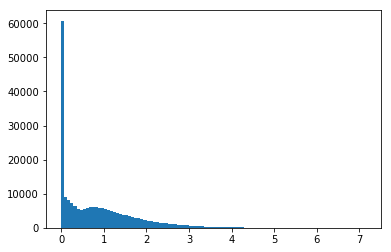

In [43]:
plt.hist(np.array(lst).mean(0).reshape([-1]),bins=100);

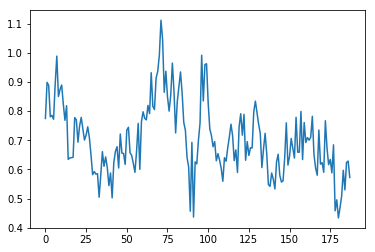

In [44]:
plt.plot(np.array(lst)[:,0,1200]);

In [45]:
for j in range(1680,1690):
    print j,np.nanmean(rawy[:,:,j],dtype=np.float),np.nanmean(y[:,:,j],dtype=np.float)

1680 1.68076379258 0.767920783369
1681 1.6817010969 0.767110917695
1682 1.62592518996 0.723749680765
1683 1.73977632686 0.821946088589
1684 1.71138398698 0.813116099178
1685 1.76363572066 0.845206885747
1686 1.69733310583 0.787718954939
1687 1.70009994492 0.789479112634
1688 nan 0.0
1689 nan 0.0


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [46]:
for j in range(1680,1693):
    u=train_test[:,:,j]
    print j,np.nanmean(np.isnan(u),dtype=np.float),np.nanmean(u,dtype=np.float)

1680

 0.218791779584

 1.46554556072
1681

 0.218193566195

 1.48031929647
1682

 0.21834989461

 1.48181820465
1683

 0.21636542708

 1.51697409815
1684

 0.214462385828

 1.50473016325
1685

 0.213904571916

 1.47954537923
1686

 0.214436665663

 1.47999125155
1687

 0.214012847536

 1.46457400069
1688

 0.213840710629

 1.47611775394
1689

 0.215010664458

 1.42913152545
1690

 0.216377095252

 1.42246796446
1691

 0.216954857975

 1.43965964713
1692

 0.21771805681

 1.42929951848


In [47]:
np.mean(y[:,0,1688],dtype=np.float),np.mean(y[:,0,1686],dtype=np.float),np.mean(y[:,0,1687],dtype=np.float)

(0.0, 0.13274016203703703, 0.14341001157407407)

(54, 4100) 0.83191


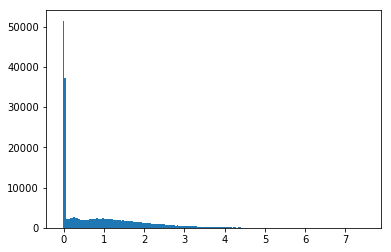

In [48]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1187]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.803432


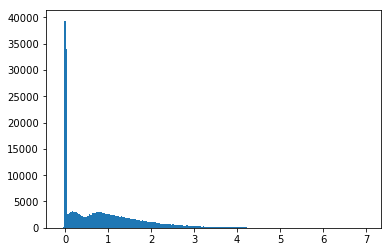

In [49]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1687]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.844668


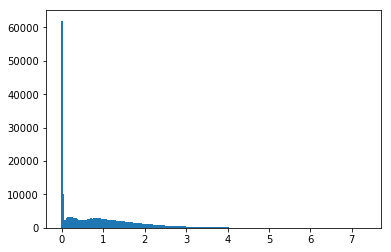

In [50]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.828166


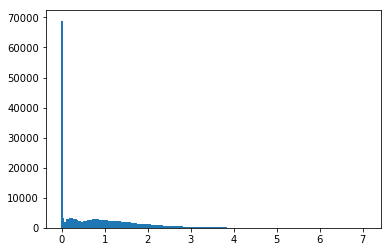

In [51]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1689]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

In [52]:
np.mean(isnan(train_test[:,:,1688]),dtype=np.float)

0.21384071062932852

In [53]:
np.mean(isnan(train_test[:,:,1687]),dtype=np.float)

0.21401284753588276

In [54]:
np.mean(isnan(train_test[:,:,1689]),dtype=np.float)

0.21501066445849643

(54, 4100) 0.844668


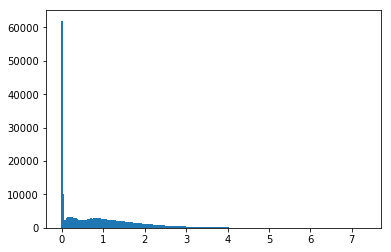

In [55]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);
pickle.dump(yy_pred3,open(a.name+".alt.pred",'wb'))

In [56]:
c=np.arange(60).reshape([3,4,5])

In [57]:
(c.reshape([-1,5]).reshape([3,4,5])==c).all()

True